# Homework1

Please upload to Brightspace a **.zip** archive containing your Jupyter Notebook with solutions and all data required to reproduce your solutions. 

Please also prepare a **requirements.txt** file which lists all the packages that you have used for your homework, one package per line. This will allow us to install all required packages.

Please name your .zip archive using your full name and student id as follows - **Firstname_Lastname_ID12345678_COMP47350_Homework1.zip**. 

For your Notebook, please split the code and explanations into cells so that it is easy to see and read the results of each step of your solution. Please remember to name your variables and methods with self-explanatory names. Please remember to write justifications for the decisions you make and code you write. 

Your code and analysis is like a story that awaits to be read. Always start with an introduction about the problem and your understanding of the problem domain and data analytics solution and describe the steps you do and your findings from each step.

The accepted file formats for the homework are:
    - .ipynb
    - .zip
    - .png
    - .pdf
    - .csv
    
**Please keep the whole code in a single notebook**. Usage of external tools/files is discouraged for portability reasons. Files in any other format but mentioned above can be used but will not be considered for the submission (including .doc, .rar, .7z, .pages, .xlsx, .tex etc.). 
Any image format is allowed to be used as far as the images appear embedded in your report (.ipynb or .pdf or .html).

**Deadline: Monday, 10 March, 2025, midnight.** 

## Exercises

This homework focuses on data understanding and preparation for a particular problem and dataset.
The data comes from the California Department of Forestry and Fire Protection [(CAL FIRE)](https://www.fire.ca.gov). CAL FIRE provides fire prevention and protection, emergency response, and natural resource protection services in the USA. 

In this analysis, we focus on using the data collected by CAL FIRE to build a data analytics solution for structure damage risk prediction. 
The full database represents structures impacted to different extents by wildland fire. The dataset we work with is a sample of the public data released by CAL FIRE, where the outcome for the target feature Damage is known and is only in the category "No Damage" or "Destroyed (>50%)").
https://data.ca.gov/dataset/cal-fire-damage-inspection-dins-data

Each student will work with a different subset of the data. The CSV file is named using the format: **cal-wildfires-[your-student-number].csv**, e.g., **cal-wildfires-12345.csv** is the data file for a student with number 12345. You need to work with the CSV file corresponding to your student number, available from this [[link]](https://drive.google.com/drive/folders/1pJYeBIHYj-2lFTGYSxHym3l_85jkJAyT?usp=share_link). There are 4 parts for this homework. Each part has an indicative maximum percentage given in brackets, e.g., part (1) has a maximum of 40% shown as [40]. The total marks are then converted to a grade, e.g., 40% maps to a pass grade D-, 75% maps to a B (see first lecture slides for marks to grade mapping scale).


(1). [40] Prepare a data quality report for your CSV file. Below you have a set of guideline steps to help you in this process. All the steps need to be implemented with Python code.

    - Check how many rows and columns your dataset has.
    - Print the first and the last 5 rows.
    - Convert the features to their appropriate data types (e.g., decide which features are more appropriate as 
    continuous and which ones as categorical types). 
    - Look for duplicate rows and columns. Consider whether it makes sense to keep them or drop them.
    - Look for constant columns. Consider whether it makes sense to keep them or drop them.
    - Save your updated/cleaned data frame to a new csv file.
  
    For the updated CSV and data frame (after column/row removal):
    - Prepare a table with descriptive statistics for all the continuous features.
    - Prepare a table with descriptive statistics for all the categorical features.
    - Plot histograms for all the continuous features.
    - Plot box plots for all the continuous features.
    - Plot bar plots for all the categorical features.
    - Discuss your initial findings from the tables and plots.
    - Prepare the initial discussion of your findings into a single data quality report PDF file. 
    The PDF report should focus on the key issues identified in the data and discuss potential strategies to handle them (max 5 pages of text). Simple listing of tables and plots without discussion of findings will not receive full marks. To receive full marks you need to show your understanding and analysis of the dataset, through a detailed discussion for each feature. The report should be concise and complete, the goal is not to make it long for the sake of length, but to cover all the important aspects of the features. The notebook provides detailed steps and analysis with code, while the report is a summary of findings and contains no Python code.

(2). [30] Prepare a data quality plan for the cleaned CSV file. 

    - Analyse all features and mark down all the features where there are potential problems or data quality issues.
    - Propose solutions to deal with the problems identified. Explain why did you choose one solution over 
    potentially many other. It is very important to provide justification for your thinking in this part and to list potential solutions, including the solution that will be implemented to clean the data.
    - Apply your solutions to obtain a new CSV file where the identified data quality issues were addressed. 
    - Save the new CSV file with a self explanatory name. 
    - Save the data quality plan to a single PDF file.
        
(3). [15] Exploring relationships between feature pairs:

    - Choose a subset of features you find promising and plot pairwise feature interactions (e.g., 
    continuous-continuous feature plot or continuous-categorical plots or correlation plots). 
    Explain your choices.
    - Discuss your findings from the plots above. Do you find any features or feature combinations that are 
    indicative of the target outcome? Explain in plain words (a short paragraph) the story of your
    findings so far.
    
(4). [15] Create new features: Transform, extend or combine the existing features, or add new features from external sources, to create a few new features (at least 3) with the aim to better capture the problem domain and the target outcome. Justify the steps and choices you are making. In the grading, consideration will be given to the creativity and domain knowledge shown in preparing the new features. Use code to show that your new features are indeed useful for the target prediction problem. Add these features to your clean dataset and save it as a CSV file with a self explanatory name. 

## (0) Background for the given data analytics problem and dataset

In [2]:
# Import pandas, numpy, matplotlib, seaborn libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
from matplotlib.backends.backend_pdf import PdfPages

# hide ipykernel warnings 
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
# Read in data from csv file to pandas dataframe.
df = pd.read_csv('cal-wildfires-24110699.csv')

## (1) Prepare a data quality report for your CSV file

### Check the shape of the CSV file

In [4]:
df.shape

(10000, 33)

The dataset has 10000 rows and 33 columns

### Print the first 5 rows

In [5]:
df.head(5)

,OBJECTID,* Damage,* Street Number,* Street Name,"* Street Type (e.g. road, drive, lane, etc.)",* City,State,Zip Code,* CAL FIRE Unit,County,...,* Deck/Porch Elevated,* Patio Cover/Carport Attached to Structure,* Fence Attached to Structure,Distance - Propane Tank to Structure,Distance - Residence to Utility/Misc Structure &gt; 120 SQFT,Assessed Improved Value (parcel),Year Built (parcel),Site Address (parcel),Latitude,Longitude
0,67187,Destroyed (>50%),0.0,Douglas,Street,Middletown,CA,0.0,LNU,Lake,...,,,NaN,NaN,NaN,116340.0,NaN,21181 STEWART ST MIDDLETOWN CA 95461,38.751620,-122.618425
1,24164,Destroyed (>50%),660.0,Swanton,Road,NaN,CA,NaN,CZU,Santa Cruz,...,No Deck/Porch,Combustible,No Fence,>30,NaN,NaN,NaN,660 SWANTON RD DAVENPORT CA 95017,37.123183,-122.259006
2,28049,No Damage,746655.0,Roop,Drive,Doyle,CA,NaN,LMU,Lassen,...,Unknown,No Patio Cover/Carport,Non Combustible,NaN,NaN,95979.0,1978.0,746655 ROOP DR DOYLE CA 96109,40.038579,-120.112103
3,45623,Destroyed (>50%),1679.0,Middle Tree,Lane,Paradise Northeast A,CA,NaN,BTU,Butte,...,No Deck/Porch,No Patio Cover/Carport,No Fence,NaN,NaN,125320.0,1977.0,1679 MIDDLE TREE LN PARADISE CA 95969,39.791943,-121.581848
4,90826,No Damage,72.0,Vista Montemar,Other,Laguna Niguel,CA,92677.0,ORC,Orange,...,Masonry/Concrete,No Patio Cover/Carport,Non Combustible,NaN,NaN,691996.0,1996.0,"72 VISTA MONTEMAR, LAGUNA NIGUEL, CA 92677",33.524524,-117.727116


### Print the last 5 rows

In [6]:
df.tail(5)

,OBJECTID,* Damage,* Street Number,* Street Name,"* Street Type (e.g. road, drive, lane, etc.)",* City,State,Zip Code,* CAL FIRE Unit,County,...,* Deck/Porch Elevated,* Patio Cover/Carport Attached to Structure,* Fence Attached to Structure,Distance - Propane Tank to Structure,Distance - Residence to Utility/Misc Structure &gt; 120 SQFT,Assessed Improved Value (parcel),Year Built (parcel),Site Address (parcel),Latitude,Longitude
9995,8952,No Damage,55420.0,Point,Road,NaN,CA,0.0,FKU,Fresno,...,Unknown,Unknown,Unknown,NaN,NaN,0.0,0.0,LAKESHORE CA 93634,37.201626,-119.251694
9996,60301,Destroyed (>50%),0.0,Old Toll,Road,Catheys Valley,CA,95306.0,MMU,Mariposa,...,,,NaN,NaN,NaN,79870.0,NaN,3671 OLD TOLL RD CATHEYS VALLEY CA 95306,37.493602,-120.139805
9997,124598,Destroyed (>50%),861.0,Alma Real,Drive,Pacific Palisades,CA,90272.0,LAC,Los Angeles,...,No Deck/Porch,No Patio Cover/Carport,Non Combustible,NaN,NaN,NaN,NaN,NaN,34.044062,-118.525146
9998,32728,Destroyed (>50%),1574.0,Adams,NaN,Paradise Northeast A,CA,NaN,BTU,Butte,...,No Deck/Porch,No Patio Cover/Carport,No Fence,NaN,<30',0.0,1900.0,1580 ADAMS RD PARADISE CA 95969,39.781892,-121.584852
9999,51811,Destroyed (>50%),11050.0,Wingfield,Lane,Unincorporated,CA,NaN,SHU,Shasta,...,No Deck/Porch,No Patio Cover/Carport,Non Combustible,21-30,NaN,35061.0,1987.0,11050 WINGFIELD LN SHASTA CA 96087,40.606681,-122.503666


### Convert the features to their appropriate data types

In [7]:
#int64 and float64 are numeric columns
# Some "object" type columns may be better treated as continuous or categorical, this will be investigated.

df.dtypes

OBJECTID                                                          int64
* Damage                                                         object
* Street Number                                                 float64
* Street Name                                                    object
* Street Type (e.g. road, drive, lane, etc.)                     object
* City                                                           object
State                                                            object
Zip Code                                                        float64
* CAL FIRE Unit                                                  object
County                                                           object
Community                                                        object
Incident Start Date                                              object
Hazard Type                                                      object
Structure Defense Actions Taken                                 

### Decide which features are continuous and which features are categorical

In [8]:
# We will check the data of the numeric type
# df.describe() will be used to print the statistics for the numeric columnns, int64 and float64

pd.set_option("display.precision", 3)
df.describe()

,OBJECTID,* Street Number,Zip Code,# Units in Structure (if multi unit),Assessed Improved Value (parcel),Year Built (parcel),Latitude,Longitude
count,10000.000,9.667e+03,5976.000,3044.000,9.499e+03,7599.000,10000.000,10000.000
mean,65300.039,7.032e+04,63513.431,0.314,8.079e+05,1748.705,37.381,-120.521
std,38194.129,5.903e+06,43043.490,1.936,1.460e+07,615.771,2.487,1.810
min,1.000,0.000e+00,0.000,0.000,0.000e+00,0.000,32.598,-123.673
25%,31462.250,7.000e+02,0.000,0.000,7.000e+04,1939.000,34.196,-122.125
50%,64888.000,3.020e+03,91001.000,0.000,1.602e+05,1962.000,38.474,-121.406
75%,98626.000,8.279e+03,93066.000,0.000,3.350e+05,1983.000,39.744,-118.542
max,131814.000,5.804e+08,96150.000,60.000,1.220e+09,2020.000,41.924,-116.447


From the above table, it is evident that the Continuous and Categorical features are the below:

Continuous - OBJECTID, * Street Number, Zip Code, # Units in Structure (if multi unit), Assessed Improved value (parcel), Year Built (parcel), Latitude, Longitude

Categorical - * Damage, * Street Name, * Street Type, * City, State, * CAL Fire Unit, County, Community, Incident Start Date, Hazard Type, Structure Defense Actions Taken, * Structure Type, Structure Category, * Roof Construction, * Eaves, * Vent Screen, * Exterior Sliding, * Window Pane, * Desk/Porch on Grade, * Desk/Porch Elevated, * Patio Cover/Carport Attached to Structure, Fence Attached to Structure, Distance - Propane Tank to Structure, Distance - Residence to Utility/Misc Structure, Site Address (parcel)

In [9]:
# Keep only the numeric features
numeric_columns = df.select_dtypes(['int64', 'float64']).columns
numeric_columns

Index(['OBJECTID', '* Street Number', 'Zip Code',
       '# Units in Structure (if multi unit)',
       'Assessed Improved Value (parcel)', 'Year Built (parcel)', 'Latitude',
       'Longitude'],
      dtype='object')

In [10]:
# Select only the numeric features
df[numeric_columns]

,OBJECTID,* Street Number,Zip Code,# Units in Structure (if multi unit),Assessed Improved Value (parcel),Year Built (parcel),Latitude,Longitude
0,67187,0.0,0.0,NaN,116340.0,NaN,38.752,-122.618
1,24164,660.0,NaN,NaN,NaN,NaN,37.123,-122.259
2,28049,746655.0,NaN,NaN,95979.0,1978.0,40.039,-120.112
3,45623,1679.0,NaN,NaN,125320.0,1977.0,39.792,-121.582
4,90826,72.0,92677.0,0.0,691996.0,1996.0,33.525,-117.727
...,...,...,...,...,...,...,...,...
9995,8952,55420.0,0.0,0.0,0.0,0.0,37.202,-119.252
9996,60301,0.0,95306.0,NaN,79870.0,NaN,37.494,-120.140
9997,124598,861.0,90272.0,NaN,NaN,NaN,34.044,-118.525
9998,32728,1574.0,NaN,NaN,0.0,1900.0,39.782,-121.585


In [11]:
# Convert all columns to category except continuous features
for column in df.columns:
    if column not in numeric_columns:
        df[column] = df[column].astype('category')


# Convert Incident Start Date column to datetime feature
df['Incident Start Date'] = pd.to_datetime(df['Incident Start Date'].astype(str))

# For continuous features, make sure they are numeric
for column in numeric_columns:
    if column in df.columns and column is not "Incident Start Date":
        df[column] = pd.to_numeric(df[column], errors='coerce')

# Print dtypes to confirm changes have occured
print(df.dtypes)

OBJECTID                                                                 int64
* Damage                                                              category
* Street Number                                                        float64
* Street Name                                                         category
* Street Type (e.g. road, drive, lane, etc.)                          category
* City                                                                category
State                                                                 category
Zip Code                                                               float64
* CAL FIRE Unit                                                       category
County                                                                category
Community                                                             category
Incident Start Date                                             datetime64[ns]
Hazard Type                                         

### Check for duplicate rows

In [12]:
# Print the number of duplicates, without the original rows that were duplicated
print('Number of duplicate (excluding first) rows in the table is: ', df.duplicated().sum())

# Check for duplicate rows. 
# Use "keep=False" to mark all duplicates as true, including the original rows that were duplicated.
print('Number of duplicate rows (including first) in the table is:', df[df.duplicated(keep=False)].shape[0])

Number of duplicate (excluding first) rows in the table is:  0
Number of duplicate rows (including first) in the table is: 0


### Check for duplicate columns

In [13]:
# Check for duplicate columns
# First transpose the df so columns become rows, then apply the same check as above
dfT = df.T
print("Number of duplicate (excluding first) columns in the table is: ", dfT.duplicated().sum())
print("Number of duplicate (including first) columns in the table is: ",  dfT[dfT.duplicated(keep=False)].shape[0])




Number of duplicate (excluding first) columns in the table is:  0
Number of duplicate (including first) columns in the table is:  0


### Duplicate check findings
* We can see that there are no duplicate rows or columns in the dataset.



### Check for constant columns

In [14]:
# Print table with categorical statistics
df.select_dtypes(['category']).describe().T

,count,unique,top,freq
* Damage,10000,2,Destroyed (>50%),5662
* Street Name,9581,3974,Pacific Coast,78
"* Street Type (e.g. road, drive, lane, etc.)",8886,22,Road,3434
* City,7486,258,Unincorporated,1177
State,10000,1,CA,10000
* CAL FIRE Unit,10000,27,LAC,2570
County,9999,47,Los Angeles,2570
Community,4198,424,Paradise,585
Hazard Type,10000,1,Fire,10000
Structure Defense Actions Taken,2742,10,Unknown,2150


Reviewing the categorical data above we can determine the following:

* All columns besides State and Hazard Type have more than 1 unique values. Therefore, these two columns are constant columns. 

* **Street Name* and *Site Address (parcel)* have a very high number of unique values respectively with 3974 and 8467 each.


We will now drop *State* and *Hazard Type* as they are constant columns and are not needed in our cleaned dataset.

In [15]:
# Clean column names to avoid hidden characters or spaces
df.columns = df.columns.str.strip()

# Identify constant columns (columns with only one unique value)
constant_columns = [col for col in df.columns if df[col].nunique() == 1]
print("Constant columns:", constant_columns)

# Remove constant columns
df = df.drop(columns=constant_columns)

Constant columns: ['State', 'Hazard Type']


In [16]:
# Print table with continuous statistics
df.select_dtypes(include=['int64', 'float64']).describe().T

,count,mean,std,min,25%,50%,75%,max
OBJECTID,10000.0,65300.039,3.819e+04,1.000,31462.250,64888.000,98626.000,1.318e+05
* Street Number,9667.0,70320.921,5.903e+06,0.000,700.000,3020.000,8279.000,5.804e+08
Zip Code,5976.0,63513.431,4.304e+04,0.000,0.000,91001.000,93066.000,9.615e+04
# Units in Structure (if multi unit),3044.0,0.314,1.936e+00,0.000,0.000,0.000,0.000,6.000e+01
Assessed Improved Value (parcel),9499.0,807870.078,1.460e+07,0.000,70000.000,160240.000,335016.000,1.220e+09
Year Built (parcel),7599.0,1748.705,6.158e+02,0.000,1939.000,1962.000,1983.000,2.020e+03
Latitude,10000.0,37.381,2.487e+00,32.598,34.196,38.474,39.744,4.192e+01
Longitude,10000.0,-120.521,1.810e+00,-123.673,-122.125,-121.406,-118.542,-1.164e+02


### Check for null values

In [17]:
df.isnull().sum()

OBJECTID                                                           0
* Damage                                                           0
* Street Number                                                  333
* Street Name                                                    419
* Street Type (e.g. road, drive, lane, etc.)                    1114
* City                                                          2514
Zip Code                                                        4024
* CAL FIRE Unit                                                    0
County                                                             1
Community                                                       5802
Incident Start Date                                                0
Structure Defense Actions Taken                                 7258
* Structure Type                                                   0
Structure Category                                                 0
# Units in Structure (if multi uni

We can see the following:
* 333 instances missing values for **Street Number*
* 419 instances missing values for **Street Name*
* 1114 instances missing values for **Street Type*
* 2517 instances missing values for **City*
* 4024 instances missing values for *Zip Code*
* 1 instance missing values for *County*
* 5819 instances missing values for *Community*
* 7258 instances missing values for *Structure Defense Actions Taken*
* 6956 instances missing values for *# Units in Structure (if multi unit)* 
* 348 instances missing values for *Roof Construction*
* 389 instances missing values for **Eaves*
* 399 instances missing values for *Vent Screen*
* 370 instances missing values for **Exterior Sliding*
* 379 instances missing values for **Window Pane*
* 2401 instances missing values for *Year Built (parcel)*
* 597 instances missing values for *Site Address (parcel)*



### Convert data types again

OBJECTID, *Street Number and Zip code can be used as identifiers for the forest fires. Therefore, they will be converted to the category type.

In [ ]:
# Convert OBJECTID, Zip Code and * Street Number into the category type

df['OBJECTID'] = df['OBJECTID'].astype('category')
df['Zip Code'] = df['Zip Code'].astype('category')
df['* Street Number'] = df['* Street Number'].astype('category')

df.dtypes

OBJECTID                                                              category
* Damage                                                              category
* Street Number                                                       category
* Street Name                                                         category
* Street Type (e.g. road, drive, lane, etc.)                          category
* City                                                                category
Zip Code                                                              category
* CAL FIRE Unit                                                       category
County                                                                category
Community                                                             category
Incident Start Date                                             datetime64[ns]
Structure Defense Actions Taken                                       category
* Structure Type                                    

### Now check the number of numeric columns

In [ ]:
# Determine which columns are numeric
numeric_columns = df.select_dtypes(['int64', 'float64']).columns
numeric_columns

Index(['# Units in Structure (if multi unit)',
       'Assessed Improved Value (parcel)', 'Year Built (parcel)', 'Latitude',
       'Longitude'],
      dtype='object')

### Now check the number of categorical columns



In [ ]:
# Determ which columns are categorical
category_columns = df.select_dtypes(['category']).columns
df[category_columns]

,OBJECTID,* Damage,* Street Number,* Street Name,"* Street Type (e.g. road, drive, lane, etc.)",* City,Zip Code,* CAL FIRE Unit,County,Community,...,* Vent Screen,* Exterior Siding,* Window Pane,* Deck/Porch On Grade,* Deck/Porch Elevated,* Patio Cover/Carport Attached to Structure,* Fence Attached to Structure,Distance - Propane Tank to Structure,Distance - Residence to Utility/Misc Structure &gt; 120 SQFT,Site Address (parcel)
0,67187,Destroyed (>50%),0.0,Douglas,Street,Middletown,0.0,LNU,Lake,Middletown,...,Unknown,Fire Resistant,Single Pane,,,,NaN,NaN,NaN,21181 STEWART ST MIDDLETOWN CA 95461
1,24164,Destroyed (>50%),660.0,Swanton,Road,NaN,NaN,CZU,Santa Cruz,Davenport,...,Unscreened,Wood,Single Pane,Wood,No Deck/Porch,Combustible,No Fence,>30,NaN,660 SWANTON RD DAVENPORT CA 95017
2,28049,No Damage,746655.0,Roop,Drive,Doyle,NaN,LMU,Lassen,NaN,...,No Vents,Vinyl,Multi Pane,Wood,Unknown,No Patio Cover/Carport,Non Combustible,NaN,NaN,746655 ROOP DR DOYLE CA 96109
3,45623,Destroyed (>50%),1679.0,Middle Tree,Lane,Paradise Northeast A,NaN,BTU,Butte,Paradise,...,"Mesh Screen > 1/8""""",Combustible,Single Pane,Masonry/Concrete,No Deck/Porch,No Patio Cover/Carport,No Fence,NaN,NaN,1679 MIDDLE TREE LN PARADISE CA 95969
4,90826,No Damage,72.0,Vista Montemar,Other,Laguna Niguel,92677.0,ORC,Orange,NaN,...,"Mesh Screen > 1/8""""",Stucco Brick Cement,Multi Pane,Masonry/Concrete,Masonry/Concrete,No Patio Cover/Carport,Non Combustible,NaN,NaN,"72 VISTA MONTEMAR, LAGUNA NIGUEL, CA 92677"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,8952,No Damage,55420.0,Point,Road,NaN,0.0,FKU,Fresno,NaN,...,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,NaN,NaN,LAKESHORE CA 93634
9996,60301,Destroyed (>50%),0.0,Old Toll,Road,Catheys Valley,95306.0,MMU,Mariposa,NaN,...,Unknown,Combustible,Single Pane,,,,NaN,NaN,NaN,3671 OLD TOLL RD CATHEYS VALLEY CA 95306
9997,124598,Destroyed (>50%),861.0,Alma Real,Drive,Pacific Palisades,90272.0,LAC,Los Angeles,NaN,...,"Mesh Screen > 1/8""""",Stucco Brick Cement,Multi Pane,No Deck/Porch,No Deck/Porch,No Patio Cover/Carport,Non Combustible,NaN,NaN,NaN
9998,32728,Destroyed (>50%),1574.0,Adams,NaN,Paradise Northeast A,NaN,BTU,Butte,Paradise,...,"Mesh Screen <= 1/8""""",Combustible,No Windows,No Deck/Porch,No Deck/Porch,No Patio Cover/Carport,No Fence,NaN,<30',1580 ADAMS RD PARADISE CA 95969


### Check the datetime features

In [ ]:
# Determine which columns are datetime features
datetime_columns = df.select_dtypes(['datetime64']).columns
df[datetime_columns]

,Incident Start Date
0,2015-09-12 00:00:00
1,2020-08-16 00:00:00
2,2020-11-17 00:00:00
3,2018-11-08 00:00:00
4,2022-05-11 00:00:00
...,...
9995,2020-09-04 00:00:00
9996,2017-07-16 00:00:00
9997,2025-01-07 08:02:01
9998,2018-11-08 00:00:00


### Check for Irregular Cardinalities & Permitted Values

In [26]:
# Check for irregular cardinality and permitted values for ALL categorical features
print("\nUnique values for categorical features:")
print("* Damage:", pd.unique(df["* Damage"]))
print("* Street Name:", pd.unique(df["* Street Name"]))
print("* Street Number:", pd.unique(df["* Street Number"]))
print("* Street Type:", pd.unique(df["* Street Type (e.g. road, drive, lane, etc.)"]))
print("* City:", pd.unique(df["* City"]))
print("Zip Code:", pd.unique(df["Zip Code"]))
print("* CAL FIRE Unit:", pd.unique(df["* CAL FIRE Unit"]))
print("County:", pd.unique(df["County"]))
print("Community:", pd.unique(df["Community"]))
print("Structure Defense Actions Taken:", pd.unique(df["Structure Defense Actions Taken"]))
print("* Structure Type:", pd.unique(df["* Structure Type"]))
print("Structure Category:", pd.unique(df["Structure Category"]))
print("* Roof Construction:", pd.unique(df["* Roof Construction"]))
print("* Eaves:", pd.unique(df["* Eaves"]))
print("* Vent Screen:", pd.unique(df["* Vent Screen"]))
print("* Exterior Siding:", pd.unique(df["* Exterior Siding"]))
print("* Window Pane:", pd.unique(df["* Window Pane"]))
print("* Deck/Porch On Grade:", pd.unique(df["* Deck/Porch On Grade"]))
print("* Deck/Porch Elevated:", pd.unique(df["* Deck/Porch Elevated"]))
print("* Patio Cover/Carport Attached to Structure:", pd.unique(df["* Patio Cover/Carport Attached to Structure"]))
print("* Fence Attached to Structure:", pd.unique(df["* Fence Attached to Structure"]))
print("Distance - Propane Tank to Structure:", pd.unique(df["Distance - Propane Tank to Structure"]))
print("OBJECTID:", pd.unique(df["OBJECTID"]))
print("Site Address (parcel):", pd.unique(df["Site Address (parcel)"]))
print("Distance - Residence to Utility/Misc Structure > 120 SQFT:", pd.unique(df["Distance - Residence to Utility/Misc Structure &gt; 120 SQFT"]))



Unique values for categorical features:
* Damage: ['Destroyed (>50%)', 'No Damage']
Categories (2, object): ['Destroyed (>50%)', 'No Damage']
* Street Name: ['Douglas', 'Swanton ', 'Roop', 'Middle Tree', 'Vista Montemar ', ..., 'Meadowlark ', 'Radiant ', 'Upper Nelligan', 'Angelus ', 'Forest Ridge']
Length: 3975
Categories (3974, object): [' ', ' Alder Springs', ' Bald Mountain ', ' China Grade', ..., 'tomki', 'unknown', 'unknown address ', 'w County Line ']
* Street Number: [0.0, 660.0, 746655.0, 1679.0, 72.0, ..., 2304.0, 14661.0, 55420.0, 861.0, 11050.0]
Length: 5610
Categories (5609, float64): [0.0, 1.0, 2.0, 3.0, ..., 7.200e+05, 7.201e+05, 7.467e+05, 5.804e+08]
* Street Type: ['Street', 'Road', 'Drive', 'Lane', 'Other', ..., 'Hwy', 'Alley', '-', 'Pass', 'Ext.']
Length: 23
Categories (22, object): ['-', 'Alley', 'Avenue', 'Boulevard', ..., 'Street', 'Terrace', 'Trail', 'Way']
* City: ['Middletown', NaN, 'Doyle ', 'Paradise Northeast A', 'Laguna Niguel', ..., 'banning', 'Spring Val

There are irregular (very high) cardinalities for the following:

* OBJECTID: 10,000 unique values
* Site Address (parcel): 8,467 unique values
* Street Number: 5,609 unique values
* Street Name: 3,974 unique values
* Community: 424 unique values
* City: 258 unique values
* Zip Code: 145 unique values

The below are in the permitted range and have low cardinality:

* County: 47 unique values
* CAL FIRE Unit: 27 unique values
* Street Type: 22 unique values
* Structure Type: 18 unique values
* Exterior Siding: 11 unique values
* Roof Construction: 10 unique values
* Structure Defense Actions Taken: 10 unique values
* Structure Category: 7 unique values
* Vent Screen: 7 unique values
* Eaves: 6 unique values
* Deck/Porch On Grade: 6 unique values
* Deck/Porch Elevated: 6 unique values
* Window Pane: 5 unique values
* Patio Cover/Carport Attached: 5 unique values
* Distance - Propane Tank to Structure: 5 unique values
* Distance - Residence to Utility/Misc Structure > 120 SQFT: 5 unique values
* Fence Attached to Structure: 4 unique values
* Damage: 2 unique values

## Descriptive Statistics: Continuous Features

We already know the data type for each continous feature.

We can now supplement this information with the following:
* The range into which each feature can fall
* A numerical representation of how these values are distributed across the upper tiers of that range
* Feature cardinality


In [27]:
# For each continuous feature, we display the range of values it takes.
# We also display the number of instances each of its values has.
continuous_features = [
   '# Units in Structure (if multi unit)', 
   'Assessed Improved Value (parcel)', 
   'Year Built (parcel)', 
   'Latitude', 
   'Longitude'
]
total_features = len(continuous_features)
for i, feature in enumerate(continuous_features, 1):
    print(f"Processing feature {i} of {total_features}: {feature}")
    print("----------\n")
    try:
        # Check if the feature has non-null values
        if df[feature].notna().any():
            range_value = df[feature].max() - df[feature].min()
            print(f"Range {feature} is: {range_value}")
            print("----------")
            print('{0:.5}  {1}'.format("Value", "Number of Instances"))
            
            # Get value counts and handle potential uniqueness in lat/long
            value_counts = df[feature].value_counts().nlargest(15)
            if len(value_counts) > 0:
                print(value_counts)
            else:
                print("All values are unique or nearly unique")
                
            # For highly unique values like lat/long, show basic stats instead
            if len(value_counts) < 5:
                print("\nBasic statistics for this feature:")
                print(df[feature].describe())
        else:
            print(f"No non-null values found for {feature}")
    except Exception as e:
        print(f"Error processing {feature}: {e}")
    
    print("\n\n")

Processing feature 1 of 5: # Units in Structure (if multi unit)
----------

Range # Units in Structure (if multi unit) is: 60.0
----------
Value  Number of Instances
# Units in Structure (if multi unit)
0.0     2760
1.0      141
2.0       43
4.0       28
3.0       19
8.0       11
10.0      10
6.0       10
9.0        7
5.0        5
7.0        3
20.0       2
40.0       2
60.0       1
11.0       1
Name: count, dtype: int64



Processing feature 2 of 5: Assessed Improved Value (parcel)
----------

Range Assessed Improved Value (parcel) is: 1220403000.0
----------
Value  Number of Instances
Assessed Improved Value (parcel)
0.000e+00    465
5.414e+07     29
6.039e+04     17
1.000e+04     17
1.300e+05     13
7.000e+04     13
8.000e+04     12
2.055e+04     10
5.000e+06     10
1.200e+05     10
2.000e+04     10
2.600e+04      9
1.500e+05      9
5.340e+05      9
9.000e+04      9
Name: count, dtype: int64



Processing feature 3 of 5: Year Built (parcel)
----------

Range Year Built (parcel) is: 2

In [33]:
# Display the cardinality of each continuous feature

features_cardinality = list(df[continuous_features].columns.values)

print('{0:35}  {1}'.format("Feature", "Cardinality"))
print('{0:35}  {1}'.format("-------", "--------------- \n"))

for c in features_cardinality:
    print('{0:35}  {1}'.format(c, str(len(df[c].unique()))))

Feature                              Cardinality
-------                              --------------- 

# Units in Structure (if multi unit)  17
Assessed Improved Value (parcel)     7578
Year Built (parcel)                  140
Latitude                             9992
Longitude                            9995


**Running Assessment**

* *Street Number* possesses an extremely high outlier of 580,350,032.0. Street numbers appear to be in the 0 - 30,743 range. This is clearly a data entry error as it is implausible. There are 544 instances of missing values that likely represent missing data.
* *OBJECTID*, *Latitude*, *Longitude* have no significant outliers. However, *Latitude*, *Longitude* have very high cardinalities as expected for geo-spatial coordinates
* *Units in Structure (if multi unit)* has potential outliers.
* *Assessed Improved Value (parcel)* has an extremely high outlier of $1,220,403,000. There are 465 instances of zero values, which could represent missing data.
* *Year Built (parcel)* has 836 instances of 0 years, which are likely missing data.

* More insight will be gained from visual analysis of the dataset as presented on histograms and boxplots below.

**Categorical features with high cardinality**
* The issue of high cardinality will be discussed furthern in the Data Quality Report and addressed in the Data Quality Plan. However, in this section of the assignment we will visualise and understand the data as it currently is.
* Rather than showing the range of values for the features with very high cardinalities, we will now display the top 20 most frequent values for these features. At this stage of the assignment, this is the best way to give an idea of the values of the values of these features.

In [34]:
# Visualise the 20 most frequent values for OBJECTID, which has a cardinality of 10000
most_frequent_site_object_id = df['OBJECTID'].value_counts()[:20].sort_values(ascending=False)
most_frequent_site_object_id

OBJECTID
131535    1
131492    1
131481    1
131471    1
131439    1
131414    1
131408    1
131391    1
131380    1
131376    1
131374    1
131367    1
131364    1
131354    1
131339    1
131320    1
498       1
485       1
466       1
465       1
Name: count, dtype: int64

In [35]:
# Visualise the 20 most frequent values for * Street Number, which has a cardinality of 5609
most_frequent_site_address_values = df['* Street Number'].value_counts()[:20].sort_values(ascending=False)
most_frequent_site_address_values

* Street Number
0.0        544
580.0       33
1.0         22
16321.0     18
16001.0     16
30473.0     14
140.0       11
500.0       11
7425.0      11
1111.0      11
515.0       10
123.0       10
1945.0      10
124.0       10
21600.0     10
5975.0       9
7169.0       9
1134.0       9
110.0        9
21.0         9
Name: count, dtype: int64

In [36]:
# Visualise the 20 most frequent values for Site Address (parcel), which has a cardinality of 8467
most_frequent_site_address_values = df['Site Address (parcel)'].value_counts()[:20].sort_values(ascending=False)
most_frequent_site_address_values

Site Address (parcel)
                                                              151
 LAKESHORE CA 93634                                            49
                                                               40
No Address Available                                           40
580 LOMMEL RD CALISTOGA CA 94515                               29
ECHO LAKE CA 95721                                             19
16321 PACIFIC COAST HWY SPC 1, PACIFIC PALISADES, CA 90272     17
16001 PACIFIC COAST HWY, PACIFIC PALISADES, CA 90272           15
NULL  NULL    UNKNOWN CA 00000                                 13
 SHAVER LAKE CA 93664                                          11
7425 RANCHO LOS GUILICOS RD SANTA ROSA CA 95409                10
518 ANGELUS ST SANTA ROSA CA 95403                             10
354  SCHOOL ST CA 93238                                         9
7169 SIERRA PINES RD ECHO LAKE CA 95721                         9
2920 CLARK RD SPC 21A BUTTE VALLEY CA 95965           

In [38]:
# Visualise the 20 most frequent values for *Street Name, which has a cardinality of 3974
most_frequent_streets = df['* Street Name'].value_counts()[:20].sort_values(ascending=False)
most_frequent_streets


* Street Name
Pacific Coast       78
Pentz               63
Skyway              45
Clark               33
130                 33
Lommel              32
Main                30
Lake                29
Soda Canyon         28
Silverado           27
Glenrose            27
Fair Oaks           27
Marengo             24
Skyway              24
Pearson             23
Bille               22
Empire Grade        22
W Sunset            21
State Highway 96    21
E Altadena          21
Name: count, dtype: int64

In [39]:
# Visualise the 20 most frequent values for *City, which has a cardinality of 258
most_frequent_cities = df['* City'].value_counts()[:20].sort_values(ascending=False)
most_frequent_cities

* City
Unincorporated                  1177
Altadena                        1158
Pacific Palisades                650
Malibu                           248
Santa Rosa                       235
Pasadena                         202
Magalia                          201
Paradise Northwest B             143
Paradise Southeast B             122
Paradise Central Southeast A     120
Greenville                       119
Paradise Central Southwest B     117
Paradise Southwest B             116
South Lake Tahoe                 114
Paradise Central Southwest A      97
Paradise Northwest A              91
Paradise Southeast A              86
Camarillo                         84
Mariposa                          83
Paradise Central Southeast B      82
Name: count, dtype: int64

In [40]:
# Visualise the 20 most frequent values for *Zip Code, which has a cardinality of 145
most_frequent_zips = df['Zip Code'].value_counts()[:20].sort_values(ascending=False)
most_frequent_zips

Zip Code
0.0        1878
91001.0    1145
90272.0     650
90265.0     200
91107.0     130
95947.0     119
96150.0     114
95338.0      86
93010.0      84
95636.0      77
91024.0      75
95973.0      73
95983.0      52
96003.0      51
91104.0      48
95246.0      45
96020.0      44
95735.0      43
95457.0      36
95721.0      35
Name: count, dtype: int64

In [41]:
# Visualise the 20 most frequent values for *Incident Start Date, which has a cardinality of 153
most_frequent_dates = df['Incident Start Date'].value_counts()[:20].sort_values(ascending=False)
most_frequent_dates

Incident Start Date
2025-01-07 08:02:01    2306
2018-11-08 00:00:00    1954
2020-08-16 00:00:00     825
2017-10-08 00:00:00     722
2020-09-27 00:00:00     432
2021-08-14 00:00:00     358
2021-07-13 00:00:00     317
2020-09-09 00:00:00     252
2020-09-04 00:00:00     251
2024-07-24 00:00:00     210
2015-09-12 00:00:00     169
2024-11-06 00:00:00     133
2020-10-26 00:00:00     132
2018-07-23 00:00:00     131
2019-10-23 00:00:00     124
2020-08-18 00:00:00      98
2017-12-04 00:00:00      91
2020-08-19 00:00:00      87
2015-09-09 00:00:00      67
2024-09-08 00:00:00      67
Name: count, dtype: int64

In [42]:
# Visualise the 20 most frequent values for * Community, which has a cardinality of 424
most_frequent_communities = df['Community'].value_counts()[:20].sort_values(ascending=False)
most_frequent_communities

Community
Paradise            585
Paradise            575
Fountaingrove       127
Magalia             121
Coffey Park         112
Riebli               87
Magalia              78
Berry Creek          68
Greenville           59
Napa                 54
Larkfield-Wikiup     54
Malibu               53
Irvine               50
Calistoga            49
Santa Rosa           45
Vacaville            41
Santa Rosa           38
Healdsburg           38
Altadena             36
Glenn Ellen          35
Name: count, dtype: int64

**Running Assessment**

The above visualisation of the most frequent values for the high cardinality features has highlighted the following potential issues:

In *OBJECTID*:
* There are is 1 occurence for each of the top 20 OBJECTID values generated.

In **Street Number*:
* There are 544 occurences of forest fires at a street number of 0.0, which is implausible.

In *Site Address (parcel)*:
* There are 40 instances of "No Address Available" and 13 instances of "NULL NULL UNKNOWN CA 00000".
* There is inconsistent formatting being that some addresses have "SPC" or extra spaces (this will be discussed in the Data Quality Report).
* There are duplicates, whereby some addresses appear multiple times with slight variations

In **Street Name*:
* "Skyway" appears twice, with 45 and 24 instances respectively, suggesting that there are case-sensitive duplicates.
* "130" appears as a street name in 33 instances which is unusual.
* Formatting is shown to be inconsistent as some names have trailing spaces.
* Street type information is missing in some cases.

In **City*:
* There is inconsistent naming, whereby "Paradise" related entries appear multiple times with different zone designations.
* Granularity poses a problem, whereby "Unincorporated" appears 1177 instances. This is too generic and could refer to any areas in any county.
* Data standardisation - there is a mix of specific cities and designations
* Jurisdictional boundaries - some entries might be neighbourhoods rather than official cities in California.

In *Zip Code*:
* "0.0" appears the most frequently (1878 instances). This is representative of missing data.
* Inconsistent Data Type Representation - values are shown with decimal points when zip codes should be integers.

In *Incident Start Date*:
* The most frequent date (2,306 occurrences) is "2025-01-07 08:02:01"
* Most entries show midnight (00:00:00), suggesting these are date-only entries where the time was defaulted to midnight
* There are a few entries have specific timestamps (like the 2025 entry with 08:02:01)

In *Community*:
* There are duplicates, whereby "Paradise" appears twice having 585 and 575 instances each.
* Inconsistent naming  - "Santa Rosa" appears multiple times.
* Data quality could be affected as there may be confusion between official city and community designations




### Check logical integrity of the data

We will now perform some additional checks to make sure the data makes sense. Depending on the outcome of these checks, we may decide to drop these rows or replace the values upon consultation with a domain expert.

- **Test 1:** Check if any entries have an Incident Date that occurs before the building was constructed


In [43]:
test_1 = df[['Year Built (parcel)', 'Incident Start Date']][
    pd.to_datetime(df['Incident Start Date']).dt.year < df['Year Built (parcel)']
]
print("Number of rows failing the test: ", test_1.shape[0])


Number of rows failing the test:  0


- **Test 2:** Check that single-family residences do not have multiple units

In [44]:
test_2 = df[['* Structure Type', '# Units in Structure (if multi unit)']][
    (df['* Structure Type'] == 'Single Family Residence Single Story') & 
    (df['# Units in Structure (if multi unit)'] > 1)
]
print("Number of rows failing the test: ", test_2.shape[0])
test_2.head(5)


Number of rows failing the test:  16


,* Structure Type,# Units in Structure (if multi unit)
142,Single Family Residence Single Story,4.0
627,Single Family Residence Single Story,3.0
705,Single Family Residence Single Story,2.0
941,Single Family Residence Single Story,4.0
1366,Single Family Residence Single Story,3.0


- **Test 3:** Check that no address components have zero or missing values. A valid fire incident should have a complete address.


In [45]:
test_3 = df[['* Street Number', '* Street Name', '* City', 'Zip Code']][
    (df['* Street Number'] == 0) | 
    (df['* Street Name'].isna()) |
    (df['* City'].isna()) |
    (df['Zip Code'] == 0)
]
print("Number of rows failing the test: ", test_3.shape[0])
test_3.head(5)

Number of rows failing the test:  3913


,* Street Number,* Street Name,* City,Zip Code
0,0.0,Douglas,Middletown,0.0
1,660.0,Swanton,NaN,NaN
6,2213.0,GEORGIA FLAT RD,NaN,NaN
10,2300.0,Old Soda Springs,Unincorporated,0.0
15,42070.0,Auberry,NaN,0.0


- **Test 4:** Check for unknown construction materials in structural elements. This is significant for assessing fire risk. Missing construction material data affects modelling potential.

In [46]:
test_4 = df[['* Roof Construction', '* Exterior Siding', '* Window Pane']][
    (df['* Roof Construction'] == 'Unknown') |
    (df['* Exterior Siding'] == 'Unknown') |
    (df['* Window Pane'] == 'Unknown')
]
print("Number of rows failing the test: ", test_4.shape[0])
test_4.head(5)

Number of rows failing the test:  2785


,* Roof Construction,* Exterior Siding,* Window Pane
6,Unknown,Unknown,Unknown
15,Unknown,Unknown,Unknown
16,Unknown,Unknown,Unknown
22,Unknown,Stucco Brick Cement,Unknown
24,Combustible,Fire Resistant,Unknown


- **Test 5**: Check that properties were destroyed despite having defense actions in place. This helps to assess the effectiveness of defense measures and to deliberate on which defense strategies are impactful.

In [47]:
test_5 = df[['* Damage', 'Structure Defense Actions Taken']][
    (df['* Damage'] == 'Destroyed (>50%)') & 
    (df['Structure Defense Actions Taken'].notna())
]
print("Number of rows failing the test: ", test_5.shape[0])
test_5.head(5)


Number of rows failing the test:  1651


,* Damage,Structure Defense Actions Taken
5,Destroyed (>50%),Unknown
13,Destroyed (>50%),Unknown
14,Destroyed (>50%),Unknown
22,Destroyed (>50%),Unknown
37,Destroyed (>50%),Unknown


- **Test 6**: Check that there is consistency between cities and communities. Communities should typically contain or relate to the city name. Consistency here is vital as concordant response planning to fire incidents is affected.

In [48]:
def check_city_in_community(row):
    if pd.isna(row['* City']) or pd.isna(row['Community']):
        return False
    return str(row['* City']).strip() not in str(row['Community']).strip()

test_6 = df[['* City', 'Community']][
    (df['* City'].notna()) & 
    (df['Community'].notna()) & 
    df.apply(check_city_in_community, axis=1)
]
print("Number of rows failing the test: ", test_6.shape[0])
test_6.head(5)

Number of rows failing the test:  2494


,* City,Community
3,Paradise Northeast A,Paradise
5,Paradise Southwest B,Paradise
7,Paradise Central Southeast B,Paradise
13,Paradise Central Southwest B,Paradise
14,Paradise Central Southwest B,Paradise


- **Test 7**: Check for any mismatches between city and zip codes.

In [49]:
test_7 = df[['* City', 'Zip Code']][
    (df['* City'].notna()) & 
    (df['Zip Code'].notna()) & 
    (df['Zip Code'] != 0)  # Exclude missing zip codes marked as 0
]
print("Number of rows failing the test (city-zip mismatch): ", test_7.shape[0])
test_7.head(5)

Number of rows failing the test (city-zip mismatch):  4075


,* City,Zip Code
4,Laguna Niguel,92677.0
8,Pasadena,91104.0
9,Pacific Palisades,90272.0
12,Camarillo,93010.0
20,Camarillo,93010.0


- **Test 8**: Check that all coordinates fall within California's geographic boundaries (32.5°-42.0°N, 124.5°-114.0°W). If any coordinates are out-of-bounds, this is indicative of data entry errors or misclassified incidents

In [50]:
test_8 = df[['Latitude', 'Longitude']][
    (df['Latitude'] < 32.5) | (df['Latitude'] > 42.0) |
    (df['Longitude'] < -124.5) | (df['Longitude'] > -114.0)
]
print("Number of rows failing the test: ", test_8.shape[0])


Number of rows failing the test:  0


Check for any missing data within the dataset

In [51]:
df.isnull().sum()

OBJECTID                                                           0
* Damage                                                           0
* Street Number                                                  333
* Street Name                                                    419
* Street Type (e.g. road, drive, lane, etc.)                    1114
* City                                                          2514
Zip Code                                                        4024
* CAL FIRE Unit                                                    0
County                                                             1
Community                                                       5802
Incident Start Date                                                0
Structure Defense Actions Taken                                 7258
* Structure Type                                                   0
Structure Category                                                 0
# Units in Structure (if multi uni

In [52]:
# Now we can display the missing values for only the numeric columns

df[numeric_columns].isnull().sum()

# Units in Structure (if multi unit)    6956
Assessed Improved Value (parcel)         501
Year Built (parcel)                     2401
Latitude                                   0
Longitude                                  0
dtype: int64

Check unknown value percentages to help determine the reliability and completeness of the data

In [53]:
# Define %missing column
unknown_values_missing  = 100 * (df[category_columns].isin(['Unknown']).sum()/df.shape[0])

# Then store the values in a dataframe
df_category_unknown_missing = pd.DataFrame(unknown_values_missing, columns=['UnknownRate'])
df_category_unknown_missing

,UnknownRate
OBJECTID,0.00
* Damage,0.00
* Street Number,0.00
* Street Name,0.19
"* Street Type (e.g. road, drive, lane, etc.)",0.00
* City,0.01
Zip Code,0.00
* CAL FIRE Unit,0.00
County,0.00
Community,0.00


- **Running Assessment**: 

We can that the majority of logical tests implemented above have failed instances. This will be discussed in more detail in the Data Quality Report and investigated in the Data Quality Plan.

### Save cleaned/updated data frame to a new csv file

We can now save the cleaned data to a new csv file.

In [54]:
df.to_csv('cal-wildfires-24110699_Updated_part1.csv')

### Prepare a table with descriptive statistics for all the continuous features

In [55]:
# Print table with descriptive statistics for all the continuous features
continuous_columns = df.select_dtypes(['int64', 'float64']).columns
df[continuous_columns].describe().T

,count,mean,std,min,25%,50%,75%,max
# Units in Structure (if multi unit),3044.0,0.314,1.936e+00,0.000,0.000,0.000,0.000,6.000e+01
Assessed Improved Value (parcel),9499.0,807870.078,1.460e+07,0.000,70000.000,160240.000,335016.000,1.220e+09
Year Built (parcel),7599.0,1748.705,6.158e+02,0.000,1939.000,1962.000,1983.000,2.020e+03
Latitude,10000.0,37.381,2.487e+00,32.598,34.196,38.474,39.744,4.192e+01
Longitude,10000.0,-120.521,1.810e+00,-123.673,-122.125,-121.406,-118.542,-1.164e+02


### Save descriptive statistics for all the continuous features to csv for data quality report

In [56]:
continuousFeatueDesc = df[continuous_columns].describe().T
continuousFeatueDesc.to_csv("Continuous_Numeric_and_Discrete_Numeric_FeatureDescription.csv")

### Prepare a table with descriptive statistics for all the categorical features

In [57]:
# Print table with descriptive statistics for all the categorical features
categorical_columns = df.select_dtypes(['category']).columns
df[categorical_columns].describe().T

,count,unique,top,freq
OBJECTID,10000,10000,131535,1
* Damage,10000,2,Destroyed (>50%),5662
* Street Number,9667.0,5609.0,0.0,544.0
* Street Name,9581,3974,Pacific Coast,78
"* Street Type (e.g. road, drive, lane, etc.)",8886,22,Road,3434
* City,7486,258,Unincorporated,1177
Zip Code,5976.0,145.0,0.0,1878.0
* CAL FIRE Unit,10000,27,LAC,2570
County,9999,47,Los Angeles,2570
Community,4198,424,Paradise,585


### Save descriptive statistics for all the categorical features to csv for data quality report

In [58]:
categoricalFeatueDesc = df[categorical_columns].describe().T
categoricalFeatueDesc.to_csv("categoricalFeatureDescription.csv")

### Plot histograms summary sheet for all the continuous features

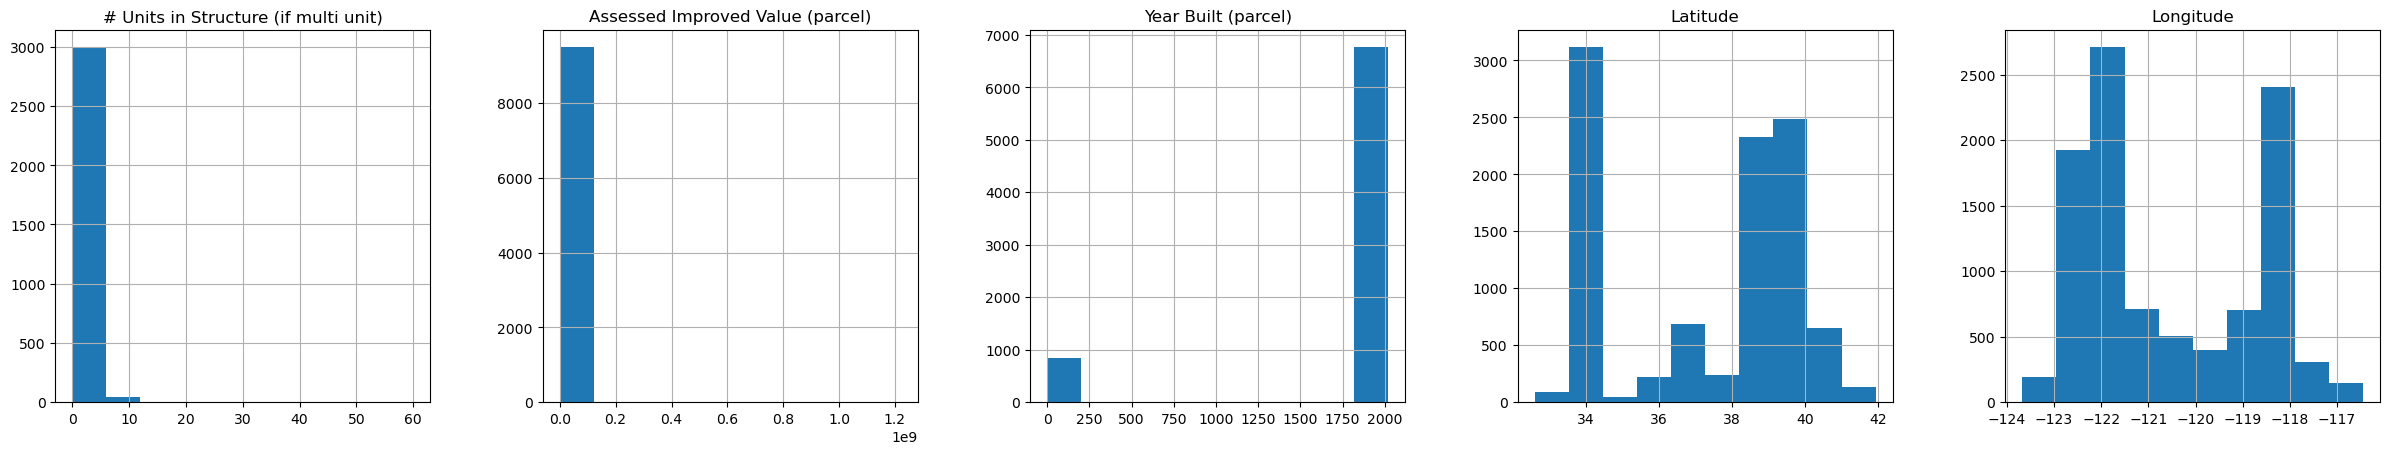

In [59]:
# Plot a histogram summary sheet of the continuous features and save in a png file
df[continuous_columns].hist(layout=(5, 5), figsize=(30,30), bins=10)
plt.savefig('continuous_histograms_1-1.pdf')

### Plot histograms individual sheet for all the continuous features

In [60]:
with PdfPages('continuous_histograms.pdf') as pdf:
    for col in continuous_columns:
        plt.figure(figsize=(10,5))
        df[col].plot(kind='hist', bins=20)
        plt.title(col)
        plt.ylabel('number of entries')
        plt.tight_layout()
        pdf.savefig()
        plt.close()

### Plot box plots summary sheet for all the continuous features

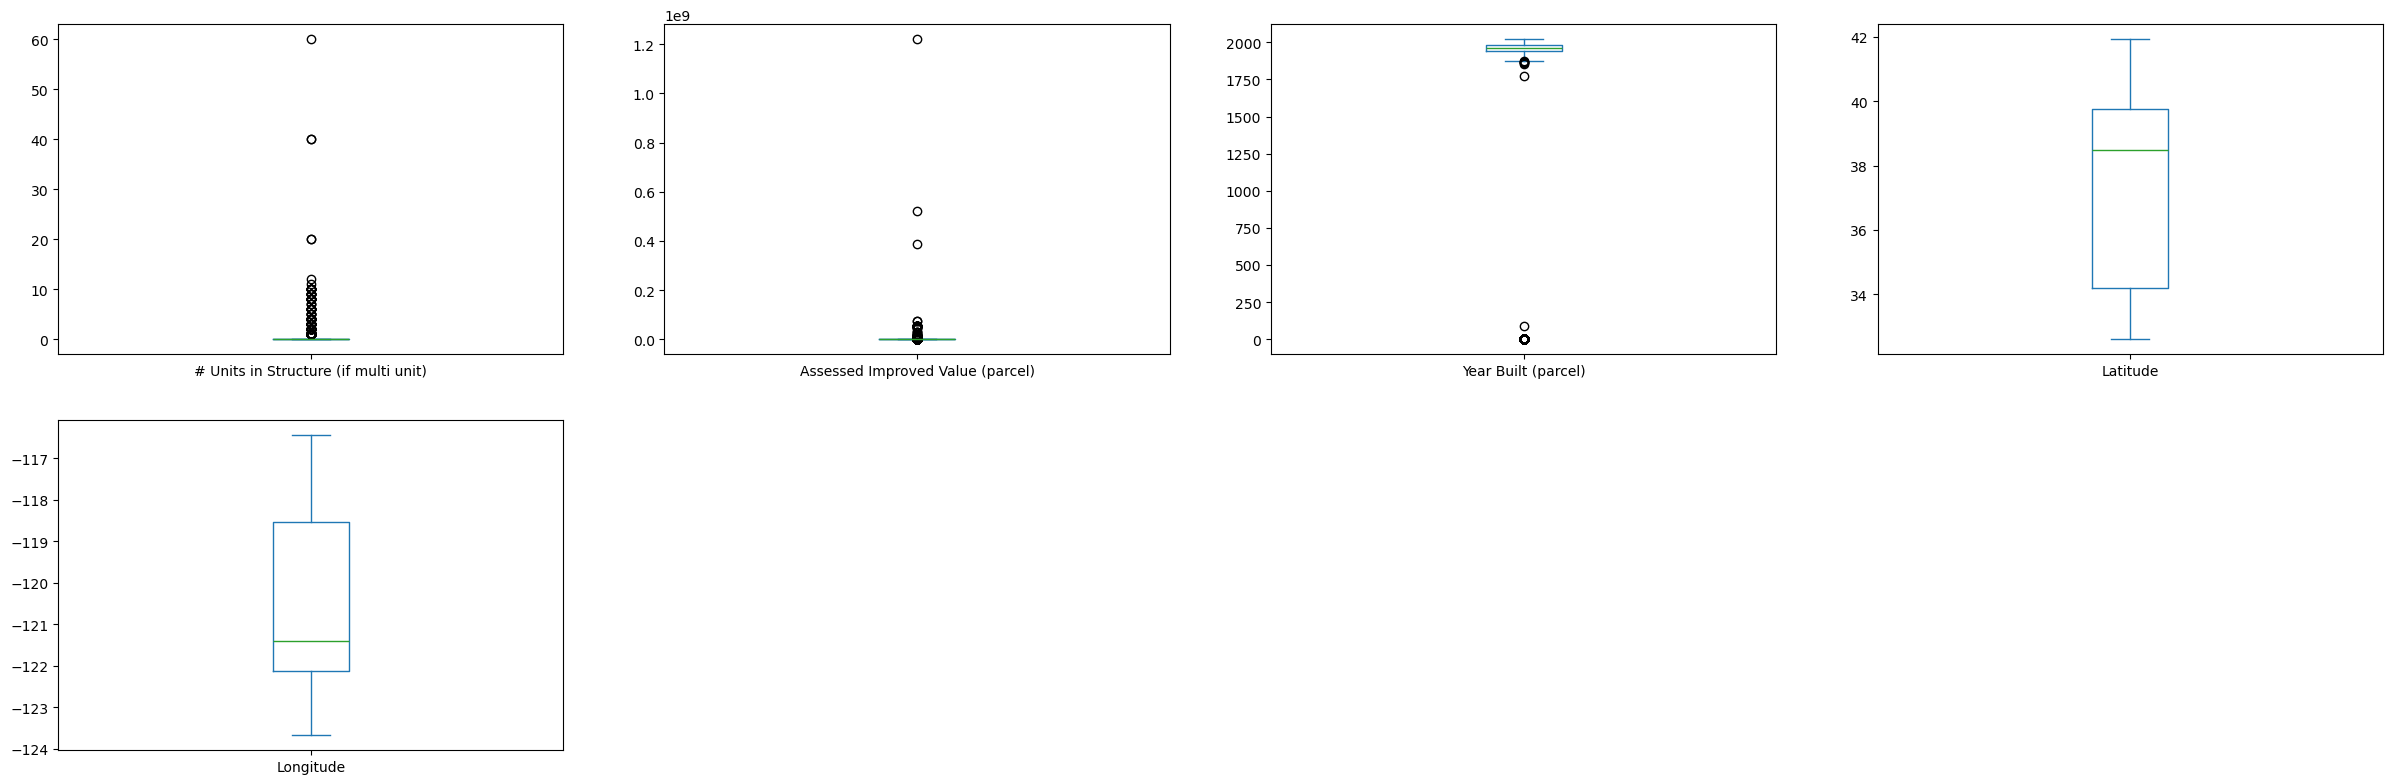

In [61]:
df[continuous_columns].plot(kind='box', subplots=True, figsize=(30,30), layout=(6,4), sharex=False, sharey=False)
plt.savefig('continuous_boxplots__summary1-1.pdf')

### Plot box plots individual sheet for all the continuous features

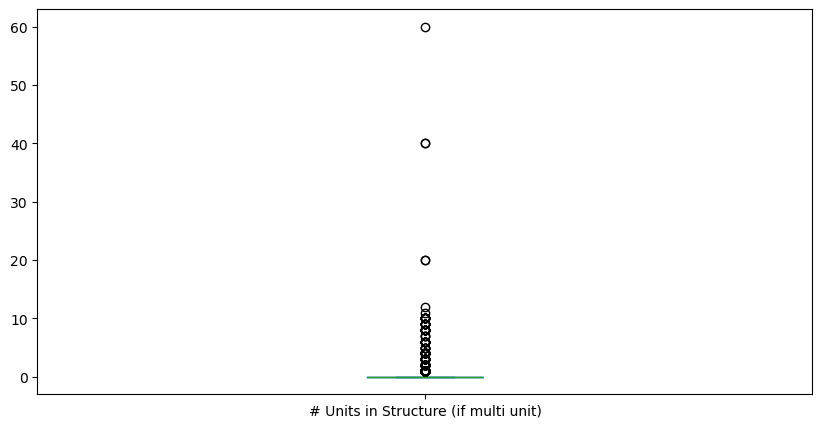

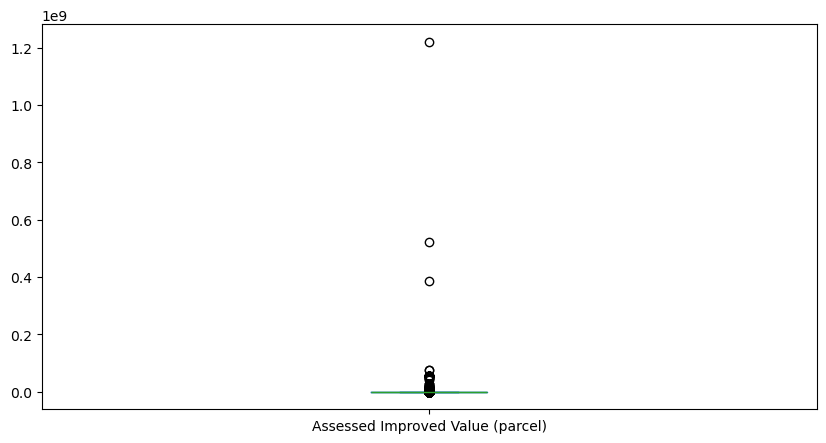

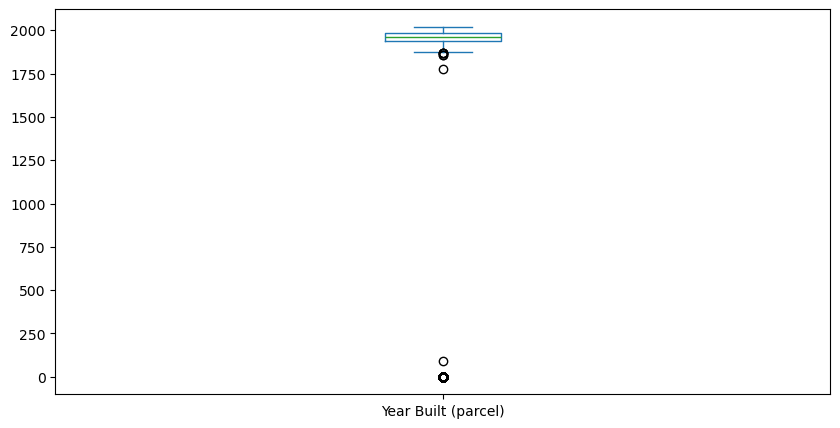

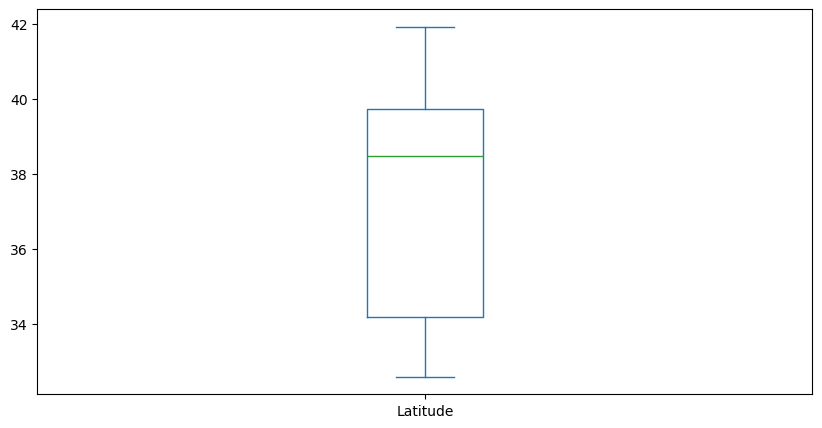

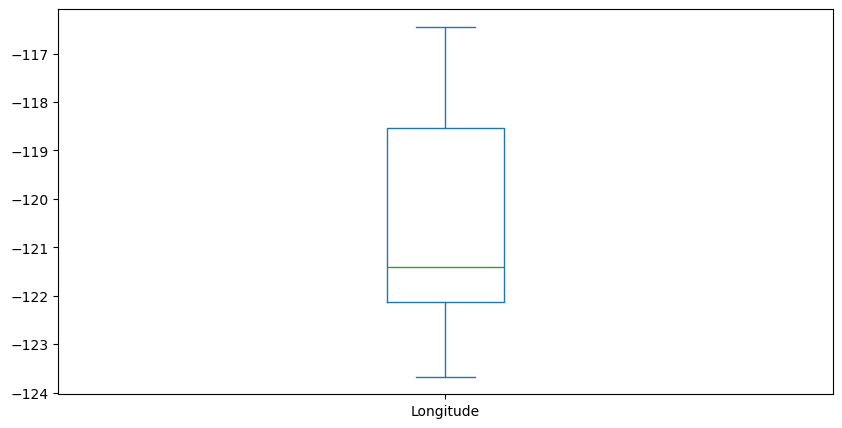

In [62]:
# Plot box plots for all the continuous features and save in a PDF file
with PdfPages('continuous_boxplots_1-1.pdf') as pp:
    for col in continuous_columns:
        f = df[col].plot(kind='box', figsize=(10,5))
        pp.savefig(f.get_figure())
        plt.show()  

### Create a table of descriptive statistics for the datetime feature

In [63]:
# Look once at the summary stats table for datetime features
df[datetime_columns].describe().T

,count,mean,min,25%,50%,75%,max
Incident Start Date,10000,2021-03-20 15:35:35.082099968,2013-08-07 00:00:00,2018-11-08 00:00:00,2020-09-09 00:00:00,2024-10-31 18:00:00,2025-01-09 00:50:35


In [64]:
# Define the %missing column
datetime_columns_perc_missing  = 100 * (df[datetime_columns].isnull().sum()/df.shape[0])

# Then store the values in a dataframe
df_datetime_perc_missing = pd.DataFrame(datetime_columns_perc_missing, columns=['%missing'])
df_datetime_perc_missing

,%missing
Incident Start Date,0.0


In [66]:
# Define the cardinality column
datetime_columns_card = df[datetime_columns].nunique()

# Then store the values in a dataframe
df_datetime_card = pd.DataFrame(datetime_columns_card, columns=['cardinality'])
df_datetime_card

,cardinality
Incident Start Date,153


In [67]:
# Add the missing values column
df_table_datetime = df[datetime_columns].describe().T
df_table_datetime

,count,mean,min,25%,50%,75%,max
Incident Start Date,10000,2021-03-20 15:35:35.082099968,2013-08-07 00:00:00,2018-11-08 00:00:00,2020-09-09 00:00:00,2024-10-31 18:00:00,2025-01-09 00:50:35


In [68]:
# Now we can begin to generate the final table
# The columns are assembled together to prepare the final table
df_datetime_columns_data_quality_report_table = pd.concat([df_table_datetime, df_datetime_perc_missing, df_datetime_card], axis=1)

# Save the table to a csv file
df_datetime_columns_data_quality_report_table.to_csv("DateTimeFeatureDescription.csv", index_label='Feature')

### Create bar plots for all the categorical features with regular cardinalities on individual sheets

* As discussed earlier, we know that the categorical features *Site Address*, *Street Name*, *City*, *Zip Code*, *Incident Start Date* and *Community* have very high cardinalities.

* We have also determined previously which categorical features have low cardinality. These will be our regular cardinalities.


In [69]:
# Create a list of categorical features with regular cardinalities
categorical_with_low_cardinality = [
    '* CAL FIRE Unit',
    '* Street Type (e.g. road, drive, lane, etc.)',
    '* Structure Type',
    '* Exterior Siding',
    'Structure Defense Actions Taken',
    '* Roof Construction',
    'County',
    '* Damage',
    'Structure Category',
    '* Vent Screen',
    '* Eaves',
    '* Deck/Porch On Grade',
    '* Deck/Porch Elevated',
    '* Window Pane',
    '* Patio Cover/Carport Attached to Structure',
    'Distance - Propane Tank to Structure',
    'Distance - Residence to Utility/Misc Structure &gt; 120 SQFT',
    '* Fence Attached to Structure'
]

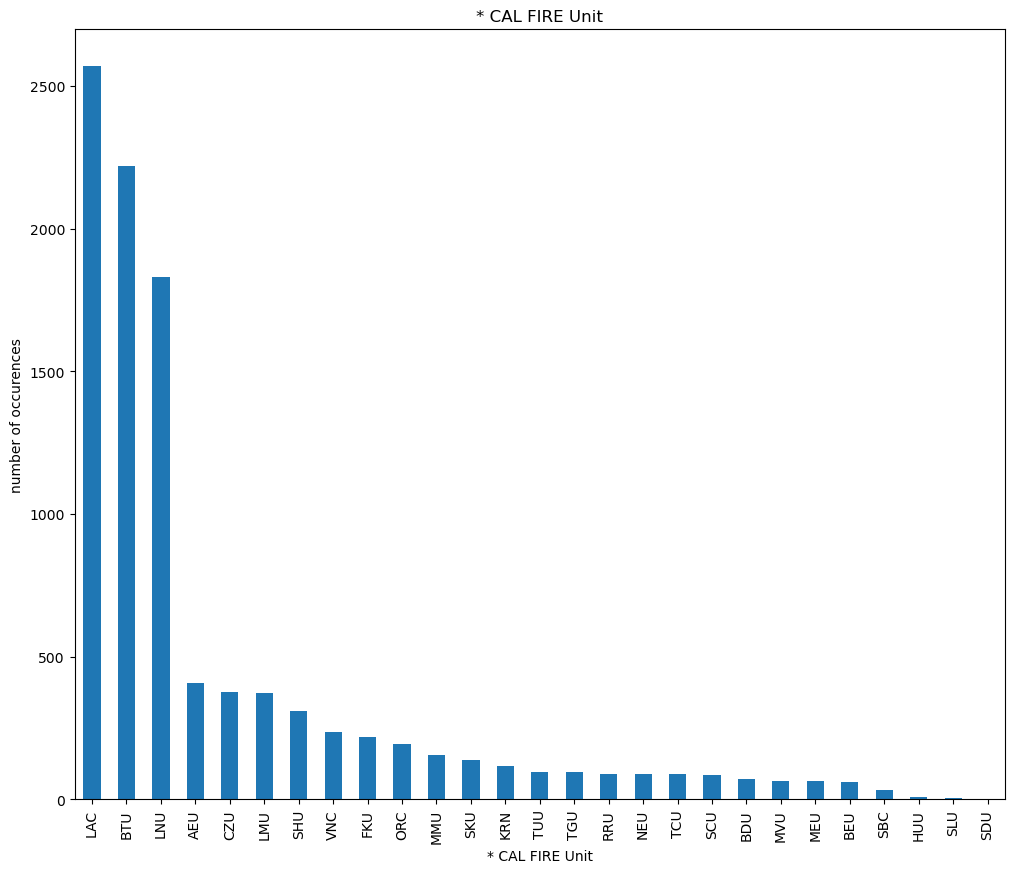

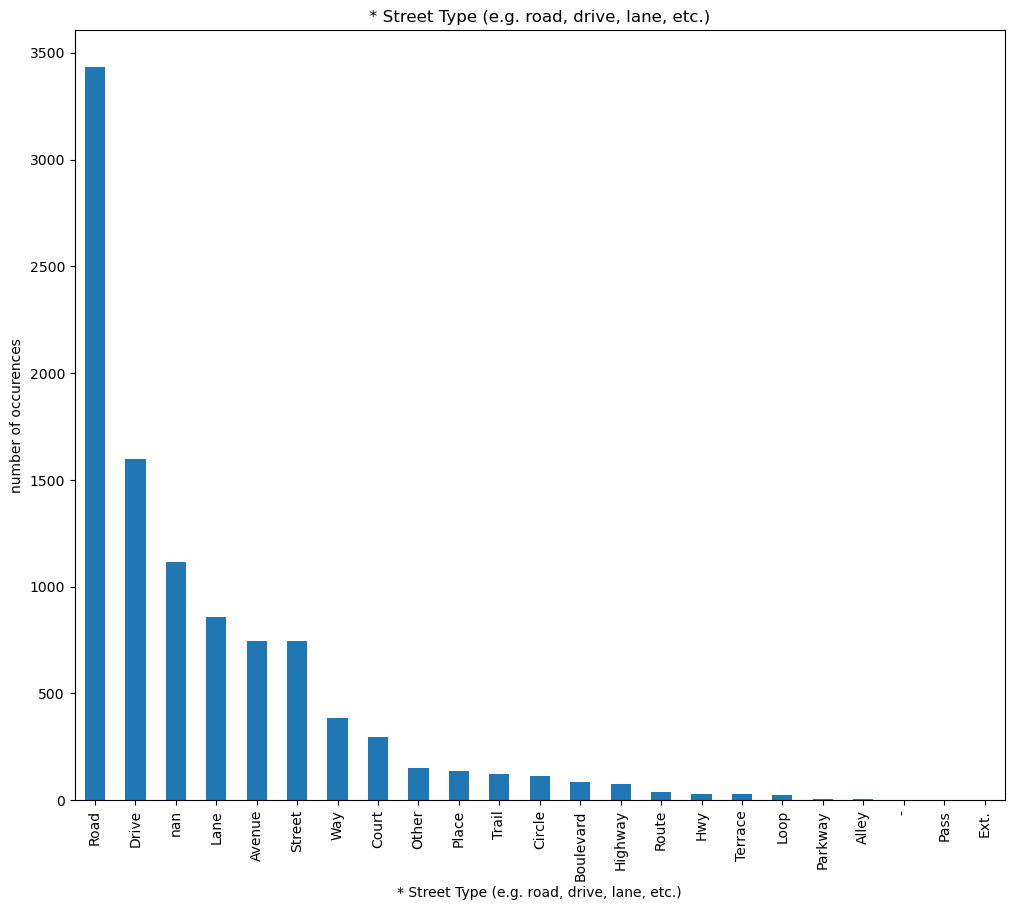

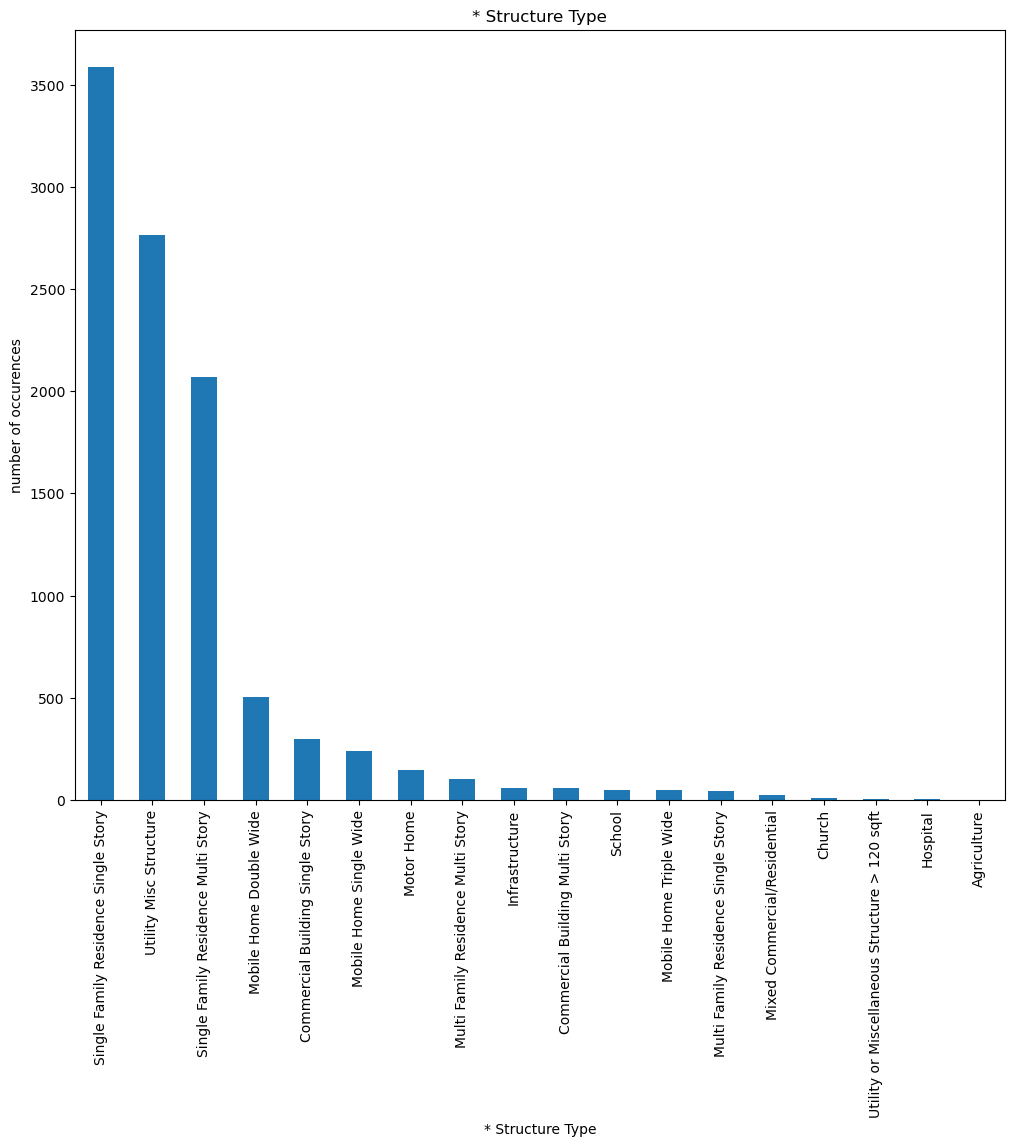

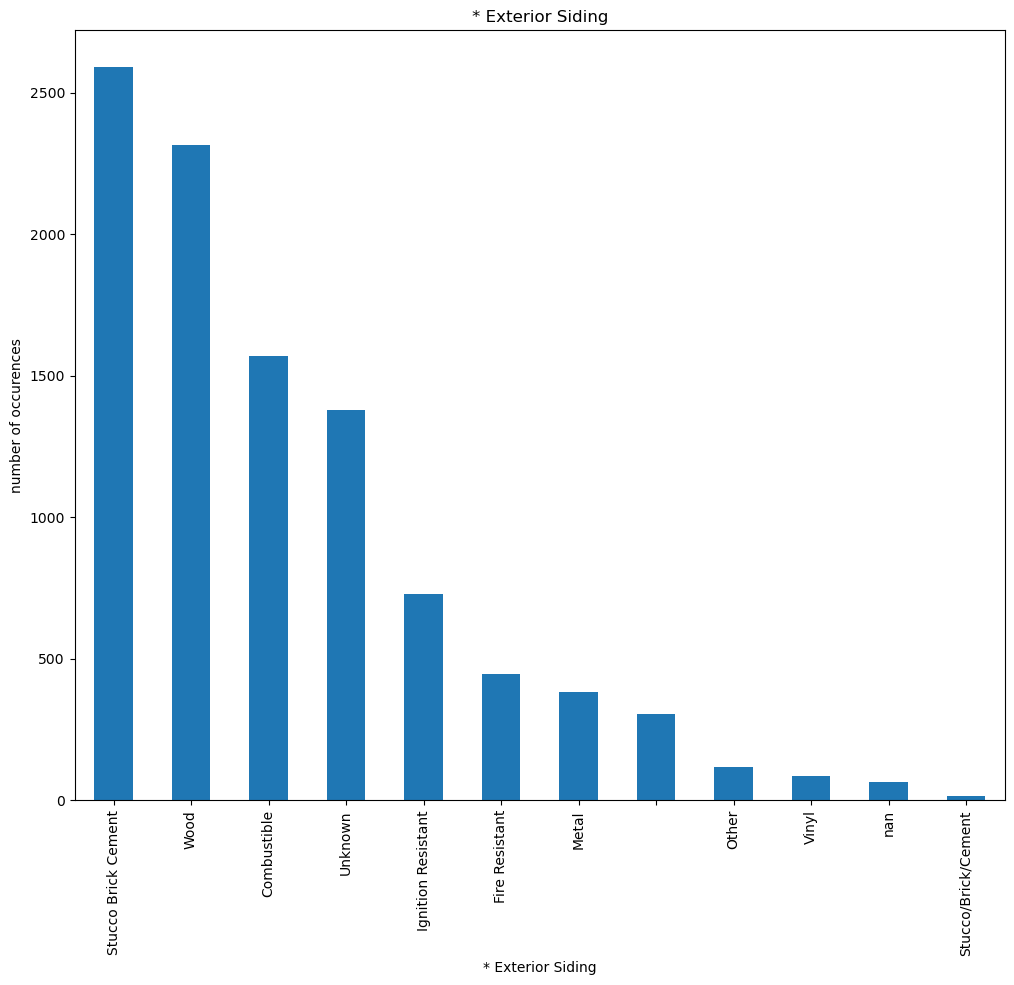

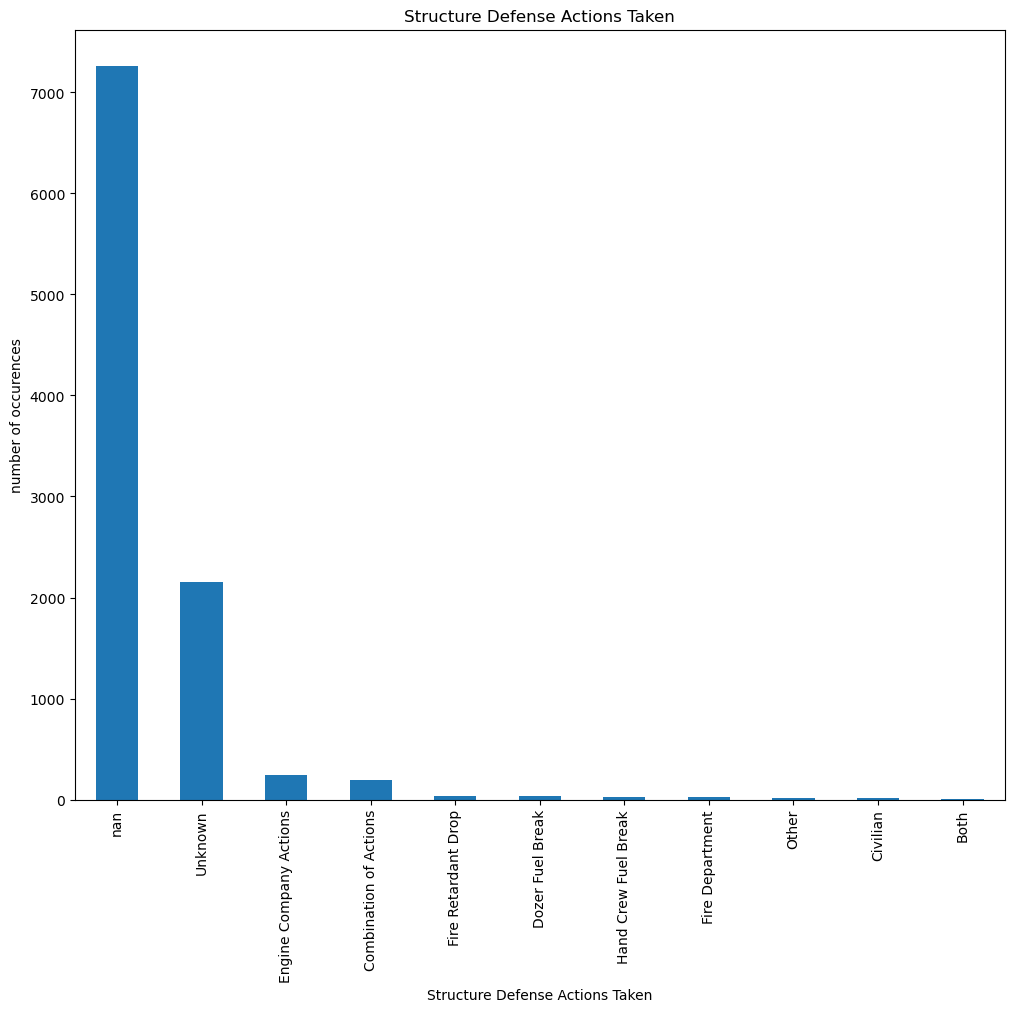

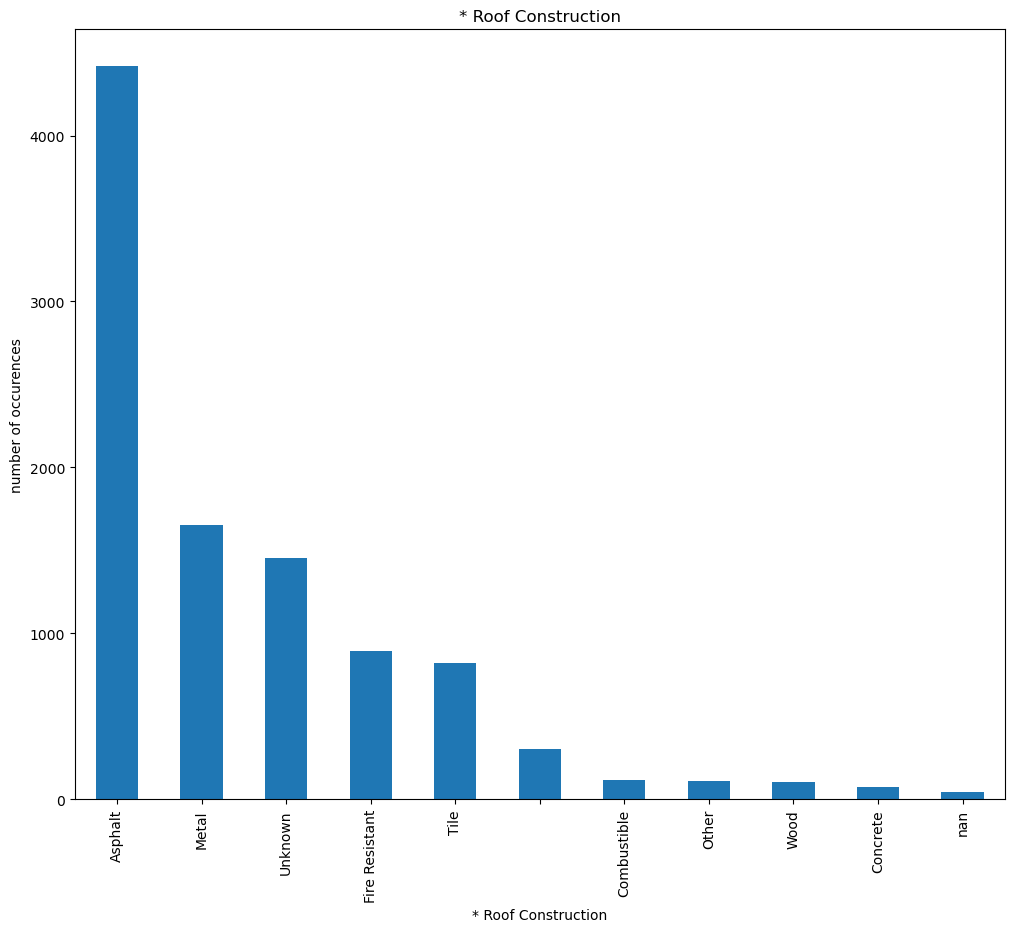

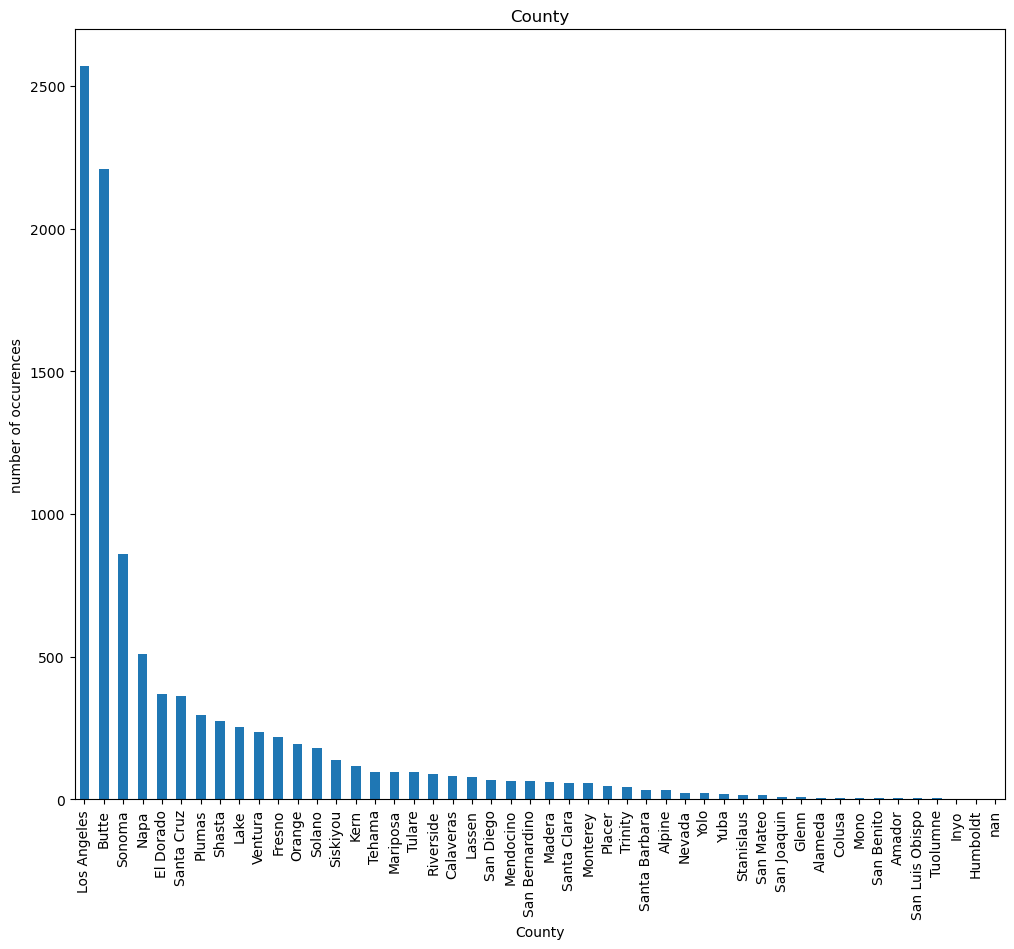

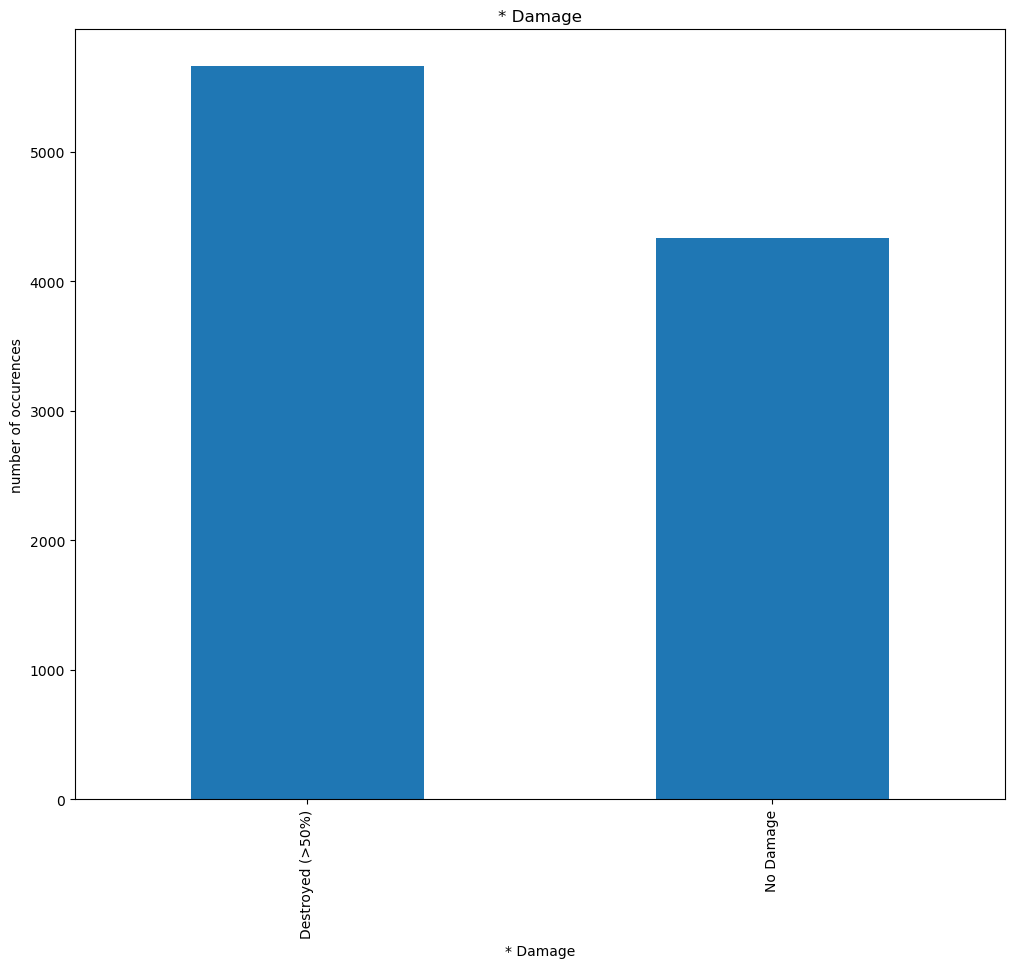

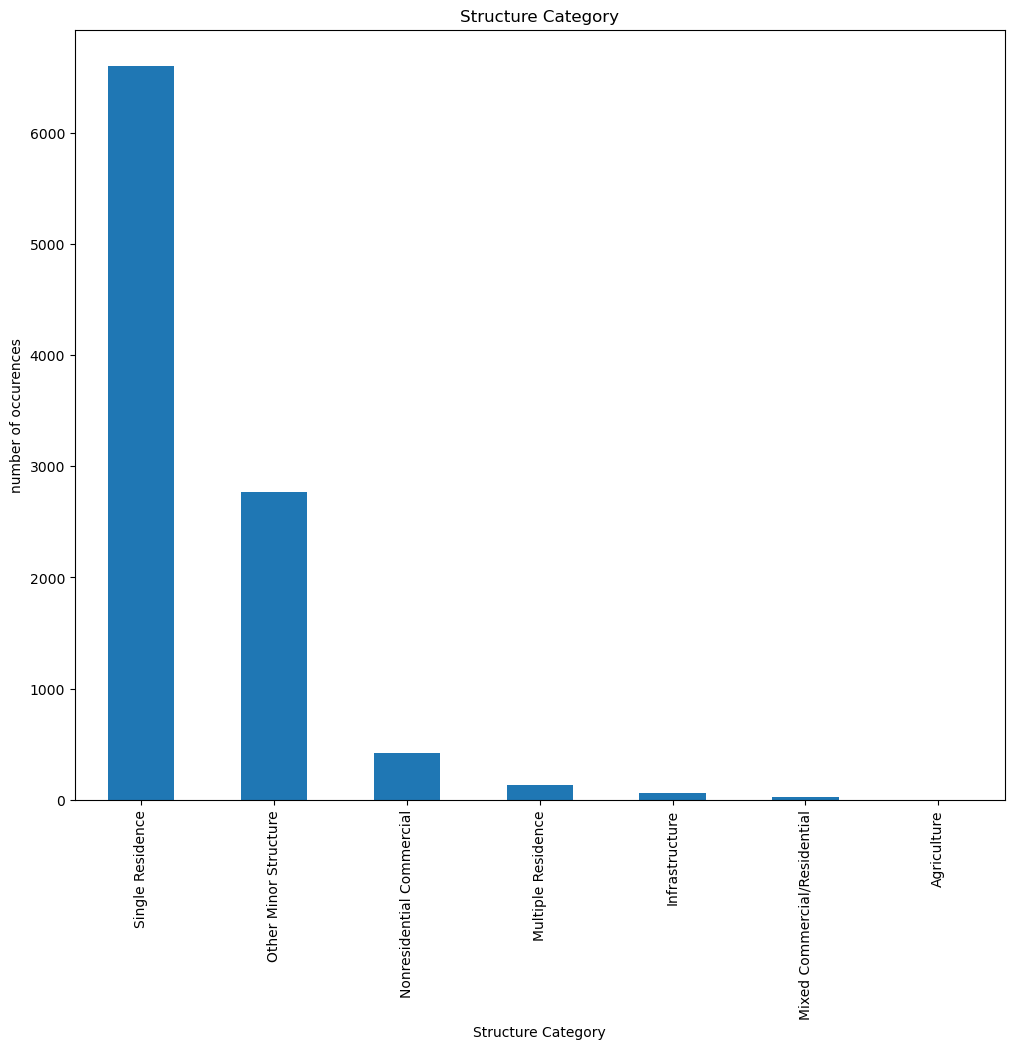

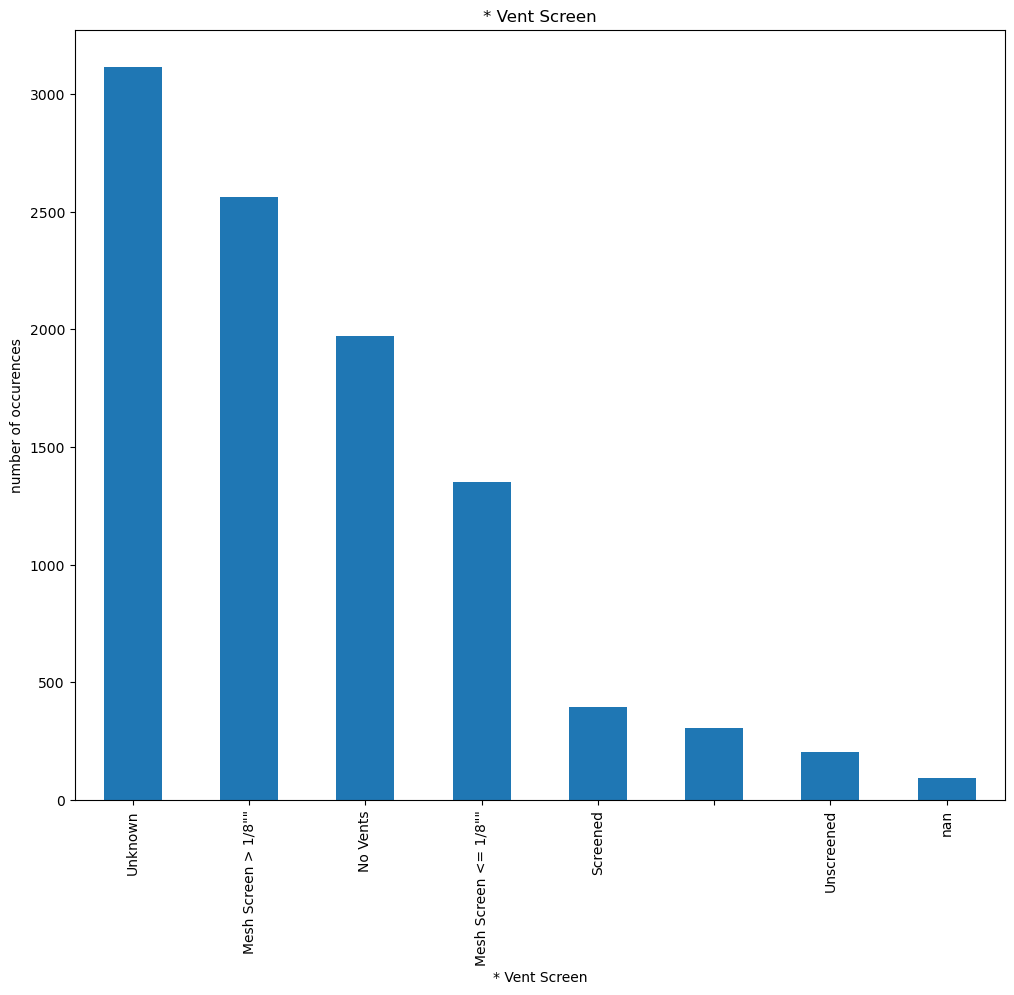

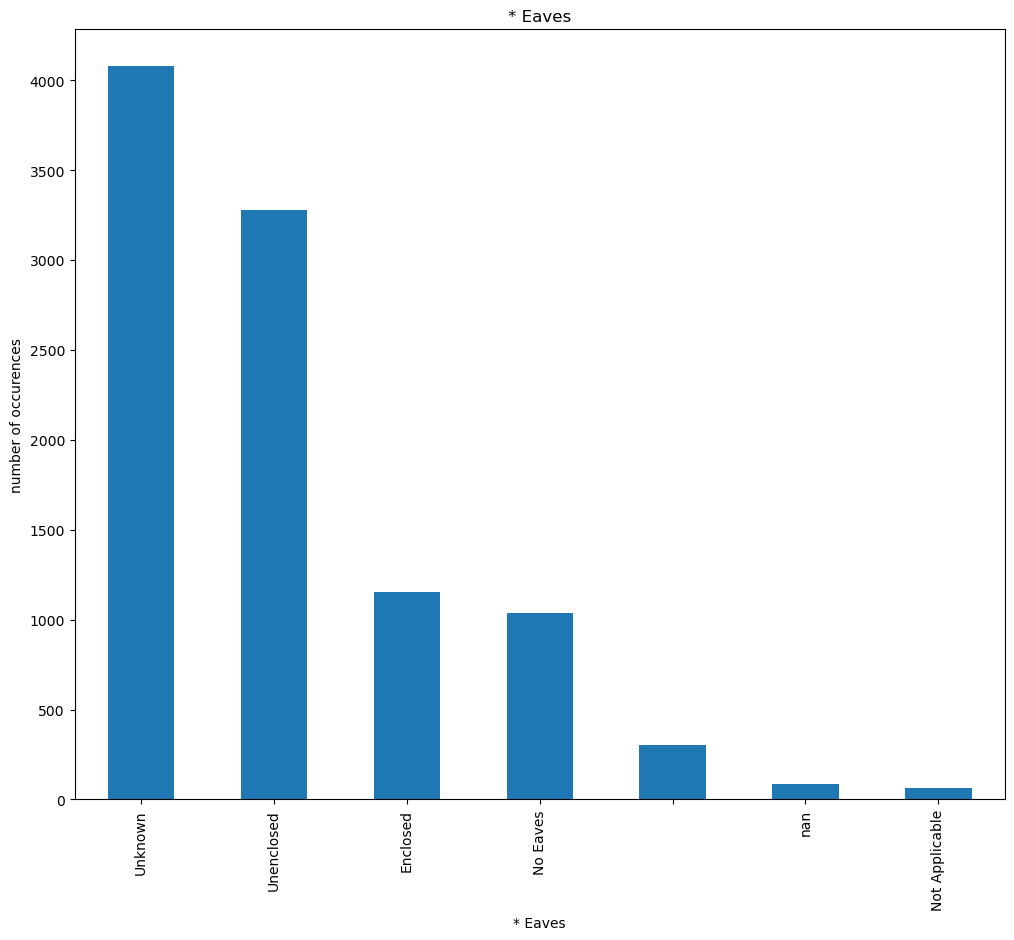

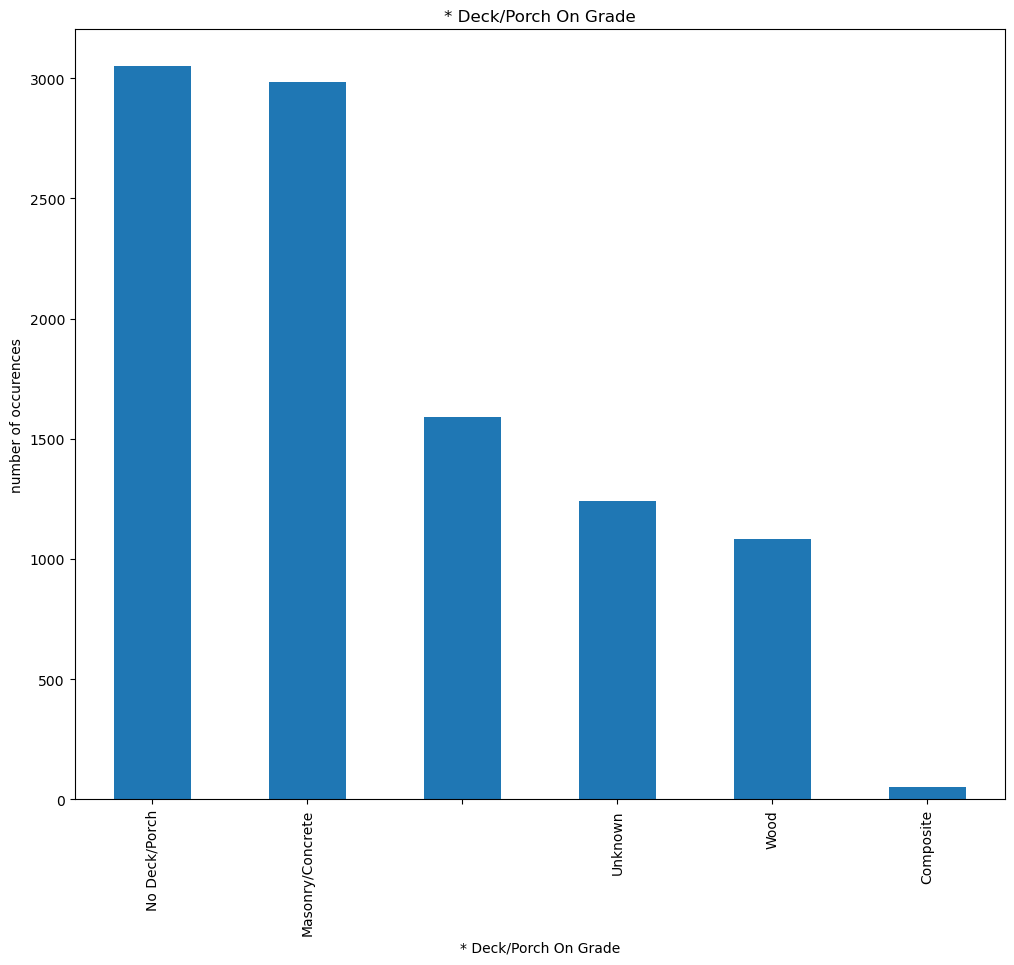

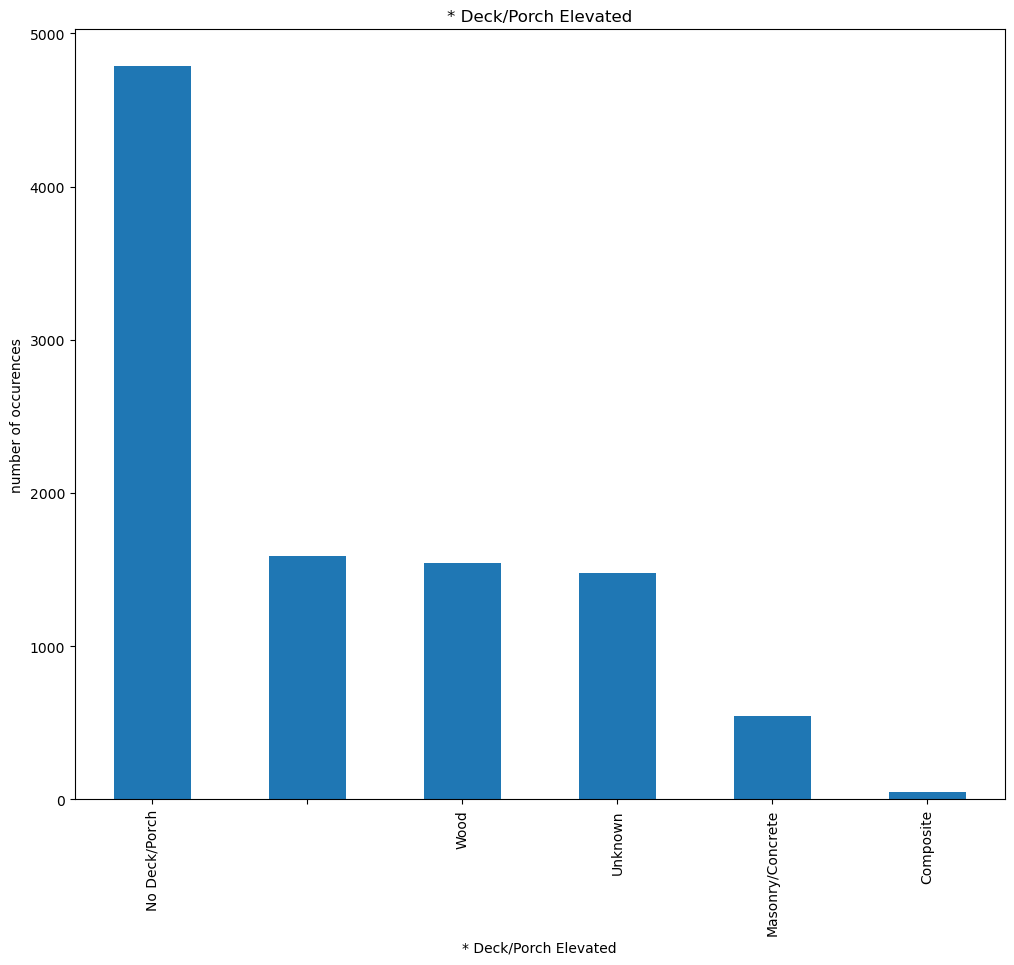

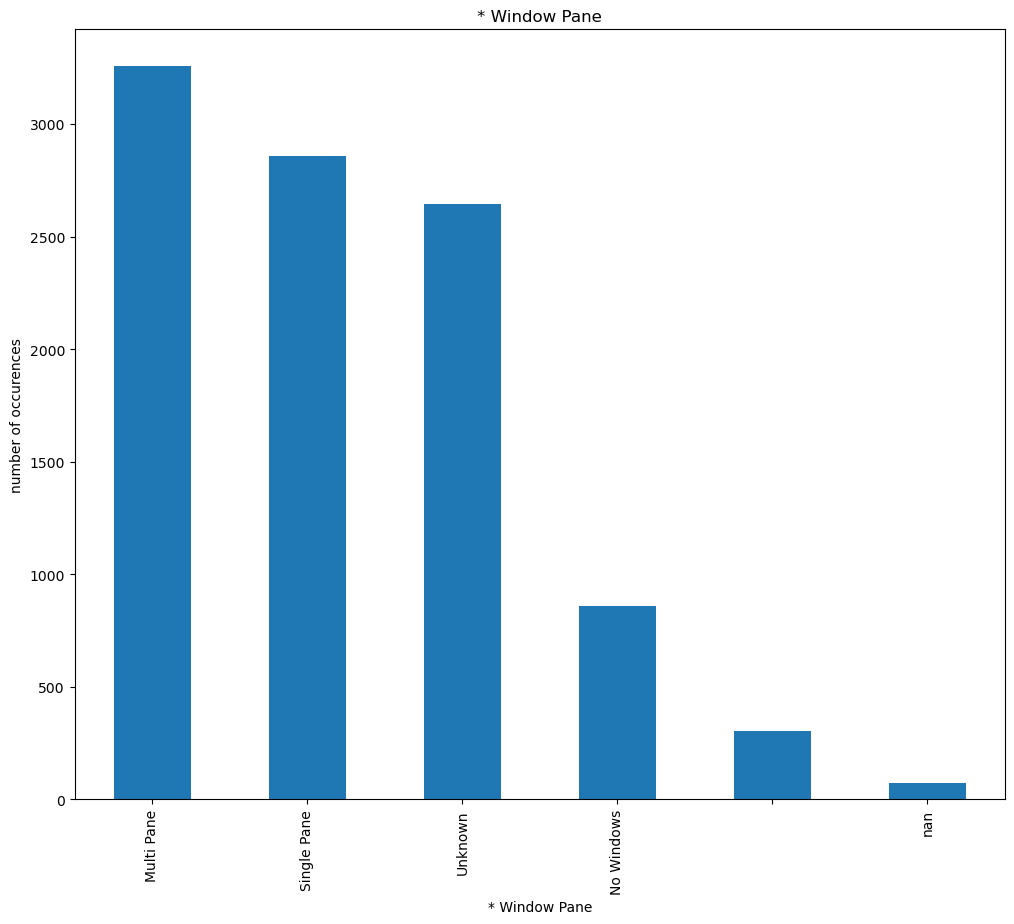

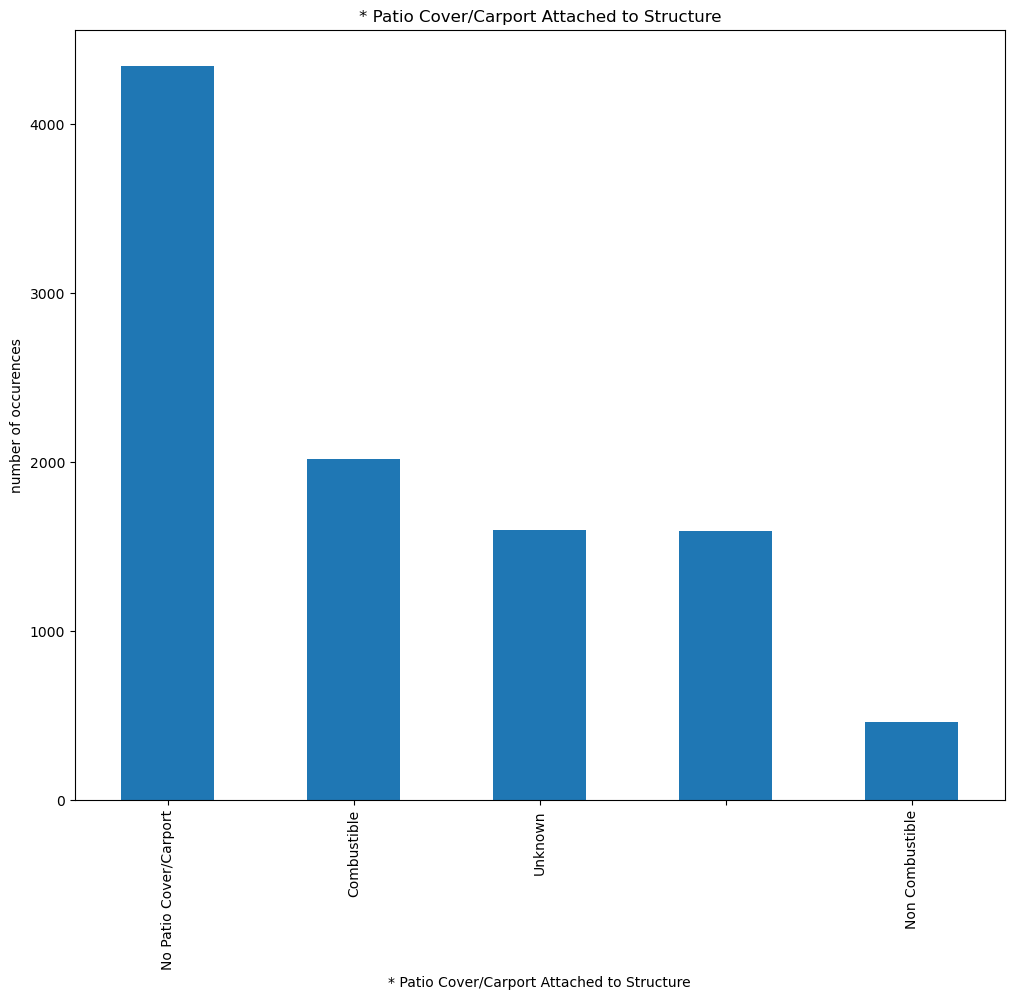

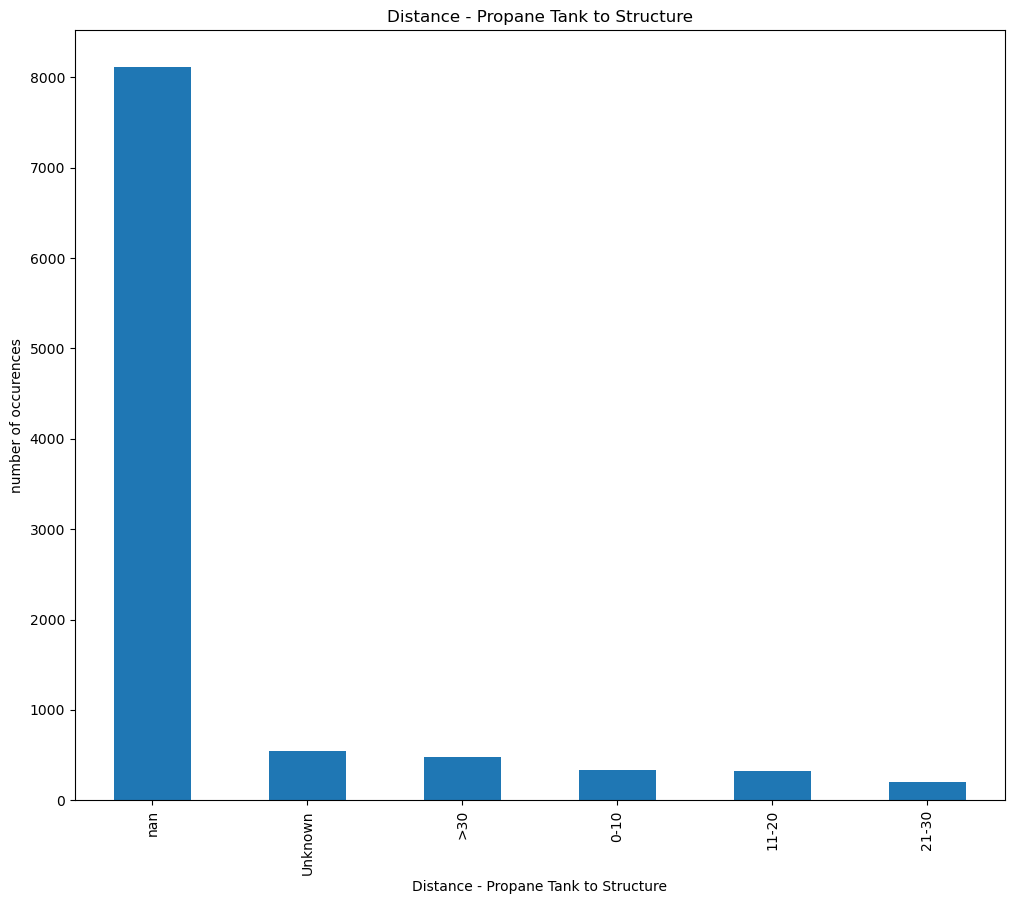

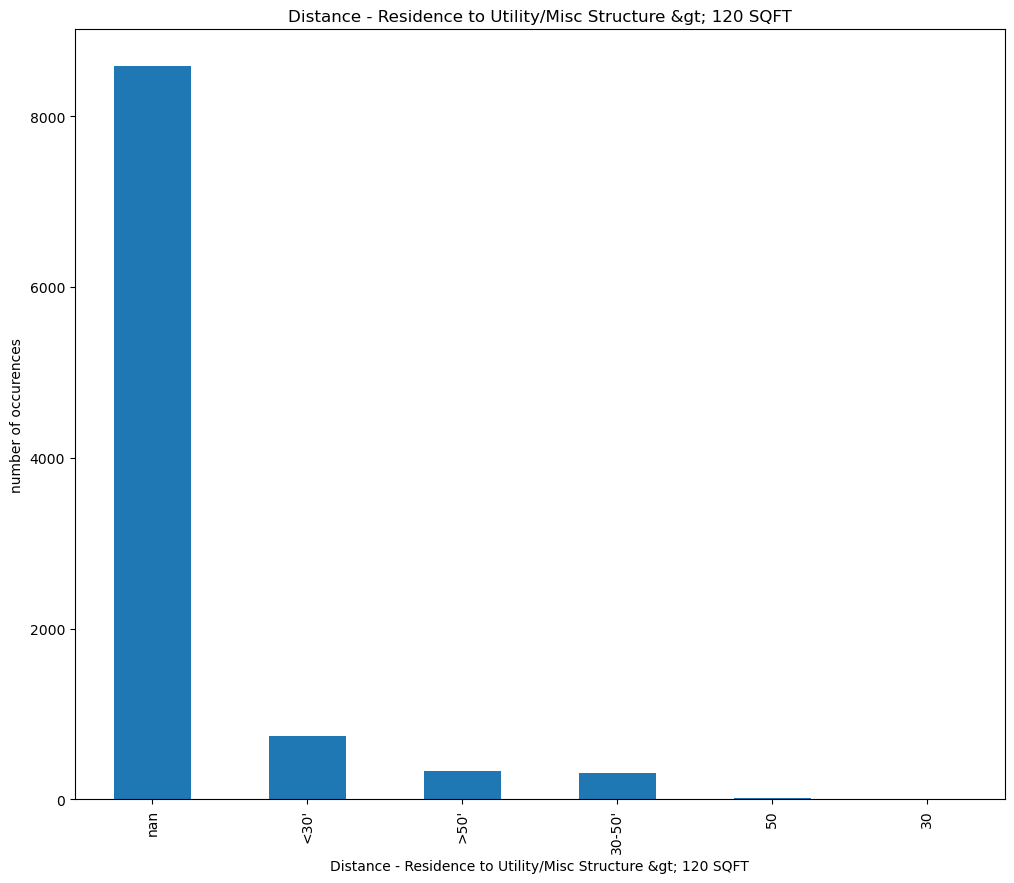

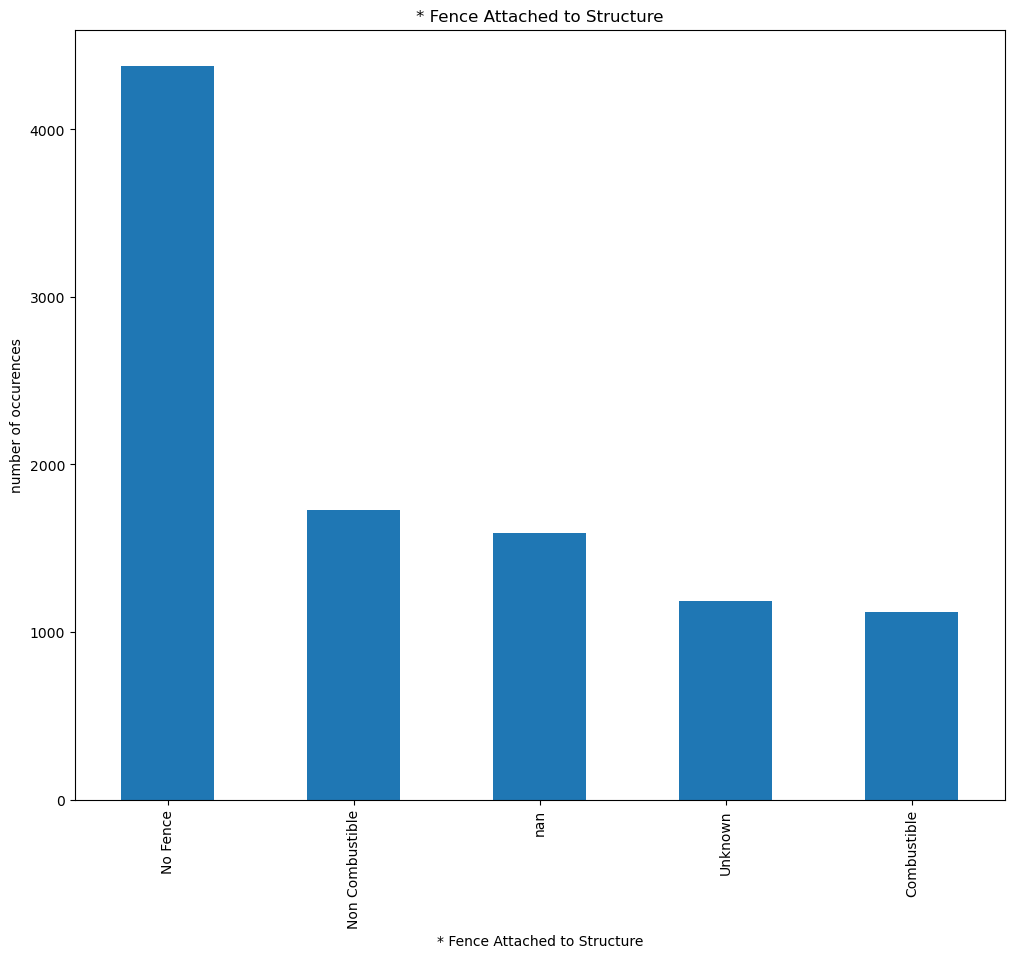

In [70]:
# Plot bar charts for all categorical features with low cardinality and save them in a single PDF file
pp = PdfPages('categorical_lowcardinality_barcharts.pdf')

#dropna=Flase allows us to view the missing values
for column in categorical_with_low_cardinality:
    f = df[column].value_counts(dropna=False).plot(kind='bar', title=column, figsize=(12,10))
    plt.ylabel('number of occurences')
    pp.savefig(f.get_figure())
    plt.show()

pp.close()

### Create summary sheet of bar plots for categorical features with regular cardinality

In [71]:
plt.figure(figsize=(20, 30)) 

for i in range(len(categorical_with_low_cardinality)):
   plt.subplot(6, 3, i+1)
   column = categorical_with_low_cardinality[i]
   df[column].value_counts().plot(kind='bar')
   plt.title(column, fontsize=8)
   plt.xticks(rotation=45, ha='right', fontsize=6)
   plt.yticks(fontsize=6)

plt.tight_layout()
plt.savefig('categorical_low_cardinality_summary.pdf')
plt.close()

### Create bar plots for categorical features with high cardinality on individual sheets

I will now create a bar plot for each of the categorical features with high cardinality separately. I have decided to use 15 values for each of the plots. I believe this is a suitable number for the high cardinality, as well for the extremely high cardinality exhibited by *Site Address (parcel)* and *Street Name* with approximately 4000 or greater unique values. Using 15 values will provide sufficient detail to show the most significant categories without overwhelming the visualisation. Therefore, each bar plot generated will be interepretable and provide an astute overview of the most common occurences. The issue of high cardinality will be discussed in greater detail within the Data Quality Plan.

In [72]:
# Create a list of categorical features with high cardinalities
categorical_with_high_cardinality = ['OBJECTID', 'Site Address (parcel)', '* Street Number', '* Street Name', 'Community', '* City', 'Zip Code']

In [73]:
# Create all bar plots for features with high cardinality in a single PDF
with PdfPages('categorical_plots_high_cardinality.pdf') as pdf:
    for column in categorical_with_high_cardinality:
        # Plot and format
        df[column].value_counts()[:15].plot(kind='bar', figsize=(10,5))
        plt.title(column)
        plt.ylabel('Count')
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        
        # Save to PDF and clear figure
        pdf.savefig()
        plt.close()

### Create bar plots summary sheet for all categorical features with high cardinality

In [74]:
plt.figure(figsize=(15, 20))

for i in range(len(categorical_with_high_cardinality)):
    if i < 8:
        plt.subplot(4, 2, i+1)
        column = categorical_with_high_cardinality[i]
        df[column].value_counts()[:15].plot(kind='bar')
        plt.title(column)
        plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.savefig('categorical_high_cardinality_summary.pdf')
plt.close()

### Create histogram for the datetime feature



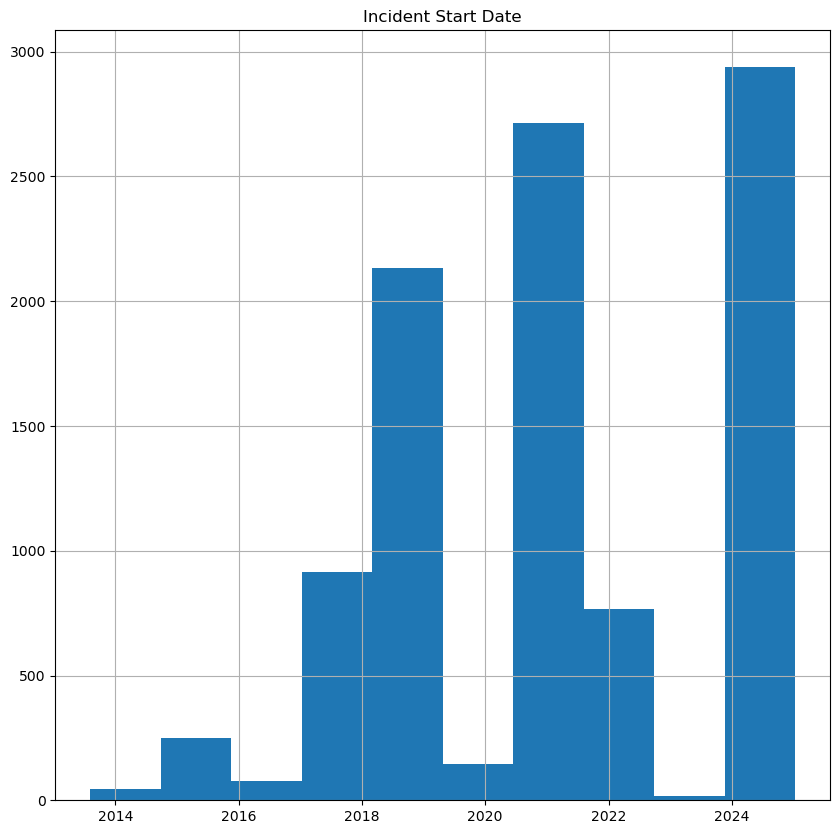

In [75]:
df[datetime_columns].hist(layout=(1, 1), figsize=(10,10), bins=10)
plt.savefig('datetime_histograms_1-1.pdf')
plt.show()

### Running assessment

* Cardinalities: As previously established in this assignment, the high cardinalities of some features pose a problem. Rigorous analysis is difficult to carry out on these cardinalities. They present problems for algorithms incorporating predictive analytics.

* Missing values: There are multiple instances of missing values for a number of features. *Street Type*, **City*, *Zip Code*, *Community*, *Structure Defense Actions Taken*, *# Units in Structure (if multi unit), *Year Built (parcel)* all have approximately 1000 or more instances of missing values.

* Ambiguous values: For *Site Address (parcel)*, there are 13 instances of "NULL NULL UNKNOWN CA 00000". This presents danger when fire incidents occur and human error in data collection, thus affecting consequent data entry.

### Initial Findings

All initial findings and detailed discussion for each feature, categorical and continuous alike can be found in the corresponding *Data_Quality_Report.pdf* 

## (2) Data Understanding: Data Quality Plan for the cleaned CSV file

# Data Quality Plan

| Variable | Identified Issue | Proposed Solution |
|---------|------------------|-------------------|
| State | Constant value | This column has already been dropped in Part 1 - no variability in the data
| Hazard | Constant value | This column has already been dropped in Part 1 - no variability in the data
| OBJECTID | None | Do Nothing |
| Damage | None | Do Nothing |
| CAL FIRE Unit | None | Do Nothing |
| County | None | Do Nothing |
| Structure Type | None | Do Nothing |
| Structure Category | None | Do Nothing |
| Latitude | None | Do Nothing |
| Longitude | None | Do Nothing |
| Deck/Porch on Grade | Missing values | Fill in the missing values with the mode of the column
| Deck/Porch Elevated | Missing values | Fill in the missing values with the mode of the column
| Street Number | Missing values| Drop missing values |
| Street Name | Missing values | Find matching addresses with non-missing Street Names: If found, use those Street Names to fill in the missing values; If no matching Street Names are found, Site Address is used.
| Street Type | Missing values | Fill in the missing values with the mode of the column
| City | Missing values (25.2%) | Use data in other columns to impute missing values |
| Zip Code | Missing values (40.2%) | Drop the column – other columns contain address information, so locations can be determined effectively |
| Incident Start Date | Needs to be converted to datetime format | This has already been converted to datetime format in Part 1
| Structure Defense Actions Taken | Missing values | Drop the column – too many missing values as above the 60/40 threshold |
| Community | Missing values | Drop this column – to reduce noise |
| # Units in Structure (if multi unit) | Missing values | Drop this column – too many missing values as above the 60/40 threshold |
| Roof Construction | Missing values | Fill the missing values with the mode of the column |
| Eaves | Missing values | Fill the missing values with the mode of the column |
| Vent Screen | Missing values | Fill the missing values with the mode of the column |
| Exterior Sliding | Missing values | Fill the missing values with the mode of the column |
| Window Pane | Missing values | Fill the missing values with the mode of the column |
| Patio Cover/Carport Attached to Structure | Missing values  | Fill the missing values with the mode of the column |
| Fence Attached to Structure | Missing values | Fill the missing values with the mode of the column |
| Distance – Propane Tank to Structure | Missing values | Drop the column – too many missing values as above the 60/40 threshold |
| Distance – Residence to Utility/Misc Structure > 120 SQFT | Missing values| Drop the column – too many missing values as above the 60/40 threshold |
| Site Address (parcel) | Missing values | Remove the rows with missing values |
| Year Built (parcel) | Missing values and outliers present |Missing zero values will be replaced with zeros. Then, NaN values are imputed with the median of the non-zero values. Remove the outliers using a Modified Interquartile Range (IQR) method that calculates the theoretical and upper lower bound, then finds the actual data closest to the theoretical bounds. This approach ensures the boundaries incorporated are at the actual data points.|
| Assessed Improved Value (parcel) | Missing values and outliers present | Median imputation of missing values. Remove the outliers using the Interquartile Range (IQR) method (upper and lower bounds for outliers are calculated, where lower bound is first quartile minus 1.5 x IQR and upper bound is third quartile + 1.5 x IQR). Clipping to zero means no negative lower bounds. Extreme values are trimmed to create better visualisation. Overall, distortion is prevented in the prediction model. |

In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages

# The following packages need to be implemented for the handling of the City feature in the dataset
import time
from geopy.geocoders import Nominatim
from geopy.exc import GeocoderTimedOut, GeocoderServiceError
import pandas as pd
from tqdm import tqdm

In [77]:
# Read in data from cleaned csv file from part 1 to pandas dataframe.
df = pd.read_csv('cal-wildfires-24110699_Updated_part1.csv')
df.head(5)



,Unnamed: 0,OBJECTID,* Damage,* Street Number,* Street Name,"* Street Type (e.g. road, drive, lane, etc.)",* City,Zip Code,* CAL FIRE Unit,County,...,* Deck/Porch Elevated,* Patio Cover/Carport Attached to Structure,* Fence Attached to Structure,Distance - Propane Tank to Structure,Distance - Residence to Utility/Misc Structure &gt; 120 SQFT,Assessed Improved Value (parcel),Year Built (parcel),Site Address (parcel),Latitude,Longitude
0,0,67187,Destroyed (>50%),0.0,Douglas,Street,Middletown,0.0,LNU,Lake,...,,,NaN,NaN,NaN,116340.0,NaN,21181 STEWART ST MIDDLETOWN CA 95461,38.752,-122.618
1,1,24164,Destroyed (>50%),660.0,Swanton,Road,NaN,NaN,CZU,Santa Cruz,...,No Deck/Porch,Combustible,No Fence,>30,NaN,NaN,NaN,660 SWANTON RD DAVENPORT CA 95017,37.123,-122.259
2,2,28049,No Damage,746655.0,Roop,Drive,Doyle,NaN,LMU,Lassen,...,Unknown,No Patio Cover/Carport,Non Combustible,NaN,NaN,95979.0,1978.0,746655 ROOP DR DOYLE CA 96109,40.039,-120.112
3,3,45623,Destroyed (>50%),1679.0,Middle Tree,Lane,Paradise Northeast A,NaN,BTU,Butte,...,No Deck/Porch,No Patio Cover/Carport,No Fence,NaN,NaN,125320.0,1977.0,1679 MIDDLE TREE LN PARADISE CA 95969,39.792,-121.582
4,4,90826,No Damage,72.0,Vista Montemar,Other,Laguna Niguel,92677.0,ORC,Orange,...,Masonry/Concrete,No Patio Cover/Carport,Non Combustible,NaN,NaN,691996.0,1996.0,"72 VISTA MONTEMAR, LAGUNA NIGUEL, CA 92677",33.525,-117.727


In [78]:
# int64 and float64 are numeric columns
# Some "object" type columns may be better treated as continuous or categorical, this will be investigated.

df.dtypes

Unnamed: 0                                                        int64
OBJECTID                                                          int64
* Damage                                                         object
* Street Number                                                 float64
* Street Name                                                    object
* Street Type (e.g. road, drive, lane, etc.)                     object
* City                                                           object
Zip Code                                                        float64
* CAL FIRE Unit                                                  object
County                                                           object
Community                                                        object
Incident Start Date                                              object
Structure Defense Actions Taken                                  object
* Structure Type                                                

In [ ]:
# We will check the data of the numeric type
pd.set_option("display.precision", 3)
df.describe()

,Unnamed: 0,OBJECTID,* Street Number,Zip Code,# Units in Structure (if multi unit),Assessed Improved Value (parcel),Year Built (parcel),Latitude,Longitude
count,10000.000,10000.000,9.667e+03,5976.000,3044.000,9.499e+03,7599.000,10000.000,10000.000
mean,4999.500,65300.039,7.032e+04,63513.431,0.314,8.079e+05,1748.705,37.381,-120.521
std,2886.896,38194.129,5.903e+06,43043.490,1.936,1.460e+07,615.771,2.487,1.810
min,0.000,1.000,0.000e+00,0.000,0.000,0.000e+00,0.000,32.598,-123.673
25%,2499.750,31462.250,7.000e+02,0.000,0.000,7.000e+04,1939.000,34.196,-122.125
50%,4999.500,64888.000,3.020e+03,91001.000,0.000,1.602e+05,1962.000,38.474,-121.406
75%,7499.250,98626.000,8.279e+03,93066.000,0.000,3.350e+05,1983.000,39.744,-118.542
max,9999.000,131814.000,5.804e+08,96150.000,60.000,1.220e+09,2020.000,41.924,-116.447


In [80]:
# Keep only the numeric features
numeric_columns = df.select_dtypes(['int64', 'float64']).columns
numeric_columns

Index(['Unnamed: 0', 'OBJECTID', '* Street Number', 'Zip Code',
       '# Units in Structure (if multi unit)',
       'Assessed Improved Value (parcel)', 'Year Built (parcel)', 'Latitude',
       'Longitude'],
      dtype='object')

In [81]:
# Select only the numeric features
df[numeric_columns]

,Unnamed: 0,OBJECTID,* Street Number,Zip Code,# Units in Structure (if multi unit),Assessed Improved Value (parcel),Year Built (parcel),Latitude,Longitude
0,0,67187,0.0,0.0,NaN,116340.0,NaN,38.752,-122.618
1,1,24164,660.0,NaN,NaN,NaN,NaN,37.123,-122.259
2,2,28049,746655.0,NaN,NaN,95979.0,1978.0,40.039,-120.112
3,3,45623,1679.0,NaN,NaN,125320.0,1977.0,39.792,-121.582
4,4,90826,72.0,92677.0,0.0,691996.0,1996.0,33.525,-117.727
...,...,...,...,...,...,...,...,...,...
9995,9995,8952,55420.0,0.0,0.0,0.0,0.0,37.202,-119.252
9996,9996,60301,0.0,95306.0,NaN,79870.0,NaN,37.494,-120.140
9997,9997,124598,861.0,90272.0,NaN,NaN,NaN,34.044,-118.525
9998,9998,32728,1574.0,NaN,NaN,0.0,1900.0,39.782,-121.585


In [82]:
# Convert all columns to category except continuous features
for column in df.columns:
    if column not in numeric_columns:
        df[column] = df[column].astype('category')


# Convert Incident Start Date column to datetime feature
df['Incident Start Date'] = pd.to_datetime(df['Incident Start Date'].astype(str))

# For continuous features, make sure they are numeric
for column in numeric_columns:
    if column in df.columns and column is not "Incident Start Date":
        df[column] = pd.to_numeric(df[column], errors='coerce')

# Print dtypes to confirm changes have occured
print(df.dtypes)

Unnamed: 0                                                               int64
OBJECTID                                                                 int64
* Damage                                                              category
* Street Number                                                        float64
* Street Name                                                         category
* Street Type (e.g. road, drive, lane, etc.)                          category
* City                                                                category
Zip Code                                                               float64
* CAL FIRE Unit                                                       category
County                                                                category
Community                                                             category
Incident Start Date                                             datetime64[ns]
Structure Defense Actions Taken                     

As shown above, the datetime category has been retained for Incident Start Date in the cleaned CSV file.

### Check for duplicate rows

In [83]:
# Print the number of duplicates, without the original rows that were duplicated
print('Number of duplicate (excluding first) rows in the table is: ', df.duplicated().sum())

# Check for duplicate rows. 
# Use "keep=False" to mark all duplicates as true, including the original rows that were duplicated.
print('Number of duplicate rows (including first) in the table is:', df[df.duplicated(keep=False)].shape[0])

Number of duplicate (excluding first) rows in the table is:  0
Number of duplicate rows (including first) in the table is: 0


### Check for duplicate columns

In [84]:
# Check for duplicate columns
# First transpose the df so columns become rows, then apply the same check as above
dfT = df.T
print("Number of duplicate (excluding first) columns in the table is: ", dfT.duplicated().sum())
print("Number of duplicate (including first) columns in the table is: ",  dfT[dfT.duplicated(keep=False)].shape[0])

Number of duplicate (excluding first) columns in the table is:  0
Number of duplicate (including first) columns in the table is:  0


In [85]:
# Print table with categorical statistics
df.select_dtypes(['category']).describe().T

,count,unique,top,freq
* Damage,10000,2,Destroyed (>50%),5662
* Street Name,9581,3974,Pacific Coast,78
"* Street Type (e.g. road, drive, lane, etc.)",8886,22,Road,3434
* City,7486,258,Unincorporated,1177
* CAL FIRE Unit,10000,27,LAC,2570
County,9999,47,Los Angeles,2570
Community,4198,424,Paradise,585
Structure Defense Actions Taken,2742,10,Unknown,2150
* Structure Type,10000,18,Single Family Residence Single Story,3589
Structure Category,10000,7,Single Residence,6598


The above table confirms that the constant columns of Hazard and State have been dropped from the original dataset and are not present in the most recent cleaned CSV file.

### Check for null values

In [86]:
df.isnull().sum()

Unnamed: 0                                                         0
OBJECTID                                                           0
* Damage                                                           0
* Street Number                                                  333
* Street Name                                                    419
* Street Type (e.g. road, drive, lane, etc.)                    1114
* City                                                          2514
Zip Code                                                        4024
* CAL FIRE Unit                                                    0
County                                                             1
Community                                                       5802
Incident Start Date                                                0
Structure Defense Actions Taken                                 7258
* Structure Type                                                   0
Structure Category                

### Convert the datatypes again

In [87]:
# Code below shows comversion of all three into the category type

df['OBJECTID'] = df['OBJECTID'].astype('category')
df['Zip Code'] = df['Zip Code'].astype('category')
df['* Street Number'] = df['* Street Number'].astype('category')

df.dtypes

Unnamed: 0                                                               int64
OBJECTID                                                              category
* Damage                                                              category
* Street Number                                                       category
* Street Name                                                         category
* Street Type (e.g. road, drive, lane, etc.)                          category
* City                                                                category
Zip Code                                                              category
* CAL FIRE Unit                                                       category
County                                                                category
Community                                                             category
Incident Start Date                                             datetime64[ns]
Structure Defense Actions Taken                     

### Update the numeric features

In [88]:
numeric_columns = df.select_dtypes(['int64', 'float64']).columns
numeric_columns

Index(['Unnamed: 0', '# Units in Structure (if multi unit)',
       'Assessed Improved Value (parcel)', 'Year Built (parcel)', 'Latitude',
       'Longitude'],
      dtype='object')

### View only the categorical features

In [89]:
category_columns = df.select_dtypes(['category']).columns
df[category_columns].head()

,OBJECTID,* Damage,* Street Number,* Street Name,"* Street Type (e.g. road, drive, lane, etc.)",* City,Zip Code,* CAL FIRE Unit,County,Community,...,* Vent Screen,* Exterior Siding,* Window Pane,* Deck/Porch On Grade,* Deck/Porch Elevated,* Patio Cover/Carport Attached to Structure,* Fence Attached to Structure,Distance - Propane Tank to Structure,Distance - Residence to Utility/Misc Structure &gt; 120 SQFT,Site Address (parcel)
0,67187,Destroyed (>50%),0.0,Douglas,Street,Middletown,0.0,LNU,Lake,Middletown,...,Unknown,Fire Resistant,Single Pane,,,,NaN,NaN,NaN,21181 STEWART ST MIDDLETOWN CA 95461
1,24164,Destroyed (>50%),660.0,Swanton,Road,NaN,NaN,CZU,Santa Cruz,Davenport,...,Unscreened,Wood,Single Pane,Wood,No Deck/Porch,Combustible,No Fence,>30,NaN,660 SWANTON RD DAVENPORT CA 95017
2,28049,No Damage,746655.0,Roop,Drive,Doyle,NaN,LMU,Lassen,NaN,...,No Vents,Vinyl,Multi Pane,Wood,Unknown,No Patio Cover/Carport,Non Combustible,NaN,NaN,746655 ROOP DR DOYLE CA 96109
3,45623,Destroyed (>50%),1679.0,Middle Tree,Lane,Paradise Northeast A,NaN,BTU,Butte,Paradise,...,"Mesh Screen > 1/8""""",Combustible,Single Pane,Masonry/Concrete,No Deck/Porch,No Patio Cover/Carport,No Fence,NaN,NaN,1679 MIDDLE TREE LN PARADISE CA 95969
4,90826,No Damage,72.0,Vista Montemar,Other,Laguna Niguel,92677.0,ORC,Orange,NaN,...,"Mesh Screen > 1/8""""",Stucco Brick Cement,Multi Pane,Masonry/Concrete,Masonry/Concrete,No Patio Cover/Carport,Non Combustible,NaN,NaN,"72 VISTA MONTEMAR, LAGUNA NIGUEL, CA 92677"


### Drops rows of columns with over 60% of values missing

In [90]:
# Define missing percentage
missing_percentage = df.isnull().mean() 
columns_to_drop = missing_percentage[missing_percentage > 0.60].index

# delete the columns
df = df.drop(columns=columns_to_drop)

### Drop the *Community* and *Zip Code* columns as per the Data Quality Plan

In [91]:
df = df.drop(columns="Community")
df = df.drop(columns="Zip Code")

### Now let's update the Categorical and Numeric features

In [92]:
category_columns = df.select_dtypes(['category']).columns
numeric_columns = df.select_dtypes(['int64', 'float64']).columns

### Recheck the missing percentages for Categorical and Numeric features

In [93]:
# Define percentage of missing values for Categorical features
category_columns_missing  = 100 * (df[category_columns].isnull().sum()/df.shape[0])

# Then store the values in a dataframe
df_category_missing = pd.DataFrame(category_columns_missing, columns=['Percentage missing'])
df_category_missing

,Percentage missing
OBJECTID,0.00
* Damage,0.00
* Street Number,3.33
* Street Name,4.19
"* Street Type (e.g. road, drive, lane, etc.)",11.14
* City,25.14
* CAL FIRE Unit,0.00
County,0.01
* Structure Type,0.00
Structure Category,0.00


In [94]:
# Define percentage of missing values for Numeric features
numeric_columns_missing  = 100 * (df[numeric_columns].isnull().sum()/df.shape[0])
# Then store the values in a dataframe
df_numeric_missing = pd.DataFrame(numeric_columns_missing, columns=['Percentage missing'])
df_numeric_missing

,Percentage missing
Unnamed: 0,0.00
Assessed Improved Value (parcel),5.01
Year Built (parcel),24.01
Latitude,0.00
Longitude,0.00


### Remove rows of missing values for *Site Address (parcel)*

In [95]:
df = df.dropna(subset=['Site Address (parcel)'])

# Define %missing column
category_columns_missing  = 100 * (df[category_columns].isnull().sum()/df.shape[0])

# Then store the values in a dataframe
df_category_perc_missing = pd.DataFrame(category_columns_missing, columns=['Percentage missing'])
df_category_perc_missing

,Percentage missing
OBJECTID,0.000
* Damage,0.000
* Street Number,3.371
* Street Name,4.214
"* Street Type (e.g. road, drive, lane, etc.)",10.446
* City,23.484
* CAL FIRE Unit,0.000
County,0.010
* Structure Type,0.000
Structure Category,0.000


### Remove rows of missing data for *Street Number*

In [96]:
df = df.dropna(subset=['* Street Number'])

# Prepare %missing column
category_columns_perc_missing  = 100 * (df[category_columns].isnull().sum()/df.shape[0])
#category_columns_perc_missing

# Thentore the values in a dataframe
df_category_perc_missing = pd.DataFrame(category_columns_perc_missing, columns=['Percentage missing'])
df_category_perc_missing

,Percentage missing
OBJECTID,0.000
* Damage,0.000
* Street Number,0.000
* Street Name,1.066
"* Street Type (e.g. road, drive, lane, etc.)",7.473
* City,22.925
* CAL FIRE Unit,0.000
County,0.011
* Structure Type,0.000
Structure Category,0.000


### Handle *Street Name* as outlined per the Data Quality Report

In [97]:
# Find rows where * Street Name is NaN
unknown_street_rows = df[df['* Street Name'].isna()]

# Loop and fill the street name of a row with the same address of other rows
for index, row in unknown_street_rows.iterrows():
    # Tcurrent row's address will be used to find other rows with the same address and a street name that is not NaN
    matching_rows = df[(df['Site Address (parcel)'] == row['Site Address (parcel)']) & (~df['* Street Name'].isna())]
    
    # If matching rows are found, use the street name from the first matching row to fill the NaN
    if not matching_rows.empty:
        
        # First matching Street Name fills the NaN
        street_name_to_fill = matching_rows.iloc[0]['* Street Name']
        df.at[index, '* Street Name'] = street_name_to_fill
        
        # If no matching Street Names are found, then Site Address (parcel) is used in place.
    else: 
        street_name_to_fill = row['Site Address (parcel)']
        
        # Check that the new street name is part of the categorical features
        if street_name_to_fill not in df['* Street Name'].cat.categories:
            df['* Street Name'] = df['* Street Name'].cat.add_categories(street_name_to_fill)
        
        # Street name is updated if it is not NaN
        if pd.notna(street_name_to_fill):
            df.at[index, '* Street Name'] = street_name_to_fill

category_columns_percentage_missing  = 100 * (df[category_columns].isnull().sum()/df.shape[0])

# Finally, store the values in a dataframe and display the result
df_category_perc_missing = pd.DataFrame(category_columns_perc_missing, columns=['Percentage missing'])
df_category_perc_missing

,Percentage missing
OBJECTID,0.000
* Damage,0.000
* Street Number,0.000
* Street Name,1.066
"* Street Type (e.g. road, drive, lane, etc.)",7.473
* City,22.925
* CAL FIRE Unit,0.000
County,0.011
* Structure Type,0.000
Structure Category,0.000


### Handle City as outlined per the Data Quality Report

In [98]:
city_rows_missing_values =  df[df['* City'].isna()]
city_rows_missing_values

,Unnamed: 0,OBJECTID,* Damage,* Street Number,* Street Name,"* Street Type (e.g. road, drive, lane, etc.)",* City,* CAL FIRE Unit,County,Incident Start Date,...,* Window Pane,* Deck/Porch On Grade,* Deck/Porch Elevated,* Patio Cover/Carport Attached to Structure,* Fence Attached to Structure,Assessed Improved Value (parcel),Year Built (parcel),Site Address (parcel),Latitude,Longitude
1,1,24164,Destroyed (>50%),660.0,Swanton,Road,NaN,CZU,Santa Cruz,2020-08-16,...,Single Pane,Wood,No Deck/Porch,Combustible,No Fence,NaN,NaN,660 SWANTON RD DAVENPORT CA 95017,37.123,-122.259
6,6,9979,Destroyed (>50%),2213.0,GEORGIA FLAT RD,NaN,NaN,SKU,Siskiyou,2020-09-08,...,Unknown,Unknown,Unknown,Unknown,Unknown,NaN,1950.0,"2213 GEORGIA FLAT RD, HAPPY CAMP CA 96039",41.821,-123.383
15,15,6987,No Damage,42070.0,Auberry,Road,NaN,FKU,Fresno,2020-09-04,...,Unknown,Unknown,Unknown,Unknown,Unknown,0.0,0.0,,37.080,-119.420
16,16,7641,No Damage,61089.0,Kilowatt,Lane,NaN,FKU,Fresno,2020-09-04,...,Unknown,Unknown,Unknown,Unknown,Unknown,0.0,0.0,LAKESHORE CA 93634,37.246,-119.193
18,18,18392,Destroyed (>50%),6974.0,Millie May,Lane,NaN,LNU,Solano,2020-08-16,...,Multi Pane,Masonry/Concrete,Wood,Combustible,No Fence,637785.0,1990.0,6974 MILLIE MAY LN VACAVILLE CA 95688,38.397,-122.047
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9940,9940,14474,No Damage,320.0,Glass Mountain,Road,NaN,LNU,Napa,2020-09-27,...,Multi Pane,Wood,No Deck/Porch,No Patio Cover/Carport,No Fence,112710.0,1930.0,320 GLASS MOUNTAIN RD SAINT HELENA CA 94574,38.537,-122.483
9976,9976,23246,No Damage,0.0,700 WARREN DR SANTA CRUZ CA 95060,NaN,NaN,CZU,Santa Cruz,2020-08-16,...,Unknown,Unknown,Unknown,Unknown,Unknown,296586.0,1979.0,700 WARREN DR SANTA CRUZ CA 95060,37.038,-122.134
9985,9985,7704,Destroyed (>50%),42814.0,Cedar Springs,Road,NaN,FKU,Fresno,2020-09-04,...,Single Pane,Wood,No Deck/Porch,Unknown,No Fence,0.0,0.0,42814 CEDAR SPRINGS RD AUBERRY CA 93602,37.081,-119.412
9987,9987,18518,No Damage,3945.0,Solar Hills,Drive,NaN,LNU,Solano,2020-08-16,...,Unknown,Unknown,Unknown,Unknown,Unknown,583118.0,1998.0,3945 SOLAR HILLS DR VACAVILLE CA 95688,38.389,-122.009


We should consider dropping the "Unnamed:0" column. This is a result of saving the new CSV file from initially cleaning conducted in Part 1 of this assignment. The column will be removed by the code below. We will then print to confirm the dropping happened.

In [99]:
df = df.drop(df.columns[0], axis=1)
print(df.columns)

Index(['OBJECTID', '* Damage', '* Street Number', '* Street Name',
       '* Street Type (e.g. road, drive, lane, etc.)', '* City',
       '* CAL FIRE Unit', 'County', 'Incident Start Date', '* Structure Type',
       'Structure Category', '* Roof Construction', '* Eaves', '* Vent Screen',
       '* Exterior Siding', '* Window Pane', '* Deck/Porch On Grade',
       '* Deck/Porch Elevated', '* Patio Cover/Carport Attached to Structure',
       '* Fence Attached to Structure', 'Assessed Improved Value (parcel)',
       'Year Built (parcel)', 'Site Address (parcel)', 'Latitude',
       'Longitude'],
      dtype='object')


In [100]:
# Import necessary libraries for data handling, visualisation, geographic data processing (geopy) and progress tracking (tqdm)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
import time
from geopy.geocoders import Nominatim
from geopy.exc import GeocoderTimedOut, GeocoderServiceError
from tqdm import tqdm

# Nomatim geocoder is initialised with a custom user agent
# Nomatim is a free geocoding service that converts coordinates to address information and vice versa
geolocator = Nominatim(user_agent="WildFireDataGeocoder_LocationLookup")

# This function takes latitude and longitude as inputs and attempts to find the corresponding city
# It first checks if coordinates are indeed valid (not NaN values)
# sleep is used with a time delay of 0.5 to not overwhelm the geocoding service
# The function attempts to extract city information from the address, using town, village or county as a fallback
# Effective error handling is included as a best programming practice, handling timeout and service errors
def extract_city_from_coordinates(latitude, longitude):
    if pd.isna(latitude) or pd.isna(longitude):
        return None
    
    try:
        time.sleep(0.5)
        reverse_location = geolocator.reverse((latitude, longitude), exactly_one=True)
        
        if reverse_location:
            address_info = reverse_location.raw.get("address", {})
            city = (
                address_info.get('city') or 
                address_info.get('town') or 
                address_info.get('village') or 
                address_info.get('county') or 
                'Unknown'
            ).strip()
            
            return city
        
    except (GeocoderTimedOut, GeocoderServiceError) as error:
        print(f"Geocoding Error: {error}")
    
    return None

# The * City column in the dataframe is checked to be of the 'object' type to store City names
df['* City'] = df['* City'].astype('object')

# The for loop iterates through rows where * City is missing (NaN values) and tqdm is used to measure the completiion status of the process
# The extraction function is called for each row's coordinates
# Successful lookup of coordinates is printed for each lookup
# The dataframe is updated with the name of the corresponding city
for index in tqdm(df[df['* City'].isna()].index, desc="Fetching city names"):
    city = extract_city_from_coordinates(
        df.at[index, 'Latitude'], 
        df.at[index, 'Longitude']
    )
    print(f"Successful, Lat: {df.at[index, 'Latitude']}, Lon: {df.at[index, 'Longitude']} -> City: {city}")
    df.at[index, '* City'] = city

df['* City'] = df['* City'].astype('category')

Fetching city names:   0%|          | 1/2129 [00:00<25:34,  1.39it/s]

Successful, Lat: 37.1231825670766, Lon: -122.259006347542 -> City: Santa Cruz County


Fetching city names:   0%|          | 2/2129 [00:01<32:33,  1.09it/s]

Successful, Lat: 41.8210780260279, Lon: -123.382826991245 -> City: Siskiyou County


Fetching city names:   0%|          | 3/2129 [00:02<35:06,  1.01it/s]

Successful, Lat: 37.0796569108757, Lon: -119.41973765571 -> City: Fresno County


Fetching city names:   0%|          | 4/2129 [00:03<33:34,  1.05it/s]

Successful, Lat: 37.2455170453881, Lon: -119.192783186013 -> City: Fresno County


Fetching city names:   0%|          | 5/2129 [00:04<35:43,  1.01s/it]

Successful, Lat: 38.3973884032453, Lon: -122.046868618276 -> City: Solano County


Fetching city names:   0%|          | 6/2129 [00:05<35:07,  1.01it/s]

Successful, Lat: 38.6049022997852, Lon: -122.475661452844 -> City: Napa County


Fetching city names:   0%|          | 7/2129 [00:06<35:47,  1.01s/it]

Successful, Lat: 37.4639992175066, Lon: -121.529553373752 -> City: Santa Clara County


Fetching city names:   0%|          | 8/2129 [00:07<34:18,  1.03it/s]

Successful, Lat: 37.1936486282225, Lon: -119.258629717898 -> City: Fresno County


Fetching city names:   0%|          | 9/2129 [00:08<34:50,  1.01it/s]

Successful, Lat: 39.6251912001857, Lon: -121.359863186837 -> City: Butte County


Fetching city names:   0%|          | 10/2129 [00:09<34:29,  1.02it/s]

Successful, Lat: 38.520568997744, Lon: -122.53172933328 -> City: Napa County


Fetching city names:   1%|          | 11/2129 [00:10<35:00,  1.01it/s]

Successful, Lat: 38.5529971563837, Lon: -122.494740518737 -> City: Sanitarium


Fetching city names:   1%|          | 12/2129 [00:11<35:04,  1.01it/s]

Successful, Lat: 40.5959644262366, Lon: -122.41510313056 -> City: Redding


Fetching city names:   1%|          | 13/2129 [00:12<35:31,  1.01s/it]

Successful, Lat: 37.0812656202271, Lon: -119.417318528583 -> City: Fresno County


Fetching city names:   1%|          | 14/2129 [00:13<35:04,  1.00it/s]

Successful, Lat: 38.5620897486017, Lon: -122.538058078543 -> City: Napa County


Fetching city names:   1%|          | 15/2129 [00:14<35:10,  1.00it/s]

Successful, Lat: 39.5870806976067, Lon: -121.281141003169 -> City: Butte County


Fetching city names:   1%|          | 16/2129 [00:15<37:09,  1.06s/it]

Successful, Lat: 37.2030217781372, Lon: -119.244546694442 -> City: Fresno County


Fetching city names:   1%|          | 17/2129 [00:16<34:15,  1.03it/s]

Successful, Lat: 38.4180150344947, Lon: -122.000831994649 -> City: Solano County


Fetching city names:   1%|          | 18/2129 [00:17<36:06,  1.03s/it]

Successful, Lat: 33.7585317795076, Lon: -117.75498100816 -> City: Irvine


Fetching city names:   1%|          | 19/2129 [00:18<34:43,  1.01it/s]

Successful, Lat: 33.728900250246, Lon: -117.648205376011 -> City: Orange County


Fetching city names:   1%|          | 20/2129 [00:19<35:13,  1.00s/it]

Successful, Lat: 37.1610057765324, Lon: -122.154387424863 -> City: Santa Cruz County


Fetching city names:   1%|          | 21/2129 [00:20<34:48,  1.01it/s]

Successful, Lat: 38.5231380112782, Lon: -122.466681223121 -> City: Napa County


Fetching city names:   1%|          | 22/2129 [00:21<35:17,  1.01s/it]

Successful, Lat: 37.1480950431019, Lon: -119.38996126726 -> City: Fresno County


Fetching city names:   1%|          | 23/2129 [00:22<34:46,  1.01it/s]

Successful, Lat: 37.042369455026, Lon: -122.11162762722 -> City: Santa Cruz County


Fetching city names:   1%|          | 24/2129 [00:23<34:48,  1.01it/s]

Successful, Lat: 38.4448672589952, Lon: -122.124191904958 -> City: Solano County


Fetching city names:   1%|          | 25/2129 [00:24<34:09,  1.03it/s]

Successful, Lat: 33.7284667090005, Lon: -117.633457371072 -> City: Orange County


Fetching city names:   1%|          | 26/2129 [00:25<35:17,  1.01s/it]

Successful, Lat: 38.5523848940957, Lon: -123.020920821778 -> City: Sonoma County


Fetching city names:   1%|▏         | 27/2129 [00:26<35:00,  1.00it/s]

Successful, Lat: 38.9768610025729, Lon: -122.685285804642 -> City: Clearlake


Fetching city names:   1%|▏         | 28/2129 [00:27<35:25,  1.01s/it]

Successful, Lat: 38.4491966010717, Lon: -122.538837591631 -> City: Sonoma County


Fetching city names:   1%|▏         | 29/2129 [00:28<34:35,  1.01it/s]

Successful, Lat: 39.5776258104613, Lon: -121.325947231301 -> City: Butte County


Fetching city names:   1%|▏         | 30/2129 [00:29<35:20,  1.01s/it]

Successful, Lat: 33.702868050706, Lon: -117.713775979577 -> City: Irvine


Fetching city names:   1%|▏         | 31/2129 [00:30<34:36,  1.01it/s]

Successful, Lat: 38.3814694285264, Lon: -122.033985570664 -> City: Solano County


Fetching city names:   2%|▏         | 32/2129 [00:31<34:42,  1.01it/s]

Successful, Lat: 38.5067384397722, Lon: -122.647233107223 -> City: Sonoma County


Fetching city names:   2%|▏         | 33/2129 [00:32<34:31,  1.01it/s]

Successful, Lat: 36.1872546509555, Lon: -118.632237070904 -> City: Tulare County


Fetching city names:   2%|▏         | 34/2129 [00:33<34:46,  1.00it/s]

Successful, Lat: 38.5263354105861, Lon: -122.612379643806 -> City: Sonoma County


Fetching city names:   2%|▏         | 35/2129 [00:34<34:53,  1.00it/s]

Successful, Lat: 38.5215254722142, Lon: -122.217208554839 -> City: Napa County


Fetching city names:   2%|▏         | 36/2129 [00:35<34:40,  1.01it/s]

Successful, Lat: 33.7041568616701, Lon: -117.714102745355 -> City: Irvine


Fetching city names:   2%|▏         | 37/2129 [00:36<34:40,  1.01it/s]

Successful, Lat: 36.2363996817773, Lon: -118.716848299656 -> City: Tulare County


Fetching city names:   2%|▏         | 38/2129 [00:37<34:24,  1.01it/s]

Successful, Lat: 38.4907354238824, Lon: -122.655748031189 -> City: Santa Rosa


Fetching city names:   2%|▏         | 39/2129 [00:38<34:57,  1.00s/it]

Successful, Lat: 40.4841298291737, Lon: -122.625583619044 -> City: Shasta County


Fetching city names:   2%|▏         | 40/2129 [00:39<34:47,  1.00it/s]

Successful, Lat: 37.2324949247803, Lon: -119.45377118275 -> City: Madera County


Fetching city names:   2%|▏         | 41/2129 [00:40<34:48,  1.00s/it]

Successful, Lat: 37.0990444775649, Lon: -119.422890657018 -> City: Fresno County


Fetching city names:   2%|▏         | 42/2129 [00:41<34:37,  1.00it/s]

Successful, Lat: 37.2295214964505, Lon: -119.451406988501 -> City: Madera County


Fetching city names:   2%|▏         | 43/2129 [00:42<34:55,  1.00s/it]

Successful, Lat: 38.4531589009268, Lon: -122.610743191836 -> City: Sonoma County


Fetching city names:   2%|▏         | 44/2129 [00:43<34:49,  1.00s/it]

Successful, Lat: 37.0906072877026, Lon: -119.322743111242 -> City: Fresno County


Fetching city names:   2%|▏         | 45/2129 [00:44<34:57,  1.01s/it]

Successful, Lat: 38.5142662833236, Lon: -122.450903783003 -> City: St. Helena


Fetching city names:   2%|▏         | 46/2129 [00:45<34:45,  1.00s/it]

Successful, Lat: 39.554727356812, Lon: -121.313335800993 -> City: Butte County


Fetching city names:   2%|▏         | 47/2129 [00:46<34:18,  1.01it/s]

Successful, Lat: 32.7469316282371, Lon: -116.735469895674 -> City: Jamul


Fetching city names:   2%|▏         | 48/2129 [00:47<34:43,  1.00s/it]

Successful, Lat: 37.1379912877476, Lon: -122.238167781147 -> City: Santa Cruz County


Fetching city names:   2%|▏         | 49/2129 [00:48<34:52,  1.01s/it]

Successful, Lat: 37.5247172427847, Lon: -121.518945002373 -> City: Alameda County


Fetching city names:   2%|▏         | 50/2129 [00:49<34:26,  1.01it/s]

Successful, Lat: 38.5209640886464, Lon: -122.3157425476 -> City: Napa County


Fetching city names:   2%|▏         | 51/2129 [00:50<34:31,  1.00it/s]

Successful, Lat: 38.3356350453931, Lon: -122.029078593493 -> City: Solano County


Fetching city names:   2%|▏         | 52/2129 [00:51<34:57,  1.01s/it]

Successful, Lat: 37.1476945847626, Lon: -122.136777661415 -> City: Boulder Creek


Fetching city names:   2%|▏         | 53/2129 [00:52<34:30,  1.00it/s]

Successful, Lat: 38.9764156896938, Lon: -122.68548331363 -> City: Clearlake


Fetching city names:   3%|▎         | 54/2129 [00:53<34:34,  1.00it/s]

Successful, Lat: 40.5774350918555, Lon: -122.435373967086 -> City: Redding


Fetching city names:   3%|▎         | 55/2129 [00:54<34:15,  1.01it/s]

Successful, Lat: 38.5899800384312, Lon: -122.939045284664 -> City: Sonoma County


Fetching city names:   3%|▎         | 56/2129 [00:55<34:34,  1.00s/it]

Successful, Lat: 36.1966746142762, Lon: -118.65455033862 -> City: Tulare County


Fetching city names:   3%|▎         | 57/2129 [00:56<34:51,  1.01s/it]

Successful, Lat: 37.1787924539427, Lon: -122.151950841673 -> City: Santa Cruz County


Fetching city names:   3%|▎         | 58/2129 [00:57<34:43,  1.01s/it]

Successful, Lat: 37.134710025505, Lon: -122.144838911009 -> City: Santa Cruz County


Fetching city names:   3%|▎         | 59/2129 [00:58<35:11,  1.02s/it]

Successful, Lat: 38.4560050210424, Lon: -122.627005080811 -> City: Santa Rosa


Fetching city names:   3%|▎         | 60/2129 [00:59<34:29,  1.00s/it]

Successful, Lat: 38.4383443118596, Lon: -121.998623406573 -> City: Solano County


Fetching city names:   3%|▎         | 61/2129 [01:00<34:17,  1.01it/s]

Successful, Lat: 37.5892979482481, Lon: -121.471890588428 -> City: San Joaquin County


Fetching city names:   3%|▎         | 62/2129 [01:01<34:16,  1.01it/s]

Successful, Lat: 41.49906458, Lon: -122.38105725 -> City: Siskiyou County


Fetching city names:   3%|▎         | 63/2129 [01:02<34:25,  1.00it/s]

Successful, Lat: 36.5817414236003, Lon: -121.631371273917 -> City: Monterey County


Fetching city names:   3%|▎         | 64/2129 [01:03<34:28,  1.00s/it]

Successful, Lat: 38.6062783264208, Lon: -122.276111590177 -> City: Napa County


Fetching city names:   3%|▎         | 65/2129 [01:04<34:12,  1.01it/s]

Successful, Lat: 38.4006843557712, Lon: -122.004442304013 -> City: Solano County


Fetching city names:   3%|▎         | 66/2129 [01:05<34:24,  1.00s/it]

Successful, Lat: 39.6469411002425, Lon: -121.432985074495 -> City: Butte County


Fetching city names:   3%|▎         | 67/2129 [01:06<34:09,  1.01it/s]

Successful, Lat: 37.1257640506715, Lon: -122.131726216282 -> City: Santa Cruz County


Fetching city names:   3%|▎         | 68/2129 [01:07<34:09,  1.01it/s]

Successful, Lat: 38.499224151167, Lon: -122.162913099866 -> City: Napa County


Fetching city names:   3%|▎         | 69/2129 [01:08<34:44,  1.01s/it]

Successful, Lat: 36.5791646974276, Lon: -121.637284154 -> City: Monterey County


Fetching city names:   3%|▎         | 70/2129 [01:09<34:29,  1.01s/it]

Successful, Lat: 39.6421563346725, Lon: -121.45476242438 -> City: Butte County


Fetching city names:   3%|▎         | 71/2129 [01:10<34:02,  1.01it/s]

Successful, Lat: 37.0596689609186, Lon: -122.164663610029 -> City: Santa Cruz County


Fetching city names:   3%|▎         | 72/2129 [01:11<34:13,  1.00it/s]

Successful, Lat: 39.6820180335274, Lon: -121.370627533596 -> City: Brush Creek


Fetching city names:   3%|▎         | 73/2129 [01:12<34:08,  1.00it/s]

Successful, Lat: 38.464266071289, Lon: -122.149300575328 -> City: Napa County


Fetching city names:   3%|▎         | 74/2129 [01:13<34:01,  1.01it/s]

Successful, Lat: 38.3528951513529, Lon: -122.022583539529 -> City: Solano County


Fetching city names:   4%|▎         | 75/2129 [01:14<34:55,  1.02s/it]

Successful, Lat: 38.6098561698131, Lon: -122.476705126321 -> City: Napa County


Fetching city names:   4%|▎         | 76/2129 [01:15<34:10,  1.00it/s]

Successful, Lat: 38.3783330190058, Lon: -122.056527759656 -> City: Solano County


Fetching city names:   4%|▎         | 77/2129 [01:16<34:04,  1.00it/s]

Successful, Lat: 38.336179646389, Lon: -122.030944555137 -> City: Solano County


Fetching city names:   4%|▎         | 78/2129 [01:17<33:59,  1.01it/s]

Successful, Lat: 38.4474782109106, Lon: -122.195804678635 -> City: Napa County


Fetching city names:   4%|▎         | 79/2129 [01:18<33:59,  1.01it/s]

Successful, Lat: 37.0561327828897, Lon: -122.1698495653 -> City: Santa Cruz County


Fetching city names:   4%|▍         | 80/2129 [01:19<34:15,  1.00s/it]

Successful, Lat: 38.5144464969641, Lon: -122.531480486472 -> City: Napa County


Fetching city names:   4%|▍         | 81/2129 [01:20<34:18,  1.00s/it]

Successful, Lat: 37.1253999687802, Lon: -119.317954042443 -> City: Fresno County


Fetching city names:   4%|▍         | 82/2129 [01:22<39:02,  1.14s/it]

Successful, Lat: 33.7014973055546, Lon: -117.729822643888 -> City: Irvine


Fetching city names:   4%|▍         | 83/2129 [01:22<34:50,  1.02s/it]

Successful, Lat: 38.5723950916441, Lon: -122.952235475255 -> City: Sonoma County


Fetching city names:   4%|▍         | 84/2129 [01:23<34:13,  1.00s/it]

Successful, Lat: 38.6474100948257, Lon: -122.06371101296 -> City: Yolo County


Fetching city names:   4%|▍         | 85/2129 [01:24<33:39,  1.01it/s]

Successful, Lat: 38.4684545120304, Lon: -122.617196796635 -> City: Sonoma County


Fetching city names:   4%|▍         | 86/2129 [01:25<34:05,  1.00s/it]

Successful, Lat: 36.4058792530893, Lon: -121.49165726167 -> City: Monterey County


Fetching city names:   4%|▍         | 87/2129 [01:26<33:44,  1.01it/s]

Successful, Lat: 39.5982966435515, Lon: -121.433717153841 -> City: Butte County


Fetching city names:   4%|▍         | 88/2129 [01:27<33:17,  1.02it/s]

Successful, Lat: 37.2501028540594, Lon: -119.194567203336 -> City: Fresno County


Fetching city names:   4%|▍         | 89/2129 [01:28<33:20,  1.02it/s]

Successful, Lat: 39.6413215550515, Lon: -121.455815426861 -> City: Butte County


Fetching city names:   4%|▍         | 90/2129 [01:29<33:42,  1.01it/s]

Successful, Lat: 38.7959722930135, Lon: -120.062932553475 -> City: El Dorado County


Fetching city names:   4%|▍         | 91/2129 [01:30<33:43,  1.01it/s]

Successful, Lat: 39.6340392845272, Lon: -121.424561781384 -> City: Butte County


Fetching city names:   4%|▍         | 92/2129 [01:31<33:47,  1.00it/s]

Successful, Lat: 37.0579121528934, Lon: -122.16046768983 -> City: Santa Cruz County


Fetching city names:   4%|▍         | 93/2129 [01:32<34:11,  1.01s/it]

Successful, Lat: 37.2371942250196, Lon: -119.235119001299 -> City: Fresno County


Fetching city names:   4%|▍         | 94/2129 [01:33<34:03,  1.00s/it]

Successful, Lat: 38.6019392734978, Lon: -122.36837975478 -> City: Napa County


Fetching city names:   4%|▍         | 95/2129 [01:34<34:21,  1.01s/it]

Successful, Lat: 38.4451436919117, Lon: -122.607476224862 -> City: Santa Rosa


Fetching city names:   5%|▍         | 96/2129 [01:35<33:50,  1.00it/s]

Successful, Lat: 39.6336387168601, Lon: -121.375392700021 -> City: Brush Creek


Fetching city names:   5%|▍         | 97/2129 [01:36<33:20,  1.02it/s]

Successful, Lat: 38.5111047746122, Lon: -122.628818508976 -> City: Santa Rosa


Fetching city names:   5%|▍         | 98/2129 [01:37<33:28,  1.01it/s]

Successful, Lat: 38.5608854527788, Lon: -122.509670104636 -> City: Napa County


Fetching city names:   5%|▍         | 99/2129 [01:38<34:16,  1.01s/it]

Successful, Lat: 33.7079740286917, Lon: -117.6370350671 -> City: Orange County


Fetching city names:   5%|▍         | 100/2129 [01:39<33:27,  1.01it/s]

Successful, Lat: 40.3820085894515, Lon: -121.292699554963 -> City: Plumas County


Fetching city names:   5%|▍         | 101/2129 [01:40<34:22,  1.02s/it]

Successful, Lat: 39.6744031502358, Lon: -121.367446066474 -> City: Butte County


Fetching city names:   5%|▍         | 102/2129 [01:41<35:11,  1.04s/it]

Successful, Lat: 33.741785930823, Lon: -117.75532159901 -> City: Irvine


Fetching city names:   5%|▍         | 103/2129 [01:42<33:15,  1.02it/s]

Successful, Lat: 38.5789054973841, Lon: -122.510509113145 -> City: Calistoga


Fetching city names:   5%|▍         | 104/2129 [01:43<33:32,  1.01it/s]

Successful, Lat: 38.6057294134818, Lon: -123.008214671311 -> City: Healdsburg


Fetching city names:   5%|▍         | 105/2129 [01:44<33:04,  1.02it/s]

Successful, Lat: 39.567783180403, Lon: -121.430981699359 -> City: Butte County


Fetching city names:   5%|▍         | 106/2129 [01:45<33:36,  1.00it/s]

Successful, Lat: 38.421921979862, Lon: -121.999331532341 -> City: Solano County


Fetching city names:   5%|▌         | 107/2129 [01:46<33:16,  1.01it/s]

Successful, Lat: 39.5549087000812, Lon: -121.366237791095 -> City: Butte County


Fetching city names:   5%|▌         | 108/2129 [01:47<33:33,  1.00it/s]

Successful, Lat: 38.5902307244249, Lon: -122.920818225004 -> City: Sonoma County


Fetching city names:   5%|▌         | 109/2129 [01:48<33:35,  1.00it/s]

Successful, Lat: 38.4049051621783, Lon: -122.037954448862 -> City: Solano County


Fetching city names:   5%|▌         | 110/2129 [01:49<34:57,  1.04s/it]

Successful, Lat: 32.7573656570484, Lon: -116.70340491429 -> City: Alpine


Fetching city names:   5%|▌         | 111/2129 [01:50<33:31,  1.00it/s]

Successful, Lat: 37.1649388333166, Lon: -122.158801866543 -> City: Santa Cruz County


Fetching city names:   5%|▌         | 112/2129 [01:51<33:21,  1.01it/s]

Successful, Lat: 37.1154549133486, Lon: -122.151985930766 -> City: Santa Cruz County


Fetching city names:   5%|▌         | 113/2129 [01:52<33:34,  1.00it/s]

Successful, Lat: 36.1801327517417, Lon: -118.630393189851 -> City: Tulare County


Fetching city names:   5%|▌         | 114/2129 [01:53<33:06,  1.01it/s]

Successful, Lat: 37.102228370701, Lon: -122.14227088992 -> City: Santa Cruz County


Fetching city names:   5%|▌         | 115/2129 [01:54<33:20,  1.01it/s]

Successful, Lat: 38.4516280468049, Lon: -122.627842762508 -> City: Santa Rosa


Fetching city names:   5%|▌         | 116/2129 [01:55<33:20,  1.01it/s]

Successful, Lat: 37.2418548451557, Lon: -119.204968440278 -> City: Fresno County


Fetching city names:   5%|▌         | 117/2129 [01:56<33:16,  1.01it/s]

Successful, Lat: 37.0521416879061, Lon: -119.328361578372 -> City: Fresno County


Fetching city names:   6%|▌         | 118/2129 [01:57<33:27,  1.00it/s]

Successful, Lat: 34.4297324491065, Lon: -117.780542839064 -> City: Los Angeles County


Fetching city names:   6%|▌         | 119/2129 [01:58<34:01,  1.02s/it]

Successful, Lat: 39.6257219825249, Lon: -121.434373272545 -> City: Brush Creek


Fetching city names:   6%|▌         | 120/2129 [01:59<33:53,  1.01s/it]

Successful, Lat: 37.3901289442085, Lon: -121.491311031196 -> City: Santa Clara County


Fetching city names:   6%|▌         | 121/2129 [02:00<33:01,  1.01it/s]

Successful, Lat: 38.5834944057519, Lon: -122.50630183824 -> City: Napa County


Fetching city names:   6%|▌         | 122/2129 [02:01<33:29,  1.00s/it]

Successful, Lat: 38.440393434837, Lon: -122.200658911224 -> City: Napa County


Fetching city names:   6%|▌         | 123/2129 [02:02<33:31,  1.00s/it]

Successful, Lat: 37.1724212167667, Lon: -122.189366033481 -> City: Santa Cruz County


Fetching city names:   6%|▌         | 124/2129 [02:03<33:14,  1.01it/s]

Successful, Lat: 37.1673330448056, Lon: -122.162294060024 -> City: Santa Cruz County


Fetching city names:   6%|▌         | 125/2129 [02:04<33:24,  1.00s/it]

Successful, Lat: 38.4554010617846, Lon: -122.621229685186 -> City: Santa Rosa


Fetching city names:   6%|▌         | 126/2129 [02:05<33:07,  1.01it/s]

Successful, Lat: 38.5095265286415, Lon: -122.020850845652 -> City: Yolo County


Fetching city names:   6%|▌         | 127/2129 [02:06<33:29,  1.00s/it]

Successful, Lat: 37.0707609359186, Lon: -119.407458000187 -> City: Fresno County


Fetching city names:   6%|▌         | 128/2129 [02:07<34:03,  1.02s/it]

Successful, Lat: 33.9519948140119, Lon: -117.69984460791 -> City: Chino Hills


Fetching city names:   6%|▌         | 129/2129 [02:08<33:01,  1.01it/s]

Successful, Lat: 38.5094425059639, Lon: -122.190773390799 -> City: Napa County


Fetching city names:   6%|▌         | 130/2129 [02:09<33:16,  1.00it/s]

Successful, Lat: 37.0877892560025, Lon: -122.14478273666 -> City: Santa Cruz County


Fetching city names:   6%|▌         | 131/2129 [02:10<33:50,  1.02s/it]

Successful, Lat: 38.5807156894247, Lon: -122.50977534317 -> City: Calistoga


Fetching city names:   6%|▌         | 132/2129 [02:11<33:18,  1.00s/it]

Successful, Lat: 37.1455635412318, Lon: -122.157871071772 -> City: Santa Cruz County


Fetching city names:   6%|▌         | 133/2129 [02:12<32:41,  1.02it/s]

Successful, Lat: 37.0788712914339, Lon: -119.347806084312 -> City: Fresno County


Fetching city names:   6%|▋         | 134/2129 [02:13<32:55,  1.01it/s]

Successful, Lat: 40.5910881, Lon: -122.4584356 -> City: Shasta County


Fetching city names:   6%|▋         | 135/2129 [02:14<33:02,  1.01it/s]

Successful, Lat: 38.5121402667266, Lon: -122.182355291746 -> City: Napa County


Fetching city names:   6%|▋         | 136/2129 [02:15<32:48,  1.01it/s]

Successful, Lat: 39.6756059755843, Lon: -121.383465617833 -> City: Butte County


Fetching city names:   6%|▋         | 137/2129 [02:16<33:08,  1.00it/s]

Successful, Lat: 37.1584445168916, Lon: -122.155809833453 -> City: Santa Cruz County


Fetching city names:   6%|▋         | 138/2129 [02:17<33:12,  1.00s/it]

Successful, Lat: 38.4420115176507, Lon: -122.599379109131 -> City: Santa Rosa


Fetching city names:   7%|▋         | 139/2129 [02:18<33:52,  1.02s/it]

Successful, Lat: 38.4613944754816, Lon: -122.223192276066 -> City: Napa County


Fetching city names:   7%|▋         | 140/2129 [02:19<33:29,  1.01s/it]

Successful, Lat: 37.2278285745699, Lon: -119.451847290551 -> City: Madera County


Fetching city names:   7%|▋         | 141/2129 [02:20<33:01,  1.00it/s]

Successful, Lat: 36.144504798596, Lon: -118.579015927349 -> City: Tulare County


Fetching city names:   7%|▋         | 142/2129 [02:21<32:57,  1.00it/s]

Successful, Lat: 41.865909, Lon: -122.798414 -> City: Siskiyou County


Fetching city names:   7%|▋         | 143/2129 [02:22<32:58,  1.00it/s]

Successful, Lat: 38.5241172375806, Lon: -122.548101149096 -> City: Napa County


Fetching city names:   7%|▋         | 144/2129 [02:23<33:11,  1.00s/it]

Successful, Lat: 37.0867577515996, Lon: -119.329307708284 -> City: Fresno County


Fetching city names:   7%|▋         | 145/2129 [02:24<33:33,  1.01s/it]

Successful, Lat: 38.5954736229992, Lon: -122.994658333699 -> City: Sonoma County


Fetching city names:   7%|▋         | 146/2129 [02:25<32:27,  1.02it/s]

Successful, Lat: 39.6200067467116, Lon: -121.423065410004 -> City: Butte County


Fetching city names:   7%|▋         | 147/2129 [02:26<32:53,  1.00it/s]

Successful, Lat: 33.8782116722114, Lon: -117.693791753238 -> City: Yorba Linda


Fetching city names:   7%|▋         | 148/2129 [02:27<34:07,  1.03s/it]

Successful, Lat: 38.6002714214193, Lon: -122.922783019295 -> City: Sonoma County


Fetching city names:   7%|▋         | 149/2129 [02:28<32:23,  1.02it/s]

Successful, Lat: 39.6224783254328, Lon: -121.389101048749 -> City: Berry Creek


Fetching city names:   7%|▋         | 150/2129 [02:29<32:47,  1.01it/s]

Successful, Lat: 39.6313855349101, Lon: -121.396323515312 -> City: Berry Creek


Fetching city names:   7%|▋         | 151/2129 [02:30<32:50,  1.00it/s]

Successful, Lat: 36.4155695051169, Lon: -121.671985190382 -> City: Monterey County


Fetching city names:   7%|▋         | 152/2129 [02:31<32:43,  1.01it/s]

Successful, Lat: 36.1428153732674, Lon: -118.605559833353 -> City: Tulare County


Fetching city names:   7%|▋         | 153/2129 [02:32<33:05,  1.01s/it]

Successful, Lat: 36.1097854467934, Lon: -118.554073311459 -> City: Tulare County


Fetching city names:   7%|▋         | 154/2129 [02:33<33:18,  1.01s/it]

Successful, Lat: 38.4018537946907, Lon: -122.02929427001 -> City: Solano County


Fetching city names:   7%|▋         | 155/2129 [02:34<32:48,  1.00it/s]

Successful, Lat: 37.0700598893366, Lon: -119.382426073791 -> City: Fresno County


Fetching city names:   7%|▋         | 156/2129 [02:35<32:53,  1.00s/it]

Successful, Lat: 38.5866970037777, Lon: -122.944498946872 -> City: Sonoma County


Fetching city names:   7%|▋         | 157/2129 [02:36<32:22,  1.02it/s]

Successful, Lat: 38.4776525186365, Lon: -122.054276268941 -> City: Solano County


Fetching city names:   7%|▋         | 158/2129 [02:37<32:49,  1.00it/s]

Successful, Lat: 37.4202571437694, Lon: -119.369492752862 -> City: Madera County


Fetching city names:   7%|▋         | 159/2129 [02:38<33:38,  1.02s/it]

Successful, Lat: 37.1553753569205, Lon: -122.135968506618 -> City: Boulder Creek


Fetching city names:   8%|▊         | 160/2129 [02:39<32:23,  1.01it/s]

Successful, Lat: 37.1339528606202, Lon: -119.447841733242 -> City: Fresno County


Fetching city names:   8%|▊         | 161/2129 [02:40<32:51,  1.00s/it]

Successful, Lat: 38.5175450452817, Lon: -122.45726042904 -> City: St. Helena


Fetching city names:   8%|▊         | 162/2129 [02:41<33:37,  1.03s/it]

Successful, Lat: 36.1294505652207, Lon: -118.616203917256 -> City: Tulare County


Fetching city names:   8%|▊         | 163/2129 [02:42<32:21,  1.01it/s]

Successful, Lat: 38.561687553024, Lon: -122.511107565397 -> City: Napa County


Fetching city names:   8%|▊         | 164/2129 [02:43<32:23,  1.01it/s]

Successful, Lat: 38.5148772942307, Lon: -122.19303447103 -> City: Napa County


Fetching city names:   8%|▊         | 165/2129 [02:44<32:20,  1.01it/s]

Successful, Lat: 39.5949602854424, Lon: -121.42848633401 -> City: Butte County


Fetching city names:   8%|▊         | 166/2129 [02:45<32:49,  1.00s/it]

Successful, Lat: 38.482156957186, Lon: -122.656729848472 -> City: Santa Rosa


Fetching city names:   8%|▊         | 167/2129 [02:46<32:47,  1.00s/it]

Successful, Lat: 39.6355230169738, Lon: -121.421026800248 -> City: Butte County


Fetching city names:   8%|▊         | 168/2129 [02:47<32:54,  1.01s/it]

Successful, Lat: 38.5328235075185, Lon: -122.223585129102 -> City: Napa County


Fetching city names:   8%|▊         | 169/2129 [02:48<32:39,  1.00it/s]

Successful, Lat: 36.392330039863, Lon: -121.603364694136 -> City: Monterey County


Fetching city names:   8%|▊         | 170/2129 [02:49<33:07,  1.01s/it]

Successful, Lat: 39.6226746469661, Lon: -121.387102246038 -> City: Berry Creek


Fetching city names:   8%|▊         | 171/2129 [02:50<32:09,  1.01it/s]

Successful, Lat: 39.8437726, Lon: -121.8348366 -> City: Butte County


Fetching city names:   8%|▊         | 172/2129 [02:51<32:26,  1.01it/s]

Successful, Lat: 38.6212741775318, Lon: -122.586743629127 -> City: Napa County


Fetching city names:   8%|▊         | 173/2129 [02:52<32:41,  1.00s/it]

Successful, Lat: 41.8689124876778, Lon: -123.403918469326 -> City: Happy Camp


Fetching city names:   8%|▊         | 174/2129 [02:53<32:16,  1.01it/s]

Successful, Lat: 33.7144056597018, Lon: -117.643947783772 -> City: Orange County


Fetching city names:   8%|▊         | 175/2129 [02:54<32:48,  1.01s/it]

Successful, Lat: 39.6328395373046, Lon: -121.416860475045 -> City: Butte County


Fetching city names:   8%|▊         | 176/2129 [02:55<32:15,  1.01it/s]

Successful, Lat: 37.0954437717434, Lon: -122.139286016403 -> City: Santa Cruz County


Fetching city names:   8%|▊         | 177/2129 [02:56<32:29,  1.00it/s]

Successful, Lat: 37.1622309869892, Lon: -122.16066411545 -> City: Santa Cruz County


Fetching city names:   8%|▊         | 178/2129 [02:57<32:20,  1.01it/s]

Successful, Lat: 37.1369290330539, Lon: -122.142675666296 -> City: Boulder Creek


Fetching city names:   8%|▊         | 179/2129 [02:58<32:21,  1.00it/s]

Successful, Lat: 37.2711722336807, Lon: -122.282491805312 -> City: San Mateo County


Fetching city names:   8%|▊         | 180/2129 [02:59<32:39,  1.01s/it]

Successful, Lat: 37.0553228626016, Lon: -122.158927173441 -> City: Bonny Doon


Fetching city names:   9%|▊         | 181/2129 [03:00<32:28,  1.00s/it]

Successful, Lat: 39.6840844682325, Lon: -121.316652172613 -> City: Brush Creek


Fetching city names:   9%|▊         | 182/2129 [03:01<32:28,  1.00s/it]

Successful, Lat: 37.230419383687, Lon: -119.236004683575 -> City: Lakeshore


Fetching city names:   9%|▊         | 183/2129 [03:02<32:23,  1.00it/s]

Successful, Lat: 38.4240781984826, Lon: -122.025266848605 -> City: Solano County


Fetching city names:   9%|▊         | 184/2129 [03:03<32:32,  1.00s/it]

Successful, Lat: 37.1442345523585, Lon: -122.157022498002 -> City: Santa Cruz County


Fetching city names:   9%|▊         | 185/2129 [03:04<32:11,  1.01it/s]

Successful, Lat: 37.1385793959503, Lon: -122.149066124022 -> City: Santa Cruz County


Fetching city names:   9%|▊         | 186/2129 [03:05<33:57,  1.05s/it]

Successful, Lat: 37.1375214240752, Lon: -122.141285928534 -> City: Boulder Creek


Fetching city names:   9%|▉         | 187/2129 [03:06<32:07,  1.01it/s]

Successful, Lat: 38.5849471985546, Lon: -122.930439276918 -> City: Sonoma County


Fetching city names:   9%|▉         | 188/2129 [03:07<32:16,  1.00it/s]

Successful, Lat: 36.1975651120961, Lon: -118.652344955733 -> City: Tulare County


Fetching city names:   9%|▉         | 189/2129 [03:08<31:59,  1.01it/s]

Successful, Lat: 37.1113669290629, Lon: -119.320774048156 -> City: Shaver Lake


Fetching city names:   9%|▉         | 190/2129 [03:09<31:55,  1.01it/s]

Successful, Lat: 41.78096451, Lon: -122.7769278 -> City: Siskiyou County


Fetching city names:   9%|▉         | 191/2129 [03:10<32:20,  1.00s/it]

Successful, Lat: 37.0428278013653, Lon: -119.349326303268 -> City: Fresno County


Fetching city names:   9%|▉         | 192/2129 [03:11<32:00,  1.01it/s]

Successful, Lat: 37.2332505975054, Lon: -119.238673810948 -> City: Fresno County


Fetching city names:   9%|▉         | 193/2129 [03:12<33:11,  1.03s/it]

Successful, Lat: 37.4131525112612, Lon: -119.365010472208 -> City: Madera County


Fetching city names:   9%|▉         | 194/2129 [03:13<31:48,  1.01it/s]

Successful, Lat: 40.4987060975297, Lon: -122.581760376904 -> City: Shasta County


Fetching city names:   9%|▉         | 195/2129 [03:14<31:57,  1.01it/s]

Successful, Lat: 39.614968126908, Lon: -121.420558994479 -> City: Butte County


Fetching city names:   9%|▉         | 196/2129 [03:15<32:03,  1.01it/s]

Successful, Lat: 37.429284250153, Lon: -119.29539205009 -> City: Madera County


Fetching city names:   9%|▉         | 197/2129 [03:16<31:58,  1.01it/s]

Successful, Lat: 38.6543060595271, Lon: -122.493844762753 -> City: Napa County


Fetching city names:   9%|▉         | 198/2129 [03:17<32:04,  1.00it/s]

Successful, Lat: 36.1966737371041, Lon: -118.654769975808 -> City: Tulare County


Fetching city names:   9%|▉         | 199/2129 [03:18<32:34,  1.01s/it]

Successful, Lat: 36.2252837032766, Lon: -118.709008119165 -> City: Tulare County


Fetching city names:   9%|▉         | 200/2129 [03:19<32:05,  1.00it/s]

Successful, Lat: 37.0699497834178, Lon: -122.095645000213 -> City: Santa Cruz County


Fetching city names:   9%|▉         | 201/2129 [03:20<32:12,  1.00s/it]

Successful, Lat: 38.5645516830786, Lon: -122.995227266413 -> City: Sonoma County


Fetching city names:   9%|▉         | 202/2129 [03:21<32:10,  1.00s/it]

Successful, Lat: 37.1997106834013, Lon: -119.453081383512 -> City: Madera County


Fetching city names:  10%|▉         | 203/2129 [03:22<31:59,  1.00it/s]

Successful, Lat: 38.5745327726514, Lon: -122.531945313428 -> City: Napa County


Fetching city names:  10%|▉         | 204/2129 [03:24<33:46,  1.05s/it]

Successful, Lat: 39.6326190870259, Lon: -121.388149186688 -> City: Brush Creek


Fetching city names:  10%|▉         | 205/2129 [03:24<32:26,  1.01s/it]

Successful, Lat: 39.650880064209, Lon: -121.46286011593 -> City: Butte County


Fetching city names:  10%|▉         | 206/2129 [03:25<31:55,  1.00it/s]

Successful, Lat: 37.0460562376483, Lon: -119.374717320419 -> City: Fresno County


Fetching city names:  10%|▉         | 207/2129 [03:26<31:34,  1.01it/s]

Successful, Lat: 37.3880394148319, Lon: -121.465742356926 -> City: Santa Clara County


Fetching city names:  10%|▉         | 208/2129 [03:27<31:57,  1.00it/s]

Successful, Lat: 38.4032016895723, Lon: -122.044327675104 -> City: Solano County


Fetching city names:  10%|▉         | 209/2129 [03:28<32:37,  1.02s/it]

Successful, Lat: 36.5347750316782, Lon: -121.621872886056 -> City: Monterey County


Fetching city names:  10%|▉         | 210/2129 [03:29<31:54,  1.00it/s]

Successful, Lat: 38.4076030339003, Lon: -122.063813529598 -> City: Solano County


Fetching city names:  10%|▉         | 211/2129 [03:30<32:43,  1.02s/it]

Successful, Lat: 37.0606858817373, Lon: -119.368825218368 -> City: Fresno County


Fetching city names:  10%|▉         | 212/2129 [03:31<31:53,  1.00it/s]

Successful, Lat: 37.0942256996803, Lon: -119.321860299981 -> City: Shaver Lake


Fetching city names:  10%|█         | 213/2129 [03:32<30:53,  1.03it/s]

Successful, Lat: 37.422914051099, Lon: -121.675308715286 -> City: Santa Clara County


Fetching city names:  10%|█         | 214/2129 [03:33<32:11,  1.01s/it]

Successful, Lat: 37.0723426529659, Lon: -122.144412461879 -> City: Santa Cruz County


Fetching city names:  10%|█         | 215/2129 [03:34<31:14,  1.02it/s]

Successful, Lat: 38.4366420667253, Lon: -122.550108833451 -> City: Kenwood


Fetching city names:  10%|█         | 216/2129 [03:35<31:11,  1.02it/s]

Successful, Lat: 32.7559824121698, Lon: -116.702408520045 -> City: Alpine


Fetching city names:  10%|█         | 217/2129 [03:36<31:57,  1.00s/it]

Successful, Lat: 37.2425075431126, Lon: -122.327701505466 -> City: San Mateo County


Fetching city names:  10%|█         | 218/2129 [03:37<32:16,  1.01s/it]

Successful, Lat: 37.2521098585744, Lon: -119.197358814201 -> City: Fresno County


Fetching city names:  10%|█         | 219/2129 [03:38<31:30,  1.01it/s]

Successful, Lat: 33.7299381268057, Lon: -117.633190022562 -> City: Orange County


Fetching city names:  10%|█         | 220/2129 [03:39<31:50,  1.00s/it]

Successful, Lat: 38.5056758420555, Lon: -122.43928969107 -> City: St. Helena


Fetching city names:  10%|█         | 221/2129 [03:40<32:03,  1.01s/it]

Successful, Lat: 38.5074470385517, Lon: -122.445593779375 -> City: St. Helena


Fetching city names:  10%|█         | 222/2129 [03:42<38:48,  1.22s/it]

Successful, Lat: 38.4492968595665, Lon: -122.611355284108 -> City: Santa Rosa


Fetching city names:  10%|█         | 223/2129 [03:43<36:46,  1.16s/it]

Successful, Lat: 38.5162040704686, Lon: -122.445051354148 -> City: St. Helena


Fetching city names:  11%|█         | 224/2129 [03:44<34:50,  1.10s/it]

Successful, Lat: 37.174704216858, Lon: -122.311482582911 -> City: Santa Cruz County


Fetching city names:  11%|█         | 225/2129 [03:45<33:59,  1.07s/it]

Successful, Lat: 38.5109694454242, Lon: -122.638984511281 -> City: Santa Rosa


Fetching city names:  11%|█         | 226/2129 [03:46<33:31,  1.06s/it]

Successful, Lat: 38.5085157334941, Lon: -122.051210633286 -> City: Solano County


Fetching city names:  11%|█         | 227/2129 [03:47<32:46,  1.03s/it]

Successful, Lat: 37.0989211321282, Lon: -122.142025800765 -> City: Santa Cruz County


Fetching city names:  11%|█         | 228/2129 [03:48<33:03,  1.04s/it]

Successful, Lat: 33.7024571351175, Lon: -117.713319186255 -> City: Irvine


Fetching city names:  11%|█         | 229/2129 [03:49<31:56,  1.01s/it]

Successful, Lat: 38.6066946869328, Lon: -122.280468397745 -> City: Napa County


Fetching city names:  11%|█         | 230/2129 [03:50<32:03,  1.01s/it]

Successful, Lat: 38.4491494431095, Lon: -122.277044278597 -> City: Napa County


Fetching city names:  11%|█         | 231/2129 [03:51<31:57,  1.01s/it]

Successful, Lat: 39.6411921000164, Lon: -121.363319966932 -> City: Butte County


Fetching city names:  11%|█         | 232/2129 [03:52<31:52,  1.01s/it]

Successful, Lat: 37.1937877927554, Lon: -119.255869123165 -> City: Fresno County


Fetching city names:  11%|█         | 233/2129 [03:53<31:29,  1.00it/s]

Successful, Lat: 37.0611586107227, Lon: -122.12087497818 -> City: Santa Cruz County


Fetching city names:  11%|█         | 234/2129 [03:54<31:38,  1.00s/it]

Successful, Lat: 38.4943983825508, Lon: -122.482676583748 -> City: St. Helena


Fetching city names:  11%|█         | 235/2129 [03:55<31:57,  1.01s/it]

Successful, Lat: 33.8781959894603, Lon: -117.693294011112 -> City: Yorba Linda


Fetching city names:  11%|█         | 236/2129 [03:56<31:20,  1.01it/s]

Successful, Lat: 38.4823113789897, Lon: -122.15962731678 -> City: Napa County


Fetching city names:  11%|█         | 237/2129 [03:57<31:27,  1.00it/s]

Successful, Lat: 38.5071934333075, Lon: -122.445582116547 -> City: St. Helena


Fetching city names:  11%|█         | 238/2129 [03:58<31:39,  1.00s/it]

Successful, Lat: 33.6786296237767, Lon: -117.682489754899 -> City: Lake Forest


Fetching city names:  11%|█         | 239/2129 [03:59<31:24,  1.00it/s]

Successful, Lat: 39.6141143795613, Lon: -121.366661308123 -> City: Berry Creek


Fetching city names:  11%|█▏        | 240/2129 [04:00<31:19,  1.00it/s]

Successful, Lat: 40.5047412805081, Lon: -122.577714530154 -> City: Shasta County


Fetching city names:  11%|█▏        | 241/2129 [04:01<31:37,  1.01s/it]

Successful, Lat: 38.5271917174167, Lon: -122.606517250838 -> City: Santa Rosa


Fetching city names:  11%|█▏        | 242/2129 [04:02<31:57,  1.02s/it]

Successful, Lat: 37.2334978864529, Lon: -122.321872730151 -> City: San Mateo County


Fetching city names:  11%|█▏        | 243/2129 [04:03<31:26,  1.00s/it]

Successful, Lat: 38.456721843353, Lon: -122.627333906425 -> City: Santa Rosa


Fetching city names:  11%|█▏        | 244/2129 [04:04<31:10,  1.01it/s]

Successful, Lat: 38.523220456346, Lon: -122.534535686398 -> City: Napa County


Fetching city names:  12%|█▏        | 245/2129 [04:05<31:19,  1.00it/s]

Successful, Lat: 33.9346654865674, Lon: -117.676726843163 -> City: Chino Hills


Fetching city names:  12%|█▏        | 246/2129 [04:06<31:11,  1.01it/s]

Successful, Lat: 40.6020444982479, Lon: -122.433037933224 -> City: Redding


Fetching city names:  12%|█▏        | 247/2129 [04:07<31:16,  1.00it/s]

Successful, Lat: 38.5896157832632, Lon: -122.941456083511 -> City: Sonoma County


Fetching city names:  12%|█▏        | 248/2129 [04:08<31:42,  1.01s/it]

Successful, Lat: 40.5008625968185, Lon: -122.555837720598 -> City: Shasta County


Fetching city names:  12%|█▏        | 249/2129 [04:09<31:08,  1.01it/s]

Successful, Lat: 32.7723400676769, Lon: -116.71888099658 -> City: Alpine


Fetching city names:  12%|█▏        | 250/2129 [04:10<31:09,  1.00it/s]

Successful, Lat: 37.0647241661578, Lon: -122.126340037314 -> City: Santa Cruz County


Fetching city names:  12%|█▏        | 251/2129 [04:11<31:13,  1.00it/s]

Successful, Lat: 39.8124029548796, Lon: -121.322564908966 -> City: Plumas County


Fetching city names:  12%|█▏        | 252/2129 [04:12<31:11,  1.00it/s]

Successful, Lat: 37.0819551612733, Lon: -119.424313129389 -> City: Fresno County


Fetching city names:  12%|█▏        | 253/2129 [04:13<31:30,  1.01s/it]

Successful, Lat: 40.0225459368278, Lon: -120.211782519298 -> City: Plumas County


Fetching city names:  12%|█▏        | 254/2129 [04:14<31:18,  1.00s/it]

Successful, Lat: 39.6304284969521, Lon: -121.450345375789 -> City: Butte County


Fetching city names:  12%|█▏        | 255/2129 [04:15<31:11,  1.00it/s]

Successful, Lat: 37.2473432991352, Lon: -119.195283979881 -> City: Fresno County


Fetching city names:  12%|█▏        | 256/2129 [04:16<31:06,  1.00it/s]

Successful, Lat: 37.246887294579, Lon: -119.191699997443 -> City: Fresno County


Fetching city names:  12%|█▏        | 257/2129 [04:17<31:10,  1.00it/s]

Successful, Lat: 37.0788253162947, Lon: -119.33335290645 -> City: Fresno County


Fetching city names:  12%|█▏        | 258/2129 [04:18<31:22,  1.01s/it]

Successful, Lat: 33.6959776686315, Lon: -117.710489441008 -> City: Irvine


Fetching city names:  12%|█▏        | 259/2129 [04:19<30:59,  1.01it/s]

Successful, Lat: 37.0722181015103, Lon: -119.381936035617 -> City: Fresno County


Fetching city names:  12%|█▏        | 260/2129 [04:20<31:31,  1.01s/it]

Successful, Lat: 38.4668907160599, Lon: -122.230135664815 -> City: Napa County


Fetching city names:  12%|█▏        | 261/2129 [04:21<30:53,  1.01it/s]

Successful, Lat: 37.0543782394435, Lon: -122.114165091217 -> City: Santa Cruz County


Fetching city names:  12%|█▏        | 262/2129 [04:22<30:57,  1.01it/s]

Successful, Lat: 38.4709973091159, Lon: -122.236924704135 -> City: Napa County


Fetching city names:  12%|█▏        | 263/2129 [04:23<30:56,  1.00it/s]

Successful, Lat: 40.5425063625281, Lon: -122.570107068119 -> City: Shasta County


Fetching city names:  12%|█▏        | 264/2129 [04:24<31:00,  1.00it/s]

Successful, Lat: 38.4214258503583, Lon: -122.000987197479 -> City: Solano County


Fetching city names:  12%|█▏        | 265/2129 [04:25<31:10,  1.00s/it]

Successful, Lat: 40.6044785638162, Lon: -122.435705421171 -> City: Redding


Fetching city names:  12%|█▏        | 266/2129 [04:26<31:06,  1.00s/it]

Successful, Lat: 37.0954027542631, Lon: -122.148156026434 -> City: Santa Cruz County


Fetching city names:  13%|█▎        | 267/2129 [04:27<31:17,  1.01s/it]

Successful, Lat: 38.5077061554655, Lon: -122.196468245271 -> City: Napa County


Fetching city names:  13%|█▎        | 268/2129 [04:28<31:26,  1.01s/it]

Successful, Lat: 33.701459720118, Lon: -117.729708411421 -> City: Irvine


Fetching city names:  13%|█▎        | 269/2129 [04:29<30:42,  1.01it/s]

Successful, Lat: 40.4728438423957, Lon: -122.616358931681 -> City: Shasta County


Fetching city names:  13%|█▎        | 270/2129 [04:30<30:46,  1.01it/s]

Successful, Lat: 33.7297328617789, Lon: -117.629191699386 -> City: Orange County


Fetching city names:  13%|█▎        | 271/2129 [04:31<30:50,  1.00it/s]

Successful, Lat: 37.0467082627847, Lon: -122.159544981692 -> City: Bonny Doon


Fetching city names:  13%|█▎        | 272/2129 [04:32<30:58,  1.00s/it]

Successful, Lat: 36.1607273509509, Lon: -118.614284311817 -> City: Tulare County


Fetching city names:  13%|█▎        | 273/2129 [04:33<30:55,  1.00it/s]

Successful, Lat: 39.6508825555504, Lon: -121.364871248732 -> City: Butte County


Fetching city names:  13%|█▎        | 274/2129 [04:34<30:53,  1.00it/s]

Successful, Lat: 38.4563727542121, Lon: -122.624105019036 -> City: Santa Rosa


Fetching city names:  13%|█▎        | 275/2129 [04:35<30:47,  1.00it/s]

Successful, Lat: 37.2195859677515, Lon: -119.201298748681 -> City: Fresno County


Fetching city names:  13%|█▎        | 276/2129 [04:36<31:01,  1.00s/it]

Successful, Lat: 38.5406973324057, Lon: -122.473971345401 -> City: Sanitarium


Fetching city names:  13%|█▎        | 277/2129 [04:37<30:59,  1.00s/it]

Successful, Lat: 38.4281322495577, Lon: -121.997927852726 -> City: Solano County


Fetching city names:  13%|█▎        | 278/2129 [04:38<30:46,  1.00it/s]

Successful, Lat: 37.0457907624086, Lon: -119.349257875897 -> City: Fresno County


Fetching city names:  13%|█▎        | 279/2129 [04:39<30:47,  1.00it/s]

Successful, Lat: 38.5326892409008, Lon: -122.490173069709 -> City: Sanitarium


Fetching city names:  13%|█▎        | 280/2129 [04:40<30:49,  1.00s/it]

Successful, Lat: 41.823095749181, Lon: -123.3835396571 -> City: Siskiyou County


Fetching city names:  13%|█▎        | 281/2129 [04:41<30:41,  1.00it/s]

Successful, Lat: 37.0844461469505, Lon: -119.422301090002 -> City: Fresno County


Fetching city names:  13%|█▎        | 282/2129 [04:42<30:43,  1.00it/s]

Successful, Lat: 38.4607243020708, Lon: -122.183185865075 -> City: Napa County


Fetching city names:  13%|█▎        | 283/2129 [04:43<30:41,  1.00it/s]

Successful, Lat: 38.5438297576384, Lon: -122.574463857721 -> City: Napa County


Fetching city names:  13%|█▎        | 284/2129 [04:44<30:51,  1.00s/it]

Successful, Lat: 37.1741435119389, Lon: -122.155677759547 -> City: Santa Cruz County


Fetching city names:  13%|█▎        | 285/2129 [04:45<30:57,  1.01s/it]

Successful, Lat: 37.1050897169192, Lon: -122.116279683175 -> City: Brookdale


Fetching city names:  13%|█▎        | 286/2129 [04:46<30:48,  1.00s/it]

Successful, Lat: 37.0849845526358, Lon: -119.318365900238 -> City: Fresno County


Fetching city names:  13%|█▎        | 287/2129 [04:47<30:55,  1.01s/it]

Successful, Lat: 37.0855322017443, Lon: -119.318031160115 -> City: Fresno County


Fetching city names:  14%|█▎        | 288/2129 [04:48<30:40,  1.00it/s]

Successful, Lat: 37.1716291538986, Lon: -122.145747140101 -> City: Santa Cruz County


Fetching city names:  14%|█▎        | 289/2129 [04:49<30:24,  1.01it/s]

Successful, Lat: 38.5216654742714, Lon: -122.626458964407 -> City: Santa Rosa


Fetching city names:  14%|█▎        | 290/2129 [04:50<30:35,  1.00it/s]

Successful, Lat: 37.0575142155221, Lon: -119.371922023766 -> City: Fresno County


Fetching city names:  14%|█▎        | 291/2129 [04:51<30:38,  1.00s/it]

Successful, Lat: 39.6139598534782, Lon: -121.366518747285 -> City: Berry Creek


Fetching city names:  14%|█▎        | 292/2129 [04:52<30:27,  1.01it/s]

Successful, Lat: 38.4544920265792, Lon: -122.62169236966 -> City: Santa Rosa


Fetching city names:  14%|█▍        | 293/2129 [04:53<30:26,  1.01it/s]

Successful, Lat: 37.0987443310633, Lon: -122.143160432257 -> City: Santa Cruz County


Fetching city names:  14%|█▍        | 294/2129 [04:54<31:01,  1.01s/it]

Successful, Lat: 37.2474121232687, Lon: -119.190560174586 -> City: Fresno County


Fetching city names:  14%|█▍        | 295/2129 [04:55<30:30,  1.00it/s]

Successful, Lat: 37.0603621163248, Lon: -122.120269593628 -> City: Santa Cruz County


Fetching city names:  14%|█▍        | 296/2129 [04:56<30:33,  1.00s/it]

Successful, Lat: 40.498083799674, Lon: -122.628588333651 -> City: Shasta County


Fetching city names:  14%|█▍        | 297/2129 [04:57<30:30,  1.00it/s]

Successful, Lat: 39.6244368708467, Lon: -121.394089447421 -> City: Berry Creek


Fetching city names:  14%|█▍        | 298/2129 [04:58<30:27,  1.00it/s]

Successful, Lat: 40.4828490951166, Lon: -122.570986683174 -> City: Shasta County


Fetching city names:  14%|█▍        | 299/2129 [04:59<30:38,  1.00s/it]

Successful, Lat: 38.515456559395, Lon: -123.232124975089 -> City: Sonoma County


Fetching city names:  14%|█▍        | 300/2129 [05:00<30:22,  1.00it/s]

Successful, Lat: 38.5031455050611, Lon: -122.045806017296 -> City: Solano County


Fetching city names:  14%|█▍        | 301/2129 [05:01<30:14,  1.01it/s]

Successful, Lat: 33.729493690609, Lon: -117.626334392927 -> City: Orange County


Fetching city names:  14%|█▍        | 302/2129 [05:02<30:21,  1.00it/s]

Successful, Lat: 38.4489000656144, Lon: -122.611728399361 -> City: Santa Rosa


Fetching city names:  14%|█▍        | 303/2129 [05:03<30:23,  1.00it/s]

Successful, Lat: 38.9788436403363, Lon: -122.68524346345 -> City: Clearlake


Fetching city names:  14%|█▍        | 304/2129 [05:04<30:22,  1.00it/s]

Successful, Lat: 38.4374341139804, Lon: -122.546998685376 -> City: Kenwood


Fetching city names:  14%|█▍        | 305/2129 [05:05<30:33,  1.01s/it]

Successful, Lat: 39.6031421587333, Lon: -121.37055951496 -> City: Butte County


Fetching city names:  14%|█▍        | 306/2129 [05:06<30:21,  1.00it/s]

Successful, Lat: 36.1586109184947, Lon: -118.607442864784 -> City: Tulare County


Fetching city names:  14%|█▍        | 307/2129 [05:07<30:24,  1.00s/it]

Successful, Lat: 34.4339389507477, Lon: -117.882148658669 -> City: Los Angeles County


Fetching city names:  14%|█▍        | 308/2129 [05:08<30:22,  1.00s/it]

Successful, Lat: 38.5357692738691, Lon: -122.46583834467 -> City: Sanitarium


Fetching city names:  15%|█▍        | 309/2129 [05:09<30:12,  1.00it/s]

Successful, Lat: 37.4231699624466, Lon: -121.378227443495 -> City: Stanislaus County


Fetching city names:  15%|█▍        | 310/2129 [05:10<30:22,  1.00s/it]

Successful, Lat: 33.68800453, Lon: -116.92669188 -> City: Riverside County


Fetching city names:  15%|█▍        | 311/2129 [05:11<30:20,  1.00s/it]

Successful, Lat: 37.2287221410363, Lon: -119.241211126723 -> City: Fresno County


Fetching city names:  15%|█▍        | 312/2129 [05:12<30:10,  1.00it/s]

Successful, Lat: 38.5402415275966, Lon: -122.472276846094 -> City: Sanitarium


Fetching city names:  15%|█▍        | 313/2129 [05:13<30:38,  1.01s/it]

Successful, Lat: 37.089471731828, Lon: -119.326615968519 -> City: Fresno County


Fetching city names:  15%|█▍        | 314/2129 [05:14<30:12,  1.00it/s]

Successful, Lat: 38.4172213377042, Lon: -122.045129057677 -> City: Solano County


Fetching city names:  15%|█▍        | 315/2129 [05:15<30:11,  1.00it/s]

Successful, Lat: 38.3212377519409, Lon: -122.044163833176 -> City: Solano County


Fetching city names:  15%|█▍        | 316/2129 [05:16<30:00,  1.01it/s]

Successful, Lat: 40.4781278396162, Lon: -122.603308659984 -> City: Shasta County


Fetching city names:  15%|█▍        | 317/2129 [05:17<30:05,  1.00it/s]

Successful, Lat: 39.5549754888408, Lon: -121.351991580582 -> City: Butte County


Fetching city names:  15%|█▍        | 318/2129 [05:18<30:06,  1.00it/s]

Successful, Lat: 36.1334921509649, Lon: -118.614556621722 -> City: Tulare County


Fetching city names:  15%|█▍        | 319/2129 [05:19<30:33,  1.01s/it]

Successful, Lat: 40.4551787976515, Lon: -122.632402150054 -> City: Shasta County


Fetching city names:  15%|█▌        | 320/2129 [05:20<29:50,  1.01it/s]

Successful, Lat: 38.8091926938822, Lon: -122.208182711361 -> City: Yolo County


Fetching city names:  15%|█▌        | 321/2129 [05:21<30:01,  1.00it/s]

Successful, Lat: 37.0489411150244, Lon: -122.157164514461 -> City: Bonny Doon


Fetching city names:  15%|█▌        | 322/2129 [05:22<30:14,  1.00s/it]

Successful, Lat: 37.1449283171055, Lon: -122.133829256804 -> City: Boulder Creek


Fetching city names:  15%|█▌        | 323/2129 [05:23<30:29,  1.01s/it]

Successful, Lat: 39.6699703172477, Lon: -121.390785759115 -> City: Brush Creek


Fetching city names:  15%|█▌        | 324/2129 [05:24<30:03,  1.00it/s]

Successful, Lat: 37.4110196154026, Lon: -121.387788117842 -> City: Stanislaus County


Fetching city names:  15%|█▌        | 325/2129 [05:25<29:54,  1.01it/s]

Successful, Lat: 41.9179514332255, Lon: -123.453669845842 -> City: Siskiyou County


Fetching city names:  15%|█▌        | 326/2129 [05:26<30:04,  1.00s/it]

Successful, Lat: 37.0455595142212, Lon: -122.143099776213 -> City: Bonny Doon


Fetching city names:  15%|█▌        | 327/2129 [05:27<30:04,  1.00s/it]

Successful, Lat: 38.4869796220877, Lon: -122.033182255814 -> City: Solano County


Fetching city names:  15%|█▌        | 328/2129 [05:28<30:05,  1.00s/it]

Successful, Lat: 38.4433791622054, Lon: -122.290666217479 -> City: Napa County


Fetching city names:  15%|█▌        | 329/2129 [05:29<29:57,  1.00it/s]

Successful, Lat: 40.5513740991273, Lon: -122.571621891792 -> City: Shasta County


Fetching city names:  16%|█▌        | 330/2129 [05:30<29:47,  1.01it/s]

Successful, Lat: 37.0985035264595, Lon: -122.136910755808 -> City: Santa Cruz County


Fetching city names:  16%|█▌        | 331/2129 [05:31<29:54,  1.00it/s]

Successful, Lat: 38.5537892651338, Lon: -122.490642014542 -> City: Sanitarium


Fetching city names:  16%|█▌        | 332/2129 [05:32<29:58,  1.00s/it]

Successful, Lat: 37.1505356588599, Lon: -122.151522173704 -> City: Santa Cruz County


Fetching city names:  16%|█▌        | 333/2129 [05:33<30:06,  1.01s/it]

Successful, Lat: 38.3842348022316, Lon: -122.015281881982 -> City: Solano County


Fetching city names:  16%|█▌        | 334/2129 [05:34<29:54,  1.00it/s]

Successful, Lat: 41.49755881, Lon: -122.37687877 -> City: Siskiyou County


Fetching city names:  16%|█▌        | 335/2129 [05:35<29:58,  1.00s/it]

Successful, Lat: 38.5616801768441, Lon: -122.979888211339 -> City: Guerneville


Fetching city names:  16%|█▌        | 336/2129 [05:36<29:51,  1.00it/s]

Successful, Lat: 40.3420267, Lon: -121.781756 -> City: Tehama County


Fetching city names:  16%|█▌        | 337/2129 [05:37<29:58,  1.00s/it]

Successful, Lat: 38.6256806720369, Lon: -122.466063112137 -> City: Napa County


Fetching city names:  16%|█▌        | 338/2129 [05:38<29:40,  1.01it/s]

Successful, Lat: 37.1593016834726, Lon: -122.155979041917 -> City: Santa Cruz County


Fetching city names:  16%|█▌        | 339/2129 [05:39<30:00,  1.01s/it]

Successful, Lat: 33.7084016256658, Lon: -117.647914423368 -> City: Lake Forest


Fetching city names:  16%|█▌        | 340/2129 [05:40<29:37,  1.01it/s]

Successful, Lat: 37.2440421897399, Lon: -119.203744207226 -> City: Fresno County


Fetching city names:  16%|█▌        | 341/2129 [05:41<30:05,  1.01s/it]

Successful, Lat: 37.1583447736357, Lon: -122.136734935744 -> City: Boulder Creek


Fetching city names:  16%|█▌        | 342/2129 [05:42<29:54,  1.00s/it]

Successful, Lat: 38.5473006634412, Lon: -122.568517375256 -> City: Napa County


Fetching city names:  16%|█▌        | 343/2129 [05:43<29:43,  1.00it/s]

Successful, Lat: 38.5253917379439, Lon: -122.592085786154 -> City: Sonoma County


Fetching city names:  16%|█▌        | 344/2129 [05:44<29:19,  1.01it/s]

Successful, Lat: 38.5794188363704, Lon: -122.510804935555 -> City: Calistoga


Fetching city names:  16%|█▌        | 345/2129 [05:45<29:35,  1.00it/s]

Successful, Lat: 37.2381302690804, Lon: -119.18777907401 -> City: Fresno County


Fetching city names:  16%|█▋        | 346/2129 [05:46<29:46,  1.00s/it]

Successful, Lat: 38.4601914028787, Lon: -122.616902857992 -> City: Santa Rosa


Fetching city names:  16%|█▋        | 347/2129 [05:47<29:38,  1.00it/s]

Successful, Lat: 38.5212283971531, Lon: -122.463956520575 -> City: Napa County


Fetching city names:  16%|█▋        | 348/2129 [05:48<29:26,  1.01it/s]

Successful, Lat: 38.5584199907067, Lon: -122.981626302294 -> City: Guerneville


Fetching city names:  16%|█▋        | 349/2129 [05:49<29:48,  1.00s/it]

Successful, Lat: 39.5833306122334, Lon: -121.286009963637 -> City: Butte County


Fetching city names:  16%|█▋        | 350/2129 [05:50<29:55,  1.01s/it]

Successful, Lat: 37.1727768257003, Lon: -122.167619484132 -> City: Santa Cruz County


Fetching city names:  16%|█▋        | 351/2129 [05:51<29:31,  1.00it/s]

Successful, Lat: 39.6218702715697, Lon: -121.375310697311 -> City: Butte County


Fetching city names:  17%|█▋        | 352/2129 [05:52<29:48,  1.01s/it]

Successful, Lat: 38.4377185370102, Lon: -122.584396261221 -> City: Santa Rosa


Fetching city names:  17%|█▋        | 353/2129 [05:53<30:32,  1.03s/it]

Successful, Lat: 37.2429998010929, Lon: -119.206960490353 -> City: Fresno County


Fetching city names:  17%|█▋        | 354/2129 [05:54<29:09,  1.01it/s]

Successful, Lat: 39.5643872367806, Lon: -121.332663953545 -> City: Butte County


Fetching city names:  17%|█▋        | 355/2129 [05:55<29:16,  1.01it/s]

Successful, Lat: 39.6444182093227, Lon: -121.44618610865 -> City: Butte County


Fetching city names:  17%|█▋        | 356/2129 [05:56<29:19,  1.01it/s]

Successful, Lat: 36.1979675051731, Lon: -118.653979871583 -> City: Tulare County


Fetching city names:  17%|█▋        | 357/2129 [05:57<29:23,  1.00it/s]

Successful, Lat: 38.4271777450274, Lon: -122.004069137555 -> City: Solano County


Fetching city names:  17%|█▋        | 358/2129 [05:58<29:25,  1.00it/s]

Successful, Lat: 39.6602426669328, Lon: -121.39165943361 -> City: Butte County


Fetching city names:  17%|█▋        | 359/2129 [05:59<29:25,  1.00it/s]

Successful, Lat: 38.4191857392741, Lon: -121.995372561663 -> City: Solano County


Fetching city names:  17%|█▋        | 360/2129 [06:00<29:25,  1.00it/s]

Successful, Lat: 37.1559178734217, Lon: -122.175225634627 -> City: Santa Cruz County


Fetching city names:  17%|█▋        | 361/2129 [06:01<29:29,  1.00s/it]

Successful, Lat: 33.7465109985693, Lon: -117.646796638881 -> City: Orange County


Fetching city names:  17%|█▋        | 362/2129 [06:02<29:22,  1.00it/s]

Successful, Lat: 37.4148002813169, Lon: -119.366218073852 -> City: Madera County


Fetching city names:  17%|█▋        | 363/2129 [06:03<29:28,  1.00s/it]

Successful, Lat: 41.51042065, Lon: -122.38614722 -> City: Siskiyou County


Fetching city names:  17%|█▋        | 364/2129 [06:04<29:20,  1.00it/s]

Successful, Lat: 38.6043305245133, Lon: -122.918661832639 -> City: Healdsburg


Fetching city names:  17%|█▋        | 365/2129 [06:05<29:38,  1.01s/it]

Successful, Lat: 38.4286190740863, Lon: -122.052285184554 -> City: Solano County


Fetching city names:  17%|█▋        | 366/2129 [06:06<29:15,  1.00it/s]

Successful, Lat: 36.1873364523334, Lon: -118.631399149357 -> City: Tulare County


Fetching city names:  17%|█▋        | 367/2129 [06:07<29:17,  1.00it/s]

Successful, Lat: 38.669007932764, Lon: -122.458531869459 -> City: Napa County


Fetching city names:  17%|█▋        | 368/2129 [06:08<29:37,  1.01s/it]

Successful, Lat: 33.8804744255237, Lon: -117.701548155049 -> City: Yorba Linda


Fetching city names:  17%|█▋        | 369/2129 [06:09<29:09,  1.01it/s]

Successful, Lat: 38.5246492811551, Lon: -122.032800037932 -> City: Yolo County


Fetching city names:  17%|█▋        | 370/2129 [06:10<29:13,  1.00it/s]

Successful, Lat: 39.5819997832955, Lon: -121.436853450077 -> City: Butte County


Fetching city names:  17%|█▋        | 371/2129 [06:11<29:14,  1.00it/s]

Successful, Lat: 39.6350753399044, Lon: -121.420162708081 -> City: Butte County


Fetching city names:  17%|█▋        | 372/2129 [06:12<29:22,  1.00s/it]

Successful, Lat: 37.2321432640799, Lon: -119.455577081238 -> City: Madera County


Fetching city names:  18%|█▊        | 373/2129 [06:13<29:12,  1.00it/s]

Successful, Lat: 38.4238304776128, Lon: -122.041913358455 -> City: Solano County


Fetching city names:  18%|█▊        | 374/2129 [06:14<29:23,  1.00s/it]

Successful, Lat: 39.5932364893851, Lon: -121.444752717256 -> City: Butte County


Fetching city names:  18%|█▊        | 375/2129 [06:15<29:18,  1.00s/it]

Successful, Lat: 37.2060063286693, Lon: -119.246274611077 -> City: Fresno County


Fetching city names:  18%|█▊        | 376/2129 [06:16<29:26,  1.01s/it]

Successful, Lat: 33.7465912092523, Lon: -117.62064750202 -> City: Orange County


Fetching city names:  18%|█▊        | 377/2129 [06:17<28:59,  1.01it/s]

Successful, Lat: 39.6441037673565, Lon: -121.398648507981 -> City: Berry Creek


Fetching city names:  18%|█▊        | 378/2129 [06:18<29:11,  1.00s/it]

Successful, Lat: 38.4337536238884, Lon: -122.183085209745 -> City: Napa County


Fetching city names:  18%|█▊        | 379/2129 [06:19<29:02,  1.00it/s]

Successful, Lat: 38.4673789862211, Lon: -122.620532338303 -> City: Santa Rosa


Fetching city names:  18%|█▊        | 380/2129 [06:20<29:04,  1.00it/s]

Successful, Lat: 37.2047404527709, Lon: -119.247708184829 -> City: Fresno County


Fetching city names:  18%|█▊        | 381/2129 [06:21<29:11,  1.00s/it]

Successful, Lat: 38.5489241340548, Lon: -122.996365337554 -> City: Guerneville


Fetching city names:  18%|█▊        | 382/2129 [06:22<29:34,  1.02s/it]

Successful, Lat: 38.5142446645447, Lon: -122.181707069234 -> City: Napa County


Fetching city names:  18%|█▊        | 383/2129 [06:23<29:00,  1.00it/s]

Successful, Lat: 37.0449607826011, Lon: -122.118102638872 -> City: Santa Cruz County


Fetching city names:  18%|█▊        | 384/2129 [06:24<28:55,  1.01it/s]

Successful, Lat: 39.625403884612, Lon: -121.374963602658 -> City: Berry Creek


Fetching city names:  18%|█▊        | 385/2129 [06:25<29:13,  1.01s/it]

Successful, Lat: 38.3542678726245, Lon: -122.027473211554 -> City: Solano County


Fetching city names:  18%|█▊        | 386/2129 [06:26<28:50,  1.01it/s]

Successful, Lat: 37.1051163295605, Lon: -122.115485055034 -> City: Brookdale


Fetching city names:  18%|█▊        | 387/2129 [06:27<29:01,  1.00it/s]

Successful, Lat: 37.0850512330193, Lon: -119.316477483407 -> City: Fresno County


Fetching city names:  18%|█▊        | 388/2129 [06:28<29:01,  1.00s/it]

Successful, Lat: 38.7853882633004, Lon: -122.238912303058 -> City: Yolo County


Fetching city names:  18%|█▊        | 389/2129 [06:29<29:07,  1.00s/it]

Successful, Lat: 37.1385384104259, Lon: -122.149233798163 -> City: Santa Cruz County


Fetching city names:  18%|█▊        | 390/2129 [06:30<29:05,  1.00s/it]

Successful, Lat: 37.4456037135239, Lon: -121.285034562122 -> City: Stanislaus County


Fetching city names:  18%|█▊        | 391/2129 [06:31<29:18,  1.01s/it]

Successful, Lat: 37.0519690004857, Lon: -122.141530946722 -> City: Bonny Doon


Fetching city names:  18%|█▊        | 392/2129 [06:32<28:46,  1.01it/s]

Successful, Lat: 33.7106427355407, Lon: -117.626584907009 -> City: Orange County


Fetching city names:  18%|█▊        | 393/2129 [06:33<29:19,  1.01s/it]

Successful, Lat: 33.6988960984912, Lon: -117.732596509433 -> City: Irvine


Fetching city names:  19%|█▊        | 394/2129 [06:34<28:33,  1.01it/s]

Successful, Lat: 37.0247423225845, Lon: -122.125246248624 -> City: Santa Cruz County


Fetching city names:  19%|█▊        | 395/2129 [06:35<28:39,  1.01it/s]

Successful, Lat: 34.4338113768365, Lon: -117.878796514338 -> City: Los Angeles County


Fetching city names:  19%|█▊        | 396/2129 [06:36<28:35,  1.01it/s]

Successful, Lat: 40.7422829079695, Lon: -123.210928951076 -> City: Trinity County


Fetching city names:  19%|█▊        | 397/2129 [06:37<28:45,  1.00it/s]

Successful, Lat: 38.4501808081672, Lon: -122.015218556145 -> City: Solano County


Fetching city names:  19%|█▊        | 398/2129 [06:38<28:39,  1.01it/s]

Successful, Lat: 38.5158075399585, Lon: -122.653654716727 -> City: Sonoma County


Fetching city names:  19%|█▊        | 399/2129 [06:39<28:57,  1.00s/it]

Successful, Lat: 38.3670274373818, Lon: -122.018956896098 -> City: Vacaville


Fetching city names:  19%|█▉        | 400/2129 [06:40<28:48,  1.00it/s]

Successful, Lat: 37.0708764951821, Lon: -122.225105107309 -> City: Santa Cruz County


Fetching city names:  19%|█▉        | 401/2129 [06:41<28:45,  1.00it/s]

Successful, Lat: 39.5520341078621, Lon: -121.337394518662 -> City: Butte County


Fetching city names:  19%|█▉        | 402/2129 [06:42<28:56,  1.01s/it]

Successful, Lat: 37.0597851736548, Lon: -122.160033361576 -> City: Bonny Doon


Fetching city names:  19%|█▉        | 403/2129 [06:43<28:44,  1.00it/s]

Successful, Lat: 38.4537572820677, Lon: -122.622051652655 -> City: Santa Rosa


Fetching city names:  19%|█▉        | 404/2129 [06:44<29:02,  1.01s/it]

Successful, Lat: 41.8565572330897, Lon: -123.393166539978 -> City: Happy Camp


Fetching city names:  19%|█▉        | 405/2129 [06:45<28:35,  1.00it/s]

Successful, Lat: 38.5310553667754, Lon: -122.650104466926 -> City: Santa Rosa


Fetching city names:  19%|█▉        | 406/2129 [06:46<28:39,  1.00it/s]

Successful, Lat: 32.7667003839159, Lon: -116.766932507253 -> City: Jamul


Fetching city names:  19%|█▉        | 407/2129 [06:47<28:39,  1.00it/s]

Successful, Lat: 38.5126426940541, Lon: -122.18061793741 -> City: Napa County


Fetching city names:  19%|█▉        | 408/2129 [06:48<28:38,  1.00it/s]

Successful, Lat: 38.5355745400027, Lon: -122.465068978053 -> City: Sanitarium


Fetching city names:  19%|█▉        | 409/2129 [06:49<28:40,  1.00s/it]

Successful, Lat: 37.0685767836256, Lon: -119.410792833084 -> City: Fresno County


Fetching city names:  19%|█▉        | 410/2129 [06:50<28:33,  1.00it/s]

Successful, Lat: 38.5041654251553, Lon: -122.27341138918 -> City: Napa County


Fetching city names:  19%|█▉        | 411/2129 [06:51<28:38,  1.00s/it]

Successful, Lat: 32.7535684078539, Lon: -116.69358838897 -> City: Alpine


Fetching city names:  19%|█▉        | 412/2129 [06:52<28:38,  1.00s/it]

Successful, Lat: 39.6496881005607, Lon: -121.360957997809 -> City: Butte County


Fetching city names:  19%|█▉        | 413/2129 [06:53<28:38,  1.00s/it]

Successful, Lat: 39.5547060567871, Lon: -121.367082356582 -> City: Butte County


Fetching city names:  19%|█▉        | 414/2129 [06:54<28:34,  1.00it/s]

Successful, Lat: 36.1912427909923, Lon: -118.630789529249 -> City: Tulare County


Fetching city names:  19%|█▉        | 415/2129 [06:55<28:29,  1.00it/s]

Successful, Lat: 39.605066133471, Lon: -121.284995633629 -> City: Butte County


Fetching city names:  20%|█▉        | 416/2129 [06:56<28:28,  1.00it/s]

Successful, Lat: 38.6683177836018, Lon: -122.573239433327 -> City: Napa County


Fetching city names:  20%|█▉        | 417/2129 [06:57<28:30,  1.00it/s]

Successful, Lat: 38.5528458669016, Lon: -122.474289233129 -> City: Sanitarium


Fetching city names:  20%|█▉        | 418/2129 [06:58<28:37,  1.00s/it]

Successful, Lat: 37.1043798839838, Lon: -119.323055448279 -> City: Shaver Lake


Fetching city names:  20%|█▉        | 419/2129 [07:00<34:48,  1.22s/it]

Successful, Lat: 38.5081885607122, Lon: -122.271779915674 -> City: Napa County


Fetching city names:  20%|█▉        | 420/2129 [07:01<32:58,  1.16s/it]

Successful, Lat: 37.1161437242438, Lon: -122.299718121084 -> City: San Mateo County


Fetching city names:  20%|█▉        | 421/2129 [07:02<31:42,  1.11s/it]

Successful, Lat: 41.8385066542445, Lon: -123.38398086016 -> City: Happy Camp


Fetching city names:  20%|█▉        | 422/2129 [07:03<30:26,  1.07s/it]

Successful, Lat: 38.532427584359, Lon: -122.553911960801 -> City: Napa County


Fetching city names:  20%|█▉        | 423/2129 [07:04<29:43,  1.05s/it]

Successful, Lat: 37.2373920842277, Lon: -119.154275829669 -> City: Fresno County


Fetching city names:  20%|█▉        | 424/2129 [07:05<29:15,  1.03s/it]

Successful, Lat: 39.6996604413591, Lon: -121.328905123918 -> City: Brush Creek


Fetching city names:  20%|█▉        | 425/2129 [07:06<28:51,  1.02s/it]

Successful, Lat: 38.4433410147288, Lon: -122.585220426867 -> City: Santa Rosa


Fetching city names:  20%|██        | 426/2129 [07:07<28:44,  1.01s/it]

Successful, Lat: 38.411267210771, Lon: -122.050221139001 -> City: Solano County


Fetching city names:  20%|██        | 427/2129 [07:08<29:04,  1.03s/it]

Successful, Lat: 39.543023406556, Lon: -121.353412314713 -> City: Butte County


Fetching city names:  20%|██        | 428/2129 [07:09<28:45,  1.01s/it]

Successful, Lat: 32.7737965582813, Lon: -116.758361038832 -> City: San Diego County


Fetching city names:  20%|██        | 429/2129 [07:10<28:22,  1.00s/it]

Successful, Lat: 38.5372968866542, Lon: -122.4819386402 -> City: Sanitarium


Fetching city names:  20%|██        | 430/2129 [07:11<28:46,  1.02s/it]

Successful, Lat: 37.1352091061744, Lon: -122.128940571129 -> City: Boulder Creek


Fetching city names:  20%|██        | 431/2129 [07:12<29:09,  1.03s/it]

Successful, Lat: 37.1721968479225, Lon: -122.167629389855 -> City: Santa Cruz County


Fetching city names:  20%|██        | 432/2129 [07:13<28:12,  1.00it/s]

Successful, Lat: 37.0999445932496, Lon: -122.118946027567 -> City: Brookdale


Fetching city names:  20%|██        | 433/2129 [07:14<28:21,  1.00s/it]

Successful, Lat: 38.5666313415321, Lon: -122.497727638941 -> City: Napa County


Fetching city names:  20%|██        | 434/2129 [07:15<28:03,  1.01it/s]

Successful, Lat: 37.2544268995972, Lon: -119.178916367282 -> City: Lakeshore


Fetching city names:  20%|██        | 435/2129 [07:16<28:04,  1.01it/s]

Successful, Lat: 37.1535343063247, Lon: -122.162526712903 -> City: Boulder Creek


Fetching city names:  20%|██        | 436/2129 [07:17<28:05,  1.00it/s]

Successful, Lat: 39.5851863990599, Lon: -121.26620813842 -> City: Butte County


Fetching city names:  21%|██        | 437/2129 [07:18<28:06,  1.00it/s]

Successful, Lat: 38.6051379978863, Lon: -122.472722874005 -> City: Napa County


Fetching city names:  21%|██        | 438/2129 [07:19<28:37,  1.02s/it]

Successful, Lat: 37.1938519049309, Lon: -119.256885064751 -> City: Fresno County


Fetching city names:  21%|██        | 439/2129 [07:20<28:11,  1.00s/it]

Successful, Lat: 38.398818792062, Lon: -122.024959737067 -> City: Solano County


Fetching city names:  21%|██        | 440/2129 [07:21<29:35,  1.05s/it]

Successful, Lat: 36.1799756959203, Lon: -118.630833869193 -> City: Tulare County


Fetching city names:  21%|██        | 441/2129 [07:22<28:03,  1.00it/s]

Successful, Lat: 39.6181072529319, Lon: -121.382790968682 -> City: Berry Creek


Fetching city names:  21%|██        | 442/2129 [07:23<27:38,  1.02it/s]

Successful, Lat: 38.4171750766563, Lon: -122.0054686957 -> City: Solano County


Fetching city names:  21%|██        | 443/2129 [07:24<29:29,  1.05s/it]

Successful, Lat: 33.6873087036022, Lon: -117.657225066928 -> City: Lake Forest


Fetching city names:  21%|██        | 444/2129 [07:25<27:15,  1.03it/s]

Successful, Lat: 38.5406945619297, Lon: -122.334040906544 -> City: Napa County


Fetching city names:  21%|██        | 445/2129 [07:26<27:26,  1.02it/s]

Successful, Lat: 38.4035435948942, Lon: -122.037217142219 -> City: Solano County


Fetching city names:  21%|██        | 446/2129 [07:27<29:24,  1.05s/it]

Successful, Lat: 33.7007252627697, Lon: -117.733058165335 -> City: Irvine


Fetching city names:  21%|██        | 447/2129 [07:28<28:05,  1.00s/it]

Successful, Lat: 36.6002025220799, Lon: -121.649836083496 -> City: Monterey County


Fetching city names:  21%|██        | 448/2129 [07:29<27:05,  1.03it/s]

Successful, Lat: 38.5425280877979, Lon: -122.472212674942 -> City: Sanitarium


Fetching city names:  21%|██        | 449/2129 [07:30<27:35,  1.02it/s]

Successful, Lat: 38.5407951168597, Lon: -122.472270933383 -> City: Sanitarium


Fetching city names:  21%|██        | 450/2129 [07:31<27:42,  1.01it/s]

Successful, Lat: 38.514431734912, Lon: -122.187678797053 -> City: Napa County


Fetching city names:  21%|██        | 451/2129 [07:32<27:26,  1.02it/s]

Successful, Lat: 37.0744748325829, Lon: -122.142115974551 -> City: Santa Cruz County


Fetching city names:  21%|██        | 452/2129 [07:33<27:59,  1.00s/it]

Successful, Lat: 38.5373302203571, Lon: -122.465586468742 -> City: Sanitarium


Fetching city names:  21%|██▏       | 453/2129 [07:34<27:42,  1.01it/s]

Successful, Lat: 39.6313270867008, Lon: -121.415052391856 -> City: Butte County


Fetching city names:  21%|██▏       | 454/2129 [07:35<27:34,  1.01it/s]

Successful, Lat: 38.4995393793628, Lon: -122.162878097909 -> City: Napa County


Fetching city names:  21%|██▏       | 455/2129 [07:36<27:50,  1.00it/s]

Successful, Lat: 39.6981208204621, Lon: -121.325971076182 -> City: Brush Creek


Fetching city names:  21%|██▏       | 456/2129 [07:37<27:42,  1.01it/s]

Successful, Lat: 36.1958424831321, Lon: -118.655702374971 -> City: Tulare County


Fetching city names:  21%|██▏       | 457/2129 [07:38<27:44,  1.00it/s]

Successful, Lat: 39.8419959, Lon: -121.8368967 -> City: Butte County


Fetching city names:  22%|██▏       | 458/2129 [07:39<28:01,  1.01s/it]

Successful, Lat: 37.144031090582, Lon: -122.158399044902 -> City: Santa Cruz County


Fetching city names:  22%|██▏       | 459/2129 [07:40<28:32,  1.03s/it]

Successful, Lat: 37.0614860601916, Lon: -119.331807926332 -> City: Fresno County


Fetching city names:  22%|██▏       | 460/2129 [07:41<27:46,  1.00it/s]

Successful, Lat: 38.5804020941712, Lon: -122.510077959538 -> City: Calistoga


Fetching city names:  22%|██▏       | 461/2129 [07:42<27:37,  1.01it/s]

Successful, Lat: 40.4547079131675, Lon: -122.63101110165 -> City: Shasta County


Fetching city names:  22%|██▏       | 462/2129 [07:43<27:38,  1.00it/s]

Successful, Lat: 38.617705778122, Lon: -122.342496689923 -> City: Napa County


Fetching city names:  22%|██▏       | 463/2129 [07:44<28:40,  1.03s/it]

Successful, Lat: 39.657309672133, Lon: -121.313802211679 -> City: Butte County


Fetching city names:  22%|██▏       | 464/2129 [07:45<27:09,  1.02it/s]

Successful, Lat: 38.573110304433, Lon: -122.520028957266 -> City: Napa County


Fetching city names:  22%|██▏       | 465/2129 [07:46<27:47,  1.00s/it]

Successful, Lat: 38.7987496898766, Lon: -120.081389328523 -> City: El Dorado County


Fetching city names:  22%|██▏       | 466/2129 [07:47<27:52,  1.01s/it]

Successful, Lat: 33.6791969614084, Lon: -117.681336039597 -> City: Lake Forest


Fetching city names:  22%|██▏       | 467/2129 [07:48<27:41,  1.00it/s]

Successful, Lat: 38.5542189361074, Lon: -122.48297225524 -> City: Sanitarium


Fetching city names:  22%|██▏       | 468/2129 [07:49<27:25,  1.01it/s]

Successful, Lat: 37.2514498630685, Lon: -119.197602316034 -> City: Fresno County


Fetching city names:  22%|██▏       | 469/2129 [07:50<27:35,  1.00it/s]

Successful, Lat: 33.7084680965526, Lon: -117.637616109104 -> City: Orange County


Fetching city names:  22%|██▏       | 470/2129 [07:51<27:27,  1.01it/s]

Successful, Lat: 40.4877555346571, Lon: -122.627398207833 -> City: Shasta County


Fetching city names:  22%|██▏       | 471/2129 [07:52<27:30,  1.00it/s]

Successful, Lat: 38.4561069295324, Lon: -122.627053207154 -> City: Santa Rosa


Fetching city names:  22%|██▏       | 472/2129 [07:53<27:22,  1.01it/s]

Successful, Lat: 39.6261942335219, Lon: -121.386059049567 -> City: Berry Creek


Fetching city names:  22%|██▏       | 473/2129 [07:54<27:16,  1.01it/s]

Successful, Lat: 38.6329265836314, Lon: -122.959124783628 -> City: Healdsburg


Fetching city names:  22%|██▏       | 474/2129 [07:55<27:40,  1.00s/it]

Successful, Lat: 38.5976376252529, Lon: -122.993170976913 -> City: Sonoma County


Fetching city names:  22%|██▏       | 475/2129 [07:56<27:25,  1.01it/s]

Successful, Lat: 38.5998549808142, Lon: -122.91354348278 -> City: Sonoma County


Fetching city names:  22%|██▏       | 476/2129 [07:57<27:28,  1.00it/s]

Successful, Lat: 37.0547369482016, Lon: -122.157858807073 -> City: Bonny Doon


Fetching city names:  22%|██▏       | 477/2129 [07:58<27:42,  1.01s/it]

Successful, Lat: 33.7297428220936, Lon: -117.644543228465 -> City: Orange County


Fetching city names:  22%|██▏       | 478/2129 [07:59<27:36,  1.00s/it]

Successful, Lat: 38.5763346833087, Lon: -122.545944888784 -> City: Calistoga


Fetching city names:  22%|██▏       | 479/2129 [08:00<29:06,  1.06s/it]

Successful, Lat: 37.1688541390168, Lon: -122.163689555088 -> City: Santa Cruz County


Fetching city names:  23%|██▎       | 480/2129 [08:01<26:54,  1.02it/s]

Successful, Lat: 37.0538012082569, Lon: -122.15865629006 -> City: Bonny Doon


Fetching city names:  23%|██▎       | 481/2129 [08:02<27:12,  1.01it/s]

Successful, Lat: 36.2134681548953, Lon: -118.688121017693 -> City: Tulare County


Fetching city names:  23%|██▎       | 482/2129 [08:03<27:02,  1.02it/s]

Successful, Lat: 38.4426632373927, Lon: -122.541396234309 -> City: Kenwood


Fetching city names:  23%|██▎       | 483/2129 [08:04<27:45,  1.01s/it]

Successful, Lat: 37.0309661872539, Lon: -119.374411718051 -> City: Fresno County


Fetching city names:  23%|██▎       | 484/2129 [08:05<27:13,  1.01it/s]

Successful, Lat: 38.4075112695584, Lon: -122.010448983483 -> City: Solano County


Fetching city names:  23%|██▎       | 485/2129 [08:06<27:00,  1.01it/s]

Successful, Lat: 38.3993577334885, Lon: -122.027788433082 -> City: Solano County


Fetching city names:  23%|██▎       | 486/2129 [08:07<27:34,  1.01s/it]

Successful, Lat: 39.6372915015515, Lon: -121.390767340058 -> City: Berry Creek


Fetching city names:  23%|██▎       | 487/2129 [08:08<27:15,  1.00it/s]

Successful, Lat: 38.4324087590157, Lon: -121.99991557921 -> City: Solano County


Fetching city names:  23%|██▎       | 488/2129 [08:09<27:43,  1.01s/it]

Successful, Lat: 38.5540484955082, Lon: -122.463505106365 -> City: Sanitarium


Fetching city names:  23%|██▎       | 489/2129 [08:10<27:04,  1.01it/s]

Successful, Lat: 37.0478416542885, Lon: -119.363099213915 -> City: Fresno County


Fetching city names:  23%|██▎       | 490/2129 [08:11<27:20,  1.00s/it]

Successful, Lat: 36.1490329938157, Lon: -118.58058655886 -> City: Tulare County


Fetching city names:  23%|██▎       | 491/2129 [08:12<27:43,  1.02s/it]

Successful, Lat: 38.515356117358, Lon: -122.194128395366 -> City: Napa County


Fetching city names:  23%|██▎       | 492/2129 [08:13<26:58,  1.01it/s]

Successful, Lat: 38.5980428154001, Lon: -122.914684804925 -> City: Sonoma County


Fetching city names:  23%|██▎       | 493/2129 [08:14<26:56,  1.01it/s]

Successful, Lat: 37.228823633161, Lon: -119.453664984816 -> City: Madera County


Fetching city names:  23%|██▎       | 494/2129 [08:15<27:15,  1.00s/it]

Successful, Lat: 41.83997872, Lon: -122.86795416 -> City: Siskiyou County


Fetching city names:  23%|██▎       | 495/2129 [08:16<27:25,  1.01s/it]

Successful, Lat: 38.516304044617, Lon: -122.187564586146 -> City: Napa County


Fetching city names:  23%|██▎       | 496/2129 [08:17<27:12,  1.00it/s]

Successful, Lat: 41.49544745, Lon: -122.37684647 -> City: Siskiyou County


Fetching city names:  23%|██▎       | 497/2129 [08:18<27:16,  1.00s/it]

Successful, Lat: 36.4032082146952, Lon: -121.626513335777 -> City: Monterey County


Fetching city names:  23%|██▎       | 498/2129 [08:19<27:38,  1.02s/it]

Successful, Lat: 38.5801778141196, Lon: -122.512275658236 -> City: Calistoga


Fetching city names:  23%|██▎       | 499/2129 [08:20<27:11,  1.00s/it]

Successful, Lat: 37.5260351946696, Lon: -121.55693408829 -> City: Alameda County


Fetching city names:  23%|██▎       | 500/2129 [08:21<28:12,  1.04s/it]

Successful, Lat: 38.3927767808482, Lon: -122.013747341186 -> City: Solano County


Fetching city names:  24%|██▎       | 501/2129 [08:22<28:07,  1.04s/it]

Successful, Lat: 40.5809949781074, Lon: -122.429446191138 -> City: Redding


Fetching city names:  24%|██▎       | 502/2129 [08:23<26:24,  1.03it/s]

Successful, Lat: 33.7560372507834, Lon: -117.752283697044 -> City: Irvine


Fetching city names:  24%|██▎       | 503/2129 [08:24<26:13,  1.03it/s]

Successful, Lat: 37.0536509857179, Lon: -122.157250056534 -> City: Bonny Doon


Fetching city names:  24%|██▎       | 504/2129 [08:25<26:46,  1.01it/s]

Successful, Lat: 38.4074787331723, Lon: -122.036229845213 -> City: Solano County


Fetching city names:  24%|██▎       | 505/2129 [08:26<27:00,  1.00it/s]

Successful, Lat: 37.1061331065719, Lon: -119.32212686516 -> City: Shaver Lake


Fetching city names:  24%|██▍       | 506/2129 [08:27<26:32,  1.02it/s]

Successful, Lat: 36.4277277615311, Lon: -121.667015959961 -> City: Monterey County


Fetching city names:  24%|██▍       | 507/2129 [08:28<26:34,  1.02it/s]

Successful, Lat: 37.0443183984029, Lon: -122.155754639166 -> City: Bonny Doon


Fetching city names:  24%|██▍       | 508/2129 [08:29<26:59,  1.00it/s]

Successful, Lat: 38.5323431260258, Lon: -122.649012014929 -> City: Santa Rosa


Fetching city names:  24%|██▍       | 509/2129 [08:30<26:43,  1.01it/s]

Successful, Lat: 38.6499872772419, Lon: -122.358768722674 -> City: Napa County


Fetching city names:  24%|██▍       | 510/2129 [08:31<27:11,  1.01s/it]

Successful, Lat: 37.0875401197929, Lon: -119.318702168395 -> City: Fresno County


Fetching city names:  24%|██▍       | 511/2129 [08:32<26:52,  1.00it/s]

Successful, Lat: 37.4355233897547, Lon: -121.486928238062 -> City: Santa Clara County


Fetching city names:  24%|██▍       | 512/2129 [08:33<27:43,  1.03s/it]

Successful, Lat: 37.1910643951209, Lon: -119.259385233392 -> City: Fresno County


Fetching city names:  24%|██▍       | 513/2129 [08:34<27:57,  1.04s/it]

Successful, Lat: 33.7035573699296, Lon: -117.714544144248 -> City: Irvine


Fetching city names:  24%|██▍       | 514/2129 [08:35<26:43,  1.01it/s]

Successful, Lat: 39.5590612546201, Lon: -121.322023391038 -> City: Butte County


Fetching city names:  24%|██▍       | 515/2129 [08:36<26:38,  1.01it/s]

Successful, Lat: 37.2434972998513, Lon: -119.208096637304 -> City: Lakeshore


Fetching city names:  24%|██▍       | 516/2129 [08:37<26:16,  1.02it/s]

Successful, Lat: 39.6331493315603, Lon: -121.399084189097 -> City: Brush Creek


Fetching city names:  24%|██▍       | 517/2129 [08:38<26:27,  1.02it/s]

Successful, Lat: 38.395940434329, Lon: -122.037601129782 -> City: Solano County


Fetching city names:  24%|██▍       | 518/2129 [08:39<26:50,  1.00it/s]

Successful, Lat: 37.0961994882426, Lon: -122.103257222421 -> City: Ben Lomond


Fetching city names:  24%|██▍       | 519/2129 [08:40<26:52,  1.00s/it]

Successful, Lat: 39.63950141954, Lon: -121.388318996124 -> City: Berry Creek


Fetching city names:  24%|██▍       | 520/2129 [08:41<26:39,  1.01it/s]

Successful, Lat: 38.5564357356352, Lon: -122.490547041955 -> City: Napa County


Fetching city names:  24%|██▍       | 521/2129 [08:42<27:01,  1.01s/it]

Successful, Lat: 38.6670091445048, Lon: -122.470376367584 -> City: Napa County


Fetching city names:  25%|██▍       | 522/2129 [08:43<26:42,  1.00it/s]

Successful, Lat: 33.7467075401551, Lon: -117.616029497605 -> City: Orange County


Fetching city names:  25%|██▍       | 523/2129 [08:44<26:43,  1.00it/s]

Successful, Lat: 37.1790641275082, Lon: -119.41886678306 -> City: Madera County


Fetching city names:  25%|██▍       | 524/2129 [08:45<26:26,  1.01it/s]

Successful, Lat: 38.5587262934907, Lon: -122.502722820791 -> City: Napa County


Fetching city names:  25%|██▍       | 525/2129 [08:46<26:46,  1.00s/it]

Successful, Lat: 39.6251510900355, Lon: -121.360277223046 -> City: Butte County


Fetching city names:  25%|██▍       | 526/2129 [08:47<26:37,  1.00it/s]

Successful, Lat: 38.5805181461264, Lon: -122.509071532009 -> City: Calistoga


Fetching city names:  25%|██▍       | 527/2129 [08:48<26:30,  1.01it/s]

Successful, Lat: 37.028498433176, Lon: -119.370074449738 -> City: Fresno County


Fetching city names:  25%|██▍       | 528/2129 [08:49<26:39,  1.00it/s]

Successful, Lat: 38.6590358084067, Lon: -122.453715871863 -> City: Napa County


Fetching city names:  25%|██▍       | 529/2129 [08:50<26:33,  1.00it/s]

Successful, Lat: 37.1725714930488, Lon: -122.168219516521 -> City: Santa Cruz County


Fetching city names:  25%|██▍       | 530/2129 [08:51<26:40,  1.00s/it]

Successful, Lat: 38.4111173776124, Lon: -122.009347511502 -> City: Solano County


Fetching city names:  25%|██▍       | 531/2129 [08:52<26:39,  1.00s/it]

Successful, Lat: 37.3678648567965, Lon: -121.623426424424 -> City: Santa Clara County


Fetching city names:  25%|██▍       | 532/2129 [08:53<26:53,  1.01s/it]

Successful, Lat: 37.1590243704004, Lon: -122.135219762625 -> City: Boulder Creek


Fetching city names:  25%|██▌       | 533/2129 [08:54<26:48,  1.01s/it]

Successful, Lat: 41.51155496, Lon: -122.38283458 -> City: Siskiyou County


Fetching city names:  25%|██▌       | 534/2129 [08:55<26:47,  1.01s/it]

Successful, Lat: 37.0908202794316, Lon: -122.105237004204 -> City: Santa Cruz County


Fetching city names:  25%|██▌       | 535/2129 [08:56<26:50,  1.01s/it]

Successful, Lat: 33.6725827013981, Lon: -117.687489008813 -> City: Lake Forest


Fetching city names:  25%|██▌       | 536/2129 [08:57<27:07,  1.02s/it]

Successful, Lat: 38.467163127254, Lon: -122.637658623973 -> City: Santa Rosa


Fetching city names:  25%|██▌       | 537/2129 [08:58<25:58,  1.02it/s]

Successful, Lat: 38.6788384398631, Lon: -123.104841387112 -> City: Sonoma County


Fetching city names:  25%|██▌       | 538/2129 [08:59<26:26,  1.00it/s]

Successful, Lat: 38.3698067560443, Lon: -122.021495657262 -> City: Solano County


Fetching city names:  25%|██▌       | 539/2129 [09:00<26:22,  1.00it/s]

Successful, Lat: 37.2207744998002, Lon: -122.246931199781 -> City: San Mateo County


Fetching city names:  25%|██▌       | 540/2129 [09:01<26:31,  1.00s/it]

Successful, Lat: 40.5897920338706, Lon: -122.422854213446 -> City: Redding


Fetching city names:  25%|██▌       | 541/2129 [09:02<26:16,  1.01it/s]

Successful, Lat: 38.5246075664452, Lon: -122.547536316294 -> City: Napa County


Fetching city names:  25%|██▌       | 542/2129 [09:03<26:28,  1.00s/it]

Successful, Lat: 37.0914595763464, Lon: -122.145229070897 -> City: Santa Cruz County


Fetching city names:  26%|██▌       | 543/2129 [09:04<26:46,  1.01s/it]

Successful, Lat: 33.7363726805521, Lon: -117.746500807674 -> City: Irvine


Fetching city names:  26%|██▌       | 544/2129 [09:05<26:12,  1.01it/s]

Successful, Lat: 38.5262590368248, Lon: -122.653352593534 -> City: Santa Rosa


Fetching city names:  26%|██▌       | 545/2129 [09:06<26:16,  1.00it/s]

Successful, Lat: 37.0820963151596, Lon: -122.140140412155 -> City: Santa Cruz County


Fetching city names:  26%|██▌       | 546/2129 [09:07<26:30,  1.00s/it]

Successful, Lat: 36.2072277651128, Lon: -118.713037482727 -> City: Tulare County


Fetching city names:  26%|██▌       | 547/2129 [09:08<26:11,  1.01it/s]

Successful, Lat: 38.5709324102996, Lon: -122.458987880348 -> City: Angwin


Fetching city names:  26%|██▌       | 548/2129 [09:09<26:17,  1.00it/s]

Successful, Lat: 38.5556840419217, Lon: -122.471546150154 -> City: Sanitarium


Fetching city names:  26%|██▌       | 549/2129 [09:10<26:17,  1.00it/s]

Successful, Lat: 37.188767633172, Lon: -122.162865749667 -> City: Santa Cruz County


Fetching city names:  26%|██▌       | 550/2129 [09:11<26:06,  1.01it/s]

Successful, Lat: 37.069553834432, Lon: -122.141486570846 -> City: Santa Cruz County


Fetching city names:  26%|██▌       | 551/2129 [09:12<26:25,  1.00s/it]

Successful, Lat: 38.3329900570446, Lon: -122.02813833497 -> City: Solano County


Fetching city names:  26%|██▌       | 552/2129 [09:13<26:34,  1.01s/it]

Successful, Lat: 36.1397856218809, Lon: -118.595240519172 -> City: Tulare County


Fetching city names:  26%|██▌       | 553/2129 [09:14<26:20,  1.00s/it]

Successful, Lat: 39.6252426666566, Lon: -121.326139216549 -> City: Butte County


Fetching city names:  26%|██▌       | 554/2129 [09:15<26:27,  1.01s/it]

Successful, Lat: 40.4816244844714, Lon: -122.66437953941 -> City: Shasta County


Fetching city names:  26%|██▌       | 555/2129 [09:16<26:06,  1.01it/s]

Successful, Lat: 37.1069162096465, Lon: -122.115003302022 -> City: Brookdale


Fetching city names:  26%|██▌       | 556/2129 [09:17<26:07,  1.00it/s]

Successful, Lat: 37.0907213169383, Lon: -122.144572415899 -> City: Santa Cruz County


Fetching city names:  26%|██▌       | 557/2129 [09:18<26:00,  1.01it/s]

Successful, Lat: 37.0761981315641, Lon: -119.405648233554 -> City: Fresno County


Fetching city names:  26%|██▌       | 558/2129 [09:19<26:16,  1.00s/it]

Successful, Lat: 37.1290970564544, Lon: -119.428954251948 -> City: Fresno County


Fetching city names:  26%|██▋       | 559/2129 [09:20<26:39,  1.02s/it]

Successful, Lat: 33.7454035241581, Lon: -117.636925310938 -> City: Orange County


Fetching city names:  26%|██▋       | 560/2129 [09:21<25:49,  1.01it/s]

Successful, Lat: 38.4209659187952, Lon: -121.996583134035 -> City: Solano County


Fetching city names:  26%|██▋       | 561/2129 [09:22<26:05,  1.00it/s]

Successful, Lat: 37.1370656008175, Lon: -122.141590739486 -> City: Boulder Creek


Fetching city names:  26%|██▋       | 562/2129 [09:23<25:51,  1.01it/s]

Successful, Lat: 38.5809296512148, Lon: -122.508736334644 -> City: Calistoga


Fetching city names:  26%|██▋       | 563/2129 [09:24<26:08,  1.00s/it]

Successful, Lat: 37.3995876447929, Lon: -121.508408886086 -> City: Santa Clara County


Fetching city names:  26%|██▋       | 564/2129 [09:25<26:02,  1.00it/s]

Successful, Lat: 38.5733815821155, Lon: -122.960896127519 -> City: Sonoma County


Fetching city names:  27%|██▋       | 565/2129 [09:26<26:04,  1.00s/it]

Successful, Lat: 37.1381640513575, Lon: -122.141514121277 -> City: Boulder Creek


Fetching city names:  27%|██▋       | 566/2129 [09:27<26:04,  1.00s/it]

Successful, Lat: 39.5557644965831, Lon: -121.355910180073 -> City: Butte County


Fetching city names:  27%|██▋       | 567/2129 [09:28<25:54,  1.00it/s]

Successful, Lat: 38.5422658831679, Lon: -122.469624801983 -> City: Sanitarium


Fetching city names:  27%|██▋       | 568/2129 [09:29<26:09,  1.01s/it]

Successful, Lat: 38.5674704150265, Lon: -122.553385020733 -> City: Napa County


Fetching city names:  27%|██▋       | 569/2129 [09:30<26:02,  1.00s/it]

Successful, Lat: 38.7024365991047, Lon: -122.392867147603 -> City: Napa County


Fetching city names:  27%|██▋       | 570/2129 [09:31<26:50,  1.03s/it]

Successful, Lat: 37.0964434908128, Lon: -122.143876418285 -> City: Santa Cruz County


Fetching city names:  27%|██▋       | 571/2129 [09:32<26:41,  1.03s/it]

Successful, Lat: 37.104319479436, Lon: -119.321566526629 -> City: Shaver Lake


Fetching city names:  27%|██▋       | 572/2129 [09:33<26:23,  1.02s/it]

Successful, Lat: 38.6926252553752, Lon: -122.37642658282 -> City: Napa County


Fetching city names:  27%|██▋       | 573/2129 [09:34<25:31,  1.02it/s]

Successful, Lat: 38.4560176600722, Lon: -122.055604819754 -> City: Solano County


Fetching city names:  27%|██▋       | 574/2129 [09:35<25:15,  1.03it/s]

Successful, Lat: 40.491341533011, Lon: -122.687191816774 -> City: Shasta County


Fetching city names:  27%|██▋       | 575/2129 [09:36<25:34,  1.01it/s]

Successful, Lat: 38.5171015351509, Lon: -122.186350306427 -> City: Napa County


Fetching city names:  27%|██▋       | 576/2129 [09:37<25:54,  1.00s/it]

Successful, Lat: 37.4630737553704, Lon: -121.596934283838 -> City: Santa Clara County


Fetching city names:  27%|██▋       | 577/2129 [09:38<25:30,  1.01it/s]

Successful, Lat: 40.5423583499106, Lon: -122.570259783514 -> City: Shasta County


Fetching city names:  27%|██▋       | 578/2129 [09:39<25:43,  1.01it/s]

Successful, Lat: 39.5539688681296, Lon: -121.330206789053 -> City: Butte County


Fetching city names:  27%|██▋       | 579/2129 [09:40<25:54,  1.00s/it]

Successful, Lat: 40.7389836859771, Lon: -123.206385635288 -> City: Trinity County


Fetching city names:  27%|██▋       | 580/2129 [09:41<25:41,  1.00it/s]

Successful, Lat: 37.0362116892713, Lon: -122.108215242765 -> City: Felton


Fetching city names:  27%|██▋       | 581/2129 [09:42<25:50,  1.00s/it]

Successful, Lat: 38.426795192871, Lon: -122.055616198713 -> City: Solano County


Fetching city names:  27%|██▋       | 582/2129 [09:43<25:56,  1.01s/it]

Successful, Lat: 37.0451859675105, Lon: -119.367137195016 -> City: Fresno County


Fetching city names:  27%|██▋       | 583/2129 [09:44<25:52,  1.00s/it]

Successful, Lat: 38.590538199701, Lon: -122.939131583118 -> City: Sonoma County


Fetching city names:  27%|██▋       | 584/2129 [09:45<25:18,  1.02it/s]

Successful, Lat: 37.113134017629, Lon: -122.151041124073 -> City: Santa Cruz County


Fetching city names:  27%|██▋       | 585/2129 [09:46<25:41,  1.00it/s]

Successful, Lat: 38.4207123245806, Lon: -122.039337495073 -> City: Solano County


Fetching city names:  28%|██▊       | 586/2129 [09:47<25:26,  1.01it/s]

Successful, Lat: 37.0750702530317, Lon: -122.135945090233 -> City: Santa Cruz County


Fetching city names:  28%|██▊       | 587/2129 [09:48<25:22,  1.01it/s]

Successful, Lat: 37.0565734729402, Lon: -122.166913809866 -> City: Santa Cruz County


Fetching city names:  28%|██▊       | 588/2129 [09:49<25:50,  1.01s/it]

Successful, Lat: 39.6512241631283, Lon: -121.364105445732 -> City: Butte County


Fetching city names:  28%|██▊       | 589/2129 [09:50<25:38,  1.00it/s]

Successful, Lat: 37.3174531624951, Lon: -121.538466657427 -> City: Santa Clara County


Fetching city names:  28%|██▊       | 590/2129 [09:51<25:46,  1.00s/it]

Successful, Lat: 38.5808092650005, Lon: -122.508563117 -> City: Calistoga


Fetching city names:  28%|██▊       | 591/2129 [09:52<25:50,  1.01s/it]

Successful, Lat: 33.7078442105166, Lon: -117.723431379475 -> City: Irvine


Fetching city names:  28%|██▊       | 592/2129 [09:53<25:29,  1.00it/s]

Successful, Lat: 37.3625964555857, Lon: -121.478046937106 -> City: Santa Clara County


Fetching city names:  28%|██▊       | 593/2129 [09:54<25:32,  1.00it/s]

Successful, Lat: 39.6478485400167, Lon: -121.410294357155 -> City: Butte County


Fetching city names:  28%|██▊       | 594/2129 [09:55<25:47,  1.01s/it]

Successful, Lat: 38.4474441194069, Lon: -122.197032089029 -> City: Napa County


Fetching city names:  28%|██▊       | 595/2129 [09:56<25:34,  1.00s/it]

Successful, Lat: 38.4697818367411, Lon: -122.226938072934 -> City: Napa County


Fetching city names:  28%|██▊       | 596/2129 [09:57<26:03,  1.02s/it]

Successful, Lat: 33.7059338357259, Lon: -117.725041506315 -> City: Irvine


Fetching city names:  28%|██▊       | 597/2129 [09:58<25:34,  1.00s/it]

Successful, Lat: 33.6903225645025, Lon: -117.654924036819 -> City: Lake Forest


Fetching city names:  28%|██▊       | 598/2129 [09:59<25:44,  1.01s/it]

Successful, Lat: 37.0442161744893, Lon: -119.372330729373 -> City: Fresno County


Fetching city names:  28%|██▊       | 599/2129 [10:00<25:08,  1.01it/s]

Successful, Lat: 37.0884535237398, Lon: -122.139164525549 -> City: Santa Cruz County


Fetching city names:  28%|██▊       | 600/2129 [10:01<25:52,  1.02s/it]

Successful, Lat: 37.2297256807521, Lon: -119.239222452516 -> City: Fresno County


Fetching city names:  28%|██▊       | 601/2129 [10:02<25:06,  1.01it/s]

Successful, Lat: 38.5813242146487, Lon: -122.508588697426 -> City: Calistoga


Fetching city names:  28%|██▊       | 602/2129 [10:03<25:42,  1.01s/it]

Successful, Lat: 33.7380604011002, Lon: -117.751063144389 -> City: Irvine


Fetching city names:  28%|██▊       | 603/2129 [10:04<25:28,  1.00s/it]

Successful, Lat: 38.4371577606019, Lon: -122.01784201766 -> City: Solano County


Fetching city names:  28%|██▊       | 604/2129 [10:05<25:11,  1.01it/s]

Successful, Lat: 37.1475312086191, Lon: -122.149254732502 -> City: Santa Cruz County


Fetching city names:  28%|██▊       | 605/2129 [10:06<25:22,  1.00it/s]

Successful, Lat: 38.3556059018836, Lon: -122.030831030543 -> City: Solano County


Fetching city names:  28%|██▊       | 606/2129 [10:07<25:29,  1.00s/it]

Successful, Lat: 33.8830091215198, Lon: -117.71729865559 -> City: Yorba Linda


Fetching city names:  29%|██▊       | 607/2129 [10:08<24:56,  1.02it/s]

Successful, Lat: 38.4892488969635, Lon: -122.496262710393 -> City: Napa County


Fetching city names:  29%|██▊       | 608/2129 [10:09<25:25,  1.00s/it]

Successful, Lat: 38.5504750269986, Lon: -122.489375453772 -> City: Sanitarium


Fetching city names:  29%|██▊       | 609/2129 [10:10<25:15,  1.00it/s]

Successful, Lat: 37.1322834761412, Lon: -122.136992307564 -> City: Boulder Creek


Fetching city names:  29%|██▊       | 610/2129 [10:11<25:23,  1.00s/it]

Successful, Lat: 36.5881630408988, Lon: -121.634600550276 -> City: Monterey County


Fetching city names:  29%|██▊       | 611/2129 [10:12<25:13,  1.00it/s]

Successful, Lat: 33.8782632303168, Lon: -117.69454965825 -> City: Yorba Linda


Fetching city names:  29%|██▊       | 612/2129 [10:13<25:36,  1.01s/it]

Successful, Lat: 39.6183007289837, Lon: -121.354930467543 -> City: Berry Creek


Fetching city names:  29%|██▉       | 613/2129 [10:14<25:29,  1.01s/it]

Successful, Lat: 37.1744416144059, Lon: -122.146187774528 -> City: Santa Cruz County


Fetching city names:  29%|██▉       | 614/2129 [10:15<25:02,  1.01it/s]

Successful, Lat: 40.481805023657, Lon: -122.666060143576 -> City: Shasta County


Fetching city names:  29%|██▉       | 615/2129 [10:16<25:58,  1.03s/it]

Successful, Lat: 33.7437822437243, Lon: -117.657038299096 -> City: Orange County


Fetching city names:  29%|██▉       | 616/2129 [10:17<24:43,  1.02it/s]

Successful, Lat: 37.0601201983643, Lon: -119.381073458908 -> City: Fresno County


Fetching city names:  29%|██▉       | 617/2129 [10:18<24:50,  1.01it/s]

Successful, Lat: 38.4494589160142, Lon: -122.203000025059 -> City: Napa County


Fetching city names:  29%|██▉       | 618/2129 [10:19<25:33,  1.01s/it]

Successful, Lat: 33.6987568542451, Lon: -117.732511259312 -> City: Irvine


Fetching city names:  29%|██▉       | 619/2129 [10:20<24:47,  1.01it/s]

Successful, Lat: 37.0930098042558, Lon: -122.142486926661 -> City: Santa Cruz County


Fetching city names:  29%|██▉       | 620/2129 [10:21<25:25,  1.01s/it]

Successful, Lat: 37.0446225612338, Lon: -122.15397872824 -> City: Bonny Doon


Fetching city names:  29%|██▉       | 621/2129 [10:22<26:18,  1.05s/it]

Successful, Lat: 37.1134333993547, Lon: -121.316168663395 -> City: Santa Clara County


Fetching city names:  29%|██▉       | 622/2129 [10:23<26:05,  1.04s/it]

Successful, Lat: 37.1288523669532, Lon: -122.140024462109 -> City: Santa Cruz County


Fetching city names:  29%|██▉       | 623/2129 [10:24<28:39,  1.14s/it]

Successful, Lat: 33.9517643624917, Lon: -117.699844462383 -> City: Chino Hills


Fetching city names:  29%|██▉       | 624/2129 [10:25<25:23,  1.01s/it]

Successful, Lat: 38.4555903763467, Lon: -122.215319359169 -> City: Napa County


Fetching city names:  29%|██▉       | 625/2129 [10:26<25:38,  1.02s/it]

Successful, Lat: 37.1735329448145, Lon: -122.162532527697 -> City: Santa Cruz County


Fetching city names:  29%|██▉       | 626/2129 [10:27<24:26,  1.02it/s]

Successful, Lat: 40.1970153817646, Lon: -120.506709991262 -> City: Plumas County


Fetching city names:  29%|██▉       | 627/2129 [10:28<24:55,  1.00it/s]

Successful, Lat: 33.6907220948553, Lon: -117.655295354544 -> City: Lake Forest


Fetching city names:  29%|██▉       | 628/2129 [10:29<24:25,  1.02it/s]

Successful, Lat: 38.3908885462006, Lon: -122.023825679598 -> City: Solano County


Fetching city names:  30%|██▉       | 629/2129 [10:30<25:10,  1.01s/it]

Successful, Lat: 38.5758010493238, Lon: -122.51847220293 -> City: Napa County


Fetching city names:  30%|██▉       | 630/2129 [10:31<24:24,  1.02it/s]

Successful, Lat: 38.6197487413495, Lon: -122.950803460979 -> City: Sonoma County


Fetching city names:  30%|██▉       | 631/2129 [10:32<24:40,  1.01it/s]

Successful, Lat: 38.4544519687159, Lon: -122.632915862429 -> City: Santa Rosa


Fetching city names:  30%|██▉       | 632/2129 [10:33<24:58,  1.00s/it]

Successful, Lat: 37.2208871668858, Lon: -122.247213516919 -> City: San Mateo County


Fetching city names:  30%|██▉       | 633/2129 [10:34<24:48,  1.01it/s]

Successful, Lat: 39.5595804280902, Lon: -121.355746466604 -> City: Butte County


Fetching city names:  30%|██▉       | 634/2129 [10:35<25:21,  1.02s/it]

Successful, Lat: 37.1378635536077, Lon: -122.14525852935 -> City: Santa Cruz County


Fetching city names:  30%|██▉       | 635/2129 [10:36<24:58,  1.00s/it]

Successful, Lat: 41.8070123070734, Lon: -123.380608185731 -> City: Happy Camp


Fetching city names:  30%|██▉       | 636/2129 [10:37<24:32,  1.01it/s]

Successful, Lat: 37.0375471329794, Lon: -119.33382705702 -> City: Fresno County


Fetching city names:  30%|██▉       | 637/2129 [10:38<25:30,  1.03s/it]

Successful, Lat: 38.3550495369448, Lon: -122.123351648689 -> City: Napa County


Fetching city names:  30%|██▉       | 638/2129 [10:39<25:32,  1.03s/it]

Successful, Lat: 32.763598680619, Lon: -116.722145984566 -> City: San Diego County


Fetching city names:  30%|███       | 639/2129 [10:40<26:41,  1.08s/it]

Successful, Lat: 38.5554012707596, Lon: -122.531710007824 -> City: Napa County


Fetching city names:  30%|███       | 640/2129 [10:41<25:06,  1.01s/it]

Successful, Lat: 38.6482744668311, Lon: -122.526509083027 -> City: Napa County


Fetching city names:  30%|███       | 641/2129 [10:42<24:16,  1.02it/s]

Successful, Lat: 39.6490586392389, Lon: -121.409445186006 -> City: Berry Creek


Fetching city names:  30%|███       | 642/2129 [10:43<24:24,  1.02it/s]

Successful, Lat: 39.6295566175681, Lon: -121.423717850107 -> City: Butte County


Fetching city names:  30%|███       | 643/2129 [10:44<24:23,  1.02it/s]

Successful, Lat: 37.131539229127, Lon: -122.13612748866 -> City: Boulder Creek


Fetching city names:  30%|███       | 644/2129 [10:45<24:43,  1.00it/s]

Successful, Lat: 38.9773825475468, Lon: -122.68468459546 -> City: Clearlake


Fetching city names:  30%|███       | 645/2129 [10:46<24:28,  1.01it/s]

Successful, Lat: 38.4390242434352, Lon: -122.578337261174 -> City: Santa Rosa


Fetching city names:  30%|███       | 646/2129 [10:47<24:02,  1.03it/s]

Successful, Lat: 38.4435196939608, Lon: -122.250676397473 -> City: Napa County


Fetching city names:  30%|███       | 647/2129 [10:48<24:50,  1.01s/it]

Successful, Lat: 38.4553546788743, Lon: -122.634297283588 -> City: Santa Rosa


Fetching city names:  30%|███       | 648/2129 [10:49<24:47,  1.00s/it]

Successful, Lat: 37.0617333221668, Lon: -122.123246289781 -> City: Santa Cruz County


Fetching city names:  30%|███       | 649/2129 [10:50<24:14,  1.02it/s]

Successful, Lat: 37.0481192133755, Lon: -119.364349478348 -> City: Fresno County


Fetching city names:  31%|███       | 650/2129 [10:51<24:21,  1.01it/s]

Successful, Lat: 38.567016169228, Lon: -122.547011287841 -> City: Napa County


Fetching city names:  31%|███       | 651/2129 [10:52<24:47,  1.01s/it]

Successful, Lat: 37.1045732123157, Lon: -122.119129514752 -> City: Brookdale


Fetching city names:  31%|███       | 652/2129 [10:53<26:12,  1.06s/it]

Successful, Lat: 36.5779785439024, Lon: -121.630746280041 -> City: Monterey County


Fetching city names:  31%|███       | 653/2129 [10:54<24:50,  1.01s/it]

Successful, Lat: 33.63025747, Lon: -116.8479039 -> City: Riverside County


Fetching city names:  31%|███       | 654/2129 [10:55<24:01,  1.02it/s]

Successful, Lat: 38.4131337124218, Lon: -122.044099277545 -> City: Solano County


Fetching city names:  31%|███       | 655/2129 [10:56<24:21,  1.01it/s]

Successful, Lat: 39.6326033096649, Lon: -121.420031481286 -> City: Butte County


Fetching city names:  31%|███       | 656/2129 [10:57<23:58,  1.02it/s]

Successful, Lat: 38.3946776765058, Lon: -122.039379654806 -> City: Solano County


Fetching city names:  31%|███       | 657/2129 [10:58<23:38,  1.04it/s]

Successful, Lat: 38.5803567502979, Lon: -122.51249328769 -> City: Calistoga


Fetching city names:  31%|███       | 658/2129 [10:59<24:15,  1.01it/s]

Successful, Lat: 33.7083940250398, Lon: -117.637271703108 -> City: Orange County


Fetching city names:  31%|███       | 659/2129 [11:00<26:31,  1.08s/it]

Successful, Lat: 37.247040954457, Lon: -119.190224060041 -> City: Fresno County


Fetching city names:  31%|███       | 660/2129 [11:01<24:03,  1.02it/s]

Successful, Lat: 37.1576662625642, Lon: -122.164336855031 -> City: Boulder Creek


Fetching city names:  31%|███       | 661/2129 [11:02<23:33,  1.04it/s]

Successful, Lat: 37.0978689662969, Lon: -122.14337870221 -> City: Santa Cruz County


Fetching city names:  31%|███       | 662/2129 [11:03<24:51,  1.02s/it]

Successful, Lat: 38.5552037709561, Lon: -122.474267218116 -> City: Sanitarium


Fetching city names:  31%|███       | 663/2129 [11:04<24:39,  1.01s/it]

Successful, Lat: 41.8361242418611, Lon: -123.381240736235 -> City: Happy Camp


Fetching city names:  31%|███       | 664/2129 [11:05<23:50,  1.02it/s]

Successful, Lat: 37.0589066434515, Lon: -119.389018771932 -> City: Fresno County


Fetching city names:  31%|███       | 665/2129 [11:06<23:52,  1.02it/s]

Successful, Lat: 38.5620410608754, Lon: -122.498607796578 -> City: Napa County


Fetching city names:  31%|███▏      | 666/2129 [11:07<24:02,  1.01it/s]

Successful, Lat: 33.699587202147, Lon: -117.7318279513 -> City: Irvine


Fetching city names:  31%|███▏      | 667/2129 [11:08<24:20,  1.00it/s]

Successful, Lat: 38.6067403019877, Lon: -122.275671960965 -> City: Napa County


Fetching city names:  31%|███▏      | 668/2129 [11:09<24:05,  1.01it/s]

Successful, Lat: 38.4983905771268, Lon: -122.125052756902 -> City: Napa County


Fetching city names:  31%|███▏      | 669/2129 [11:10<24:15,  1.00it/s]

Successful, Lat: 33.7267198262303, Lon: -117.648435096789 -> City: Orange County


Fetching city names:  31%|███▏      | 670/2129 [11:11<25:00,  1.03s/it]

Successful, Lat: 39.5430977305216, Lon: -121.338613669046 -> City: Butte County


Fetching city names:  32%|███▏      | 671/2129 [11:12<23:55,  1.02it/s]

Successful, Lat: 38.5130657800406, Lon: -122.1864066281 -> City: Napa County


Fetching city names:  32%|███▏      | 672/2129 [11:13<24:10,  1.00it/s]

Successful, Lat: 33.8919375204599, Lon: -117.708505297904 -> City: Yorba Linda


Fetching city names:  32%|███▏      | 673/2129 [11:14<24:38,  1.02s/it]

Successful, Lat: 38.566992911504, Lon: -122.548197389206 -> City: Napa County


Fetching city names:  32%|███▏      | 674/2129 [11:15<23:54,  1.01it/s]

Successful, Lat: 37.192837641972, Lon: -119.258817750559 -> City: Fresno County


Fetching city names:  32%|███▏      | 675/2129 [11:16<24:28,  1.01s/it]

Successful, Lat: 38.5246479669411, Lon: -122.536175833138 -> City: Napa County


Fetching city names:  32%|███▏      | 676/2129 [11:17<24:03,  1.01it/s]

Successful, Lat: 37.2045541668332, Lon: -119.247458316636 -> City: Fresno County


Fetching city names:  32%|███▏      | 677/2129 [11:18<23:56,  1.01it/s]

Successful, Lat: 38.4632894679245, Lon: -122.179469335318 -> City: Napa County


Fetching city names:  32%|███▏      | 678/2129 [11:19<24:00,  1.01it/s]

Successful, Lat: 39.6731914100555, Lon: -121.387804492333 -> City: Butte County


Fetching city names:  32%|███▏      | 679/2129 [11:20<23:54,  1.01it/s]

Successful, Lat: 37.0946815982014, Lon: -122.140371033943 -> City: Santa Cruz County


Fetching city names:  32%|███▏      | 680/2129 [11:21<24:20,  1.01s/it]

Successful, Lat: 37.2406436854786, Lon: -119.207863352011 -> City: Fresno County


Fetching city names:  32%|███▏      | 681/2129 [11:22<24:37,  1.02s/it]

Successful, Lat: 38.5288547167951, Lon: -122.611323667003 -> City: Sonoma County


Fetching city names:  32%|███▏      | 682/2129 [11:23<24:34,  1.02s/it]

Successful, Lat: 38.4736856629134, Lon: -122.643792512973 -> City: Santa Rosa


Fetching city names:  32%|███▏      | 683/2129 [11:24<23:42,  1.02it/s]

Successful, Lat: 37.1270645903685, Lon: -122.252084092558 -> City: Santa Cruz County


Fetching city names:  32%|███▏      | 684/2129 [11:25<24:09,  1.00s/it]

Successful, Lat: 38.5480801165194, Lon: -122.47565136656 -> City: Sanitarium


Fetching city names:  32%|███▏      | 685/2129 [11:26<24:42,  1.03s/it]

Successful, Lat: 38.3884891758953, Lon: -122.00490249656 -> City: Solano County


Fetching city names:  32%|███▏      | 686/2129 [11:27<23:33,  1.02it/s]

Successful, Lat: 41.50012098, Lon: -122.37976838 -> City: Siskiyou County


Fetching city names:  32%|███▏      | 687/2129 [11:28<24:17,  1.01s/it]

Successful, Lat: 36.1381772112563, Lon: -118.478226740119 -> City: Tulare County


Fetching city names:  32%|███▏      | 688/2129 [11:29<23:50,  1.01it/s]

Successful, Lat: 39.6278185366627, Lon: -121.398893645645 -> City: Berry Creek


Fetching city names:  32%|███▏      | 689/2129 [11:30<23:44,  1.01it/s]

Successful, Lat: 37.1652105559802, Lon: -122.163338709969 -> City: Santa Cruz County


Fetching city names:  32%|███▏      | 690/2129 [11:31<23:49,  1.01it/s]

Successful, Lat: 38.5082858333149, Lon: -122.640988233167 -> City: Santa Rosa


Fetching city names:  32%|███▏      | 691/2129 [11:32<23:59,  1.00s/it]

Successful, Lat: 38.4756231290009, Lon: -122.156982933502 -> City: Napa County


Fetching city names:  33%|███▎      | 692/2129 [11:33<24:40,  1.03s/it]

Successful, Lat: 33.6871470314645, Lon: -117.657264388883 -> City: Lake Forest


Fetching city names:  33%|███▎      | 693/2129 [11:34<25:08,  1.05s/it]

Successful, Lat: 38.6213277604665, Lon: -122.993565039082 -> City: Sonoma County


Fetching city names:  33%|███▎      | 694/2129 [11:35<23:58,  1.00s/it]

Successful, Lat: 38.6663306712621, Lon: -122.469071163087 -> City: Napa County


Fetching city names:  33%|███▎      | 695/2129 [11:36<24:15,  1.02s/it]

Successful, Lat: 39.5882020057591, Lon: -121.281250111645 -> City: Butte County


Fetching city names:  33%|███▎      | 696/2129 [11:37<23:41,  1.01it/s]

Successful, Lat: 37.0860328743023, Lon: -119.319228794052 -> City: Fresno County


Fetching city names:  33%|███▎      | 697/2129 [11:38<24:15,  1.02s/it]

Successful, Lat: 38.5595504514983, Lon: -122.474480985713 -> City: Sanitarium


Fetching city names:  33%|███▎      | 698/2129 [11:39<24:09,  1.01s/it]

Successful, Lat: 38.5346016258864, Lon: -122.469295157105 -> City: Sanitarium


Fetching city names:  33%|███▎      | 699/2129 [11:40<23:30,  1.01it/s]

Successful, Lat: 38.4396393056468, Lon: -122.000530029559 -> City: Solano County


Fetching city names:  33%|███▎      | 700/2129 [11:41<23:16,  1.02it/s]

Successful, Lat: 38.477696014446, Lon: -122.189049841772 -> City: Napa County


Fetching city names:  33%|███▎      | 701/2129 [11:42<23:21,  1.02it/s]

Successful, Lat: 36.1852177635858, Lon: -118.632161477673 -> City: Tulare County


Fetching city names:  33%|███▎      | 702/2129 [11:43<22:56,  1.04it/s]

Successful, Lat: 33.7460669544744, Lon: -117.618296765432 -> City: Orange County


Fetching city names:  33%|███▎      | 703/2129 [11:44<23:35,  1.01it/s]

Successful, Lat: 37.1933419871844, Lon: -119.257711226453 -> City: Fresno County


Fetching city names:  33%|███▎      | 704/2129 [11:45<23:41,  1.00it/s]

Successful, Lat: 39.6507780546955, Lon: -121.398910199799 -> City: Berry Creek


Fetching city names:  33%|███▎      | 705/2129 [11:46<23:20,  1.02it/s]

Successful, Lat: 38.4688182880818, Lon: -122.630973933856 -> City: Santa Rosa


Fetching city names:  33%|███▎      | 706/2129 [11:47<24:24,  1.03s/it]

Successful, Lat: 37.1563767912359, Lon: -122.135699500716 -> City: Boulder Creek


Fetching city names:  33%|███▎      | 707/2129 [11:48<24:17,  1.02s/it]

Successful, Lat: 38.5490909686725, Lon: -122.475678991552 -> City: Sanitarium


Fetching city names:  33%|███▎      | 708/2129 [11:49<23:08,  1.02it/s]

Successful, Lat: 38.4397349356597, Lon: -122.578423123945 -> City: Santa Rosa


Fetching city names:  33%|███▎      | 709/2129 [11:50<23:33,  1.00it/s]

Successful, Lat: 37.4188575118901, Lon: -119.371625369517 -> City: Madera County


Fetching city names:  33%|███▎      | 710/2129 [11:51<22:56,  1.03it/s]

Successful, Lat: 38.4936790780972, Lon: -122.610390000317 -> City: Santa Rosa


Fetching city names:  33%|███▎      | 711/2129 [11:52<23:51,  1.01s/it]

Successful, Lat: 37.0810003885766, Lon: -122.261693405288 -> City: Santa Cruz County


Fetching city names:  33%|███▎      | 712/2129 [11:53<23:25,  1.01it/s]

Successful, Lat: 37.523002562089, Lon: -121.522403012262 -> City: Alameda County


Fetching city names:  33%|███▎      | 713/2129 [11:54<24:18,  1.03s/it]

Successful, Lat: 38.4974358819632, Lon: -122.486161177481 -> City: St. Helena


Fetching city names:  34%|███▎      | 714/2129 [11:55<22:59,  1.03it/s]

Successful, Lat: 38.5805043189741, Lon: -122.508438353583 -> City: Calistoga


Fetching city names:  34%|███▎      | 715/2129 [11:56<23:33,  1.00it/s]

Successful, Lat: 39.6494913632153, Lon: -121.409254064039 -> City: Brush Creek


Fetching city names:  34%|███▎      | 716/2129 [11:57<23:29,  1.00it/s]

Successful, Lat: 37.0427206509293, Lon: -122.103791481063 -> City: Santa Cruz County


Fetching city names:  34%|███▎      | 717/2129 [11:58<24:11,  1.03s/it]

Successful, Lat: 37.243156440245, Lon: -119.363794109296 -> City: Madera County


Fetching city names:  34%|███▎      | 718/2129 [11:59<23:16,  1.01it/s]

Successful, Lat: 38.4319727033071, Lon: -121.995575785733 -> City: Solano County


Fetching city names:  34%|███▍      | 719/2129 [12:00<23:19,  1.01it/s]

Successful, Lat: 37.3963891434142, Lon: -121.428366237342 -> City: Santa Clara County


Fetching city names:  34%|███▍      | 720/2129 [12:01<23:21,  1.01it/s]

Successful, Lat: 36.1867159687748, Lon: -118.630886254449 -> City: Tulare County


Fetching city names:  34%|███▍      | 721/2129 [12:02<24:04,  1.03s/it]

Successful, Lat: 40.583957, Lon: -122.4523708 -> City: Shasta County


Fetching city names:  34%|███▍      | 722/2129 [12:03<23:11,  1.01it/s]

Successful, Lat: 38.4695723148985, Lon: -122.237446408821 -> City: Napa County


Fetching city names:  34%|███▍      | 723/2129 [12:04<24:11,  1.03s/it]

Successful, Lat: 37.1768143635421, Lon: -122.146466811916 -> City: Santa Cruz County


Fetching city names:  34%|███▍      | 724/2129 [12:05<24:17,  1.04s/it]

Successful, Lat: 37.0891471247784, Lon: -122.142036751228 -> City: Santa Cruz County


Fetching city names:  34%|███▍      | 725/2129 [12:06<23:32,  1.01s/it]

Successful, Lat: 39.640418258348, Lon: -121.456725210936 -> City: Butte County


Fetching city names:  34%|███▍      | 726/2129 [12:07<22:33,  1.04it/s]

Successful, Lat: 38.54727758341, Lon: -122.531129896474 -> City: Napa County


Fetching city names:  34%|███▍      | 727/2129 [12:08<22:41,  1.03it/s]

Successful, Lat: 38.5382091616885, Lon: -122.476163567969 -> City: Sanitarium


Fetching city names:  34%|███▍      | 728/2129 [12:09<23:11,  1.01it/s]

Successful, Lat: 38.8377002191787, Lon: -122.442999522987 -> City: Lake County


Fetching city names:  34%|███▍      | 729/2129 [12:10<22:52,  1.02it/s]

Successful, Lat: 38.5135334286151, Lon: -122.493196769311 -> City: Napa County


Fetching city names:  34%|███▍      | 730/2129 [12:11<22:51,  1.02it/s]

Successful, Lat: 37.4831927396, Lon: -121.523982510145 -> City: Alameda County


Fetching city names:  34%|███▍      | 731/2129 [12:12<23:17,  1.00it/s]

Successful, Lat: 37.075928564728, Lon: -119.413381380678 -> City: Fresno County


Fetching city names:  34%|███▍      | 732/2129 [12:13<23:20,  1.00s/it]

Successful, Lat: 37.143990596368, Lon: -122.133573367203 -> City: Boulder Creek


Fetching city names:  34%|███▍      | 733/2129 [12:14<22:58,  1.01it/s]

Successful, Lat: 38.5086420147749, Lon: -122.191023288636 -> City: Napa County


Fetching city names:  34%|███▍      | 734/2129 [12:15<23:53,  1.03s/it]

Successful, Lat: 39.6535872210396, Lon: -121.445161522576 -> City: Butte County


Fetching city names:  35%|███▍      | 735/2129 [12:16<22:59,  1.01it/s]

Successful, Lat: 38.450718150805, Lon: -122.599430073252 -> City: Santa Rosa


Fetching city names:  35%|███▍      | 736/2129 [12:17<22:59,  1.01it/s]

Successful, Lat: 38.4393327859471, Lon: -121.999142670536 -> City: Solano County


Fetching city names:  35%|███▍      | 737/2129 [12:18<23:09,  1.00it/s]

Successful, Lat: 38.5216801118471, Lon: -122.614693933946 -> City: Sonoma County


Fetching city names:  35%|███▍      | 738/2129 [12:19<23:04,  1.00it/s]

Successful, Lat: 38.6707839224079, Lon: -122.476038951876 -> City: Napa County


Fetching city names:  35%|███▍      | 739/2129 [12:20<23:23,  1.01s/it]

Successful, Lat: 39.6361643870571, Lon: -121.38460337187 -> City: Berry Creek


Fetching city names:  35%|███▍      | 740/2129 [12:21<22:59,  1.01it/s]

Successful, Lat: 36.2460459728234, Lon: -118.71520747828 -> City: Tulare County


Fetching city names:  35%|███▍      | 741/2129 [12:22<23:07,  1.00it/s]

Successful, Lat: 38.5164993029636, Lon: -122.194267002719 -> City: Napa County


Fetching city names:  35%|███▍      | 742/2129 [12:23<22:53,  1.01it/s]

Successful, Lat: 38.4644020002695, Lon: -122.624626703959 -> City: Santa Rosa


Fetching city names:  35%|███▍      | 743/2129 [12:24<23:07,  1.00s/it]

Successful, Lat: 38.5410484589834, Lon: -122.472062128978 -> City: Sanitarium


Fetching city names:  35%|███▍      | 744/2129 [12:25<23:09,  1.00s/it]

Successful, Lat: 37.0384891117052, Lon: -122.1539435574 -> City: Bonny Doon


Fetching city names:  35%|███▍      | 745/2129 [12:26<23:02,  1.00it/s]

Successful, Lat: 38.5192923069685, Lon: -122.459949630166 -> City: St. Helena


Fetching city names:  35%|███▌      | 746/2129 [12:27<23:27,  1.02s/it]

Successful, Lat: 38.4695920818659, Lon: -122.034619148841 -> City: Solano County


Fetching city names:  35%|███▌      | 747/2129 [12:28<22:58,  1.00it/s]

Successful, Lat: 33.7444708206328, Lon: -117.653557626509 -> City: Orange County


Fetching city names:  35%|███▌      | 748/2129 [12:29<22:44,  1.01it/s]

Successful, Lat: 38.5245203236173, Lon: -122.560963736679 -> City: Sonoma County


Fetching city names:  35%|███▌      | 749/2129 [12:30<23:16,  1.01s/it]

Successful, Lat: 37.2438258514281, Lon: -121.348179755744 -> City: Stanislaus County


Fetching city names:  35%|███▌      | 750/2129 [12:31<22:51,  1.01it/s]

Successful, Lat: 39.6327555926997, Lon: -121.381443478687 -> City: Berry Creek


Fetching city names:  35%|███▌      | 751/2129 [12:32<22:56,  1.00it/s]

Successful, Lat: 33.7300237201222, Lon: -117.63182062715 -> City: Orange County


Fetching city names:  35%|███▌      | 752/2129 [12:33<22:49,  1.01it/s]

Successful, Lat: 37.1743511665971, Lon: -122.299619447439 -> City: Santa Cruz County


Fetching city names:  35%|███▌      | 753/2129 [12:34<22:43,  1.01it/s]

Successful, Lat: 37.1331190309544, Lon: -122.138935806393 -> City: Boulder Creek


Fetching city names:  35%|███▌      | 754/2129 [12:35<23:01,  1.00s/it]

Successful, Lat: 32.7455606328279, Lon: -116.690985816878 -> City: Alpine


Fetching city names:  35%|███▌      | 755/2129 [12:36<22:56,  1.00s/it]

Successful, Lat: 38.6052809919444, Lon: -122.276536762801 -> City: Napa County


Fetching city names:  36%|███▌      | 756/2129 [12:37<22:41,  1.01it/s]

Successful, Lat: 37.1593026757385, Lon: -122.16207857395 -> City: Santa Cruz County


Fetching city names:  36%|███▌      | 757/2129 [12:38<22:55,  1.00s/it]

Successful, Lat: 37.1609053586934, Lon: -122.136032972418 -> City: Santa Cruz County


Fetching city names:  36%|███▌      | 758/2129 [12:39<23:02,  1.01s/it]

Successful, Lat: 37.2466433203892, Lon: -119.190690055705 -> City: Fresno County


Fetching city names:  36%|███▌      | 759/2129 [12:40<23:05,  1.01s/it]

Successful, Lat: 37.0787132436241, Lon: -119.33248532343 -> City: Fresno County


Fetching city names:  36%|███▌      | 760/2129 [12:41<23:23,  1.03s/it]

Successful, Lat: 37.1600203197316, Lon: -122.137891212143 -> City: Boulder Creek


Fetching city names:  36%|███▌      | 761/2129 [12:42<23:49,  1.05s/it]

Successful, Lat: 38.4419278700684, Lon: -122.005935250116 -> City: Solano County


Fetching city names:  36%|███▌      | 762/2129 [12:43<23:43,  1.04s/it]

Successful, Lat: 33.7303735821402, Lon: -117.743805195271 -> City: Irvine


Fetching city names:  36%|███▌      | 763/2129 [12:44<22:17,  1.02it/s]

Successful, Lat: 40.3431798, Lon: -121.7857496 -> City: Tehama County


Fetching city names:  36%|███▌      | 764/2129 [12:45<22:58,  1.01s/it]

Successful, Lat: 37.0652578841774, Lon: -119.410618058659 -> City: Fresno County


Fetching city names:  36%|███▌      | 765/2129 [12:46<23:27,  1.03s/it]

Successful, Lat: 38.5735100053828, Lon: -122.519963444031 -> City: Napa County


Fetching city names:  36%|███▌      | 766/2129 [12:47<22:32,  1.01it/s]

Successful, Lat: 38.5185440126597, Lon: -122.186810754994 -> City: Napa County


Fetching city names:  36%|███▌      | 767/2129 [12:48<23:16,  1.03s/it]

Successful, Lat: 33.6995475808107, Lon: -117.731760599213 -> City: Irvine


Fetching city names:  36%|███▌      | 768/2129 [12:49<21:42,  1.04it/s]

Successful, Lat: 37.2363669720028, Lon: -119.152191422003 -> City: Fresno County


Fetching city names:  36%|███▌      | 769/2129 [12:50<22:19,  1.01it/s]

Successful, Lat: 39.6846530263103, Lon: -121.311363643212 -> City: Brush Creek


Fetching city names:  36%|███▌      | 770/2129 [12:51<22:17,  1.02it/s]

Successful, Lat: 38.5898956505097, Lon: -122.556013715833 -> City: Napa County


Fetching city names:  36%|███▌      | 771/2129 [12:52<23:04,  1.02s/it]

Successful, Lat: 38.4355538279039, Lon: -121.996850406188 -> City: Solano County


Fetching city names:  36%|███▋      | 772/2129 [12:53<23:13,  1.03s/it]

Successful, Lat: 38.5804146200864, Lon: -122.511131065325 -> City: Calistoga


Fetching city names:  36%|███▋      | 773/2129 [12:54<23:44,  1.05s/it]

Successful, Lat: 39.6530201633114, Lon: -121.408316047711 -> City: Butte County


Fetching city names:  36%|███▋      | 774/2129 [12:55<21:58,  1.03it/s]

Successful, Lat: 38.4570061277698, Lon: -122.055801728667 -> City: Solano County


Fetching city names:  36%|███▋      | 775/2129 [12:56<21:53,  1.03it/s]

Successful, Lat: 38.4420118898522, Lon: -122.247964097068 -> City: Napa County


Fetching city names:  36%|███▋      | 776/2129 [12:57<22:42,  1.01s/it]

Successful, Lat: 39.5427799063587, Lon: -121.353448216781 -> City: Butte County


Fetching city names:  36%|███▋      | 777/2129 [12:58<22:08,  1.02it/s]

Successful, Lat: 37.415278042398, Lon: -121.405163923159 -> City: Stanislaus County


Fetching city names:  37%|███▋      | 778/2129 [12:59<22:21,  1.01it/s]

Successful, Lat: 38.5450664299424, Lon: -122.241416765646 -> City: Napa County


Fetching city names:  37%|███▋      | 779/2129 [13:00<22:05,  1.02it/s]

Successful, Lat: 37.1015698465454, Lon: -122.143696413868 -> City: Santa Cruz County


Fetching city names:  37%|███▋      | 780/2129 [13:01<22:19,  1.01it/s]

Successful, Lat: 39.8879876671111, Lon: -120.86791559608 -> City: Plumas County


Fetching city names:  37%|███▋      | 781/2129 [13:02<21:54,  1.03it/s]

Successful, Lat: 38.4383682331725, Lon: -122.008832866676 -> City: Solano County


Fetching city names:  37%|███▋      | 782/2129 [13:03<22:17,  1.01it/s]

Successful, Lat: 39.6384611829337, Lon: -121.392215264396 -> City: Berry Creek


Fetching city names:  37%|███▋      | 783/2129 [13:04<21:51,  1.03it/s]

Successful, Lat: 40.5776950205774, Lon: -122.438162760834 -> City: Redding


Fetching city names:  37%|███▋      | 784/2129 [13:05<22:35,  1.01s/it]

Successful, Lat: 38.5503488542409, Lon: -122.456541814542 -> City: Sanitarium


Fetching city names:  37%|███▋      | 785/2129 [13:06<21:59,  1.02it/s]

Successful, Lat: 38.538487511213, Lon: -122.465553059498 -> City: Sanitarium


Fetching city names:  37%|███▋      | 786/2129 [13:07<22:03,  1.01it/s]

Successful, Lat: 36.1607705319613, Lon: -118.611497219477 -> City: Tulare County


Fetching city names:  37%|███▋      | 787/2129 [13:08<22:09,  1.01it/s]

Successful, Lat: 38.8273177384424, Lon: -122.209857948991 -> City: Yolo County


Fetching city names:  37%|███▋      | 788/2129 [13:09<22:24,  1.00s/it]

Successful, Lat: 39.5614437104771, Lon: -121.334016536987 -> City: Butte County


Fetching city names:  37%|███▋      | 789/2129 [13:10<22:24,  1.00s/it]

Successful, Lat: 40.6056251914641, Lon: -122.435355928915 -> City: Redding


Fetching city names:  37%|███▋      | 790/2129 [13:11<22:38,  1.01s/it]

Successful, Lat: 38.4815368131664, Lon: -122.158953717759 -> City: Napa County


Fetching city names:  37%|███▋      | 791/2129 [13:12<22:20,  1.00s/it]

Successful, Lat: 37.1988554163281, Lon: -119.354201319279 -> City: Madera County


Fetching city names:  37%|███▋      | 792/2129 [13:13<22:00,  1.01it/s]

Successful, Lat: 38.515793178824, Lon: -122.600187575819 -> City: Santa Rosa


Fetching city names:  37%|███▋      | 793/2129 [13:14<22:23,  1.01s/it]

Successful, Lat: 36.1399088023228, Lon: -118.616381446814 -> City: Tulare County


Fetching city names:  37%|███▋      | 794/2129 [13:15<23:45,  1.07s/it]

Successful, Lat: 39.5550323420032, Lon: -121.313130380543 -> City: Butte County


Fetching city names:  37%|███▋      | 795/2129 [13:16<22:24,  1.01s/it]

Successful, Lat: 37.0835362678653, Lon: -122.134317161479 -> City: Santa Cruz County


Fetching city names:  37%|███▋      | 796/2129 [13:17<22:51,  1.03s/it]

Successful, Lat: 40.4863245546247, Lon: -122.56962581457 -> City: Shasta County


Fetching city names:  37%|███▋      | 797/2129 [13:18<23:12,  1.05s/it]

Successful, Lat: 36.2075863459239, Lon: -118.734724527671 -> City: Tulare County


Fetching city names:  37%|███▋      | 798/2129 [13:20<29:18,  1.32s/it]

Successful, Lat: 36.5893220713402, Lon: -121.635842340901 -> City: Monterey County


Fetching city names:  38%|███▊      | 799/2129 [13:21<26:38,  1.20s/it]

Successful, Lat: 38.4959040420093, Lon: -122.034780671319 -> City: Solano County


Fetching city names:  38%|███▊      | 800/2129 [13:22<27:17,  1.23s/it]

Successful, Lat: 38.5339178072987, Lon: -122.648815781549 -> City: Santa Rosa


Fetching city names:  38%|███▊      | 801/2129 [13:23<23:40,  1.07s/it]

Successful, Lat: 38.5512994390802, Lon: -122.486973612027 -> City: Sanitarium


Fetching city names:  38%|███▊      | 802/2129 [13:24<22:54,  1.04s/it]

Successful, Lat: 38.5198838341076, Lon: -122.467423054578 -> City: Napa County


Fetching city names:  38%|███▊      | 803/2129 [13:25<22:19,  1.01s/it]

Successful, Lat: 39.5537603784071, Lon: -121.365773528281 -> City: Butte County


Fetching city names:  38%|███▊      | 804/2129 [13:26<22:31,  1.02s/it]

Successful, Lat: 37.0865863870117, Lon: -119.318565402588 -> City: Fresno County


Fetching city names:  38%|███▊      | 805/2129 [13:27<22:30,  1.02s/it]

Successful, Lat: 40.7424367932981, Lon: -123.212005852337 -> City: Trinity County


Fetching city names:  38%|███▊      | 806/2129 [13:28<21:52,  1.01it/s]

Successful, Lat: 38.4569132887142, Lon: -122.624770161317 -> City: Santa Rosa


Fetching city names:  38%|███▊      | 807/2129 [13:29<22:23,  1.02s/it]

Successful, Lat: 37.1107224029138, Lon: -119.321981346169 -> City: Shaver Lake


Fetching city names:  38%|███▊      | 808/2129 [13:30<22:29,  1.02s/it]

Successful, Lat: 39.6901405334866, Lon: -121.338327466695 -> City: Brush Creek


Fetching city names:  38%|███▊      | 809/2129 [13:31<21:54,  1.00it/s]

Successful, Lat: 36.1671345963799, Lon: -118.623430710104 -> City: Tulare County


Fetching city names:  38%|███▊      | 810/2129 [13:32<22:02,  1.00s/it]

Successful, Lat: 37.1381057347586, Lon: -122.147913971788 -> City: Santa Cruz County


Fetching city names:  38%|███▊      | 811/2129 [13:33<23:06,  1.05s/it]

Successful, Lat: 38.4725873305724, Lon: -122.047777402526 -> City: Solano County


Fetching city names:  38%|███▊      | 812/2129 [13:34<21:13,  1.03it/s]

Successful, Lat: 38.5347865837639, Lon: -122.470192601023 -> City: Sanitarium


Fetching city names:  38%|███▊      | 813/2129 [13:35<21:35,  1.02it/s]

Successful, Lat: 39.6392434086341, Lon: -121.414038702346 -> City: Butte County


Fetching city names:  38%|███▊      | 814/2129 [13:36<21:52,  1.00it/s]

Successful, Lat: 39.6061845786606, Lon: -121.444269340988 -> City: Brush Creek


Fetching city names:  38%|███▊      | 815/2129 [13:37<21:39,  1.01it/s]

Successful, Lat: 38.5785517480533, Lon: -122.554489519138 -> City: Calistoga


Fetching city names:  38%|███▊      | 816/2129 [13:38<22:20,  1.02s/it]

Successful, Lat: 37.1567095260475, Lon: -122.165343181948 -> City: Boulder Creek


Fetching city names:  38%|███▊      | 817/2129 [13:39<21:31,  1.02it/s]

Successful, Lat: 37.0589549181981, Lon: -119.389587977733 -> City: Fresno County


Fetching city names:  38%|███▊      | 818/2129 [13:40<23:11,  1.06s/it]

Successful, Lat: 37.0623774442475, Lon: -119.359308642318 -> City: Fresno County


Fetching city names:  38%|███▊      | 819/2129 [13:41<21:17,  1.03it/s]

Successful, Lat: 38.391858400409, Lon: -122.038834767297 -> City: Solano County


Fetching city names:  39%|███▊      | 820/2129 [13:42<21:37,  1.01it/s]

Successful, Lat: 38.6001798165863, Lon: -122.971409527209 -> City: Healdsburg


Fetching city names:  39%|███▊      | 821/2129 [13:43<22:18,  1.02s/it]

Successful, Lat: 39.6353009052154, Lon: -121.351708354349 -> City: Butte County


Fetching city names:  39%|███▊      | 822/2129 [13:44<21:47,  1.00s/it]

Successful, Lat: 37.1073304483676, Lon: -122.114220191181 -> City: Brookdale


Fetching city names:  39%|███▊      | 823/2129 [13:45<21:54,  1.01s/it]

Successful, Lat: 39.6248934559742, Lon: -121.382157418353 -> City: Berry Creek


Fetching city names:  39%|███▊      | 824/2129 [13:46<21:20,  1.02it/s]

Successful, Lat: 37.3689924626836, Lon: -121.488157181879 -> City: Santa Clara County


Fetching city names:  39%|███▉      | 825/2129 [13:47<21:11,  1.03it/s]

Successful, Lat: 38.4290341200525, Lon: -122.051336058761 -> City: Solano County


Fetching city names:  39%|███▉      | 826/2129 [13:48<21:33,  1.01it/s]

Successful, Lat: 37.155958635459, Lon: -122.165924961469 -> City: Boulder Creek


Fetching city names:  39%|███▉      | 827/2129 [13:49<22:11,  1.02s/it]

Successful, Lat: 39.5823293145643, Lon: -121.291125305937 -> City: Butte County


Fetching city names:  39%|███▉      | 828/2129 [13:50<21:19,  1.02it/s]

Successful, Lat: 37.3555462753814, Lon: -121.452041471402 -> City: Santa Clara County


Fetching city names:  39%|███▉      | 829/2129 [13:51<21:57,  1.01s/it]

Successful, Lat: 37.0483658048081, Lon: -119.418916235316 -> City: Fresno County


Fetching city names:  39%|███▉      | 830/2129 [13:52<22:08,  1.02s/it]

Successful, Lat: 38.9772691857776, Lon: -122.681913826408 -> City: Clearlake


Fetching city names:  39%|███▉      | 831/2129 [13:53<22:02,  1.02s/it]

Successful, Lat: 37.0579629925497, Lon: -119.362613205583 -> City: Fresno County


Fetching city names:  39%|███▉      | 832/2129 [13:54<21:01,  1.03it/s]

Successful, Lat: 37.0809772733736, Lon: -119.340094927947 -> City: Fresno County


Fetching city names:  39%|███▉      | 833/2129 [13:55<21:12,  1.02it/s]

Successful, Lat: 36.140541122306, Lon: -118.614549245655 -> City: Tulare County


Fetching city names:  39%|███▉      | 834/2129 [13:56<21:37,  1.00s/it]

Successful, Lat: 39.6701974406817, Lon: -121.390440539246 -> City: Brush Creek


Fetching city names:  39%|███▉      | 835/2129 [13:57<21:07,  1.02it/s]

Successful, Lat: 38.3175356476244, Lon: -122.040116066726 -> City: Solano County


Fetching city names:  39%|███▉      | 836/2129 [13:58<21:28,  1.00it/s]

Successful, Lat: 39.5573890167844, Lon: -121.35912531695 -> City: Butte County


Fetching city names:  39%|███▉      | 837/2129 [13:59<21:36,  1.00s/it]

Successful, Lat: 37.0862172939499, Lon: -119.335866477056 -> City: Fresno County


Fetching city names:  39%|███▉      | 838/2129 [14:00<22:17,  1.04s/it]

Successful, Lat: 38.437603270733, Lon: -122.280059255558 -> City: Napa County


Fetching city names:  39%|███▉      | 839/2129 [14:01<21:36,  1.00s/it]

Successful, Lat: 38.5140936695958, Lon: -122.183695024788 -> City: Napa County


Fetching city names:  39%|███▉      | 840/2129 [14:02<20:46,  1.03it/s]

Successful, Lat: 37.064370813375, Lon: -122.123754371516 -> City: Santa Cruz County


Fetching city names:  40%|███▉      | 841/2129 [14:03<21:13,  1.01it/s]

Successful, Lat: 38.4959965925263, Lon: -123.185733311211 -> City: Sonoma County


Fetching city names:  40%|███▉      | 842/2129 [14:04<21:22,  1.00it/s]

Successful, Lat: 41.8080534409983, Lon: -123.381176035975 -> City: Happy Camp


Fetching city names:  40%|███▉      | 843/2129 [14:05<21:04,  1.02it/s]

Successful, Lat: 40.3468645421965, Lon: -121.324018672353 -> City: Plumas County


Fetching city names:  40%|███▉      | 844/2129 [14:06<21:11,  1.01it/s]

Successful, Lat: 37.0539074655444, Lon: -119.352842781803 -> City: Fresno County


Fetching city names:  40%|███▉      | 845/2129 [14:07<21:38,  1.01s/it]

Successful, Lat: 38.4270905545208, Lon: -122.005817618424 -> City: Solano County


Fetching city names:  40%|███▉      | 846/2129 [14:08<21:08,  1.01it/s]

Successful, Lat: 38.3718248163568, Lon: -122.023716138134 -> City: Solano County


Fetching city names:  40%|███▉      | 847/2129 [14:09<21:26,  1.00s/it]

Successful, Lat: 33.7559446770344, Lon: -117.75050162637 -> City: Irvine


Fetching city names:  40%|███▉      | 848/2129 [14:10<21:13,  1.01it/s]

Successful, Lat: 38.5521978605663, Lon: -122.474988241896 -> City: Sanitarium


Fetching city names:  40%|███▉      | 849/2129 [14:11<21:11,  1.01it/s]

Successful, Lat: 37.0620492817855, Lon: -122.141336649211 -> City: Santa Cruz County


Fetching city names:  40%|███▉      | 850/2129 [14:12<21:14,  1.00it/s]

Successful, Lat: 39.5995373977516, Lon: -121.357728643296 -> City: Butte County


Fetching city names:  40%|███▉      | 851/2129 [14:13<21:23,  1.00s/it]

Successful, Lat: 38.4305703934326, Lon: -122.006625233509 -> City: Solano County


Fetching city names:  40%|████      | 852/2129 [14:14<21:19,  1.00s/it]

Successful, Lat: 37.2339607393659, Lon: -119.238151293287 -> City: Fresno County


Fetching city names:  40%|████      | 853/2129 [14:16<27:52,  1.31s/it]

Successful, Lat: 38.3717779670571, Lon: -122.025837618373 -> City: Solano County


Fetching city names:  40%|████      | 854/2129 [14:17<27:33,  1.30s/it]

Successful, Lat: 37.2428102864276, Lon: -121.347975486034 -> City: Stanislaus County


Fetching city names:  40%|████      | 855/2129 [14:19<27:23,  1.29s/it]

Successful, Lat: 40.2027994968814, Lon: -120.498758046875 -> City: Plumas County


Fetching city names:  40%|████      | 856/2129 [14:20<27:51,  1.31s/it]

Successful, Lat: 39.6327056400214, Lon: -121.453347372992 -> City: Butte County


Fetching city names:  40%|████      | 857/2129 [14:23<38:05,  1.80s/it]

Successful, Lat: 37.4156149569865, Lon: -119.368578271496 -> City: Madera County


Fetching city names:  40%|████      | 858/2129 [14:25<40:48,  1.93s/it]

Successful, Lat: 32.7756842693194, Lon: -116.73094385449 -> City: San Diego County


Fetching city names:  40%|████      | 859/2129 [14:29<50:01,  2.36s/it]

Successful, Lat: 38.434713459021, Lon: -122.1727900845 -> City: Napa County


Fetching city names:  40%|████      | 860/2129 [14:30<41:40,  1.97s/it]

Successful, Lat: 38.6119095255377, Lon: -122.978147491914 -> City: Healdsburg


Fetching city names:  40%|████      | 861/2129 [14:33<51:20,  2.43s/it]

Successful, Lat: 37.1994463289507, Lon: -119.200599339265 -> City: Fresno County


Fetching city names:  40%|████      | 862/2129 [14:34<40:37,  1.92s/it]

Successful, Lat: 37.3887860429074, Lon: -121.448266880834 -> City: Santa Clara County


Fetching city names:  41%|████      | 863/2129 [14:35<36:07,  1.71s/it]

Successful, Lat: 38.6975775904461, Lon: -122.376294562813 -> City: Napa County


Fetching city names:  41%|████      | 864/2129 [14:37<38:40,  1.83s/it]

Successful, Lat: 38.5102894961228, Lon: -122.191255788801 -> City: Napa County


Fetching city names:  41%|████      | 865/2129 [14:38<32:25,  1.54s/it]

Successful, Lat: 38.477974069139, Lon: -122.612486921515 -> City: Santa Rosa


Fetching city names:  41%|████      | 866/2129 [14:39<29:00,  1.38s/it]

Successful, Lat: 38.54464293838, Lon: -122.489420060516 -> City: Sanitarium


Fetching city names:  41%|████      | 867/2129 [14:41<34:46,  1.65s/it]

Successful, Lat: 39.6363954340988, Lon: -121.434108568675 -> City: Butte County


Fetching city names:  41%|████      | 868/2129 [14:43<32:55,  1.57s/it]

Successful, Lat: 37.1552863382562, Lon: -122.167069028865 -> City: Boulder Creek


Fetching city names:  41%|████      | 869/2129 [14:44<30:23,  1.45s/it]

Successful, Lat: 38.5267576634327, Lon: -122.319799684376 -> City: Napa County


Fetching city names:  41%|████      | 870/2129 [14:45<27:19,  1.30s/it]

Successful, Lat: 39.6299580148939, Lon: -121.383790895102 -> City: Berry Creek


Fetching city names:  41%|████      | 871/2129 [14:46<25:31,  1.22s/it]

Successful, Lat: 37.4165966424597, Lon: -119.366245851557 -> City: Madera County


Fetching city names:  41%|████      | 872/2129 [14:47<24:12,  1.16s/it]

Successful, Lat: 37.0621747775306, Lon: -122.146864350565 -> City: Santa Cruz County


Fetching city names:  41%|████      | 873/2129 [14:48<24:17,  1.16s/it]

Successful, Lat: 33.8806717685385, Lon: -117.695293076131 -> City: Yorba Linda


Fetching city names:  41%|████      | 874/2129 [14:50<30:10,  1.44s/it]

Successful, Lat: 38.3779284986021, Lon: -122.056049766094 -> City: Solano County


Fetching city names:  41%|████      | 875/2129 [14:53<36:09,  1.73s/it]

Successful, Lat: 38.4295103623494, Lon: -122.001153403772 -> City: Solano County


Fetching city names:  41%|████      | 876/2129 [14:53<30:11,  1.45s/it]

Successful, Lat: 37.1568561722357, Lon: -122.152563115404 -> City: Santa Cruz County


Fetching city names:  41%|████      | 877/2129 [14:54<26:38,  1.28s/it]

Successful, Lat: 38.4340090490074, Lon: -122.001831041619 -> City: Solano County


Fetching city names:  41%|████      | 878/2129 [14:55<26:46,  1.28s/it]

Successful, Lat: 39.6377291229959, Lon: -121.394616514151 -> City: Berry Creek


Fetching city names:  41%|████▏     | 879/2129 [14:56<24:39,  1.18s/it]

Successful, Lat: 36.1864237088102, Lon: -118.630494867463 -> City: Tulare County


Fetching city names:  41%|████▏     | 880/2129 [14:57<22:57,  1.10s/it]

Successful, Lat: 38.5182179544826, Lon: -122.18714596763 -> City: Napa County


Fetching city names:  41%|████▏     | 881/2129 [14:58<21:02,  1.01s/it]

Successful, Lat: 38.5348250735555, Lon: -122.458109410645 -> City: Sanitarium


Fetching city names:  41%|████▏     | 882/2129 [14:59<21:53,  1.05s/it]

Successful, Lat: 38.5325687570051, Lon: -122.228523605699 -> City: Napa County


Fetching city names:  41%|████▏     | 883/2129 [15:00<21:03,  1.01s/it]

Successful, Lat: 38.478429183878, Lon: -122.630063431128 -> City: Sonoma County


Fetching city names:  42%|████▏     | 884/2129 [15:01<22:04,  1.06s/it]

Successful, Lat: 40.4819927756137, Lon: -122.566556796758 -> City: Shasta County


Fetching city names:  42%|████▏     | 885/2129 [15:04<29:13,  1.41s/it]

Successful, Lat: 33.709633867979, Lon: -117.626845624156 -> City: Orange County


Fetching city names:  42%|████▏     | 886/2129 [15:06<35:21,  1.71s/it]

Successful, Lat: 38.5238287909051, Lon: -122.595415573214 -> City: Sonoma County


Fetching city names:  42%|████▏     | 887/2129 [15:07<29:28,  1.42s/it]

Successful, Lat: 37.0512851445768, Lon: -119.421676681828 -> City: Fresno County


Fetching city names:  42%|████▏     | 888/2129 [15:08<27:09,  1.31s/it]

Successful, Lat: 37.387090371468, Lon: -121.446928164685 -> City: Santa Clara County


Fetching city names:  42%|████▏     | 889/2129 [15:09<25:07,  1.22s/it]

Successful, Lat: 38.5666448047136, Lon: -122.529712694519 -> City: Napa County


Fetching city names:  42%|████▏     | 890/2129 [15:10<24:07,  1.17s/it]

Successful, Lat: 37.0429632216383, Lon: -119.372759699175 -> City: Fresno County


Fetching city names:  42%|████▏     | 891/2129 [15:11<23:10,  1.12s/it]

Successful, Lat: 39.6421609167736, Lon: -121.452406700345 -> City: Butte County


Fetching city names:  42%|████▏     | 892/2129 [15:12<21:40,  1.05s/it]

Successful, Lat: 36.6025488202401, Lon: -121.691835421318 -> City: Salinas


Fetching city names:  42%|████▏     | 893/2129 [15:13<22:09,  1.08s/it]

Successful, Lat: 40.5136141818326, Lon: -122.572409010017 -> City: Shasta County


Fetching city names:  42%|████▏     | 894/2129 [15:14<21:35,  1.05s/it]

Successful, Lat: 38.4690798775847, Lon: -122.235589445601 -> City: Napa County


Fetching city names:  42%|████▏     | 895/2129 [15:15<20:24,  1.01it/s]

Successful, Lat: 38.4932763607622, Lon: -122.125731251741 -> City: Napa County


Fetching city names:  42%|████▏     | 896/2129 [15:16<20:53,  1.02s/it]

Successful, Lat: 38.5363937109157, Lon: -122.470581688322 -> City: Sanitarium


Fetching city names:  42%|████▏     | 897/2129 [15:17<20:08,  1.02it/s]

Successful, Lat: 37.1873505002149, Lon: -122.155806649824 -> City: Santa Cruz County


Fetching city names:  42%|████▏     | 898/2129 [15:18<20:03,  1.02it/s]

Successful, Lat: 32.7682477841954, Lon: -116.753381495753 -> City: San Diego County


Fetching city names:  42%|████▏     | 899/2129 [15:19<21:51,  1.07s/it]

Successful, Lat: 38.5018435210035, Lon: -122.486249687587 -> City: St. Helena


Fetching city names:  42%|████▏     | 900/2129 [15:20<20:13,  1.01it/s]

Successful, Lat: 37.1638129476258, Lon: -122.137127483353 -> City: Boulder Creek


Fetching city names:  42%|████▏     | 901/2129 [15:21<19:31,  1.05it/s]

Successful, Lat: 37.1461657832941, Lon: -122.251559150343 -> City: Santa Cruz County


Fetching city names:  42%|████▏     | 902/2129 [15:22<19:50,  1.03it/s]

Successful, Lat: 38.5185956543862, Lon: -122.508429545602 -> City: Napa County


Fetching city names:  42%|████▏     | 903/2129 [15:23<20:03,  1.02it/s]

Successful, Lat: 37.1390838470001, Lon: -122.150106027269 -> City: Santa Cruz County


Fetching city names:  42%|████▏     | 904/2129 [15:24<20:06,  1.02it/s]

Successful, Lat: 38.3960065115828, Lon: -122.026980745234 -> City: Solano County


Fetching city names:  43%|████▎     | 905/2129 [15:25<20:01,  1.02it/s]

Successful, Lat: 38.4437319066792, Lon: -122.056756404252 -> City: Solano County


Fetching city names:  43%|████▎     | 906/2129 [15:26<21:45,  1.07s/it]

Successful, Lat: 39.645140942653, Lon: -121.402716676068 -> City: Berry Creek


Fetching city names:  43%|████▎     | 907/2129 [15:27<20:04,  1.01it/s]

Successful, Lat: 37.0654806663327, Lon: -119.403658983528 -> City: Fresno County


Fetching city names:  43%|████▎     | 908/2129 [15:28<21:44,  1.07s/it]

Successful, Lat: 38.46662670611, Lon: -122.632800918497 -> City: Santa Rosa


Fetching city names:  43%|████▎     | 909/2129 [15:29<20:11,  1.01it/s]

Successful, Lat: 41.8454046530535, Lon: -123.386271708763 -> City: Siskiyou County


Fetching city names:  43%|████▎     | 910/2129 [15:30<21:34,  1.06s/it]

Successful, Lat: 39.6254112036342, Lon: -121.360116200031 -> City: Butte County


Fetching city names:  43%|████▎     | 911/2129 [15:31<20:39,  1.02s/it]

Successful, Lat: 38.5382793724257, Lon: -122.487223045435 -> City: Sanitarium


Fetching city names:  43%|████▎     | 912/2129 [15:32<18:51,  1.08it/s]

Successful, Lat: 38.5340788647293, Lon: -122.469492423548 -> City: Sanitarium


Fetching city names:  43%|████▎     | 913/2129 [15:33<19:13,  1.05it/s]

Successful, Lat: 37.0833218331367, Lon: -122.1399325411 -> City: Santa Cruz County


Fetching city names:  43%|████▎     | 914/2129 [15:34<19:54,  1.02it/s]

Successful, Lat: 38.5043090736232, Lon: -122.531189999157 -> City: Napa County


Fetching city names:  43%|████▎     | 915/2129 [15:35<20:09,  1.00it/s]

Successful, Lat: 33.6858402351163, Lon: -117.677162216157 -> City: Lake Forest


Fetching city names:  43%|████▎     | 916/2129 [15:36<21:00,  1.04s/it]

Successful, Lat: 38.442992769881, Lon: -122.184755447353 -> City: Napa County


Fetching city names:  43%|████▎     | 917/2129 [15:37<19:44,  1.02it/s]

Successful, Lat: 37.0387765710243, Lon: -122.115902272178 -> City: Santa Cruz County


Fetching city names:  43%|████▎     | 918/2129 [15:38<19:25,  1.04it/s]

Successful, Lat: 38.3337450017332, Lon: -122.028035348513 -> City: Solano County


Fetching city names:  43%|████▎     | 919/2129 [15:39<19:41,  1.02it/s]

Successful, Lat: 36.1962058405336, Lon: -118.655893393631 -> City: Tulare County


Fetching city names:  43%|████▎     | 920/2129 [15:40<20:04,  1.00it/s]

Successful, Lat: 38.5439326330881, Lon: -122.472922626087 -> City: Sanitarium


Fetching city names:  43%|████▎     | 921/2129 [15:41<20:18,  1.01s/it]

Successful, Lat: 36.5911776173841, Lon: -121.639877062016 -> City: Monterey County


Fetching city names:  43%|████▎     | 922/2129 [15:42<20:15,  1.01s/it]

Successful, Lat: 37.2480349128164, Lon: -119.197858313432 -> City: Fresno County


Fetching city names:  43%|████▎     | 923/2129 [15:43<19:54,  1.01it/s]

Successful, Lat: 38.6491143330575, Lon: -122.966215804206 -> City: Sonoma County


Fetching city names:  43%|████▎     | 924/2129 [15:44<19:58,  1.01it/s]

Successful, Lat: 37.1574936065022, Lon: -122.15888098117 -> City: Santa Cruz County


Fetching city names:  43%|████▎     | 925/2129 [15:45<20:11,  1.01s/it]

Successful, Lat: 38.4410015140711, Lon: -122.579887304196 -> City: Santa Rosa


Fetching city names:  43%|████▎     | 926/2129 [15:46<19:41,  1.02it/s]

Successful, Lat: 38.4359612359608, Lon: -122.541496127866 -> City: Kenwood


Fetching city names:  44%|████▎     | 927/2129 [15:47<20:23,  1.02s/it]

Successful, Lat: 38.5018436742599, Lon: -122.485937794317 -> City: St. Helena


Fetching city names:  44%|████▎     | 928/2129 [15:48<20:17,  1.01s/it]

Successful, Lat: 39.6315073177088, Lon: -121.41351222042 -> City: Butte County


Fetching city names:  44%|████▎     | 929/2129 [15:49<19:23,  1.03it/s]

Successful, Lat: 38.5993624796754, Lon: -122.993770481991 -> City: Healdsburg


Fetching city names:  44%|████▎     | 930/2129 [15:50<20:38,  1.03s/it]

Successful, Lat: 36.1322955508971, Lon: -118.61476038568 -> City: Tulare County


Fetching city names:  44%|████▎     | 931/2129 [15:51<21:11,  1.06s/it]

Successful, Lat: 38.469088198688, Lon: -122.635214421273 -> City: Santa Rosa


Fetching city names:  44%|████▍     | 932/2129 [15:52<19:56,  1.00it/s]

Successful, Lat: 36.2532039123997, Lon: -118.726463525097 -> City: Tulare County


Fetching city names:  44%|████▍     | 933/2129 [15:53<19:35,  1.02it/s]

Successful, Lat: 39.6483003986205, Lon: -121.409523925137 -> City: Berry Creek


Fetching city names:  44%|████▍     | 934/2129 [15:54<19:29,  1.02it/s]

Successful, Lat: 38.6020449588441, Lon: -122.972399966522 -> City: Healdsburg


Fetching city names:  44%|████▍     | 935/2129 [15:56<27:05,  1.36s/it]

Successful, Lat: 37.1528694187375, Lon: -122.13615962589 -> City: Boulder Creek


Fetching city names:  44%|████▍     | 936/2129 [15:57<25:05,  1.26s/it]

Successful, Lat: 37.0624102667955, Lon: -122.227243333044 -> City: Santa Cruz County


Fetching city names:  44%|████▍     | 937/2129 [15:58<22:49,  1.15s/it]

Successful, Lat: 37.34927423429, Lon: -121.531464031971 -> City: Santa Clara County


Fetching city names:  44%|████▍     | 938/2129 [15:59<20:46,  1.05s/it]

Successful, Lat: 38.9768905211376, Lon: -122.680623827694 -> City: Clearlake


Fetching city names:  44%|████▍     | 939/2129 [16:00<20:54,  1.05s/it]

Successful, Lat: 38.5357383166091, Lon: -122.617333633409 -> City: Sonoma County


Fetching city names:  44%|████▍     | 940/2129 [16:01<20:17,  1.02s/it]

Successful, Lat: 39.6480282859899, Lon: -121.402106464869 -> City: Berry Creek


Fetching city names:  44%|████▍     | 941/2129 [16:02<20:18,  1.03s/it]

Successful, Lat: 38.4947379457884, Lon: -122.639344492267 -> City: Sonoma County


Fetching city names:  44%|████▍     | 942/2129 [16:03<20:08,  1.02s/it]

Successful, Lat: 38.5183245754982, Lon: -122.507032675216 -> City: Napa County


Fetching city names:  44%|████▍     | 943/2129 [16:04<20:16,  1.03s/it]

Successful, Lat: 39.6447523589362, Lon: -121.366728434733 -> City: Butte County


Fetching city names:  44%|████▍     | 944/2129 [16:05<22:15,  1.13s/it]

Successful, Lat: 37.1046089196062, Lon: -119.322974073491 -> City: Shaver Lake


Fetching city names:  44%|████▍     | 945/2129 [16:06<20:51,  1.06s/it]

Successful, Lat: 38.5668342048874, Lon: -122.500345079049 -> City: Napa County


Fetching city names:  44%|████▍     | 946/2129 [16:07<18:50,  1.05it/s]

Successful, Lat: 38.4688965120437, Lon: -122.23734152602 -> City: Napa County


Fetching city names:  44%|████▍     | 947/2129 [16:08<20:13,  1.03s/it]

Successful, Lat: 38.6687310702574, Lon: -122.482565342671 -> City: Napa County


Fetching city names:  45%|████▍     | 948/2129 [16:09<19:54,  1.01s/it]

Successful, Lat: 38.420313720965, Lon: -122.086686052477 -> City: Solano County


Fetching city names:  45%|████▍     | 949/2129 [16:10<19:21,  1.02it/s]

Successful, Lat: 36.229996941951, Lon: -118.681014636821 -> City: Tulare County


Fetching city names:  45%|████▍     | 950/2129 [16:11<20:00,  1.02s/it]

Successful, Lat: 39.6145878592115, Lon: -121.371550066562 -> City: Berry Creek


Fetching city names:  45%|████▍     | 951/2129 [16:12<19:48,  1.01s/it]

Successful, Lat: 37.204223260439, Lon: -119.244961245386 -> City: Fresno County


Fetching city names:  45%|████▍     | 952/2129 [16:13<19:06,  1.03it/s]

Successful, Lat: 39.6571483632482, Lon: -121.400894082392 -> City: Butte County


Fetching city names:  45%|████▍     | 953/2129 [16:14<19:03,  1.03it/s]

Successful, Lat: 38.5598962563251, Lon: -122.506404624374 -> City: Napa County


Fetching city names:  45%|████▍     | 954/2129 [16:15<19:07,  1.02it/s]

Successful, Lat: 37.0641477333468, Lon: -122.150113716848 -> City: Bonny Doon


Fetching city names:  45%|████▍     | 955/2129 [16:17<26:46,  1.37s/it]

Successful, Lat: 37.1982317318252, Lon: -119.199613325951 -> City: Fresno County


Fetching city names:  45%|████▍     | 956/2129 [16:18<23:09,  1.18s/it]

Successful, Lat: 37.3513088890549, Lon: -121.489943666875 -> City: Santa Clara County


Fetching city names:  45%|████▍     | 957/2129 [16:19<22:52,  1.17s/it]

Successful, Lat: 37.0170592426321, Lon: -122.108095223351 -> City: Santa Cruz County


Fetching city names:  45%|████▍     | 958/2129 [16:20<21:17,  1.09s/it]

Successful, Lat: 38.4820671644377, Lon: -122.158114862862 -> City: Napa County


Fetching city names:  45%|████▌     | 959/2129 [16:21<21:06,  1.08s/it]

Successful, Lat: 36.3941559912498, Lon: -121.613825300735 -> City: Monterey County


Fetching city names:  45%|████▌     | 960/2129 [16:22<21:01,  1.08s/it]

Successful, Lat: 37.2257625800509, Lon: -119.451205539502 -> City: Madera County


Fetching city names:  45%|████▌     | 961/2129 [16:23<19:42,  1.01s/it]

Successful, Lat: 37.4174271390261, Lon: -119.363512827018 -> City: Madera County


Fetching city names:  45%|████▌     | 962/2129 [16:24<20:21,  1.05s/it]

Successful, Lat: 38.515227674547, Lon: -122.629493505776 -> City: Sonoma County


Fetching city names:  45%|████▌     | 963/2129 [16:25<19:54,  1.02s/it]

Successful, Lat: 37.167631057459, Lon: -122.172781237891 -> City: Santa Cruz County


Fetching city names:  45%|████▌     | 964/2129 [16:26<22:27,  1.16s/it]

Successful, Lat: 37.4000604396595, Lon: -121.507757470063 -> City: Santa Clara County


Fetching city names:  45%|████▌     | 965/2129 [16:28<22:28,  1.16s/it]

Successful, Lat: 37.0535375007909, Lon: -122.1213769891 -> City: Santa Cruz County


Fetching city names:  45%|████▌     | 966/2129 [16:29<21:43,  1.12s/it]

Successful, Lat: 33.7459878570137, Lon: -117.638033988306 -> City: Orange County


Fetching city names:  45%|████▌     | 967/2129 [16:30<20:39,  1.07s/it]

Successful, Lat: 33.8837134729775, Lon: -117.706438003144 -> City: Yorba Linda


Fetching city names:  45%|████▌     | 968/2129 [16:31<22:02,  1.14s/it]

Successful, Lat: 37.0847071577982, Lon: -119.41798212666 -> City: Fresno County


Fetching city names:  46%|████▌     | 969/2129 [16:32<20:52,  1.08s/it]

Successful, Lat: 39.6089442942727, Lon: -121.370157990485 -> City: Butte County


Fetching city names:  46%|████▌     | 970/2129 [16:33<20:06,  1.04s/it]

Successful, Lat: 38.5717196951669, Lon: -122.95704442916 -> City: Healdsburg


Fetching city names:  46%|████▌     | 971/2129 [16:34<22:04,  1.14s/it]

Successful, Lat: 34.4369567887999, Lon: -117.841927572783 -> City: Los Angeles County


Fetching city names:  46%|████▌     | 972/2129 [16:35<21:19,  1.11s/it]

Successful, Lat: 37.1586506360704, Lon: -122.156432906731 -> City: Santa Cruz County


Fetching city names:  46%|████▌     | 973/2129 [16:38<33:53,  1.76s/it]

Successful, Lat: 39.5542453352265, Lon: -121.360265304199 -> City: Butte County


Fetching city names:  46%|████▌     | 974/2129 [16:39<28:30,  1.48s/it]

Successful, Lat: 39.8941400737247, Lon: -120.233009328576 -> City: Plumas County


Fetching city names:  46%|████▌     | 975/2129 [16:40<25:17,  1.31s/it]

Successful, Lat: 40.6015595187584, Lon: -122.428089588634 -> City: Redding


Fetching city names:  46%|████▌     | 976/2129 [16:42<29:28,  1.53s/it]

Successful, Lat: 37.0493875280322, Lon: -119.367415101425 -> City: Fresno County


Fetching city names:  46%|████▌     | 977/2129 [16:43<26:32,  1.38s/it]

Successful, Lat: 37.0870193084227, Lon: -119.320415811699 -> City: Fresno County


Fetching city names:  46%|████▌     | 978/2129 [16:45<28:55,  1.51s/it]

Successful, Lat: 33.6898442926887, Lon: -117.652222624893 -> City: Lake Forest


Fetching city names:  46%|████▌     | 979/2129 [16:46<25:51,  1.35s/it]

Successful, Lat: 38.3832800593036, Lon: -122.061728860523 -> City: Solano County


Fetching city names:  46%|████▌     | 980/2129 [16:47<24:48,  1.30s/it]

Successful, Lat: 36.1401384103358, Lon: -118.594994211901 -> City: Tulare County


Fetching city names:  46%|████▌     | 981/2129 [16:48<22:02,  1.15s/it]

Successful, Lat: 38.5880733316925, Lon: -122.959338232322 -> City: Healdsburg


Fetching city names:  46%|████▌     | 982/2129 [16:49<21:44,  1.14s/it]

Successful, Lat: 38.459293765855, Lon: -122.211420192034 -> City: Napa County


Fetching city names:  46%|████▌     | 983/2129 [16:50<20:20,  1.07s/it]

Successful, Lat: 38.524660820234, Lon: -122.477689418463 -> City: Napa County


Fetching city names:  46%|████▌     | 984/2129 [16:51<20:15,  1.06s/it]

Successful, Lat: 38.7047338615618, Lon: -120.079764754078 -> City: Amador County


Fetching city names:  46%|████▋     | 985/2129 [16:52<19:57,  1.05s/it]

Successful, Lat: 37.0799675634135, Lon: -122.138942638081 -> City: Santa Cruz County


Fetching city names:  46%|████▋     | 986/2129 [16:53<19:11,  1.01s/it]

Successful, Lat: 38.7931691845292, Lon: -122.238129221862 -> City: Yolo County


Fetching city names:  46%|████▋     | 987/2129 [16:54<19:14,  1.01s/it]

Successful, Lat: 37.5305479669939, Lon: -121.5296243191 -> City: San Joaquin County


Fetching city names:  46%|████▋     | 988/2129 [16:55<19:22,  1.02s/it]

Successful, Lat: 37.1362397911207, Lon: -122.129832258643 -> City: Boulder Creek


Fetching city names:  46%|████▋     | 989/2129 [16:56<19:01,  1.00s/it]

Successful, Lat: 38.563984816544, Lon: -122.994210916992 -> City: Guerneville


Fetching city names:  47%|████▋     | 990/2129 [16:57<19:11,  1.01s/it]

Successful, Lat: 39.5514467330752, Lon: -121.34038356126 -> City: Butte County


Fetching city names:  47%|████▋     | 991/2129 [16:58<18:55,  1.00it/s]

Successful, Lat: 37.5894380231053, Lon: -121.471790851177 -> City: San Joaquin County


Fetching city names:  47%|████▋     | 992/2129 [16:59<19:03,  1.01s/it]

Successful, Lat: 36.3923571915588, Lon: -121.621050610466 -> City: Monterey County


Fetching city names:  47%|████▋     | 993/2129 [17:00<18:50,  1.01it/s]

Successful, Lat: 38.4397233287981, Lon: -122.578362640377 -> City: Santa Rosa


Fetching city names:  47%|████▋     | 994/2129 [17:01<18:46,  1.01it/s]

Successful, Lat: 37.0455942340459, Lon: -122.105419898501 -> City: Santa Cruz County


Fetching city names:  47%|████▋     | 995/2129 [17:02<19:03,  1.01s/it]

Successful, Lat: 37.1516826077644, Lon: -122.136176273468 -> City: Boulder Creek


Fetching city names:  47%|████▋     | 996/2129 [17:03<18:53,  1.00s/it]

Successful, Lat: 36.2384033622449, Lon: -118.689227728648 -> City: Tulare County


Fetching city names:  47%|████▋     | 997/2129 [17:04<19:06,  1.01s/it]

Successful, Lat: 37.1276458397457, Lon: -122.125156054176 -> City: Boulder Creek


Fetching city names:  47%|████▋     | 998/2129 [17:05<18:55,  1.00s/it]

Successful, Lat: 36.2326055995364, Lon: -118.699857574254 -> City: Tulare County


Fetching city names:  47%|████▋     | 999/2129 [17:06<18:36,  1.01it/s]

Successful, Lat: 37.089597460945, Lon: -119.3318408963 -> City: Fresno County


Fetching city names:  47%|████▋     | 1000/2129 [17:07<18:42,  1.01it/s]

Successful, Lat: 37.0933313343973, Lon: -122.142904073736 -> City: Santa Cruz County


Fetching city names:  47%|████▋     | 1001/2129 [17:08<18:56,  1.01s/it]

Successful, Lat: 37.3597458651734, Lon: -121.596066987381 -> City: Santa Clara County


Fetching city names:  47%|████▋     | 1002/2129 [17:09<18:47,  1.00s/it]

Successful, Lat: 38.4567890271195, Lon: -122.617728542689 -> City: Sonoma County


Fetching city names:  47%|████▋     | 1003/2129 [17:10<18:41,  1.00it/s]

Successful, Lat: 38.3959700724356, Lon: -122.03780088905 -> City: Solano County


Fetching city names:  47%|████▋     | 1004/2129 [17:11<18:35,  1.01it/s]

Successful, Lat: 32.7713131569379, Lon: -116.726425831667 -> City: Alpine


Fetching city names:  47%|████▋     | 1005/2129 [17:12<18:49,  1.00s/it]

Successful, Lat: 37.4122112878156, Lon: -121.491469624268 -> City: Santa Clara County


Fetching city names:  47%|████▋     | 1006/2129 [17:13<18:57,  1.01s/it]

Successful, Lat: 38.4600420341841, Lon: -122.629362730833 -> City: Santa Rosa


Fetching city names:  47%|████▋     | 1007/2129 [17:14<18:35,  1.01it/s]

Successful, Lat: 38.5210800693068, Lon: -122.467800069418 -> City: Napa County


Fetching city names:  47%|████▋     | 1008/2129 [17:15<18:30,  1.01it/s]

Successful, Lat: 38.4572700209916, Lon: -122.634006298607 -> City: Santa Rosa


Fetching city names:  47%|████▋     | 1009/2129 [17:16<18:31,  1.01it/s]

Successful, Lat: 38.5576297172441, Lon: -122.505065742935 -> City: Napa County


Fetching city names:  47%|████▋     | 1010/2129 [17:17<18:42,  1.00s/it]

Successful, Lat: 37.0372011607019, Lon: -122.134421913126 -> City: Bonny Doon


Fetching city names:  47%|████▋     | 1011/2129 [17:18<19:18,  1.04s/it]

Successful, Lat: 38.5727438300535, Lon: -122.540120215177 -> City: Calistoga


Fetching city names:  48%|████▊     | 1012/2129 [17:19<18:41,  1.00s/it]

Successful, Lat: 38.4511265426037, Lon: -122.615131380252 -> City: Santa Rosa


Fetching city names:  48%|████▊     | 1013/2129 [17:20<18:27,  1.01it/s]

Successful, Lat: 38.4507254813747, Lon: -122.008458805497 -> City: Solano County


Fetching city names:  48%|████▊     | 1014/2129 [17:21<18:18,  1.02it/s]

Successful, Lat: 38.5901113578747, Lon: -122.920352404512 -> City: Sonoma County


Fetching city names:  48%|████▊     | 1015/2129 [17:22<18:31,  1.00it/s]

Successful, Lat: 38.439669578788, Lon: -122.578118141415 -> City: Santa Rosa


Fetching city names:  48%|████▊     | 1016/2129 [17:23<18:39,  1.01s/it]

Successful, Lat: 38.4373888938958, Lon: -122.014354374146 -> City: Solano County


Fetching city names:  48%|████▊     | 1017/2129 [17:24<18:41,  1.01s/it]

Successful, Lat: 39.6252331501054, Lon: -121.398244603869 -> City: Berry Creek


Fetching city names:  48%|████▊     | 1018/2129 [17:25<18:27,  1.00it/s]

Successful, Lat: 37.237251195703, Lon: -119.187981574936 -> City: Fresno County


Fetching city names:  48%|████▊     | 1019/2129 [17:26<18:31,  1.00s/it]

Successful, Lat: 36.4489541715544, Lon: -121.706666769254 -> City: Monterey County


Fetching city names:  48%|████▊     | 1020/2129 [17:27<18:23,  1.01it/s]

Successful, Lat: 39.5801362958406, Lon: -121.299260026941 -> City: Butte County


Fetching city names:  48%|████▊     | 1021/2129 [17:28<18:22,  1.01it/s]

Successful, Lat: 37.252899652686, Lon: -119.198202899988 -> City: Fresno County


Fetching city names:  48%|████▊     | 1022/2129 [17:29<18:20,  1.01it/s]

Successful, Lat: 38.5007093143986, Lon: -122.027470691779 -> City: Yolo County


Fetching city names:  48%|████▊     | 1023/2129 [17:30<18:58,  1.03s/it]

Successful, Lat: 37.0963368066002, Lon: -122.103332703363 -> City: Ben Lomond


Fetching city names:  48%|████▊     | 1024/2129 [17:31<18:32,  1.01s/it]

Successful, Lat: 40.5001513830163, Lon: -122.591563383477 -> City: Shasta County


Fetching city names:  48%|████▊     | 1025/2129 [17:32<18:24,  1.00s/it]

Successful, Lat: 37.3460869513952, Lon: -121.540993497947 -> City: Santa Clara County


Fetching city names:  48%|████▊     | 1026/2129 [17:33<18:04,  1.02it/s]

Successful, Lat: 38.4662636132175, Lon: -122.036143105686 -> City: Solano County


Fetching city names:  48%|████▊     | 1027/2129 [17:34<18:09,  1.01it/s]

Successful, Lat: 34.4504961000298, Lon: -117.92649272874 -> City: Los Angeles County


Fetching city names:  48%|████▊     | 1028/2129 [17:35<18:17,  1.00it/s]

Successful, Lat: 37.0419888477972, Lon: -119.389333274807 -> City: Fresno County


Fetching city names:  48%|████▊     | 1029/2129 [17:36<18:26,  1.01s/it]

Successful, Lat: 38.5358602827677, Lon: -122.465249322931 -> City: Sanitarium


Fetching city names:  48%|████▊     | 1030/2129 [17:37<18:05,  1.01it/s]

Successful, Lat: 38.501922502826, Lon: -122.037511434798 -> City: Yolo County


Fetching city names:  48%|████▊     | 1031/2129 [17:38<18:12,  1.01it/s]

Successful, Lat: 37.1746087832708, Lon: -122.31211653299 -> City: Santa Cruz County


Fetching city names:  48%|████▊     | 1032/2129 [17:39<18:28,  1.01s/it]

Successful, Lat: 38.4894405168381, Lon: -122.500002283733 -> City: Napa County


Fetching city names:  49%|████▊     | 1033/2129 [17:40<18:15,  1.00it/s]

Successful, Lat: 36.1834667822322, Lon: -118.631750089697 -> City: Tulare County


Fetching city names:  49%|████▊     | 1034/2129 [17:41<18:53,  1.03s/it]

Successful, Lat: 36.4102935789768, Lon: -121.637548987227 -> City: Monterey County


Fetching city names:  49%|████▊     | 1035/2129 [17:42<18:07,  1.01it/s]

Successful, Lat: 37.1353240357806, Lon: -122.138566625761 -> City: Boulder Creek


Fetching city names:  49%|████▊     | 1036/2129 [17:43<18:16,  1.00s/it]

Successful, Lat: 33.686873603918, Lon: -117.657266472974 -> City: Lake Forest


Fetching city names:  49%|████▊     | 1037/2129 [17:44<17:50,  1.02it/s]

Successful, Lat: 38.6010778164961, Lon: -122.927618316296 -> City: Sonoma County


Fetching city names:  49%|████▉     | 1038/2129 [17:45<18:10,  1.00it/s]

Successful, Lat: 38.4786860880077, Lon: -122.143648668411 -> City: Napa County


Fetching city names:  49%|████▉     | 1039/2129 [17:46<17:51,  1.02it/s]

Successful, Lat: 38.5117562039152, Lon: -122.638567524106 -> City: Santa Rosa


Fetching city names:  49%|████▉     | 1040/2129 [17:47<17:57,  1.01it/s]

Successful, Lat: 33.7124857838902, Lon: -117.646215902304 -> City: Orange County


Fetching city names:  49%|████▉     | 1041/2129 [17:48<18:17,  1.01s/it]

Successful, Lat: 37.2432217390601, Lon: -119.204985999647 -> City: Fresno County


Fetching city names:  49%|████▉     | 1042/2129 [17:49<18:08,  1.00s/it]

Successful, Lat: 38.4067399383549, Lon: -122.045015235741 -> City: Solano County


Fetching city names:  49%|████▉     | 1043/2129 [17:50<18:01,  1.00it/s]

Successful, Lat: 37.0869710701701, Lon: -119.414478947682 -> City: Fresno County


Fetching city names:  49%|████▉     | 1044/2129 [17:51<18:13,  1.01s/it]

Successful, Lat: 38.580256139746, Lon: -122.509072369239 -> City: Calistoga


Fetching city names:  49%|████▉     | 1045/2129 [17:52<18:06,  1.00s/it]

Successful, Lat: 37.1043118658172, Lon: -122.111058731337 -> City: Brookdale


Fetching city names:  49%|████▉     | 1046/2129 [17:53<17:49,  1.01it/s]

Successful, Lat: 37.1323030205927, Lon: -122.134654180627 -> City: Boulder Creek


Fetching city names:  49%|████▉     | 1047/2129 [17:54<18:04,  1.00s/it]

Successful, Lat: 37.228467864737, Lon: -119.454549112108 -> City: Madera County


Fetching city names:  49%|████▉     | 1048/2129 [17:55<17:55,  1.01it/s]

Successful, Lat: 37.1110426665484, Lon: -119.423521436044 -> City: Fresno County


Fetching city names:  49%|████▉     | 1049/2129 [17:56<18:04,  1.00s/it]

Successful, Lat: 39.5557371310338, Lon: -121.3355305396 -> City: Butte County


Fetching city names:  49%|████▉     | 1050/2129 [17:57<17:52,  1.01it/s]

Successful, Lat: 33.7435835284523, Lon: -117.667674626046 -> City: Orange County


Fetching city names:  49%|████▉     | 1051/2129 [17:58<18:08,  1.01s/it]

Successful, Lat: 38.5623765822376, Lon: -122.512441024605 -> City: Napa County


Fetching city names:  49%|████▉     | 1052/2129 [17:59<17:48,  1.01it/s]

Successful, Lat: 40.3380607, Lon: -121.8949446 -> City: Tehama County


Fetching city names:  49%|████▉     | 1053/2129 [18:00<17:50,  1.01it/s]

Successful, Lat: 39.5844781195764, Lon: -121.300702851543 -> City: Butte County


Fetching city names:  50%|████▉     | 1054/2129 [18:01<17:45,  1.01it/s]

Successful, Lat: 38.4514832127422, Lon: -122.627761532348 -> City: Santa Rosa


Fetching city names:  50%|████▉     | 1055/2129 [18:03<21:33,  1.20s/it]

Successful, Lat: 38.5136290400835, Lon: -122.187100928797 -> City: Napa County


Fetching city names:  50%|████▉     | 1056/2129 [18:04<20:32,  1.15s/it]

Successful, Lat: 38.5916438620713, Lon: -122.364889869969 -> City: Napa County


Fetching city names:  50%|████▉     | 1057/2129 [18:05<19:46,  1.11s/it]

Successful, Lat: 38.4681424887105, Lon: -122.146207361394 -> City: Napa County


Fetching city names:  50%|████▉     | 1058/2129 [18:06<19:07,  1.07s/it]

Successful, Lat: 36.1422420846678, Lon: -118.605581354292 -> City: Tulare County


Fetching city names:  50%|████▉     | 1059/2129 [18:07<18:44,  1.05s/it]

Successful, Lat: 37.1721486818283, Lon: -122.144404012326 -> City: Santa Cruz County


Fetching city names:  50%|████▉     | 1060/2129 [18:08<18:22,  1.03s/it]

Successful, Lat: 37.0448120733659, Lon: -119.370611633295 -> City: Fresno County


Fetching city names:  50%|████▉     | 1061/2129 [18:09<18:10,  1.02s/it]

Successful, Lat: 37.1335749252556, Lon: -122.298578211091 -> City: Santa Cruz County


Fetching city names:  50%|████▉     | 1062/2129 [18:10<18:01,  1.01s/it]

Successful, Lat: 37.4091846267778, Lon: -119.350391823772 -> City: Madera County


Fetching city names:  50%|████▉     | 1063/2129 [18:11<18:00,  1.01s/it]

Successful, Lat: 37.0443211631861, Lon: -119.376142371853 -> City: Fresno County


Fetching city names:  50%|████▉     | 1064/2129 [18:12<18:08,  1.02s/it]

Successful, Lat: 37.0900387920915, Lon: -122.232938959169 -> City: Santa Cruz County


Fetching city names:  50%|█████     | 1065/2129 [18:13<17:45,  1.00s/it]

Successful, Lat: 38.5797627429132, Lon: -122.511705495729 -> City: Calistoga


Fetching city names:  50%|█████     | 1066/2129 [18:14<17:43,  1.00s/it]

Successful, Lat: 38.5089017663631, Lon: -122.500452133078 -> City: Napa County


Fetching city names:  50%|█████     | 1067/2129 [18:15<17:44,  1.00s/it]

Successful, Lat: 33.6899570948379, Lon: -117.65242769051 -> City: Lake Forest


Fetching city names:  50%|█████     | 1068/2129 [18:16<17:33,  1.01it/s]

Successful, Lat: 37.1892925865623, Lon: -121.467954593061 -> City: Santa Clara County


Fetching city names:  50%|█████     | 1069/2129 [18:17<17:44,  1.00s/it]

Successful, Lat: 38.514197734685, Lon: -122.193835394564 -> City: Napa County


Fetching city names:  50%|█████     | 1070/2129 [18:18<17:39,  1.00s/it]

Successful, Lat: 39.9162254559357, Lon: -120.826471592275 -> City: East Quincy


Fetching city names:  50%|█████     | 1071/2129 [18:19<17:34,  1.00it/s]

Successful, Lat: 39.5210613625548, Lon: -121.386986507995 -> City: Butte County


Fetching city names:  50%|█████     | 1072/2129 [18:20<17:30,  1.01it/s]

Successful, Lat: 38.4582920289404, Lon: -122.624045389766 -> City: Santa Rosa


Fetching city names:  50%|█████     | 1073/2129 [18:21<17:44,  1.01s/it]

Successful, Lat: 33.7001110577973, Lon: -117.711282069499 -> City: Irvine


Fetching city names:  50%|█████     | 1074/2129 [18:22<17:30,  1.00it/s]

Successful, Lat: 36.1979316982885, Lon: -118.65128761888 -> City: Tulare County


Fetching city names:  50%|█████     | 1075/2129 [18:23<17:38,  1.00s/it]

Successful, Lat: 37.1622108210004, Lon: -122.138092061067 -> City: Boulder Creek


Fetching city names:  51%|█████     | 1076/2129 [18:24<17:31,  1.00it/s]

Successful, Lat: 36.1598740094399, Lon: -118.609306008412 -> City: Tulare County


Fetching city names:  51%|█████     | 1077/2129 [18:25<17:33,  1.00s/it]

Successful, Lat: 38.3858653030738, Lon: -122.01214032072 -> City: Solano County


Fetching city names:  51%|█████     | 1078/2129 [18:26<17:28,  1.00it/s]

Successful, Lat: 38.6542506660618, Lon: -122.493432648939 -> City: Napa County


Fetching city names:  51%|█████     | 1079/2129 [18:27<17:29,  1.00it/s]

Successful, Lat: 38.493475409349, Lon: -122.481134957041 -> City: St. Helena


Fetching city names:  51%|█████     | 1080/2129 [18:28<17:27,  1.00it/s]

Successful, Lat: 37.3972155977415, Lon: -121.491821798894 -> City: Santa Clara County


Fetching city names:  51%|█████     | 1081/2129 [18:29<17:26,  1.00it/s]

Successful, Lat: 38.5579403660221, Lon: -122.490286616761 -> City: Napa County


Fetching city names:  51%|█████     | 1082/2129 [18:30<17:30,  1.00s/it]

Successful, Lat: 39.8806695330935, Lon: -120.867919100408 -> City: Plumas County


Fetching city names:  51%|█████     | 1083/2129 [18:31<17:34,  1.01s/it]

Successful, Lat: 36.5783110097398, Lon: -121.63953686373 -> City: Monterey County


Fetching city names:  51%|█████     | 1084/2129 [18:32<17:22,  1.00it/s]

Successful, Lat: 39.6084529183025, Lon: -121.432010997097 -> City: Butte County


Fetching city names:  51%|█████     | 1085/2129 [18:33<17:23,  1.00it/s]

Successful, Lat: 38.5205753147624, Lon: -122.46816145447 -> City: Napa County


Fetching city names:  51%|█████     | 1086/2129 [18:34<17:18,  1.00it/s]

Successful, Lat: 37.0565830104751, Lon: -122.119178774769 -> City: Santa Cruz County


Fetching city names:  51%|█████     | 1087/2129 [18:35<17:27,  1.00s/it]

Successful, Lat: 39.5586297582716, Lon: -121.361768929474 -> City: Butte County


Fetching city names:  51%|█████     | 1088/2129 [18:36<17:20,  1.00it/s]

Successful, Lat: 33.8806590492307, Lon: -117.700901781269 -> City: Yorba Linda


Fetching city names:  51%|█████     | 1089/2129 [18:37<17:22,  1.00s/it]

Successful, Lat: 39.5677954837951, Lon: -121.429832361547 -> City: Butte County


Fetching city names:  51%|█████     | 1090/2129 [18:38<17:17,  1.00it/s]

Successful, Lat: 37.2535544579812, Lon: -119.199761877655 -> City: Fresno County


Fetching city names:  51%|█████     | 1091/2129 [18:39<17:19,  1.00s/it]

Successful, Lat: 36.1809991916998, Lon: -118.632956084255 -> City: Tulare County


Fetching city names:  51%|█████▏    | 1092/2129 [18:40<17:15,  1.00it/s]

Successful, Lat: 37.1401058000007, Lon: -119.308070066222 -> City: Fresno County


Fetching city names:  51%|█████▏    | 1093/2129 [18:41<17:21,  1.01s/it]

Successful, Lat: 37.1652249835149, Lon: -122.187045583592 -> City: Santa Cruz County


Fetching city names:  51%|█████▏    | 1094/2129 [18:42<17:17,  1.00s/it]

Successful, Lat: 36.5450008236585, Lon: -121.630762729092 -> City: Monterey County


Fetching city names:  51%|█████▏    | 1095/2129 [18:43<17:10,  1.00it/s]

Successful, Lat: 39.6276143574243, Lon: -121.303170241558 -> City: Butte County


Fetching city names:  51%|█████▏    | 1096/2129 [18:44<17:12,  1.00it/s]

Successful, Lat: 36.5719764225975, Lon: -121.607926414608 -> City: Monterey County


Fetching city names:  52%|█████▏    | 1097/2129 [18:45<17:16,  1.00s/it]

Successful, Lat: 38.467614684496, Lon: -122.050838471145 -> City: Solano County


Fetching city names:  52%|█████▏    | 1098/2129 [18:46<17:14,  1.00s/it]

Successful, Lat: 40.4825019952776, Lon: -122.5652406409 -> City: Shasta County


Fetching city names:  52%|█████▏    | 1099/2129 [18:47<17:11,  1.00s/it]

Successful, Lat: 39.6469939885646, Lon: -121.364555690335 -> City: Butte County


Fetching city names:  52%|█████▏    | 1100/2129 [18:48<17:06,  1.00it/s]

Successful, Lat: 36.1593568372351, Lon: -118.609324854168 -> City: Tulare County


Fetching city names:  52%|█████▏    | 1101/2129 [18:49<17:35,  1.03s/it]

Successful, Lat: 33.7040861688166, Lon: -117.729371757887 -> City: Irvine


Fetching city names:  52%|█████▏    | 1102/2129 [18:50<17:17,  1.01s/it]

Successful, Lat: 38.3944844003012, Lon: -122.025457133341 -> City: Solano County


Fetching city names:  52%|█████▏    | 1103/2129 [18:51<16:53,  1.01it/s]

Successful, Lat: 41.8286997398731, Lon: -123.384037994808 -> City: Happy Camp


Fetching city names:  52%|█████▏    | 1104/2129 [18:52<17:01,  1.00it/s]

Successful, Lat: 33.7435995511234, Lon: -117.75686631143 -> City: Irvine


Fetching city names:  52%|█████▏    | 1105/2129 [18:53<16:56,  1.01it/s]

Successful, Lat: 38.520291608542, Lon: -122.470595772109 -> City: Sanitarium


Fetching city names:  52%|█████▏    | 1106/2129 [18:54<16:53,  1.01it/s]

Successful, Lat: 33.7084160519823, Lon: -117.635973715676 -> City: Orange County


Fetching city names:  52%|█████▏    | 1107/2129 [18:55<17:09,  1.01s/it]

Successful, Lat: 33.7457563673172, Lon: -117.63705813404 -> City: Orange County


Fetching city names:  52%|█████▏    | 1108/2129 [18:56<16:50,  1.01it/s]

Successful, Lat: 37.1850123393417, Lon: -122.157563120309 -> City: Santa Cruz County


Fetching city names:  52%|█████▏    | 1109/2129 [18:57<16:49,  1.01it/s]

Successful, Lat: 37.0830510862366, Lon: -119.316278110415 -> City: Fresno County


Fetching city names:  52%|█████▏    | 1110/2129 [18:58<16:51,  1.01it/s]

Successful, Lat: 37.2358575203307, Lon: -119.155703652406 -> City: Lakeshore


Fetching city names:  52%|█████▏    | 1111/2129 [18:59<16:57,  1.00it/s]

Successful, Lat: 37.3782718660228, Lon: -121.611407848068 -> City: Santa Clara County


Fetching city names:  52%|█████▏    | 1112/2129 [19:00<16:57,  1.00s/it]

Successful, Lat: 37.1239038020437, Lon: -119.437588809051 -> City: Fresno County


Fetching city names:  52%|█████▏    | 1113/2129 [19:01<16:51,  1.00it/s]

Successful, Lat: 38.9804887796352, Lon: -122.687840578276 -> City: Clearlake


Fetching city names:  52%|█████▏    | 1114/2129 [19:02<17:00,  1.01s/it]

Successful, Lat: 40.484726000227, Lon: -122.658455999918 -> City: Shasta County


Fetching city names:  52%|█████▏    | 1115/2129 [19:03<16:58,  1.00s/it]

Successful, Lat: 38.527289795712, Lon: -122.221035908854 -> City: Napa County


Fetching city names:  52%|█████▏    | 1116/2129 [19:04<17:01,  1.01s/it]

Successful, Lat: 37.0578344524154, Lon: -119.353107298824 -> City: Fresno County


Fetching city names:  52%|█████▏    | 1117/2129 [19:05<16:53,  1.00s/it]

Successful, Lat: 41.50056037, Lon: -122.37972824 -> City: Siskiyou County


Fetching city names:  53%|█████▎    | 1118/2129 [19:06<16:49,  1.00it/s]

Successful, Lat: 38.5336388680938, Lon: -122.223924252105 -> City: Napa County


Fetching city names:  53%|█████▎    | 1119/2129 [19:07<16:47,  1.00it/s]

Successful, Lat: 34.4410784998207, Lon: -117.811183032221 -> City: Los Angeles County


Fetching city names:  53%|█████▎    | 1120/2129 [19:08<16:49,  1.00s/it]

Successful, Lat: 39.6705379633228, Lon: -121.387392151245 -> City: Brush Creek


Fetching city names:  53%|█████▎    | 1121/2129 [19:09<16:45,  1.00it/s]

Successful, Lat: 37.0942652295523, Lon: -119.428195965152 -> City: Fresno County


Fetching city names:  53%|█████▎    | 1122/2129 [19:10<16:41,  1.01it/s]

Successful, Lat: 39.6308937474629, Lon: -121.403998686963 -> City: Brush Creek


Fetching city names:  53%|█████▎    | 1123/2129 [19:11<16:53,  1.01s/it]

Successful, Lat: 39.6360537650197, Lon: -121.417580160335 -> City: Butte County


Fetching city names:  53%|█████▎    | 1124/2129 [19:12<16:38,  1.01it/s]

Successful, Lat: 38.975838622855, Lon: -122.686033866814 -> City: Clearlake


Fetching city names:  53%|█████▎    | 1125/2129 [19:13<16:40,  1.00it/s]

Successful, Lat: 38.6842933134583, Lon: -122.521497879724 -> City: Napa County


Fetching city names:  53%|█████▎    | 1126/2129 [19:14<16:44,  1.00s/it]

Successful, Lat: 38.4560696786574, Lon: -122.619156975382 -> City: Sonoma County


Fetching city names:  53%|█████▎    | 1127/2129 [19:15<16:43,  1.00s/it]

Successful, Lat: 37.0592129966333, Lon: -119.341172573911 -> City: Fresno County


Fetching city names:  53%|█████▎    | 1128/2129 [19:16<16:42,  1.00s/it]

Successful, Lat: 38.6943415700712, Lon: -122.376190741821 -> City: Napa County


Fetching city names:  53%|█████▎    | 1129/2129 [19:17<16:36,  1.00it/s]

Successful, Lat: 33.7082813031415, Lon: -117.635729567057 -> City: Orange County


Fetching city names:  53%|█████▎    | 1130/2129 [19:18<16:36,  1.00it/s]

Successful, Lat: 37.0855207924581, Lon: -119.415828837974 -> City: Fresno County


Fetching city names:  53%|█████▎    | 1131/2129 [19:19<16:45,  1.01s/it]

Successful, Lat: 38.4034323204933, Lon: -122.01385150264 -> City: Solano County


Fetching city names:  53%|█████▎    | 1132/2129 [19:20<16:35,  1.00it/s]

Successful, Lat: 37.1097863615843, Lon: -119.322587465542 -> City: Shaver Lake


Fetching city names:  53%|█████▎    | 1133/2129 [19:21<16:32,  1.00it/s]

Successful, Lat: 38.5851225746474, Lon: -122.928961086542 -> City: Sonoma County


Fetching city names:  53%|█████▎    | 1134/2129 [19:22<16:32,  1.00it/s]

Successful, Lat: 39.568753310051, Lon: -121.313544072697 -> City: Butte County


Fetching city names:  53%|█████▎    | 1135/2129 [19:23<16:35,  1.00s/it]

Successful, Lat: 37.0614378737939, Lon: -119.366828329967 -> City: Fresno County


Fetching city names:  53%|█████▎    | 1136/2129 [19:24<16:45,  1.01s/it]

Successful, Lat: 37.0587576074062, Lon: -122.120956306256 -> City: Santa Cruz County


Fetching city names:  53%|█████▎    | 1137/2129 [19:25<16:26,  1.01it/s]

Successful, Lat: 37.0861341941248, Lon: -122.13657428014 -> City: Santa Cruz County


Fetching city names:  53%|█████▎    | 1138/2129 [19:26<16:28,  1.00it/s]

Successful, Lat: 37.1205370145137, Lon: -122.124136854401 -> City: Boulder Creek


Fetching city names:  53%|█████▎    | 1139/2129 [19:27<16:41,  1.01s/it]

Successful, Lat: 39.7810319626334, Lon: -121.307157855918 -> City: Butte County


Fetching city names:  54%|█████▎    | 1140/2129 [19:28<16:25,  1.00it/s]

Successful, Lat: 37.1977322342569, Lon: -119.199597544348 -> City: Fresno County


Fetching city names:  54%|█████▎    | 1141/2129 [19:29<16:22,  1.01it/s]

Successful, Lat: 39.6226938419922, Lon: -121.400639043496 -> City: Berry Creek


Fetching city names:  54%|█████▎    | 1142/2129 [19:30<16:25,  1.00it/s]

Successful, Lat: 37.0830585593799, Lon: -119.424264358954 -> City: Fresno County


Fetching city names:  54%|█████▎    | 1143/2129 [19:31<16:30,  1.00s/it]

Successful, Lat: 39.6387789330343, Lon: -121.45534024772 -> City: Butte County


Fetching city names:  54%|█████▎    | 1144/2129 [19:32<16:28,  1.00s/it]

Successful, Lat: 33.6955481502911, Lon: -117.709547026528 -> City: Irvine


Fetching city names:  54%|█████▍    | 1145/2129 [19:33<16:22,  1.00it/s]

Successful, Lat: 37.1053650576493, Lon: -122.113442357943 -> City: Brookdale


Fetching city names:  54%|█████▍    | 1146/2129 [19:34<16:25,  1.00s/it]

Successful, Lat: 38.5176095612542, Lon: -122.503194606995 -> City: Napa County


Fetching city names:  54%|█████▍    | 1147/2129 [19:35<16:16,  1.01it/s]

Successful, Lat: 37.0635122525911, Lon: -122.146166581473 -> City: Bonny Doon


Fetching city names:  54%|█████▍    | 1148/2129 [19:36<16:15,  1.01it/s]

Successful, Lat: 39.6491196655457, Lon: -121.433882318988 -> City: Butte County


Fetching city names:  54%|█████▍    | 1149/2129 [19:37<16:40,  1.02s/it]

Successful, Lat: 33.7529360747377, Lon: -117.748280604712 -> City: Irvine


Fetching city names:  54%|█████▍    | 1150/2129 [19:38<16:15,  1.00it/s]

Successful, Lat: 37.3543468398877, Lon: -121.575632939544 -> City: Santa Clara County


Fetching city names:  54%|█████▍    | 1151/2129 [19:39<16:13,  1.00it/s]

Successful, Lat: 40.5024653590442, Lon: -122.578878737779 -> City: Shasta County


Fetching city names:  54%|█████▍    | 1152/2129 [19:40<16:10,  1.01it/s]

Successful, Lat: 40.4761148089919, Lon: -122.627306148483 -> City: Shasta County


Fetching city names:  54%|█████▍    | 1153/2129 [19:41<16:20,  1.00s/it]

Successful, Lat: 32.7581800202376, Lon: -116.753381803875 -> City: San Diego County


Fetching city names:  54%|█████▍    | 1154/2129 [19:42<16:06,  1.01it/s]

Successful, Lat: 40.6005584227713, Lon: -122.426204602469 -> City: Redding


Fetching city names:  54%|█████▍    | 1155/2129 [19:43<16:15,  1.00s/it]

Successful, Lat: 39.5635089169214, Lon: -121.361127683278 -> City: Butte County


Fetching city names:  54%|█████▍    | 1156/2129 [19:44<16:05,  1.01it/s]

Successful, Lat: 37.23607173522, Lon: -119.178815181947 -> City: Fresno County


Fetching city names:  54%|█████▍    | 1157/2129 [19:45<16:11,  1.00it/s]

Successful, Lat: 40.1732255174051, Lon: -121.382457126874 -> City: Plumas County


Fetching city names:  54%|█████▍    | 1158/2129 [19:46<16:13,  1.00s/it]

Successful, Lat: 38.4928002165709, Lon: -122.481253330741 -> City: St. Helena


Fetching city names:  54%|█████▍    | 1159/2129 [19:47<16:04,  1.01it/s]

Successful, Lat: 37.417967076004, Lon: -121.400380567646 -> City: Stanislaus County


Fetching city names:  54%|█████▍    | 1160/2129 [19:48<16:07,  1.00it/s]

Successful, Lat: 37.0958270578676, Lon: -122.261417245203 -> City: Santa Cruz County


Fetching city names:  55%|█████▍    | 1161/2129 [19:49<16:11,  1.00s/it]

Successful, Lat: 38.43947856684, Lon: -122.578146017036 -> City: Santa Rosa


Fetching city names:  55%|█████▍    | 1162/2129 [19:50<16:06,  1.00it/s]

Successful, Lat: 38.3719572662993, Lon: -122.026227148542 -> City: Solano County


Fetching city names:  55%|█████▍    | 1163/2129 [19:51<16:06,  1.00s/it]

Successful, Lat: 37.0553043958654, Lon: -122.171692918144 -> City: Santa Cruz County


Fetching city names:  55%|█████▍    | 1164/2129 [19:52<16:07,  1.00s/it]

Successful, Lat: 38.3369944792032, Lon: -122.017450535452 -> City: Vacaville


Fetching city names:  55%|█████▍    | 1165/2129 [19:53<16:11,  1.01s/it]

Successful, Lat: 37.1300760271366, Lon: -122.134495813033 -> City: Boulder Creek


Fetching city names:  55%|█████▍    | 1166/2129 [19:54<15:59,  1.00it/s]

Successful, Lat: 39.5916430948745, Lon: -121.448338554715 -> City: Butte County


Fetching city names:  55%|█████▍    | 1167/2129 [19:55<15:58,  1.00it/s]

Successful, Lat: 36.6019447682868, Lon: -121.668505412517 -> City: Monterey County


Fetching city names:  55%|█████▍    | 1168/2129 [19:56<16:08,  1.01s/it]

Successful, Lat: 38.7021460418799, Lon: -123.101613180646 -> City: Sonoma County


Fetching city names:  55%|█████▍    | 1169/2129 [19:57<15:58,  1.00it/s]

Successful, Lat: 37.0442740428349, Lon: -122.103126486106 -> City: Santa Cruz County


Fetching city names:  55%|█████▍    | 1170/2129 [19:58<16:02,  1.00s/it]

Successful, Lat: 39.6413010951387, Lon: -121.442670398173 -> City: Butte County


Fetching city names:  55%|█████▌    | 1171/2129 [19:59<16:05,  1.01s/it]

Successful, Lat: 38.4994109624709, Lon: -122.293217385276 -> City: Napa County


Fetching city names:  55%|█████▌    | 1172/2129 [20:00<15:54,  1.00it/s]

Successful, Lat: 40.4828552751931, Lon: -122.645762660324 -> City: Shasta County


Fetching city names:  55%|█████▌    | 1173/2129 [20:01<15:51,  1.00it/s]

Successful, Lat: 38.416448178799, Lon: -122.043346150672 -> City: Solano County


Fetching city names:  55%|█████▌    | 1174/2129 [20:02<15:49,  1.01it/s]

Successful, Lat: 38.447503210539, Lon: -122.196661535771 -> City: Napa County


Fetching city names:  55%|█████▌    | 1175/2129 [20:03<15:52,  1.00it/s]

Successful, Lat: 38.5221400915955, Lon: -122.544823972769 -> City: Napa County


Fetching city names:  55%|█████▌    | 1176/2129 [20:04<15:52,  1.00it/s]

Successful, Lat: 37.2564382390838, Lon: -122.316039523447 -> City: San Mateo County


Fetching city names:  55%|█████▌    | 1177/2129 [20:05<15:53,  1.00s/it]

Successful, Lat: 36.5899389541054, Lon: -121.634553755237 -> City: Monterey County


Fetching city names:  55%|█████▌    | 1178/2129 [20:06<15:43,  1.01it/s]

Successful, Lat: 38.4975798890515, Lon: -122.607068894576 -> City: Santa Rosa


Fetching city names:  55%|█████▌    | 1179/2129 [20:07<15:57,  1.01s/it]

Successful, Lat: 38.4968288971234, Lon: -122.244758360162 -> City: Napa County


Fetching city names:  55%|█████▌    | 1180/2129 [20:08<15:46,  1.00it/s]

Successful, Lat: 40.5033328529592, Lon: -122.599160975722 -> City: Shasta County


Fetching city names:  55%|█████▌    | 1181/2129 [20:09<15:54,  1.01s/it]

Successful, Lat: 37.0461273445483, Lon: -119.374274087166 -> City: Fresno County


Fetching city names:  56%|█████▌    | 1182/2129 [20:10<15:47,  1.00s/it]

Successful, Lat: 37.0443544502786, Lon: -122.104966941884 -> City: Santa Cruz County


Fetching city names:  56%|█████▌    | 1183/2129 [20:11<15:47,  1.00s/it]

Successful, Lat: 38.3989294117917, Lon: -122.030364163513 -> City: Solano County


Fetching city names:  56%|█████▌    | 1184/2129 [20:12<15:44,  1.00it/s]

Successful, Lat: 38.5163114718409, Lon: -122.603084895935 -> City: Santa Rosa


Fetching city names:  56%|█████▌    | 1185/2129 [20:13<15:38,  1.01it/s]

Successful, Lat: 39.639539318088, Lon: -121.451093489164 -> City: Butte County


Fetching city names:  56%|█████▌    | 1186/2129 [20:14<15:43,  1.00s/it]

Successful, Lat: 37.1751611760749, Lon: -122.162752799097 -> City: Santa Cruz County


Fetching city names:  56%|█████▌    | 1187/2129 [20:15<15:42,  1.00s/it]

Successful, Lat: 37.0356580720782, Lon: -119.335078147004 -> City: Fresno County


Fetching city names:  56%|█████▌    | 1188/2129 [20:16<15:36,  1.00it/s]

Successful, Lat: 37.5282258379931, Lon: -121.531707019068 -> City: San Joaquin County


Fetching city names:  56%|█████▌    | 1189/2129 [20:17<15:50,  1.01s/it]

Successful, Lat: 37.1504413511007, Lon: -122.149849071369 -> City: Santa Cruz County


Fetching city names:  56%|█████▌    | 1190/2129 [20:18<15:37,  1.00it/s]

Successful, Lat: 33.6865639058301, Lon: -117.657433713229 -> City: Lake Forest


Fetching city names:  56%|█████▌    | 1191/2129 [20:19<15:31,  1.01it/s]

Successful, Lat: 37.1137176168738, Lon: -119.326032016872 -> City: Shaver Lake


Fetching city names:  56%|█████▌    | 1192/2129 [20:20<15:30,  1.01it/s]

Successful, Lat: 39.5705890666192, Lon: -121.381946016919 -> City: Butte County


Fetching city names:  56%|█████▌    | 1193/2129 [20:21<15:38,  1.00s/it]

Successful, Lat: 38.4693986094061, Lon: -122.237970872233 -> City: Napa County


Fetching city names:  56%|█████▌    | 1194/2129 [20:22<15:36,  1.00s/it]

Successful, Lat: 39.6447718916201, Lon: -121.400410937889 -> City: Berry Creek


Fetching city names:  56%|█████▌    | 1195/2129 [20:23<15:32,  1.00it/s]

Successful, Lat: 37.105788811842, Lon: -122.110593209984 -> City: Brookdale


Fetching city names:  56%|█████▌    | 1196/2129 [20:24<15:28,  1.01it/s]

Successful, Lat: 38.6150627460436, Lon: -123.092713819061 -> City: Sonoma County


Fetching city names:  56%|█████▌    | 1197/2129 [20:25<15:48,  1.02s/it]

Successful, Lat: 38.535691456978, Lon: -122.476426283867 -> City: Sanitarium


Fetching city names:  56%|█████▋    | 1198/2129 [20:26<15:38,  1.01s/it]

Successful, Lat: 33.8868312443677, Lon: -117.713539255533 -> City: Yorba Linda


Fetching city names:  56%|█████▋    | 1199/2129 [20:27<15:23,  1.01it/s]

Successful, Lat: 40.5802220718776, Lon: -122.429342868711 -> City: Redding


Fetching city names:  56%|█████▋    | 1200/2129 [20:28<15:27,  1.00it/s]

Successful, Lat: 37.1353152672686, Lon: -122.140148578739 -> City: Boulder Creek


Fetching city names:  56%|█████▋    | 1201/2129 [20:29<15:27,  1.00it/s]

Successful, Lat: 38.605313167411, Lon: -122.368240267077 -> City: Napa County


Fetching city names:  56%|█████▋    | 1202/2129 [20:30<15:30,  1.00s/it]

Successful, Lat: 38.4509920033592, Lon: -122.124033531076 -> City: Solano County


Fetching city names:  57%|█████▋    | 1203/2129 [20:31<15:25,  1.00it/s]

Successful, Lat: 38.5225458966279, Lon: -122.456400015474 -> City: Napa County


Fetching city names:  57%|█████▋    | 1204/2129 [20:32<15:19,  1.01it/s]

Successful, Lat: 36.1388886853337, Lon: -118.47932766233 -> City: Tulare County


Fetching city names:  57%|█████▋    | 1205/2129 [20:33<15:26,  1.00s/it]

Successful, Lat: 38.5498016248682, Lon: -122.968372006128 -> City: Sonoma County


Fetching city names:  57%|█████▋    | 1206/2129 [20:34<15:27,  1.01s/it]

Successful, Lat: 37.2094196170012, Lon: -119.360996575838 -> City: Madera County


Fetching city names:  57%|█████▋    | 1207/2129 [20:35<15:16,  1.01it/s]

Successful, Lat: 38.5377547914027, Lon: -122.47660081934 -> City: Sanitarium


Fetching city names:  57%|█████▋    | 1208/2129 [20:36<15:27,  1.01s/it]

Successful, Lat: 38.3942759778524, Lon: -122.026748288187 -> City: Solano County


Fetching city names:  57%|█████▋    | 1209/2129 [20:37<15:16,  1.00it/s]

Successful, Lat: 38.4461602333491, Lon: -122.051786436315 -> City: Solano County


Fetching city names:  57%|█████▋    | 1210/2129 [20:39<19:49,  1.29s/it]

Successful, Lat: 33.7345873583449, Lon: -117.745746501313 -> City: Irvine


Fetching city names:  57%|█████▋    | 1211/2129 [20:40<18:34,  1.21s/it]

Successful, Lat: 38.4644370558261, Lon: -122.048509984928 -> City: Solano County


Fetching city names:  57%|█████▋    | 1212/2129 [20:41<17:37,  1.15s/it]

Successful, Lat: 39.6296827865645, Lon: -121.390952747841 -> City: Berry Creek


Fetching city names:  57%|█████▋    | 1213/2129 [20:42<16:50,  1.10s/it]

Successful, Lat: 38.9775983638196, Lon: -122.684947601514 -> City: Clearlake


Fetching city names:  57%|█████▋    | 1214/2129 [20:43<16:16,  1.07s/it]

Successful, Lat: 32.7757652117921, Lon: -116.731572011334 -> City: San Diego County


Fetching city names:  57%|█████▋    | 1215/2129 [20:44<15:52,  1.04s/it]

Successful, Lat: 38.2961392848925, Lon: -122.067999669839 -> City: Fairfield


Fetching city names:  57%|█████▋    | 1216/2129 [20:45<15:52,  1.04s/it]

Successful, Lat: 37.0757096060992, Lon: -119.345204595589 -> City: Fresno County


Fetching city names:  57%|█████▋    | 1217/2129 [20:46<15:44,  1.04s/it]

Successful, Lat: 37.0936757853451, Lon: -119.418589962714 -> City: Fresno County


Fetching city names:  57%|█████▋    | 1218/2129 [20:47<15:16,  1.01s/it]

Successful, Lat: 38.4523399550825, Lon: -122.016722961158 -> City: Solano County


Fetching city names:  57%|█████▋    | 1219/2129 [20:48<15:18,  1.01s/it]

Successful, Lat: 38.4445627195299, Lon: -122.190539717434 -> City: Napa County


Fetching city names:  57%|█████▋    | 1220/2129 [20:49<15:14,  1.01s/it]

Successful, Lat: 36.2292179279051, Lon: -118.680637618388 -> City: Tulare County


Fetching city names:  57%|█████▋    | 1221/2129 [20:50<15:06,  1.00it/s]

Successful, Lat: 38.58054655744, Lon: -122.510765244392 -> City: Calistoga


Fetching city names:  57%|█████▋    | 1222/2129 [20:51<15:04,  1.00it/s]

Successful, Lat: 38.5206385460618, Lon: -122.589664235372 -> City: Santa Rosa


Fetching city names:  57%|█████▋    | 1223/2129 [20:52<15:11,  1.01s/it]

Successful, Lat: 36.1958020820328, Lon: -118.655870099418 -> City: Tulare County


Fetching city names:  57%|█████▋    | 1224/2129 [20:53<15:04,  1.00it/s]

Successful, Lat: 37.0917953890802, Lon: -122.137050592056 -> City: Santa Cruz County


Fetching city names:  58%|█████▊    | 1225/2129 [20:54<15:06,  1.00s/it]

Successful, Lat: 36.4039309160944, Lon: -121.623517790274 -> City: Monterey County


Fetching city names:  58%|█████▊    | 1226/2129 [20:55<15:02,  1.00it/s]

Successful, Lat: 38.4430986410405, Lon: -122.194925028546 -> City: Napa County


Fetching city names:  58%|█████▊    | 1227/2129 [20:56<15:03,  1.00s/it]

Successful, Lat: 37.1935258140961, Lon: -119.260672589262 -> City: Fresno County


Fetching city names:  58%|█████▊    | 1228/2129 [20:57<15:00,  1.00it/s]

Successful, Lat: 38.5850846601971, Lon: -122.553668961126 -> City: Napa County


Fetching city names:  58%|█████▊    | 1229/2129 [20:58<15:03,  1.00s/it]

Successful, Lat: 38.9760394004955, Lon: -122.685681821545 -> City: Clearlake


Fetching city names:  58%|█████▊    | 1230/2129 [20:59<15:13,  1.02s/it]

Successful, Lat: 33.6914021589145, Lon: -117.667354422461 -> City: Lake Forest


Fetching city names:  58%|█████▊    | 1231/2129 [21:00<15:17,  1.02s/it]

Successful, Lat: 40.7400149047494, Lon: -123.205091982228 -> City: Trinity County


Fetching city names:  58%|█████▊    | 1232/2129 [21:01<14:53,  1.00it/s]

Successful, Lat: 37.4373667631325, Lon: -121.328881136205 -> City: Stanislaus County


Fetching city names:  58%|█████▊    | 1233/2129 [21:02<14:47,  1.01it/s]

Successful, Lat: 37.1529730254883, Lon: -122.16517315512 -> City: Santa Cruz County


Fetching city names:  58%|█████▊    | 1234/2129 [21:03<14:50,  1.01it/s]

Successful, Lat: 33.66131109, Lon: -116.90839056 -> City: Riverside County


Fetching city names:  58%|█████▊    | 1235/2129 [21:04<14:51,  1.00it/s]

Successful, Lat: 38.5050919457078, Lon: -122.281427943098 -> City: Napa County


Fetching city names:  58%|█████▊    | 1236/2129 [21:05<14:50,  1.00it/s]

Successful, Lat: 37.0661371400667, Lon: -122.121607133882 -> City: Santa Cruz County


Fetching city names:  58%|█████▊    | 1237/2129 [21:06<14:45,  1.01it/s]

Successful, Lat: 37.0340610415983, Lon: -122.169231907965 -> City: Bonny Doon


Fetching city names:  58%|█████▊    | 1238/2129 [21:07<14:47,  1.00it/s]

Successful, Lat: 38.4615623486371, Lon: -122.623963536175 -> City: Santa Rosa


Fetching city names:  58%|█████▊    | 1239/2129 [21:08<14:49,  1.00it/s]

Successful, Lat: 37.1877092442774, Lon: -122.29653068825 -> City: San Mateo County


Fetching city names:  58%|█████▊    | 1240/2129 [21:09<14:46,  1.00it/s]

Successful, Lat: 38.5011821611891, Lon: -122.486046235345 -> City: St. Helena


Fetching city names:  58%|█████▊    | 1241/2129 [21:10<14:54,  1.01s/it]

Successful, Lat: 37.2191858432141, Lon: -119.201495548898 -> City: Fresno County


Fetching city names:  58%|█████▊    | 1242/2129 [21:11<14:42,  1.00it/s]

Successful, Lat: 38.4926299025571, Lon: -122.252472257287 -> City: Napa County


Fetching city names:  58%|█████▊    | 1243/2129 [21:12<14:54,  1.01s/it]

Successful, Lat: 37.171089548969, Lon: -122.15932584756 -> City: Santa Cruz County


Fetching city names:  58%|█████▊    | 1244/2129 [21:13<14:42,  1.00it/s]

Successful, Lat: 37.1963630037697, Lon: -122.165460382448 -> City: Santa Cruz County


Fetching city names:  58%|█████▊    | 1245/2129 [21:14<14:46,  1.00s/it]

Successful, Lat: 37.4050431814039, Lon: -121.443180017824 -> City: Stanislaus County


Fetching city names:  59%|█████▊    | 1246/2129 [21:15<14:47,  1.01s/it]

Successful, Lat: 39.6302832387955, Lon: -121.413648953887 -> City: Butte County


Fetching city names:  59%|█████▊    | 1247/2129 [21:16<14:39,  1.00it/s]

Successful, Lat: 38.4511984471742, Lon: -122.613108014008 -> City: Sonoma County


Fetching city names:  59%|█████▊    | 1248/2129 [21:17<14:37,  1.00it/s]

Successful, Lat: 39.6435373332552, Lon: -121.455549416841 -> City: Butte County


Fetching city names:  59%|█████▊    | 1249/2129 [21:18<14:38,  1.00it/s]

Successful, Lat: 40.5979716381883, Lon: -122.415386044179 -> City: Redding


Fetching city names:  59%|█████▊    | 1250/2129 [21:19<14:38,  1.00it/s]

Successful, Lat: 39.6382857986751, Lon: -121.386559696844 -> City: Berry Creek


Fetching city names:  59%|█████▉    | 1251/2129 [21:20<14:38,  1.00s/it]

Successful, Lat: 38.4882910416718, Lon: -122.485141806127 -> City: Napa County


Fetching city names:  59%|█████▉    | 1252/2129 [21:21<14:34,  1.00it/s]

Successful, Lat: 38.5524625875485, Lon: -123.04405589257 -> City: Guerneville


Fetching city names:  59%|█████▉    | 1253/2129 [21:22<14:40,  1.01s/it]

Successful, Lat: 33.6956147649081, Lon: -117.709763717243 -> City: Irvine


Fetching city names:  59%|█████▉    | 1254/2129 [21:23<14:30,  1.01it/s]

Successful, Lat: 38.5472825667189, Lon: -122.472289066775 -> City: Sanitarium


Fetching city names:  59%|█████▉    | 1255/2129 [21:24<14:30,  1.00it/s]

Successful, Lat: 38.4398661663828, Lon: -122.578547350169 -> City: Santa Rosa


Fetching city names:  59%|█████▉    | 1256/2129 [21:25<14:43,  1.01s/it]

Successful, Lat: 37.0678777238538, Lon: -122.122357911661 -> City: Santa Cruz County


Fetching city names:  59%|█████▉    | 1257/2129 [21:26<14:29,  1.00it/s]

Successful, Lat: 37.17360218346, Lon: -122.146081088808 -> City: Santa Cruz County


Fetching city names:  59%|█████▉    | 1258/2129 [21:27<14:25,  1.01it/s]

Successful, Lat: 36.4276843073638, Lon: -121.66670313963 -> City: Monterey County


Fetching city names:  59%|█████▉    | 1259/2129 [21:28<14:30,  1.00s/it]

Successful, Lat: 41.8287830559422, Lon: -123.384166982103 -> City: Happy Camp


Fetching city names:  59%|█████▉    | 1260/2129 [21:29<14:26,  1.00it/s]

Successful, Lat: 38.5057211507902, Lon: -122.436129851787 -> City: St. Helena


Fetching city names:  59%|█████▉    | 1261/2129 [21:30<14:29,  1.00s/it]

Successful, Lat: 38.4472461587316, Lon: -122.048532882985 -> City: Solano County


Fetching city names:  59%|█████▉    | 1262/2129 [21:31<14:27,  1.00s/it]

Successful, Lat: 38.5710127596023, Lon: -122.977465657139 -> City: Sonoma County


Fetching city names:  59%|█████▉    | 1263/2129 [21:32<14:30,  1.01s/it]

Successful, Lat: 39.7031447926179, Lon: -121.327298738561 -> City: Brush Creek


Fetching city names:  59%|█████▉    | 1264/2129 [21:33<14:31,  1.01s/it]

Successful, Lat: 38.3768288661156, Lon: -122.032125705886 -> City: Solano County


Fetching city names:  59%|█████▉    | 1265/2129 [21:34<14:25,  1.00s/it]

Successful, Lat: 36.1850655822732, Lon: -118.631980671061 -> City: Tulare County


Fetching city names:  59%|█████▉    | 1266/2129 [21:35<14:18,  1.00it/s]

Successful, Lat: 38.3995040681686, Lon: -121.996077247782 -> City: Solano County


Fetching city names:  60%|█████▉    | 1267/2129 [21:36<14:15,  1.01it/s]

Successful, Lat: 37.1527099007506, Lon: -122.163254878289 -> City: Santa Cruz County


Fetching city names:  60%|█████▉    | 1268/2129 [21:37<14:20,  1.00it/s]

Successful, Lat: 36.3972217932469, Lon: -121.6372955114 -> City: Monterey County


Fetching city names:  60%|█████▉    | 1269/2129 [21:38<14:19,  1.00it/s]

Successful, Lat: 37.1380289228337, Lon: -122.148108417521 -> City: Santa Cruz County


Fetching city names:  60%|█████▉    | 1270/2129 [21:39<14:18,  1.00it/s]

Successful, Lat: 40.334053, Lon: -121.9134077 -> City: Tehama County


Fetching city names:  60%|█████▉    | 1271/2129 [21:40<14:18,  1.00s/it]

Successful, Lat: 38.494562793527, Lon: -122.127035919046 -> City: Napa County


Fetching city names:  60%|█████▉    | 1272/2129 [21:41<14:17,  1.00s/it]

Successful, Lat: 38.4809741150545, Lon: -122.48263449049 -> City: Napa County


Fetching city names:  60%|█████▉    | 1273/2129 [21:42<14:14,  1.00it/s]

Successful, Lat: 40.4873220153068, Lon: -122.627285583351 -> City: Shasta County


Fetching city names:  60%|█████▉    | 1274/2129 [21:43<14:13,  1.00it/s]

Successful, Lat: 39.6433079335636, Lon: -121.403961317047 -> City: Berry Creek


Fetching city names:  60%|█████▉    | 1275/2129 [21:44<14:10,  1.00it/s]

Successful, Lat: 37.3736663152146, Lon: -121.301668432676 -> City: Stanislaus County


Fetching city names:  60%|█████▉    | 1276/2129 [21:45<14:11,  1.00it/s]

Successful, Lat: 39.6705215335791, Lon: -121.390729116743 -> City: Brush Creek


Fetching city names:  60%|█████▉    | 1277/2129 [21:46<14:16,  1.01s/it]

Successful, Lat: 33.7464306003261, Lon: -117.621910378799 -> City: Orange County


Fetching city names:  60%|██████    | 1278/2129 [21:47<14:16,  1.01s/it]

Successful, Lat: 33.933878803594, Lon: -117.674964008114 -> City: Chino Hills


Fetching city names:  60%|██████    | 1279/2129 [21:48<14:12,  1.00s/it]

Successful, Lat: 33.6990106585204, Lon: -117.732221599346 -> City: Irvine


Fetching city names:  60%|██████    | 1280/2129 [21:49<14:06,  1.00it/s]

Successful, Lat: 37.094084938832, Lon: -122.12519187899 -> City: Santa Cruz County


Fetching city names:  60%|██████    | 1281/2129 [21:50<14:06,  1.00it/s]

Successful, Lat: 38.5260593641214, Lon: -122.460975017537 -> City: Napa County


Fetching city names:  60%|██████    | 1282/2129 [21:51<14:10,  1.00s/it]

Successful, Lat: 37.3533896003047, Lon: -119.338834550281 -> City: Madera County


Fetching city names:  60%|██████    | 1283/2129 [21:52<14:00,  1.01it/s]

Successful, Lat: 39.5694584062988, Lon: -121.302750283654 -> City: Butte County


Fetching city names:  60%|██████    | 1284/2129 [21:53<14:05,  1.00s/it]

Successful, Lat: 38.5806422722626, Lon: -122.510536623152 -> City: Calistoga


Fetching city names:  60%|██████    | 1285/2129 [21:54<14:03,  1.00it/s]

Successful, Lat: 34.0500784201086, Lon: -117.015726781308 -> City: Yucaipa


Fetching city names:  60%|██████    | 1286/2129 [21:55<14:19,  1.02s/it]

Successful, Lat: 37.156946149847, Lon: -122.136502038523 -> City: Boulder Creek


Fetching city names:  60%|██████    | 1287/2129 [21:56<14:01,  1.00it/s]

Successful, Lat: 38.4339738414498, Lon: -122.199899671316 -> City: Napa County


Fetching city names:  60%|██████    | 1288/2129 [21:57<13:55,  1.01it/s]

Successful, Lat: 37.1593816310006, Lon: -122.15612333381 -> City: Santa Cruz County


Fetching city names:  61%|██████    | 1289/2129 [21:58<14:04,  1.01s/it]

Successful, Lat: 38.5587826591862, Lon: -122.549751891466 -> City: Napa County


Fetching city names:  61%|██████    | 1290/2129 [21:59<13:53,  1.01it/s]

Successful, Lat: 37.0453125946072, Lon: -122.104284958886 -> City: Santa Cruz County


Fetching city names:  61%|██████    | 1291/2129 [22:00<13:55,  1.00it/s]

Successful, Lat: 37.0853057040524, Lon: -122.107848376192 -> City: Santa Cruz County


Fetching city names:  61%|██████    | 1292/2129 [22:01<14:00,  1.00s/it]

Successful, Lat: 39.7041896924882, Lon: -121.324650492527 -> City: Butte County


Fetching city names:  61%|██████    | 1293/2129 [22:02<13:52,  1.00it/s]

Successful, Lat: 39.6002280109126, Lon: -121.448055159599 -> City: Butte County


Fetching city names:  61%|██████    | 1294/2129 [22:03<13:53,  1.00it/s]

Successful, Lat: 37.0497194598125, Lon: -122.158595175875 -> City: Bonny Doon


Fetching city names:  61%|██████    | 1295/2129 [22:04<13:54,  1.00s/it]

Successful, Lat: 37.2434168685538, Lon: -119.204066741939 -> City: Fresno County


Fetching city names:  61%|██████    | 1296/2129 [22:05<13:47,  1.01it/s]

Successful, Lat: 32.746536767862, Lon: -116.735735176263 -> City: Jamul


Fetching city names:  61%|██████    | 1297/2129 [22:06<13:47,  1.01it/s]

Successful, Lat: 33.7552087835374, Lon: -117.748468079518 -> City: Irvine


Fetching city names:  61%|██████    | 1298/2129 [22:07<13:52,  1.00s/it]

Successful, Lat: 38.4416292312403, Lon: -122.535179964408 -> City: Kenwood


Fetching city names:  61%|██████    | 1299/2129 [22:08<13:44,  1.01it/s]

Successful, Lat: 37.0745711708659, Lon: -122.127968313717 -> City: Santa Cruz County


Fetching city names:  61%|██████    | 1300/2129 [22:09<13:51,  1.00s/it]

Successful, Lat: 33.9751336687443, Lon: -117.431967095289 -> City: Jurupa Valley


Fetching city names:  61%|██████    | 1301/2129 [22:10<13:52,  1.01s/it]

Successful, Lat: 38.5352087835037, Lon: -122.468727916817 -> City: Sanitarium


Fetching city names:  61%|██████    | 1302/2129 [22:11<13:51,  1.01s/it]

Successful, Lat: 37.2083777098138, Lon: -119.361237685457 -> City: Madera County


Fetching city names:  61%|██████    | 1303/2129 [22:12<13:44,  1.00it/s]

Successful, Lat: 34.4444705813676, Lon: -117.958071884151 -> City: Los Angeles County


Fetching city names:  61%|██████    | 1304/2129 [22:13<13:51,  1.01s/it]

Successful, Lat: 37.171864761083, Lon: -122.144958382451 -> City: Santa Cruz County


Fetching city names:  61%|██████▏   | 1305/2129 [22:14<13:46,  1.00s/it]

Successful, Lat: 37.419132681773, Lon: -119.362467679406 -> City: Madera County


Fetching city names:  61%|██████▏   | 1306/2129 [22:15<13:43,  1.00s/it]

Successful, Lat: 40.1732394801632, Lon: -121.383126066334 -> City: Plumas County


Fetching city names:  61%|██████▏   | 1307/2129 [22:16<13:35,  1.01it/s]

Successful, Lat: 38.537070083699, Lon: -122.478750419543 -> City: St. Helena


Fetching city names:  61%|██████▏   | 1308/2129 [22:17<13:42,  1.00s/it]

Successful, Lat: 37.2435671744357, Lon: -119.203772768262 -> City: Fresno County


Fetching city names:  61%|██████▏   | 1309/2129 [22:18<13:40,  1.00s/it]

Successful, Lat: 36.5870331409687, Lon: -121.634407979327 -> City: Monterey County


Fetching city names:  62%|██████▏   | 1310/2129 [22:19<13:39,  1.00s/it]

Successful, Lat: 37.1522040334202, Lon: -122.13622389406 -> City: Boulder Creek


Fetching city names:  62%|██████▏   | 1311/2129 [22:20<13:42,  1.01s/it]

Successful, Lat: 37.1314847826934, Lon: -122.135449258824 -> City: Boulder Creek


Fetching city names:  62%|██████▏   | 1312/2129 [22:21<13:29,  1.01it/s]

Successful, Lat: 38.4128821594117, Lon: -122.04864145876 -> City: Solano County


Fetching city names:  62%|██████▏   | 1313/2129 [22:22<13:44,  1.01s/it]

Successful, Lat: 36.4153654284634, Lon: -121.675101598816 -> City: Monterey County


Fetching city names:  62%|██████▏   | 1314/2129 [22:23<13:36,  1.00s/it]

Successful, Lat: 33.9526167949034, Lon: -117.699416781663 -> City: Chino Hills


Fetching city names:  62%|██████▏   | 1315/2129 [22:24<13:30,  1.00it/s]

Successful, Lat: 32.7579616393601, Lon: -116.755385167333 -> City: San Diego County


Fetching city names:  62%|██████▏   | 1316/2129 [22:25<13:28,  1.01it/s]

Successful, Lat: 40.3491044, Lon: -121.9124871 -> City: Tehama County


Fetching city names:  62%|██████▏   | 1317/2129 [22:26<13:28,  1.00it/s]

Successful, Lat: 38.4660863653723, Lon: -122.224148819248 -> City: Napa County


Fetching city names:  62%|██████▏   | 1318/2129 [22:27<13:25,  1.01it/s]

Successful, Lat: 38.5154785489294, Lon: -122.600354783734 -> City: Santa Rosa


Fetching city names:  62%|██████▏   | 1319/2129 [22:28<13:41,  1.01s/it]

Successful, Lat: 37.1554482378087, Lon: -122.134768732894 -> City: Boulder Creek


Fetching city names:  62%|██████▏   | 1320/2129 [22:29<13:35,  1.01s/it]

Successful, Lat: 38.5504374483407, Lon: -122.458324929957 -> City: Sanitarium


Fetching city names:  62%|██████▏   | 1321/2129 [22:30<13:23,  1.01it/s]

Successful, Lat: 37.0582062507797, Lon: -122.123625574664 -> City: Santa Cruz County


Fetching city names:  62%|██████▏   | 1322/2129 [22:31<13:20,  1.01it/s]

Successful, Lat: 40.0210581128253, Lon: -120.206133734027 -> City: Plumas County


Fetching city names:  62%|██████▏   | 1323/2129 [22:32<13:25,  1.00it/s]

Successful, Lat: 39.6307130859053, Lon: -121.354497620611 -> City: Butte County


Fetching city names:  62%|██████▏   | 1324/2129 [22:33<13:25,  1.00s/it]

Successful, Lat: 32.7713941615473, Lon: -116.72544660243 -> City: Alpine


Fetching city names:  62%|██████▏   | 1325/2129 [22:34<13:21,  1.00it/s]

Successful, Lat: 38.5091993998167, Lon: -122.04980435215 -> City: Solano County


Fetching city names:  62%|██████▏   | 1326/2129 [22:35<13:22,  1.00it/s]

Successful, Lat: 36.1213169706593, Lon: -118.544171332999 -> City: Tulare County


Fetching city names:  62%|██████▏   | 1327/2129 [22:36<13:25,  1.00s/it]

Successful, Lat: 37.0843048949616, Lon: -122.136833453082 -> City: Santa Cruz County


Fetching city names:  62%|██████▏   | 1328/2129 [22:37<13:17,  1.00it/s]

Successful, Lat: 38.5181719331886, Lon: -122.601647150408 -> City: Sonoma County


Fetching city names:  62%|██████▏   | 1329/2129 [22:38<13:19,  1.00it/s]

Successful, Lat: 37.1716883250846, Lon: -122.16589071769 -> City: Santa Cruz County


Fetching city names:  62%|██████▏   | 1330/2129 [22:39<13:20,  1.00s/it]

Successful, Lat: 38.5748898559159, Lon: -122.51643378721 -> City: Napa County


Fetching city names:  63%|██████▎   | 1331/2129 [22:40<13:37,  1.02s/it]

Successful, Lat: 33.7156155725837, Lon: -117.644752547604 -> City: Orange County


Fetching city names:  63%|██████▎   | 1332/2129 [22:41<13:10,  1.01it/s]

Successful, Lat: 37.1755046935436, Lon: -119.415670127223 -> City: Madera County


Fetching city names:  63%|██████▎   | 1333/2129 [22:42<13:11,  1.01it/s]

Successful, Lat: 39.5614270068859, Lon: -121.333889816141 -> City: Butte County


Fetching city names:  63%|██████▎   | 1334/2129 [22:43<13:09,  1.01it/s]

Successful, Lat: 38.5357475603629, Lon: -122.475399621787 -> City: Sanitarium


Fetching city names:  63%|██████▎   | 1335/2129 [22:44<13:10,  1.00it/s]

Successful, Lat: 38.6507612937101, Lon: -122.527355721826 -> City: Napa County


Fetching city names:  63%|██████▎   | 1336/2129 [22:45<13:11,  1.00it/s]

Successful, Lat: 38.4693182211446, Lon: -122.629475140618 -> City: Santa Rosa


Fetching city names:  63%|██████▎   | 1337/2129 [22:46<13:13,  1.00s/it]

Successful, Lat: 37.065260405199, Lon: -122.122611360539 -> City: Santa Cruz County


Fetching city names:  63%|██████▎   | 1338/2129 [22:47<13:09,  1.00it/s]

Successful, Lat: 38.5149272453422, Lon: -122.193998262719 -> City: Napa County


Fetching city names:  63%|██████▎   | 1339/2129 [22:48<13:07,  1.00it/s]

Successful, Lat: 39.5518740801439, Lon: -121.376738109517 -> City: Butte County


Fetching city names:  63%|██████▎   | 1340/2129 [22:49<13:12,  1.00s/it]

Successful, Lat: 38.8320600756048, Lon: -122.217990116984 -> City: Yolo County


Fetching city names:  63%|██████▎   | 1341/2129 [22:50<13:05,  1.00it/s]

Successful, Lat: 40.3418682, Lon: -121.8850477 -> City: Tehama County


Fetching city names:  63%|██████▎   | 1342/2129 [22:51<13:04,  1.00it/s]

Successful, Lat: 37.1538409235245, Lon: -122.164883466407 -> City: Santa Cruz County


Fetching city names:  63%|██████▎   | 1343/2129 [22:52<13:08,  1.00s/it]

Successful, Lat: 38.4881000733685, Lon: -122.639235329892 -> City: Santa Rosa


Fetching city names:  63%|██████▎   | 1344/2129 [22:53<13:08,  1.00s/it]

Successful, Lat: 38.581232198004, Lon: -122.508286952423 -> City: Calistoga


Fetching city names:  63%|██████▎   | 1345/2129 [22:54<13:03,  1.00it/s]

Successful, Lat: 39.6463897290177, Lon: -121.446715943089 -> City: Butte County


Fetching city names:  63%|██████▎   | 1346/2129 [22:55<13:01,  1.00it/s]

Successful, Lat: 37.05956736343, Lon: -122.157954143478 -> City: Bonny Doon


Fetching city names:  63%|██████▎   | 1347/2129 [22:56<13:05,  1.00s/it]

Successful, Lat: 39.5427754215901, Lon: -121.349026698173 -> City: Butte County


Fetching city names:  63%|██████▎   | 1348/2129 [22:57<12:55,  1.01it/s]

Successful, Lat: 36.1439877607885, Lon: -118.579911366228 -> City: Tulare County


Fetching city names:  63%|██████▎   | 1349/2129 [22:58<13:01,  1.00s/it]

Successful, Lat: 38.4438645056276, Lon: -122.291539550616 -> City: Napa County


Fetching city names:  63%|██████▎   | 1350/2129 [22:59<12:58,  1.00it/s]

Successful, Lat: 39.6379920339227, Lon: -121.391192931297 -> City: Berry Creek


Fetching city names:  63%|██████▎   | 1351/2129 [23:00<12:54,  1.00it/s]

Successful, Lat: 37.114807845313, Lon: -119.325498064555 -> City: Shaver Lake


Fetching city names:  64%|██████▎   | 1352/2129 [23:01<12:59,  1.00s/it]

Successful, Lat: 38.5795626583543, Lon: -122.510942268199 -> City: Calistoga


Fetching city names:  64%|██████▎   | 1353/2129 [23:02<12:59,  1.00s/it]

Successful, Lat: 39.6195837555381, Lon: -121.449313735245 -> City: Butte County


Fetching city names:  64%|██████▎   | 1354/2129 [23:03<12:58,  1.00s/it]

Successful, Lat: 39.5607331813501, Lon: -121.330536431237 -> City: Butte County


Fetching city names:  64%|██████▎   | 1355/2129 [23:04<12:48,  1.01it/s]

Successful, Lat: 38.4398839706646, Lon: -122.543473640505 -> City: Kenwood


Fetching city names:  64%|██████▎   | 1356/2129 [23:05<12:51,  1.00it/s]

Successful, Lat: 38.5163853926028, Lon: -122.194095758673 -> City: Napa County


Fetching city names:  64%|██████▎   | 1357/2129 [23:06<12:52,  1.00s/it]

Successful, Lat: 33.8818862870172, Lon: -117.719756737262 -> City: Yorba Linda


Fetching city names:  64%|██████▍   | 1358/2129 [23:07<12:52,  1.00s/it]

Successful, Lat: 33.6808105489522, Lon: -117.705980951107 -> City: Irvine


Fetching city names:  64%|██████▍   | 1359/2129 [23:08<12:45,  1.01it/s]

Successful, Lat: 38.4021297044859, Lon: -122.036268763824 -> City: Solano County


Fetching city names:  64%|██████▍   | 1360/2129 [23:09<12:51,  1.00s/it]

Successful, Lat: 38.5522840989516, Lon: -122.520487184299 -> City: Napa County


Fetching city names:  64%|██████▍   | 1361/2129 [23:10<12:51,  1.00s/it]

Successful, Lat: 37.4204626867968, Lon: -119.367791069728 -> City: Madera County


Fetching city names:  64%|██████▍   | 1362/2129 [23:11<12:43,  1.00it/s]

Successful, Lat: 41.8048095001032, Lon: -123.381432900247 -> City: Happy Camp


Fetching city names:  64%|██████▍   | 1363/2129 [23:12<12:45,  1.00it/s]

Successful, Lat: 37.2280215787906, Lon: -119.451438125905 -> City: Madera County


Fetching city names:  64%|██████▍   | 1364/2129 [23:13<12:41,  1.00it/s]

Successful, Lat: 39.9613997168164, Lon: -120.223850333213 -> City: Plumas County


Fetching city names:  64%|██████▍   | 1365/2129 [23:14<12:45,  1.00s/it]

Successful, Lat: 33.7083862615052, Lon: -117.630347452966 -> City: Orange County


Fetching city names:  64%|██████▍   | 1366/2129 [23:15<12:43,  1.00s/it]

Successful, Lat: 37.0678075354669, Lon: -119.4110454618 -> City: Fresno County


Fetching city names:  64%|██████▍   | 1367/2129 [23:16<12:50,  1.01s/it]

Successful, Lat: 38.4396024325567, Lon: -121.995641652904 -> City: Solano County


Fetching city names:  64%|██████▍   | 1368/2129 [23:17<12:41,  1.00s/it]

Successful, Lat: 37.1418323682528, Lon: -122.196325564058 -> City: Santa Cruz County


Fetching city names:  64%|██████▍   | 1369/2129 [23:18<12:35,  1.01it/s]

Successful, Lat: 37.0461109182825, Lon: -122.109125166977 -> City: Felton


Fetching city names:  64%|██████▍   | 1370/2129 [23:19<12:39,  1.00s/it]

Successful, Lat: 38.4456970540951, Lon: -122.608399130628 -> City: Santa Rosa


Fetching city names:  64%|██████▍   | 1371/2129 [23:20<12:38,  1.00s/it]

Successful, Lat: 37.4026953149943, Lon: -121.536512128184 -> City: Santa Clara County


Fetching city names:  64%|██████▍   | 1372/2129 [23:21<15:19,  1.22s/it]

Successful, Lat: 38.4447586028949, Lon: -122.600560376662 -> City: Santa Rosa


Fetching city names:  64%|██████▍   | 1373/2129 [23:22<14:21,  1.14s/it]

Successful, Lat: 32.745406975302, Lon: -116.729300875361 -> City: San Diego County


Fetching city names:  65%|██████▍   | 1374/2129 [23:23<13:50,  1.10s/it]

Successful, Lat: 38.4449105325524, Lon: -122.004849152801 -> City: Solano County


Fetching city names:  65%|██████▍   | 1375/2129 [23:24<13:34,  1.08s/it]

Successful, Lat: 33.64366135, Lon: -116.90125845 -> City: Riverside County


Fetching city names:  65%|██████▍   | 1376/2129 [23:25<13:11,  1.05s/it]

Successful, Lat: 37.1264897575406, Lon: -122.133273880566 -> City: Santa Cruz County


Fetching city names:  65%|██████▍   | 1377/2129 [23:26<12:57,  1.03s/it]

Successful, Lat: 38.5869851716253, Lon: -122.520183251001 -> City: Napa County


Fetching city names:  65%|██████▍   | 1378/2129 [23:27<12:43,  1.02s/it]

Successful, Lat: 39.6430999602324, Lon: -121.423565490445 -> City: Butte County


Fetching city names:  65%|██████▍   | 1379/2129 [23:28<12:35,  1.01s/it]

Successful, Lat: 37.1672670961667, Lon: -122.171860132348 -> City: Santa Cruz County


Fetching city names:  65%|██████▍   | 1380/2129 [23:29<12:34,  1.01s/it]

Successful, Lat: 37.3546341329872, Lon: -121.595561600592 -> City: Santa Clara County


Fetching city names:  65%|██████▍   | 1381/2129 [23:30<12:41,  1.02s/it]

Successful, Lat: 37.1985639524747, Lon: -122.166301041163 -> City: Santa Cruz County


Fetching city names:  65%|██████▍   | 1382/2129 [23:31<12:29,  1.00s/it]

Successful, Lat: 38.5156358274991, Lon: -122.194426712397 -> City: Napa County


Fetching city names:  65%|██████▍   | 1383/2129 [23:32<12:27,  1.00s/it]

Successful, Lat: 38.4516780867948, Lon: -122.611047815939 -> City: Santa Rosa


Fetching city names:  65%|██████▌   | 1384/2129 [23:33<12:34,  1.01s/it]

Successful, Lat: 38.5255725112554, Lon: -122.558007037923 -> City: Napa County


Fetching city names:  65%|██████▌   | 1385/2129 [23:34<12:19,  1.01it/s]

Successful, Lat: 37.1933535169003, Lon: -122.164061783705 -> City: Santa Cruz County


Fetching city names:  65%|██████▌   | 1386/2129 [23:35<12:23,  1.00s/it]

Successful, Lat: 40.5946635292954, Lon: -122.420977215999 -> City: Redding


Fetching city names:  65%|██████▌   | 1387/2129 [23:36<12:15,  1.01it/s]

Successful, Lat: 39.6272209932025, Lon: -121.438741209341 -> City: Butte County


Fetching city names:  65%|██████▌   | 1388/2129 [23:37<12:21,  1.00s/it]

Successful, Lat: 38.4480026567518, Lon: -122.613817584268 -> City: Santa Rosa


Fetching city names:  65%|██████▌   | 1389/2129 [23:38<12:18,  1.00it/s]

Successful, Lat: 37.1154590924506, Lon: -122.150587174817 -> City: Santa Cruz County


Fetching city names:  65%|██████▌   | 1390/2129 [23:39<12:20,  1.00s/it]

Successful, Lat: 37.1378439511543, Lon: -122.145083515075 -> City: Santa Cruz County


Fetching city names:  65%|██████▌   | 1391/2129 [23:40<12:14,  1.00it/s]

Successful, Lat: 39.5702742684197, Lon: -121.353367857089 -> City: Butte County


Fetching city names:  65%|██████▌   | 1392/2129 [23:41<12:30,  1.02s/it]

Successful, Lat: 33.7088792845393, Lon: -117.627422183566 -> City: Orange County


Fetching city names:  65%|██████▌   | 1393/2129 [23:42<12:13,  1.00it/s]

Successful, Lat: 37.0597267981271, Lon: -122.145466038384 -> City: Santa Cruz County


Fetching city names:  65%|██████▌   | 1394/2129 [23:43<12:17,  1.00s/it]

Successful, Lat: 38.459208382551, Lon: -122.148661325188 -> City: Napa County


Fetching city names:  66%|██████▌   | 1395/2129 [23:44<12:08,  1.01it/s]

Successful, Lat: 37.042718387287, Lon: -122.155383201067 -> City: Bonny Doon


Fetching city names:  66%|██████▌   | 1396/2129 [23:45<12:08,  1.01it/s]

Successful, Lat: 38.5803152013242, Lon: -122.511613267495 -> City: Calistoga


Fetching city names:  66%|██████▌   | 1397/2129 [23:46<12:13,  1.00s/it]

Successful, Lat: 39.6501941831414, Lon: -121.331614666496 -> City: Butte County


Fetching city names:  66%|██████▌   | 1398/2129 [23:47<12:07,  1.00it/s]

Successful, Lat: 41.8360385111579, Lon: -123.381077902217 -> City: Happy Camp


Fetching city names:  66%|██████▌   | 1399/2129 [23:48<12:10,  1.00s/it]

Successful, Lat: 32.7737530452539, Lon: -116.725055956554 -> City: Alpine


Fetching city names:  66%|██████▌   | 1400/2129 [23:49<12:10,  1.00s/it]

Successful, Lat: 40.0212433307115, Lon: -120.210016824912 -> City: Plumas County


Fetching city names:  66%|██████▌   | 1401/2129 [23:50<12:04,  1.00it/s]

Successful, Lat: 37.1396746192187, Lon: -122.148564868585 -> City: Santa Cruz County


Fetching city names:  66%|██████▌   | 1402/2129 [23:51<12:08,  1.00s/it]

Successful, Lat: 38.4352356185373, Lon: -121.998888967435 -> City: Solano County


Fetching city names:  66%|██████▌   | 1403/2129 [23:52<12:04,  1.00it/s]

Successful, Lat: 38.5505983458388, Lon: -122.475775476003 -> City: Sanitarium


Fetching city names:  66%|██████▌   | 1404/2129 [23:53<12:03,  1.00it/s]

Successful, Lat: 38.3522142684193, Lon: -122.025309069423 -> City: Solano County


Fetching city names:  66%|██████▌   | 1405/2129 [23:54<12:03,  1.00it/s]

Successful, Lat: 37.0515576352123, Lon: -122.11925269893 -> City: Felton


Fetching city names:  66%|██████▌   | 1406/2129 [23:55<12:03,  1.00s/it]

Successful, Lat: 41.8703280798051, Lon: -123.404962865947 -> City: Happy Camp


Fetching city names:  66%|██████▌   | 1407/2129 [23:56<12:04,  1.00s/it]

Successful, Lat: 39.6447210151856, Lon: -121.431528640417 -> City: Butte County


Fetching city names:  66%|██████▌   | 1408/2129 [23:57<12:03,  1.00s/it]

Successful, Lat: 39.6470754119601, Lon: -121.402180230029 -> City: Berry Creek


Fetching city names:  66%|██████▌   | 1409/2129 [23:58<11:58,  1.00it/s]

Successful, Lat: 38.3341316759039, Lon: -122.028376310367 -> City: Solano County


Fetching city names:  66%|██████▌   | 1410/2129 [23:59<11:56,  1.00it/s]

Successful, Lat: 38.4563624070995, Lon: -122.623309904008 -> City: Santa Rosa


Fetching city names:  66%|██████▋   | 1411/2129 [24:00<11:59,  1.00s/it]

Successful, Lat: 38.4684322042984, Lon: -122.043675025694 -> City: Solano County


Fetching city names:  66%|██████▋   | 1412/2129 [24:01<12:01,  1.01s/it]

Successful, Lat: 37.0562845361049, Lon: -122.147995958329 -> City: Santa Cruz County


Fetching city names:  66%|██████▋   | 1413/2129 [24:02<11:59,  1.00s/it]

Successful, Lat: 37.0821320079602, Lon: -119.314532228372 -> City: Fresno County


Fetching city names:  66%|██████▋   | 1414/2129 [24:03<11:53,  1.00it/s]

Successful, Lat: 37.0952238663432, Lon: -122.263427966762 -> City: Santa Cruz County


Fetching city names:  66%|██████▋   | 1415/2129 [24:04<11:53,  1.00it/s]

Successful, Lat: 38.5122162112309, Lon: -122.180626211792 -> City: Napa County


Fetching city names:  67%|██████▋   | 1416/2129 [24:05<11:52,  1.00it/s]

Successful, Lat: 38.5095151677909, Lon: -122.194418961733 -> City: Napa County


Fetching city names:  67%|██████▋   | 1417/2129 [24:06<11:50,  1.00it/s]

Successful, Lat: 38.3995099980331, Lon: -121.996130853849 -> City: Solano County


Fetching city names:  67%|██████▋   | 1418/2129 [24:07<11:52,  1.00s/it]

Successful, Lat: 38.5116357109803, Lon: -122.583378374783 -> City: Sonoma County


Fetching city names:  67%|██████▋   | 1419/2129 [24:08<11:46,  1.00it/s]

Successful, Lat: 38.5332103235561, Lon: -122.223857236887 -> City: Napa County


Fetching city names:  67%|██████▋   | 1420/2129 [24:09<11:50,  1.00s/it]

Successful, Lat: 38.4462754993299, Lon: -122.609283491483 -> City: Santa Rosa


Fetching city names:  67%|██████▋   | 1421/2129 [24:10<11:49,  1.00s/it]

Successful, Lat: 38.4750182973874, Lon: -122.638323002686 -> City: Santa Rosa


Fetching city names:  67%|██████▋   | 1422/2129 [24:11<11:53,  1.01s/it]

Successful, Lat: 33.6756826056956, Lon: -117.684784312646 -> City: Lake Forest


Fetching city names:  67%|██████▋   | 1423/2129 [24:12<11:42,  1.00it/s]

Successful, Lat: 38.9812894667822, Lon: -122.692758727794 -> City: Clearlake


Fetching city names:  67%|██████▋   | 1424/2129 [24:13<11:47,  1.00s/it]

Successful, Lat: 37.0496498081169, Lon: -119.357905572659 -> City: Fresno County


Fetching city names:  67%|██████▋   | 1425/2129 [24:14<11:39,  1.01it/s]

Successful, Lat: 38.5456863768703, Lon: -122.49407393466 -> City: Napa County


Fetching city names:  67%|██████▋   | 1426/2129 [24:15<11:43,  1.00s/it]

Successful, Lat: 38.4146729754558, Lon: -122.005815856828 -> City: Solano County


Fetching city names:  67%|██████▋   | 1427/2129 [24:16<11:46,  1.01s/it]

Successful, Lat: 34.4517731852859, Lon: -117.94117065251 -> City: Los Angeles County


Fetching city names:  67%|██████▋   | 1428/2129 [24:17<11:36,  1.01it/s]

Successful, Lat: 38.4479131556503, Lon: -122.205461699094 -> City: Napa County


Fetching city names:  67%|██████▋   | 1429/2129 [24:18<11:47,  1.01s/it]

Successful, Lat: 38.5370723765011, Lon: -122.482113204419 -> City: Sanitarium


Fetching city names:  67%|██████▋   | 1430/2129 [24:19<11:35,  1.00it/s]

Successful, Lat: 36.179951347389, Lon: -118.630708335022 -> City: Tulare County


Fetching city names:  67%|██████▋   | 1431/2129 [24:20<11:36,  1.00it/s]

Successful, Lat: 38.5802535182658, Lon: -122.512468165405 -> City: Calistoga


Fetching city names:  67%|██████▋   | 1432/2129 [24:21<11:36,  1.00it/s]

Successful, Lat: 36.1383244285039, Lon: -118.478292035063 -> City: Tulare County


Fetching city names:  67%|██████▋   | 1433/2129 [24:22<11:35,  1.00it/s]

Successful, Lat: 37.0530478428755, Lon: -122.157118929452 -> City: Bonny Doon


Fetching city names:  67%|██████▋   | 1434/2129 [24:23<11:34,  1.00it/s]

Successful, Lat: 40.5221781674483, Lon: -122.560459115255 -> City: Shasta County


Fetching city names:  67%|██████▋   | 1435/2129 [24:24<11:29,  1.01it/s]

Successful, Lat: 38.5839669361035, Lon: -122.507541564537 -> City: Napa County


Fetching city names:  67%|██████▋   | 1436/2129 [24:25<11:30,  1.00it/s]

Successful, Lat: 37.0923686158184, Lon: -122.116796665417 -> City: Brookdale


Fetching city names:  67%|██████▋   | 1437/2129 [24:26<11:34,  1.00s/it]

Successful, Lat: 37.0849526836514, Lon: -119.316094833436 -> City: Fresno County


Fetching city names:  68%|██████▊   | 1438/2129 [24:27<11:31,  1.00s/it]

Successful, Lat: 39.6408961754979, Lon: -121.397834840946 -> City: Berry Creek


Fetching city names:  68%|██████▊   | 1439/2129 [24:28<11:27,  1.00it/s]

Successful, Lat: 37.1305746270092, Lon: -122.218179666001 -> City: Santa Cruz County


Fetching city names:  68%|██████▊   | 1440/2129 [24:29<11:29,  1.00s/it]

Successful, Lat: 37.0786460581369, Lon: -119.340487621084 -> City: Fresno County


Fetching city names:  68%|██████▊   | 1441/2129 [24:30<11:25,  1.00it/s]

Successful, Lat: 37.2399784468574, Lon: -122.316611194225 -> City: San Mateo County


Fetching city names:  68%|██████▊   | 1442/2129 [24:31<11:26,  1.00it/s]

Successful, Lat: 37.0441507344776, Lon: -122.155808185045 -> City: Bonny Doon


Fetching city names:  68%|██████▊   | 1443/2129 [24:32<11:29,  1.01s/it]

Successful, Lat: 38.511404135869, Lon: -122.60088256193 -> City: Sonoma County


Fetching city names:  68%|██████▊   | 1444/2129 [24:33<11:26,  1.00s/it]

Successful, Lat: 39.6318702392096, Lon: -121.368148303786 -> City: Butte County


Fetching city names:  68%|██████▊   | 1445/2129 [24:34<11:23,  1.00it/s]

Successful, Lat: 41.804540525015, Lon: -123.380029500008 -> City: Happy Camp


Fetching city names:  68%|██████▊   | 1446/2129 [24:35<11:23,  1.00s/it]

Successful, Lat: 33.7140269872153, Lon: -117.643356277294 -> City: Orange County


Fetching city names:  68%|██████▊   | 1447/2129 [24:36<11:21,  1.00it/s]

Successful, Lat: 38.6031426396214, Lon: -122.943922765653 -> City: Sonoma County


Fetching city names:  68%|██████▊   | 1448/2129 [24:37<11:24,  1.00s/it]

Successful, Lat: 40.4958091948314, Lon: -122.692358959526 -> City: Shasta County


Fetching city names:  68%|██████▊   | 1449/2129 [24:38<11:23,  1.00s/it]

Successful, Lat: 33.7458148265356, Lon: -117.635320989011 -> City: Orange County


Fetching city names:  68%|██████▊   | 1450/2129 [24:39<11:17,  1.00it/s]

Successful, Lat: 39.5614152335492, Lon: -121.328879190454 -> City: Butte County


Fetching city names:  68%|██████▊   | 1451/2129 [24:40<11:17,  1.00it/s]

Successful, Lat: 37.2040467805377, Lon: -119.245440676253 -> City: Fresno County


Fetching city names:  68%|██████▊   | 1452/2129 [24:41<11:14,  1.00it/s]

Successful, Lat: 34.4414536555196, Lon: -117.790248408972 -> City: Los Angeles County


Fetching city names:  68%|██████▊   | 1453/2129 [24:42<11:16,  1.00s/it]

Successful, Lat: 39.6311374335761, Lon: -121.391187416539 -> City: Berry Creek


Fetching city names:  68%|██████▊   | 1454/2129 [24:43<11:17,  1.00s/it]

Successful, Lat: 37.0268600333466, Lon: -119.360538099972 -> City: Fresno County


Fetching city names:  68%|██████▊   | 1455/2129 [24:44<11:12,  1.00it/s]

Successful, Lat: 38.3557870466547, Lon: -122.023884798625 -> City: Solano County


Fetching city names:  68%|██████▊   | 1456/2129 [24:45<11:09,  1.01it/s]

Successful, Lat: 38.6125454830989, Lon: -122.968428869485 -> City: Healdsburg


Fetching city names:  68%|██████▊   | 1457/2129 [24:46<11:13,  1.00s/it]

Successful, Lat: 38.6669243162373, Lon: -122.479048184111 -> City: Napa County


Fetching city names:  68%|██████▊   | 1458/2129 [24:47<11:11,  1.00s/it]

Successful, Lat: 36.5867451747959, Lon: -121.633916881141 -> City: Monterey County


Fetching city names:  69%|██████▊   | 1459/2129 [24:48<11:07,  1.00it/s]

Successful, Lat: 37.173090688099, Lon: -122.1425840579 -> City: Santa Cruz County


Fetching city names:  69%|██████▊   | 1460/2129 [24:49<11:07,  1.00it/s]

Successful, Lat: 41.8366155740047, Lon: -123.380623315157 -> City: Happy Camp


Fetching city names:  69%|██████▊   | 1461/2129 [24:50<11:06,  1.00it/s]

Successful, Lat: 39.6373114154441, Lon: -121.412957877244 -> City: Butte County


Fetching city names:  69%|██████▊   | 1462/2129 [24:51<11:09,  1.00s/it]

Successful, Lat: 38.3884952897334, Lon: -122.008602543129 -> City: Solano County


Fetching city names:  69%|██████▊   | 1463/2129 [24:52<11:06,  1.00s/it]

Successful, Lat: 38.3569155139406, Lon: -122.124512752635 -> City: Napa County


Fetching city names:  69%|██████▉   | 1464/2129 [24:53<11:03,  1.00it/s]

Successful, Lat: 37.0644407354185, Lon: -122.124874479946 -> City: Santa Cruz County


Fetching city names:  69%|██████▉   | 1465/2129 [24:54<11:03,  1.00it/s]

Successful, Lat: 37.0451922599014, Lon: -122.115537084557 -> City: Santa Cruz County


Fetching city names:  69%|██████▉   | 1466/2129 [24:55<11:14,  1.02s/it]

Successful, Lat: 32.7727490583237, Lon: -116.776199036346 -> City: San Diego County


Fetching city names:  69%|██████▉   | 1467/2129 [24:56<11:03,  1.00s/it]

Successful, Lat: 38.4183427418539, Lon: -122.047414310675 -> City: Solano County


Fetching city names:  69%|██████▉   | 1468/2129 [24:57<11:05,  1.01s/it]

Successful, Lat: 37.0631403562172, Lon: -122.226972349052 -> City: Santa Cruz County


Fetching city names:  69%|██████▉   | 1469/2129 [24:58<10:55,  1.01it/s]

Successful, Lat: 37.0518743168622, Lon: -119.323931633566 -> City: Fresno County


Fetching city names:  69%|██████▉   | 1470/2129 [24:59<10:52,  1.01it/s]

Successful, Lat: 41.8176234512097, Lon: -123.383455124733 -> City: Happy Camp


Fetching city names:  69%|██████▉   | 1471/2129 [25:00<11:00,  1.00s/it]

Successful, Lat: 38.4065412149291, Lon: -122.008485078524 -> City: Solano County


Fetching city names:  69%|██████▉   | 1472/2129 [25:01<10:54,  1.00it/s]

Successful, Lat: 37.1483466687952, Lon: -122.1371922438 -> City: Boulder Creek


Fetching city names:  69%|██████▉   | 1473/2129 [25:02<10:55,  1.00it/s]

Successful, Lat: 38.5513037399558, Lon: -122.474544690639 -> City: Sanitarium


Fetching city names:  69%|██████▉   | 1474/2129 [25:03<10:54,  1.00it/s]

Successful, Lat: 39.6326178839201, Lon: -121.313279078671 -> City: Butte County


Fetching city names:  69%|██████▉   | 1475/2129 [25:04<10:53,  1.00it/s]

Successful, Lat: 37.4159042257993, Lon: -119.364801794466 -> City: Madera County


Fetching city names:  69%|██████▉   | 1476/2129 [25:05<10:52,  1.00it/s]

Successful, Lat: 37.0434270043972, Lon: -119.373830758692 -> City: Fresno County


Fetching city names:  69%|██████▉   | 1477/2129 [25:06<10:51,  1.00it/s]

Successful, Lat: 41.8064101531023, Lon: -123.383463434149 -> City: Happy Camp


Fetching city names:  69%|██████▉   | 1478/2129 [25:07<10:56,  1.01s/it]

Successful, Lat: 37.0599334664478, Lon: -119.390367183597 -> City: Fresno County


Fetching city names:  69%|██████▉   | 1479/2129 [25:08<10:47,  1.00it/s]

Successful, Lat: 40.4508718672377, Lon: -122.634978785089 -> City: Shasta County


Fetching city names:  70%|██████▉   | 1480/2129 [25:09<10:48,  1.00it/s]

Successful, Lat: 39.6272571770533, Lon: -121.380285570049 -> City: Berry Creek


Fetching city names:  70%|██████▉   | 1481/2129 [25:10<10:47,  1.00it/s]

Successful, Lat: 38.4340007569303, Lon: -121.997972716388 -> City: Solano County


Fetching city names:  70%|██████▉   | 1482/2129 [25:11<10:43,  1.01it/s]

Successful, Lat: 39.5552667606364, Lon: -121.372161563251 -> City: Butte County


Fetching city names:  70%|██████▉   | 1483/2129 [25:12<10:48,  1.00s/it]

Successful, Lat: 37.1529955624044, Lon: -122.163924796014 -> City: Santa Cruz County


Fetching city names:  70%|██████▉   | 1484/2129 [25:13<10:43,  1.00it/s]

Successful, Lat: 38.5072075782401, Lon: -122.047397775385 -> City: Solano County


Fetching city names:  70%|██████▉   | 1485/2129 [25:14<10:40,  1.01it/s]

Successful, Lat: 38.583539116355, Lon: -122.506664954346 -> City: Napa County


Fetching city names:  70%|██████▉   | 1486/2129 [25:15<10:44,  1.00s/it]

Successful, Lat: 37.4150096936043, Lon: -121.611641954421 -> City: Santa Clara County


Fetching city names:  70%|██████▉   | 1487/2129 [25:16<10:48,  1.01s/it]

Successful, Lat: 36.1900639659798, Lon: -118.631567868239 -> City: Tulare County


Fetching city names:  70%|██████▉   | 1488/2129 [25:17<10:42,  1.00s/it]

Successful, Lat: 38.5364406185739, Lon: -122.475789374737 -> City: Sanitarium


Fetching city names:  70%|██████▉   | 1489/2129 [25:18<10:43,  1.01s/it]

Successful, Lat: 39.5685350267316, Lon: -121.306649550502 -> City: Butte County


Fetching city names:  70%|██████▉   | 1490/2129 [25:19<10:35,  1.01it/s]

Successful, Lat: 38.3445448754096, Lon: -122.033976734835 -> City: Solano County


Fetching city names:  70%|███████   | 1491/2129 [25:20<10:33,  1.01it/s]

Successful, Lat: 38.4589385672134, Lon: -122.61517874123 -> City: Santa Rosa


Fetching city names:  70%|███████   | 1492/2129 [25:21<10:35,  1.00it/s]

Successful, Lat: 37.0885953197716, Lon: -122.144839755426 -> City: Santa Cruz County


Fetching city names:  70%|███████   | 1493/2129 [25:22<10:32,  1.01it/s]

Successful, Lat: 38.4343256573027, Lon: -122.002524960531 -> City: Solano County


Fetching city names:  70%|███████   | 1494/2129 [25:23<10:38,  1.01s/it]

Successful, Lat: 37.0950197045967, Lon: -122.103474791688 -> City: Brookdale


Fetching city names:  70%|███████   | 1495/2129 [25:24<10:33,  1.00it/s]

Successful, Lat: 37.0849357670205, Lon: -122.111378733699 -> City: Santa Cruz County


Fetching city names:  70%|███████   | 1496/2129 [25:25<10:31,  1.00it/s]

Successful, Lat: 39.6002929328663, Lon: -121.444485571766 -> City: Butte County


Fetching city names:  70%|███████   | 1497/2129 [25:26<10:28,  1.01it/s]

Successful, Lat: 39.565640367373, Lon: -121.35688485575 -> City: Butte County


Fetching city names:  70%|███████   | 1498/2129 [25:27<10:28,  1.00it/s]

Successful, Lat: 37.2141336444788, Lon: -119.236012009337 -> City: Fresno County


Fetching city names:  70%|███████   | 1499/2129 [25:28<10:31,  1.00s/it]

Successful, Lat: 33.7093874251155, Lon: -117.633887143969 -> City: Orange County


Fetching city names:  70%|███████   | 1500/2129 [25:29<10:28,  1.00it/s]

Successful, Lat: 39.6324062227609, Lon: -121.391711750594 -> City: Berry Creek


Fetching city names:  71%|███████   | 1501/2129 [25:30<10:27,  1.00it/s]

Successful, Lat: 37.0453027831962, Lon: -122.113243635331 -> City: Felton


Fetching city names:  71%|███████   | 1502/2129 [25:31<10:31,  1.01s/it]

Successful, Lat: 37.1284182278209, Lon: -122.124468690271 -> City: Boulder Creek


Fetching city names:  71%|███████   | 1503/2129 [25:32<10:25,  1.00it/s]

Successful, Lat: 38.5803580852635, Lon: -122.511561938658 -> City: Calistoga


Fetching city names:  71%|███████   | 1504/2129 [25:33<10:28,  1.01s/it]

Successful, Lat: 39.6288020652959, Lon: -121.378774376467 -> City: Berry Creek


Fetching city names:  71%|███████   | 1505/2129 [25:34<10:23,  1.00it/s]

Successful, Lat: 37.0824344124884, Lon: -119.316181284604 -> City: Fresno County


Fetching city names:  71%|███████   | 1506/2129 [25:35<10:22,  1.00it/s]

Successful, Lat: 38.4908257430133, Lon: -122.658754616986 -> City: Santa Rosa


Fetching city names:  71%|███████   | 1507/2129 [25:36<10:27,  1.01s/it]

Successful, Lat: 38.4333343815669, Lon: -122.013056156745 -> City: Solano County


Fetching city names:  71%|███████   | 1508/2129 [25:37<10:23,  1.00s/it]

Successful, Lat: 38.4639786059589, Lon: -122.609206276793 -> City: Santa Rosa


Fetching city names:  71%|███████   | 1509/2129 [25:38<10:15,  1.01it/s]

Successful, Lat: 39.6214057332904, Lon: -121.376554034834 -> City: Butte County


Fetching city names:  71%|███████   | 1510/2129 [25:39<10:17,  1.00it/s]

Successful, Lat: 38.5264866729118, Lon: -122.462091179667 -> City: Napa County


Fetching city names:  71%|███████   | 1511/2129 [25:40<10:16,  1.00it/s]

Successful, Lat: 37.0437062624585, Lon: -122.104963521997 -> City: Santa Cruz County


Fetching city names:  71%|███████   | 1512/2129 [25:41<10:22,  1.01s/it]

Successful, Lat: 33.8806944939953, Lon: -117.704745173805 -> City: Yorba Linda


Fetching city names:  71%|███████   | 1513/2129 [25:42<10:14,  1.00it/s]

Successful, Lat: 37.0858892726224, Lon: -122.144020914095 -> City: Santa Cruz County


Fetching city names:  71%|███████   | 1514/2129 [25:43<10:11,  1.01it/s]

Successful, Lat: 36.1881874611646, Lon: -118.632487824836 -> City: Tulare County


Fetching city names:  71%|███████   | 1515/2129 [25:44<10:13,  1.00it/s]

Successful, Lat: 37.1082331205899, Lon: -122.143393434581 -> City: Santa Cruz County


Fetching city names:  71%|███████   | 1516/2129 [25:45<10:09,  1.01it/s]

Successful, Lat: 37.3304537484544, Lon: -121.500009516009 -> City: Santa Clara County


Fetching city names:  71%|███████▏  | 1517/2129 [25:46<10:17,  1.01s/it]

Successful, Lat: 40.385081785157, Lon: -122.585960397912 -> City: Shasta County


Fetching city names:  71%|███████▏  | 1518/2129 [25:47<10:14,  1.01s/it]

Successful, Lat: 38.355223341438, Lon: -122.122472833135 -> City: Napa County


Fetching city names:  71%|███████▏  | 1519/2129 [25:48<10:16,  1.01s/it]

Successful, Lat: 38.5259088556788, Lon: -122.222282123681 -> City: Napa County


Fetching city names:  71%|███████▏  | 1520/2129 [25:49<10:05,  1.01it/s]

Successful, Lat: 38.5069594925051, Lon: -122.195439759611 -> City: Napa County


Fetching city names:  71%|███████▏  | 1521/2129 [25:50<10:07,  1.00it/s]

Successful, Lat: 38.4503592256429, Lon: -122.008613302251 -> City: Solano County


Fetching city names:  71%|███████▏  | 1522/2129 [25:51<10:09,  1.00s/it]

Successful, Lat: 38.4977942712309, Lon: -122.602002700004 -> City: Santa Rosa


Fetching city names:  72%|███████▏  | 1523/2129 [25:52<09:58,  1.01it/s]

Successful, Lat: 38.381671300261, Lon: -122.187800145973 -> City: Napa County


Fetching city names:  72%|███████▏  | 1524/2129 [25:53<10:03,  1.00it/s]

Successful, Lat: 37.3674080811443, Lon: -121.486929985285 -> City: Santa Clara County


Fetching city names:  72%|███████▏  | 1525/2129 [25:54<10:01,  1.00it/s]

Successful, Lat: 38.7742532359794, Lon: -120.282818654512 -> City: Kyburz


Fetching city names:  72%|███████▏  | 1526/2129 [25:55<10:09,  1.01s/it]

Successful, Lat: 33.705622183367, Lon: -117.725408725027 -> City: Irvine


Fetching city names:  72%|███████▏  | 1527/2129 [25:56<10:08,  1.01s/it]

Successful, Lat: 39.6321432829924, Lon: -121.381683466311 -> City: Brush Creek


Fetching city names:  72%|███████▏  | 1528/2129 [25:57<09:54,  1.01it/s]

Successful, Lat: 37.243566019514, Lon: -119.201120750202 -> City: Fresno County


Fetching city names:  72%|███████▏  | 1529/2129 [25:58<09:54,  1.01it/s]

Successful, Lat: 32.7185949912517, Lon: -116.675777030098 -> City: San Diego County


Fetching city names:  72%|███████▏  | 1530/2129 [25:59<09:57,  1.00it/s]

Successful, Lat: 33.7104884828207, Lon: -117.627111112255 -> City: Orange County


Fetching city names:  72%|███████▏  | 1531/2129 [26:00<09:58,  1.00s/it]

Successful, Lat: 38.5743248695353, Lon: -122.531875791011 -> City: Napa County


Fetching city names:  72%|███████▏  | 1532/2129 [26:01<09:56,  1.00it/s]

Successful, Lat: 37.3689486052388, Lon: -121.477015767279 -> City: Santa Clara County


Fetching city names:  72%|███████▏  | 1533/2129 [26:02<09:53,  1.00it/s]

Successful, Lat: 41.8413061799046, Lon: -123.38616965296 -> City: Happy Camp


Fetching city names:  72%|███████▏  | 1534/2129 [26:03<09:55,  1.00s/it]

Successful, Lat: 38.5861631834596, Lon: -122.934871333663 -> City: Sonoma County


Fetching city names:  72%|███████▏  | 1535/2129 [26:04<10:00,  1.01s/it]

Successful, Lat: 33.6876693678683, Lon: -117.675147992965 -> City: Lake Forest


Fetching city names:  72%|███████▏  | 1536/2129 [26:05<10:00,  1.01s/it]

Successful, Lat: 38.5524287424016, Lon: -122.471848780895 -> City: Sanitarium


Fetching city names:  72%|███████▏  | 1537/2129 [26:06<09:54,  1.00s/it]

Successful, Lat: 38.5175625675194, Lon: -122.503965470205 -> City: Napa County


Fetching city names:  72%|███████▏  | 1538/2129 [26:07<09:49,  1.00it/s]

Successful, Lat: 39.6247304544525, Lon: -121.390799154792 -> City: Berry Creek


Fetching city names:  72%|███████▏  | 1539/2129 [26:08<09:44,  1.01it/s]

Successful, Lat: 36.1456296633487, Lon: -118.579367878294 -> City: Tulare County


Fetching city names:  72%|███████▏  | 1540/2129 [26:09<09:46,  1.00it/s]

Successful, Lat: 38.5728308830579, Lon: -122.962199083533 -> City: Sonoma County


Fetching city names:  72%|███████▏  | 1541/2129 [26:10<09:50,  1.00s/it]

Successful, Lat: 40.4892602616183, Lon: -122.628110367038 -> City: Shasta County


Fetching city names:  72%|███████▏  | 1542/2129 [26:11<09:41,  1.01it/s]

Successful, Lat: 39.6241355177812, Lon: -121.398307783282 -> City: Berry Creek


Fetching city names:  72%|███████▏  | 1543/2129 [26:12<09:44,  1.00it/s]

Successful, Lat: 38.3623299737931, Lon: -122.031153588612 -> City: Solano County


Fetching city names:  73%|███████▎  | 1544/2129 [26:13<09:45,  1.00s/it]

Successful, Lat: 37.0495270799086, Lon: -119.315724129261 -> City: Fresno County


Fetching city names:  73%|███████▎  | 1545/2129 [26:14<09:43,  1.00it/s]

Successful, Lat: 41.8835256000266, Lon: -123.413962999642 -> City: Siskiyou County


Fetching city names:  73%|███████▎  | 1546/2129 [26:15<09:48,  1.01s/it]

Successful, Lat: 32.7486160807814, Lon: -116.68908991259 -> City: Alpine


Fetching city names:  73%|███████▎  | 1547/2129 [26:16<09:42,  1.00s/it]

Successful, Lat: 38.5500992296998, Lon: -122.493622127887 -> City: Napa County


Fetching city names:  73%|███████▎  | 1548/2129 [26:17<09:48,  1.01s/it]

Successful, Lat: 41.7924330816716, Lon: -123.3927239068 -> City: Happy Camp


Fetching city names:  73%|███████▎  | 1549/2129 [26:18<09:34,  1.01it/s]

Successful, Lat: 38.3555557847713, Lon: -122.026801446893 -> City: Solano County


Fetching city names:  73%|███████▎  | 1550/2129 [26:19<09:34,  1.01it/s]

Successful, Lat: 40.491019193709, Lon: -122.55732715339 -> City: Shasta County


Fetching city names:  73%|███████▎  | 1551/2129 [26:20<09:40,  1.00s/it]

Successful, Lat: 33.7463895567456, Lon: -117.624793466008 -> City: Orange County


Fetching city names:  73%|███████▎  | 1552/2129 [26:21<09:32,  1.01it/s]

Successful, Lat: 38.5513487818126, Lon: -122.554990208636 -> City: Napa County


Fetching city names:  73%|███████▎  | 1553/2129 [26:22<09:33,  1.00it/s]

Successful, Lat: 37.1633585198656, Lon: -122.136930834053 -> City: Santa Cruz County


Fetching city names:  73%|███████▎  | 1554/2129 [26:23<09:37,  1.00s/it]

Successful, Lat: 38.4677033227719, Lon: -122.031866903948 -> City: Solano County


Fetching city names:  73%|███████▎  | 1555/2129 [26:24<09:32,  1.00it/s]

Successful, Lat: 38.5271841788734, Lon: -122.221869566997 -> City: Napa County


Fetching city names:  73%|███████▎  | 1556/2129 [26:25<09:30,  1.00it/s]

Successful, Lat: 36.4931276829028, Lon: -121.629769050454 -> City: Monterey County


Fetching city names:  73%|███████▎  | 1557/2129 [26:26<09:37,  1.01s/it]

Successful, Lat: 37.0583940579587, Lon: -119.347813640042 -> City: Fresno County


Fetching city names:  73%|███████▎  | 1558/2129 [26:27<09:30,  1.00it/s]

Successful, Lat: 40.6102118217708, Lon: -122.420588057734 -> City: Redding


Fetching city names:  73%|███████▎  | 1559/2129 [26:28<09:28,  1.00it/s]

Successful, Lat: 38.5157161345785, Lon: -122.183481442244 -> City: Napa County


Fetching city names:  73%|███████▎  | 1560/2129 [26:29<09:27,  1.00it/s]

Successful, Lat: 37.4283720729228, Lon: -119.296326739957 -> City: Madera County


Fetching city names:  73%|███████▎  | 1561/2129 [26:30<09:31,  1.01s/it]

Successful, Lat: 37.2011908882201, Lon: -119.252425508778 -> City: Fresno County


Fetching city names:  73%|███████▎  | 1562/2129 [26:31<09:24,  1.01it/s]

Successful, Lat: 38.5698754591551, Lon: -122.513880484118 -> City: Napa County


Fetching city names:  73%|███████▎  | 1563/2129 [26:32<09:25,  1.00it/s]

Successful, Lat: 38.4259104589145, Lon: -122.009797461458 -> City: Solano County


Fetching city names:  73%|███████▎  | 1564/2129 [26:33<09:24,  1.00it/s]

Successful, Lat: 37.415351990531, Lon: -119.365224020616 -> City: Madera County


Fetching city names:  74%|███████▎  | 1565/2129 [26:34<09:23,  1.00it/s]

Successful, Lat: 37.0846517346057, Lon: -119.31938719219 -> City: Fresno County


Fetching city names:  74%|███████▎  | 1566/2129 [26:35<09:24,  1.00s/it]

Successful, Lat: 38.5363479506935, Lon: -122.470704611989 -> City: Sanitarium


Fetching city names:  74%|███████▎  | 1567/2129 [26:36<09:18,  1.01it/s]

Successful, Lat: 38.5382263198381, Lon: -122.478378527795 -> City: Sanitarium


Fetching city names:  74%|███████▎  | 1568/2129 [26:37<09:21,  1.00s/it]

Successful, Lat: 37.1593318537928, Lon: -122.141470255643 -> City: Boulder Creek


Fetching city names:  74%|███████▎  | 1569/2129 [26:38<09:24,  1.01s/it]

Successful, Lat: 37.1564344801806, Lon: -122.136042354422 -> City: Boulder Creek


Fetching city names:  74%|███████▎  | 1570/2129 [26:39<09:17,  1.00it/s]

Successful, Lat: 40.4966057482589, Lon: -122.628557838542 -> City: Shasta County


Fetching city names:  74%|███████▍  | 1571/2129 [26:40<09:16,  1.00it/s]

Successful, Lat: 36.1405051172421, Lon: -118.595083198114 -> City: Tulare County


Fetching city names:  74%|███████▍  | 1572/2129 [26:41<09:13,  1.01it/s]

Successful, Lat: 38.3777765118486, Lon: -122.031837983586 -> City: Solano County


Fetching city names:  74%|███████▍  | 1573/2129 [26:42<09:17,  1.00s/it]

Successful, Lat: 39.6386956147775, Lon: -121.414502860955 -> City: Butte County


Fetching city names:  74%|███████▍  | 1574/2129 [26:43<09:18,  1.01s/it]

Successful, Lat: 37.1419274056969, Lon: -122.145674437648 -> City: Boulder Creek


Fetching city names:  74%|███████▍  | 1575/2129 [26:44<09:14,  1.00s/it]

Successful, Lat: 37.2018223467018, Lon: -119.252231414287 -> City: Fresno County


Fetching city names:  74%|███████▍  | 1576/2129 [26:45<09:18,  1.01s/it]

Successful, Lat: 36.5893453723844, Lon: -121.637163687225 -> City: Monterey County


Fetching city names:  74%|███████▍  | 1577/2129 [26:46<09:21,  1.02s/it]

Successful, Lat: 33.7001135225778, Lon: -117.731053200181 -> City: Irvine


Fetching city names:  74%|███████▍  | 1578/2129 [26:47<09:03,  1.01it/s]

Successful, Lat: 38.438493464427, Lon: -122.051912988278 -> City: Solano County


Fetching city names:  74%|███████▍  | 1579/2129 [26:48<09:05,  1.01it/s]

Successful, Lat: 38.447098151329, Lon: -122.196693318166 -> City: Napa County


Fetching city names:  74%|███████▍  | 1580/2129 [26:49<09:07,  1.00it/s]

Successful, Lat: 38.5384882932659, Lon: -122.468171088003 -> City: Sanitarium


Fetching city names:  74%|███████▍  | 1581/2129 [26:50<09:10,  1.00s/it]

Successful, Lat: 38.5401744251311, Lon: -122.472147275792 -> City: Sanitarium


Fetching city names:  74%|███████▍  | 1582/2129 [26:51<09:02,  1.01it/s]

Successful, Lat: 40.4846023692373, Lon: -122.576057179777 -> City: Shasta County


Fetching city names:  74%|███████▍  | 1583/2129 [26:52<09:08,  1.00s/it]

Successful, Lat: 37.1776270843437, Lon: -122.153180346938 -> City: Santa Cruz County


Fetching city names:  74%|███████▍  | 1584/2129 [26:53<09:03,  1.00it/s]

Successful, Lat: 38.4487792100706, Lon: -122.616730031115 -> City: Santa Rosa


Fetching city names:  74%|███████▍  | 1585/2129 [26:54<09:04,  1.00s/it]

Successful, Lat: 37.2356825941691, Lon: -122.321667030324 -> City: San Mateo County


Fetching city names:  74%|███████▍  | 1586/2129 [26:55<09:03,  1.00s/it]

Successful, Lat: 40.4742675670343, Lon: -122.615886813999 -> City: Shasta County


Fetching city names:  75%|███████▍  | 1587/2129 [26:56<09:05,  1.01s/it]

Successful, Lat: 36.5757858977629, Lon: -121.624968228098 -> City: Monterey County


Fetching city names:  75%|███████▍  | 1588/2129 [26:57<08:59,  1.00it/s]

Successful, Lat: 37.1685216681168, Lon: -122.15765890677 -> City: Santa Cruz County


Fetching city names:  75%|███████▍  | 1589/2129 [26:58<08:59,  1.00it/s]

Successful, Lat: 37.1309222589243, Lon: -122.135666680767 -> City: Boulder Creek


Fetching city names:  75%|███████▍  | 1590/2129 [26:59<08:56,  1.01it/s]

Successful, Lat: 40.3382493, Lon: -121.8952235 -> City: Tehama County


Fetching city names:  75%|███████▍  | 1591/2129 [27:00<09:00,  1.01s/it]

Successful, Lat: 38.5397532002894, Lon: -122.472229384504 -> City: Sanitarium


Fetching city names:  75%|███████▍  | 1592/2129 [27:01<09:12,  1.03s/it]

Successful, Lat: 38.4249871973231, Lon: -121.997147168235 -> City: Solano County


Fetching city names:  75%|███████▍  | 1593/2129 [27:02<08:52,  1.01it/s]

Successful, Lat: 39.6485367808447, Lon: -121.409300811468 -> City: Berry Creek


Fetching city names:  75%|███████▍  | 1594/2129 [27:03<08:47,  1.01it/s]

Successful, Lat: 33.8904941071382, Lon: -117.708461524797 -> City: Yorba Linda


Fetching city names:  75%|███████▍  | 1595/2129 [27:04<08:51,  1.01it/s]

Successful, Lat: 38.5552504696493, Lon: -122.473780715711 -> City: Sanitarium


Fetching city names:  75%|███████▍  | 1596/2129 [27:05<08:50,  1.00it/s]

Successful, Lat: 38.5498659166143, Lon: -122.475052133672 -> City: Sanitarium


Fetching city names:  75%|███████▌  | 1597/2129 [27:06<08:50,  1.00it/s]

Successful, Lat: 36.1096834389946, Lon: -118.554233490057 -> City: Tulare County


Fetching city names:  75%|███████▌  | 1598/2129 [27:07<08:53,  1.00s/it]

Successful, Lat: 37.2094404443381, Lon: -119.361054870212 -> City: Madera County


Fetching city names:  75%|███████▌  | 1599/2129 [27:08<08:50,  1.00s/it]

Successful, Lat: 36.4125001869934, Lon: -121.672034227616 -> City: Monterey County


Fetching city names:  75%|███████▌  | 1600/2129 [27:09<08:52,  1.01s/it]

Successful, Lat: 39.5539505994863, Lon: -121.328797925261 -> City: Butte County


Fetching city names:  75%|███████▌  | 1601/2129 [27:10<08:47,  1.00it/s]

Successful, Lat: 40.6113379757765, Lon: -122.420065246323 -> City: Redding


Fetching city names:  75%|███████▌  | 1602/2129 [27:11<08:46,  1.00it/s]

Successful, Lat: 36.1606464530358, Lon: -118.608402918582 -> City: Tulare County


Fetching city names:  75%|███████▌  | 1603/2129 [27:12<08:43,  1.01it/s]

Successful, Lat: 36.2601053251751, Lon: -118.737216721968 -> City: Tulare County


Fetching city names:  75%|███████▌  | 1604/2129 [27:13<08:43,  1.00it/s]

Successful, Lat: 38.567427742533, Lon: -122.548837641865 -> City: Napa County


Fetching city names:  75%|███████▌  | 1605/2129 [27:14<08:43,  1.00it/s]

Successful, Lat: 38.5175570746884, Lon: -122.60375821558 -> City: Santa Rosa


Fetching city names:  75%|███████▌  | 1606/2129 [27:15<08:47,  1.01s/it]

Successful, Lat: 37.4424712373059, Lon: -121.302777334622 -> City: Stanislaus County


Fetching city names:  75%|███████▌  | 1607/2129 [27:16<08:44,  1.01s/it]

Successful, Lat: 37.1666324896042, Lon: -122.177779753389 -> City: Santa Cruz County


Fetching city names:  76%|███████▌  | 1608/2129 [27:17<08:42,  1.00s/it]

Successful, Lat: 39.5649212677504, Lon: -121.35757232925 -> City: Butte County


Fetching city names:  76%|███████▌  | 1609/2129 [27:18<08:36,  1.01it/s]

Successful, Lat: 37.1366401375183, Lon: -122.137419036968 -> City: Boulder Creek


Fetching city names:  76%|███████▌  | 1610/2129 [27:19<08:44,  1.01s/it]

Successful, Lat: 33.6933944102901, Lon: -117.707685398358 -> City: Irvine


Fetching city names:  76%|███████▌  | 1611/2129 [27:21<11:07,  1.29s/it]

Successful, Lat: 37.1675992705008, Lon: -122.179643400074 -> City: Santa Cruz County


Fetching city names:  76%|███████▌  | 1612/2129 [27:22<10:22,  1.20s/it]

Successful, Lat: 39.5623996126435, Lon: -121.354829140274 -> City: Butte County


Fetching city names:  76%|███████▌  | 1613/2129 [27:23<09:49,  1.14s/it]

Successful, Lat: 38.5489148083908, Lon: -122.482603803142 -> City: Sanitarium


Fetching city names:  76%|███████▌  | 1614/2129 [27:24<09:27,  1.10s/it]

Successful, Lat: 38.4123439016422, Lon: -122.04596489693 -> City: Solano County


Fetching city names:  76%|███████▌  | 1615/2129 [27:25<09:09,  1.07s/it]

Successful, Lat: 37.145830440064, Lon: -122.159349752628 -> City: Santa Cruz County


Fetching city names:  76%|███████▌  | 1616/2129 [27:26<09:00,  1.05s/it]

Successful, Lat: 38.5116991525717, Lon: -122.193042159711 -> City: Napa County


Fetching city names:  76%|███████▌  | 1617/2129 [27:27<08:55,  1.05s/it]

Successful, Lat: 38.518271844159, Lon: -122.194332153035 -> City: Napa County


Fetching city names:  76%|███████▌  | 1618/2129 [27:28<08:42,  1.02s/it]

Successful, Lat: 38.4564403188722, Lon: -122.63791351285 -> City: Santa Rosa


Fetching city names:  76%|███████▌  | 1619/2129 [27:29<08:40,  1.02s/it]

Successful, Lat: 39.5541417225302, Lon: -121.362948892651 -> City: Butte County


Fetching city names:  76%|███████▌  | 1620/2129 [27:30<08:30,  1.00s/it]

Successful, Lat: 37.2347524165842, Lon: -119.1514207681 -> City: Fresno County


Fetching city names:  76%|███████▌  | 1621/2129 [27:31<08:31,  1.01s/it]

Successful, Lat: 39.6379456152019, Lon: -121.460128269083 -> City: Butte County


Fetching city names:  76%|███████▌  | 1622/2129 [27:32<08:31,  1.01s/it]

Successful, Lat: 40.5025707037661, Lon: -122.559673022008 -> City: Shasta County


Fetching city names:  76%|███████▌  | 1623/2129 [27:33<08:27,  1.00s/it]

Successful, Lat: 38.4410972851108, Lon: -122.554855257426 -> City: Sonoma County


Fetching city names:  76%|███████▋  | 1624/2129 [27:34<08:25,  1.00s/it]

Successful, Lat: 40.443527974247, Lon: -122.638605738438 -> City: Shasta County


Fetching city names:  76%|███████▋  | 1625/2129 [27:35<08:25,  1.00s/it]

Successful, Lat: 37.0862239405274, Lon: -119.3179074091 -> City: Fresno County


Fetching city names:  76%|███████▋  | 1626/2129 [27:36<08:23,  1.00s/it]

Successful, Lat: 37.1275245205257, Lon: -119.317696909575 -> City: Fresno County


Fetching city names:  76%|███████▋  | 1627/2129 [27:37<08:19,  1.00it/s]

Successful, Lat: 38.4384836016618, Lon: -122.544423013335 -> City: Kenwood


Fetching city names:  76%|███████▋  | 1628/2129 [27:38<08:23,  1.00s/it]

Successful, Lat: 38.3961467060618, Lon: -121.997142233789 -> City: Solano County


Fetching city names:  77%|███████▋  | 1629/2129 [27:39<08:20,  1.00s/it]

Successful, Lat: 37.1525797599831, Lon: -122.135828915609 -> City: Boulder Creek


Fetching city names:  77%|███████▋  | 1630/2129 [27:40<08:19,  1.00s/it]

Successful, Lat: 37.1578294249404, Lon: -122.140918097171 -> City: Boulder Creek


Fetching city names:  77%|███████▋  | 1631/2129 [27:41<08:16,  1.00it/s]

Successful, Lat: 37.1598354777209, Lon: -122.162293356643 -> City: Santa Cruz County


Fetching city names:  77%|███████▋  | 1632/2129 [27:42<08:20,  1.01s/it]

Successful, Lat: 38.4270797661872, Lon: -122.028234764624 -> City: Solano County


Fetching city names:  77%|███████▋  | 1633/2129 [27:43<08:14,  1.00it/s]

Successful, Lat: 37.1501006889914, Lon: -122.142434696814 -> City: Boulder Creek


Fetching city names:  77%|███████▋  | 1634/2129 [27:44<08:14,  1.00it/s]

Successful, Lat: 37.1712630179127, Lon: -122.308645948484 -> City: Santa Cruz County


Fetching city names:  77%|███████▋  | 1635/2129 [27:45<08:14,  1.00s/it]

Successful, Lat: 38.5125210385893, Lon: -122.181954026885 -> City: Napa County


Fetching city names:  77%|███████▋  | 1636/2129 [27:46<08:12,  1.00it/s]

Successful, Lat: 38.432889054087, Lon: -122.180598028048 -> City: Napa County


Fetching city names:  77%|███████▋  | 1637/2129 [27:47<08:10,  1.00it/s]

Successful, Lat: 37.0806306899665, Lon: -122.138283658243 -> City: Santa Cruz County


Fetching city names:  77%|███████▋  | 1638/2129 [27:48<08:08,  1.00it/s]

Successful, Lat: 38.508159474085, Lon: -122.192965565756 -> City: Napa County


Fetching city names:  77%|███████▋  | 1639/2129 [27:49<08:09,  1.00it/s]

Successful, Lat: 36.2252108608045, Lon: -118.70919865004 -> City: Tulare County


Fetching city names:  77%|███████▋  | 1640/2129 [27:50<08:08,  1.00it/s]

Successful, Lat: 39.5739771306941, Lon: -121.308391913844 -> City: Butte County


Fetching city names:  77%|███████▋  | 1641/2129 [27:51<08:08,  1.00s/it]

Successful, Lat: 38.5524278593379, Lon: -122.472472023954 -> City: Sanitarium


Fetching city names:  77%|███████▋  | 1642/2129 [27:52<08:08,  1.00s/it]

Successful, Lat: 38.5571256574578, Lon: -122.475015605478 -> City: Sanitarium


Fetching city names:  77%|███████▋  | 1643/2129 [27:53<08:06,  1.00s/it]

Successful, Lat: 37.0968963530296, Lon: -122.125676581171 -> City: Ben Lomond


Fetching city names:  77%|███████▋  | 1644/2129 [27:54<08:03,  1.00it/s]

Successful, Lat: 41.8388536978707, Lon: -123.384396739712 -> City: Happy Camp


Fetching city names:  77%|███████▋  | 1645/2129 [27:55<08:05,  1.00s/it]

Successful, Lat: 38.6203008436356, Lon: -123.091968839009 -> City: Sonoma County


Fetching city names:  77%|███████▋  | 1646/2129 [27:56<08:03,  1.00s/it]

Successful, Lat: 39.6384469876212, Lon: -121.390946933945 -> City: Berry Creek


Fetching city names:  77%|███████▋  | 1647/2129 [27:57<07:59,  1.00it/s]

Successful, Lat: 40.5019233869501, Lon: -122.597030948013 -> City: Shasta County


Fetching city names:  77%|███████▋  | 1648/2129 [27:58<07:58,  1.00it/s]

Successful, Lat: 37.0516335497703, Lon: -122.15769955374 -> City: Bonny Doon


Fetching city names:  77%|███████▋  | 1649/2129 [27:59<08:00,  1.00s/it]

Successful, Lat: 37.1473894964325, Lon: -122.160198055107 -> City: Santa Cruz County


Fetching city names:  78%|███████▊  | 1650/2129 [28:00<07:59,  1.00s/it]

Successful, Lat: 36.1468775893451, Lon: -118.580347308754 -> City: Tulare County


Fetching city names:  78%|███████▊  | 1651/2129 [28:01<08:00,  1.01s/it]

Successful, Lat: 37.0444614334971, Lon: -119.376362600133 -> City: Fresno County


Fetching city names:  78%|███████▊  | 1652/2129 [28:02<07:56,  1.00it/s]

Successful, Lat: 37.0971896591815, Lon: -122.13820483467 -> City: Santa Cruz County


Fetching city names:  78%|███████▊  | 1653/2129 [28:03<07:57,  1.00s/it]

Successful, Lat: 38.4999841668112, Lon: -122.60418806663 -> City: Sonoma County


Fetching city names:  78%|███████▊  | 1654/2129 [28:04<07:54,  1.00it/s]

Successful, Lat: 39.6288452584024, Lon: -121.391263140026 -> City: Berry Creek


Fetching city names:  78%|███████▊  | 1655/2129 [28:05<07:56,  1.00s/it]

Successful, Lat: 39.6403886662446, Lon: -121.445857474376 -> City: Butte County


Fetching city names:  78%|███████▊  | 1656/2129 [28:06<07:56,  1.01s/it]

Successful, Lat: 37.1057411271567, Lon: -122.108268898238 -> City: Brookdale


Fetching city names:  78%|███████▊  | 1657/2129 [28:07<07:49,  1.00it/s]

Successful, Lat: 37.5497921691728, Lon: -121.50220517643 -> City: San Joaquin County


Fetching city names:  78%|███████▊  | 1658/2129 [28:08<07:49,  1.00it/s]

Successful, Lat: 38.5779317144563, Lon: -122.514328499103 -> City: Napa County


Fetching city names:  78%|███████▊  | 1659/2129 [28:09<07:46,  1.01it/s]

Successful, Lat: 39.5834020565383, Lon: -121.285394422733 -> City: Butte County


Fetching city names:  78%|███████▊  | 1660/2129 [28:10<07:49,  1.00s/it]

Successful, Lat: 37.2424360656489, Lon: -119.203800489373 -> City: Fresno County


Fetching city names:  78%|███████▊  | 1661/2129 [28:11<07:48,  1.00s/it]

Successful, Lat: 39.5680667866427, Lon: -121.320599016036 -> City: Butte County


Fetching city names:  78%|███████▊  | 1662/2129 [28:12<07:51,  1.01s/it]

Successful, Lat: 33.6980241644986, Lon: -117.71077985017 -> City: Irvine


Fetching city names:  78%|███████▊  | 1663/2129 [28:13<07:44,  1.00it/s]

Successful, Lat: 33.8810008634683, Lon: -117.696219633549 -> City: Yorba Linda


Fetching city names:  78%|███████▊  | 1664/2129 [28:14<07:48,  1.01s/it]

Successful, Lat: 38.4408624725749, Lon: -122.012448774341 -> City: Solano County


Fetching city names:  78%|███████▊  | 1665/2129 [28:15<07:44,  1.00s/it]

Successful, Lat: 37.232177631598, Lon: -119.455210732993 -> City: Madera County


Fetching city names:  78%|███████▊  | 1666/2129 [28:16<07:40,  1.00it/s]

Successful, Lat: 37.0515255026843, Lon: -122.158627370596 -> City: Bonny Doon


Fetching city names:  78%|███████▊  | 1667/2129 [28:17<07:45,  1.01s/it]

Successful, Lat: 39.6811075330613, Lon: -121.39296060018 -> City: Butte County


Fetching city names:  78%|███████▊  | 1668/2129 [28:18<07:37,  1.01it/s]

Successful, Lat: 39.6317299529228, Lon: -121.420094554697 -> City: Butte County


Fetching city names:  78%|███████▊  | 1669/2129 [28:19<07:40,  1.00s/it]

Successful, Lat: 33.7025377950247, Lon: -117.713433816675 -> City: Irvine


Fetching city names:  78%|███████▊  | 1670/2129 [28:20<07:37,  1.00it/s]

Successful, Lat: 38.5457334667605, Lon: -122.454198639073 -> City: Sanitarium


Fetching city names:  78%|███████▊  | 1671/2129 [28:21<07:38,  1.00s/it]

Successful, Lat: 38.5147700910409, Lon: -122.187828618076 -> City: Napa County


Fetching city names:  79%|███████▊  | 1672/2129 [28:22<07:34,  1.01it/s]

Successful, Lat: 37.2537241351348, Lon: -119.186767283539 -> City: Lakeshore


Fetching city names:  79%|███████▊  | 1673/2129 [28:23<07:33,  1.01it/s]

Successful, Lat: 38.3351360619144, Lon: -122.02981691074 -> City: Solano County


Fetching city names:  79%|███████▊  | 1674/2129 [28:24<07:35,  1.00s/it]

Successful, Lat: 39.6339142227854, Lon: -121.424492765617 -> City: Butte County


Fetching city names:  79%|███████▊  | 1675/2129 [28:25<07:34,  1.00s/it]

Successful, Lat: 38.4398381498196, Lon: -122.578342966374 -> City: Santa Rosa


Fetching city names:  79%|███████▊  | 1676/2129 [28:26<07:30,  1.01it/s]

Successful, Lat: 38.5968266673032, Lon: -123.090438565211 -> City: Sonoma County


Fetching city names:  79%|███████▉  | 1677/2129 [28:27<07:30,  1.00it/s]

Successful, Lat: 38.6095322138723, Lon: -122.985970211851 -> City: Sonoma County


Fetching city names:  79%|███████▉  | 1678/2129 [28:28<07:29,  1.00it/s]

Successful, Lat: 37.4401941604694, Lon: -121.352733114696 -> City: Stanislaus County


Fetching city names:  79%|███████▉  | 1679/2129 [28:29<07:33,  1.01s/it]

Successful, Lat: 33.6982415754049, Lon: -117.703202876057 -> City: Irvine


Fetching city names:  79%|███████▉  | 1680/2129 [28:30<07:29,  1.00s/it]

Successful, Lat: 37.4136590413788, Lon: -119.362755765524 -> City: Madera County


Fetching city names:  79%|███████▉  | 1681/2129 [28:31<07:28,  1.00s/it]

Successful, Lat: 38.4848411462132, Lon: -122.660087061098 -> City: Santa Rosa


Fetching city names:  79%|███████▉  | 1682/2129 [28:32<07:27,  1.00s/it]

Successful, Lat: 38.7733297499979, Lon: -120.285659099593 -> City: Kyburz


Fetching city names:  79%|███████▉  | 1683/2129 [28:33<07:27,  1.00s/it]

Successful, Lat: 39.6366974048101, Lon: -121.394042635313 -> City: Brush Creek


Fetching city names:  79%|███████▉  | 1684/2129 [28:34<07:25,  1.00s/it]

Successful, Lat: 36.3117898988601, Lon: -118.811872895301 -> City: Tulare County


Fetching city names:  79%|███████▉  | 1685/2129 [28:35<07:24,  1.00s/it]

Successful, Lat: 38.4313614714524, Lon: -122.048696408706 -> City: Solano County


Fetching city names:  79%|███████▉  | 1686/2129 [28:36<07:23,  1.00s/it]

Successful, Lat: 32.7717093546805, Lon: -116.771782312046 -> City: Jamul


Fetching city names:  79%|███████▉  | 1687/2129 [28:37<07:19,  1.01it/s]

Successful, Lat: 38.5506464666429, Lon: -122.473915400122 -> City: Sanitarium


Fetching city names:  79%|███████▉  | 1688/2129 [28:38<07:21,  1.00s/it]

Successful, Lat: 38.417321625124, Lon: -121.99504976554 -> City: Vacaville


Fetching city names:  79%|███████▉  | 1689/2129 [28:39<07:23,  1.01s/it]

Successful, Lat: 38.4681650982648, Lon: -122.044706719238 -> City: Solano County


Fetching city names:  79%|███████▉  | 1690/2129 [28:40<07:20,  1.00s/it]

Successful, Lat: 38.5725623472606, Lon: -122.544021285842 -> City: Calistoga


Fetching city names:  79%|███████▉  | 1691/2129 [28:41<07:20,  1.00s/it]

Successful, Lat: 37.0836331249459, Lon: -119.31815129631 -> City: Fresno County


Fetching city names:  79%|███████▉  | 1692/2129 [28:42<07:21,  1.01s/it]

Successful, Lat: 33.732089945626, Lon: -117.745573256719 -> City: Irvine


Fetching city names:  80%|███████▉  | 1693/2129 [28:43<07:13,  1.01it/s]

Successful, Lat: 38.4961866329462, Lon: -122.252076102043 -> City: Napa County


Fetching city names:  80%|███████▉  | 1694/2129 [28:44<07:12,  1.01it/s]

Successful, Lat: 37.1012981861368, Lon: -122.27824212813 -> City: Santa Cruz County


Fetching city names:  80%|███████▉  | 1695/2129 [28:45<07:11,  1.01it/s]

Successful, Lat: 37.3171272990502, Lon: -121.537480378212 -> City: Santa Clara County


Fetching city names:  80%|███████▉  | 1696/2129 [28:46<07:12,  1.00it/s]

Successful, Lat: 38.4438329558468, Lon: -122.59263473315 -> City: Santa Rosa


Fetching city names:  80%|███████▉  | 1697/2129 [28:47<07:11,  1.00it/s]

Successful, Lat: 37.1624340103538, Lon: -122.162970856149 -> City: Santa Cruz County


Fetching city names:  80%|███████▉  | 1698/2129 [28:48<07:12,  1.00s/it]

Successful, Lat: 37.0767338809622, Lon: -119.345714867416 -> City: Fresno County


Fetching city names:  80%|███████▉  | 1699/2129 [28:49<07:10,  1.00s/it]

Successful, Lat: 39.6364688824606, Lon: -121.360784998455 -> City: Butte County


Fetching city names:  80%|███████▉  | 1700/2129 [28:50<07:05,  1.01it/s]

Successful, Lat: 38.4399511581473, Lon: -122.543434812624 -> City: Kenwood


Fetching city names:  80%|███████▉  | 1701/2129 [28:51<07:07,  1.00it/s]

Successful, Lat: 37.0912209763907, Lon: -122.13726642488 -> City: Santa Cruz County


Fetching city names:  80%|███████▉  | 1702/2129 [28:52<07:06,  1.00it/s]

Successful, Lat: 37.1381772802548, Lon: -122.242347434653 -> City: Santa Cruz County


Fetching city names:  80%|███████▉  | 1703/2129 [28:53<07:05,  1.00it/s]

Successful, Lat: 37.0668076121567, Lon: -119.332513119101 -> City: Fresno County


Fetching city names:  80%|████████  | 1704/2129 [28:54<07:02,  1.01it/s]

Successful, Lat: 38.6091612144897, Lon: -122.986896366824 -> City: Sonoma County


Fetching city names:  80%|████████  | 1705/2129 [28:55<07:04,  1.00s/it]

Successful, Lat: 37.0720355407338, Lon: -122.125244832879 -> City: Santa Cruz County


Fetching city names:  80%|████████  | 1706/2129 [28:56<07:05,  1.01s/it]

Successful, Lat: 37.3650681368903, Lon: -121.485629109769 -> City: Santa Clara County


Fetching city names:  80%|████████  | 1707/2129 [28:57<07:01,  1.00it/s]

Successful, Lat: 37.3471686384047, Lon: -121.483021583469 -> City: Santa Clara County


Fetching city names:  80%|████████  | 1708/2129 [28:58<06:58,  1.01it/s]

Successful, Lat: 40.3488462, Lon: -121.9121692 -> City: Tehama County


Fetching city names:  80%|████████  | 1709/2129 [28:59<07:02,  1.01s/it]

Successful, Lat: 36.1445404514474, Lon: -118.613403647529 -> City: Tulare County


Fetching city names:  80%|████████  | 1710/2129 [29:00<06:58,  1.00it/s]

Successful, Lat: 39.5629486668248, Lon: -121.328850083243 -> City: Butte County


Fetching city names:  80%|████████  | 1711/2129 [29:01<06:56,  1.00it/s]

Successful, Lat: 38.5817117121773, Lon: -122.508195397926 -> City: Calistoga


Fetching city names:  80%|████████  | 1712/2129 [29:02<06:58,  1.00s/it]

Successful, Lat: 37.0826510390805, Lon: -119.316807132777 -> City: Fresno County


Fetching city names:  80%|████████  | 1713/2129 [29:03<06:55,  1.00it/s]

Successful, Lat: 38.4630180669374, Lon: -122.623746668493 -> City: Santa Rosa


Fetching city names:  81%|████████  | 1714/2129 [29:04<06:55,  1.00s/it]

Successful, Lat: 37.050625942671, Lon: -119.410743837172 -> City: Fresno County


Fetching city names:  81%|████████  | 1715/2129 [29:05<06:53,  1.00it/s]

Successful, Lat: 34.4552120654904, Lon: -117.861438904397 -> City: Los Angeles County


Fetching city names:  81%|████████  | 1716/2129 [29:06<06:52,  1.00it/s]

Successful, Lat: 37.1518790408383, Lon: -122.157982444002 -> City: Santa Cruz County


Fetching city names:  81%|████████  | 1717/2129 [29:07<06:52,  1.00s/it]

Successful, Lat: 38.3989494128334, Lon: -122.007918169714 -> City: Solano County


Fetching city names:  81%|████████  | 1718/2129 [29:08<06:50,  1.00it/s]

Successful, Lat: 39.6272423117662, Lon: -121.380739482474 -> City: Berry Creek


Fetching city names:  81%|████████  | 1719/2129 [29:09<06:49,  1.00it/s]

Successful, Lat: 37.043724161991, Lon: -119.387205633023 -> City: Fresno County


Fetching city names:  81%|████████  | 1720/2129 [29:10<06:46,  1.01it/s]

Successful, Lat: 37.0551959023555, Lon: -119.358258580023 -> City: Fresno County


Fetching city names:  81%|████████  | 1721/2129 [29:11<06:48,  1.00s/it]

Successful, Lat: 37.102058930408, Lon: -122.116628158538 -> City: Brookdale


Fetching city names:  81%|████████  | 1722/2129 [29:12<06:46,  1.00it/s]

Successful, Lat: 37.1339057544259, Lon: -122.241448823823 -> City: Santa Cruz County


Fetching city names:  81%|████████  | 1723/2129 [29:13<06:45,  1.00it/s]

Successful, Lat: 38.5214375312643, Lon: -122.543660420016 -> City: Napa County


Fetching city names:  81%|████████  | 1724/2129 [29:14<06:45,  1.00s/it]

Successful, Lat: 37.1641071914757, Lon: -122.158574737405 -> City: Santa Cruz County


Fetching city names:  81%|████████  | 1725/2129 [29:15<06:48,  1.01s/it]

Successful, Lat: 39.6431166448277, Lon: -121.431992928383 -> City: Butte County


Fetching city names:  81%|████████  | 1726/2129 [29:16<06:44,  1.00s/it]

Successful, Lat: 37.4187632658283, Lon: -119.362395014682 -> City: Madera County


Fetching city names:  81%|████████  | 1727/2129 [29:17<06:45,  1.01s/it]

Successful, Lat: 39.704124006895, Lon: -121.32150833658 -> City: Butte County


Fetching city names:  81%|████████  | 1728/2129 [29:18<06:38,  1.01it/s]

Successful, Lat: 38.5217721351606, Lon: -122.466736938432 -> City: Napa County


Fetching city names:  81%|████████  | 1729/2129 [29:19<06:40,  1.00s/it]

Successful, Lat: 38.5178920023653, Lon: -122.575803303302 -> City: Santa Rosa


Fetching city names:  81%|████████▏ | 1730/2129 [29:20<06:43,  1.01s/it]

Successful, Lat: 38.4445967490734, Lon: -122.00083638741 -> City: Solano County


Fetching city names:  81%|████████▏ | 1731/2129 [29:21<06:36,  1.00it/s]

Successful, Lat: 40.6127873021814, Lon: -122.419210702349 -> City: Redding


Fetching city names:  81%|████████▏ | 1732/2129 [29:22<06:34,  1.01it/s]

Successful, Lat: 38.4469398999874, Lon: -122.611007895706 -> City: Santa Rosa


Fetching city names:  81%|████████▏ | 1733/2129 [29:23<06:36,  1.00s/it]

Successful, Lat: 38.44117360282, Lon: -122.578058078258 -> City: Santa Rosa


Fetching city names:  81%|████████▏ | 1734/2129 [29:24<06:33,  1.00it/s]

Successful, Lat: 37.4064103091253, Lon: -121.633425419137 -> City: Santa Clara County


Fetching city names:  81%|████████▏ | 1735/2129 [29:25<06:33,  1.00it/s]

Successful, Lat: 38.6033185504351, Lon: -122.366806999652 -> City: Napa County


Fetching city names:  82%|████████▏ | 1736/2129 [29:26<06:30,  1.01it/s]

Successful, Lat: 36.4254265971769, Lon: -121.665559990312 -> City: Monterey County


Fetching city names:  82%|████████▏ | 1737/2129 [29:27<06:29,  1.01it/s]

Successful, Lat: 39.6270295444283, Lon: -121.375516256102 -> City: Berry Creek


Fetching city names:  82%|████████▏ | 1738/2129 [29:28<06:30,  1.00it/s]

Successful, Lat: 36.5907606936857, Lon: -121.638127712476 -> City: Monterey County


Fetching city names:  82%|████████▏ | 1739/2129 [29:29<06:28,  1.00it/s]

Successful, Lat: 38.6030276540984, Lon: -122.915798264923 -> City: Sonoma County


Fetching city names:  82%|████████▏ | 1740/2129 [29:30<06:31,  1.01s/it]

Successful, Lat: 38.5746754055935, Lon: -122.519741395764 -> City: Napa County


Fetching city names:  82%|████████▏ | 1741/2129 [29:31<06:29,  1.00s/it]

Successful, Lat: 38.5357389560479, Lon: -122.476651400779 -> City: Sanitarium


Fetching city names:  82%|████████▏ | 1742/2129 [29:32<06:26,  1.00it/s]

Successful, Lat: 39.6283940690316, Lon: -121.379073579237 -> City: Berry Creek


Fetching city names:  82%|████████▏ | 1743/2129 [29:33<06:31,  1.01s/it]

Successful, Lat: 33.6978411405609, Lon: -117.736232240221 -> City: Irvine


Fetching city names:  82%|████████▏ | 1744/2129 [29:34<06:24,  1.00it/s]

Successful, Lat: 39.6307022908631, Lon: -121.34755848808 -> City: Butte County


Fetching city names:  82%|████████▏ | 1745/2129 [29:35<06:22,  1.01it/s]

Successful, Lat: 39.6367942030443, Lon: -121.416549980452 -> City: Butte County


Fetching city names:  82%|████████▏ | 1746/2129 [29:36<06:21,  1.00it/s]

Successful, Lat: 32.7679646017871, Lon: -116.760742092663 -> City: San Diego County


Fetching city names:  82%|████████▏ | 1747/2129 [29:37<06:21,  1.00it/s]

Successful, Lat: 38.5812611925925, Lon: -122.471036753285 -> City: Napa County


Fetching city names:  82%|████████▏ | 1748/2129 [29:38<06:20,  1.00it/s]

Successful, Lat: 38.6076103871139, Lon: -122.278668022999 -> City: Napa County


Fetching city names:  82%|████████▏ | 1749/2129 [29:39<06:18,  1.00it/s]

Successful, Lat: 38.5786534396648, Lon: -122.510201408719 -> City: Calistoga


Fetching city names:  82%|████████▏ | 1750/2129 [29:40<06:18,  1.00it/s]

Successful, Lat: 38.5278736673505, Lon: -122.561168239052 -> City: Napa County


Fetching city names:  82%|████████▏ | 1751/2129 [29:41<06:18,  1.00s/it]

Successful, Lat: 37.170899769165, Lon: -122.190684950761 -> City: Santa Cruz County


Fetching city names:  82%|████████▏ | 1752/2129 [29:42<06:16,  1.00it/s]

Successful, Lat: 33.7465425311528, Lon: -117.616178371803 -> City: Orange County


Fetching city names:  82%|████████▏ | 1753/2129 [29:43<06:17,  1.01s/it]

Successful, Lat: 37.2021374478863, Lon: -119.251488965687 -> City: Fresno County


Fetching city names:  82%|████████▏ | 1754/2129 [29:44<06:16,  1.00s/it]

Successful, Lat: 37.0756367358564, Lon: -122.142269279241 -> City: Santa Cruz County


Fetching city names:  82%|████████▏ | 1755/2129 [29:45<06:12,  1.00it/s]

Successful, Lat: 38.5312030085825, Lon: -122.593563488745 -> City: Sonoma County


Fetching city names:  82%|████████▏ | 1756/2129 [29:46<06:19,  1.02s/it]

Successful, Lat: 36.1827781613157, Lon: -118.632812574795 -> City: Tulare County


Fetching city names:  83%|████████▎ | 1757/2129 [29:47<06:07,  1.01it/s]

Successful, Lat: 38.5119645789876, Lon: -122.587985764705 -> City: Santa Rosa


Fetching city names:  83%|████████▎ | 1758/2129 [29:48<06:09,  1.00it/s]

Successful, Lat: 38.5271760043282, Lon: -122.4638884157 -> City: Napa County


Fetching city names:  83%|████████▎ | 1759/2129 [29:49<06:16,  1.02s/it]

Successful, Lat: 33.6900057325298, Lon: -117.654288667402 -> City: Lake Forest


Fetching city names:  83%|████████▎ | 1760/2129 [29:50<06:07,  1.00it/s]

Successful, Lat: 37.0451761417431, Lon: -119.37678959454 -> City: Fresno County


Fetching city names:  83%|████████▎ | 1761/2129 [29:51<06:06,  1.00it/s]

Successful, Lat: 37.118706243746, Lon: -122.259495261924 -> City: Santa Cruz County


Fetching city names:  83%|████████▎ | 1762/2129 [29:52<06:04,  1.01it/s]

Successful, Lat: 37.0440384062235, Lon: -122.111040882711 -> City: Santa Cruz County


Fetching city names:  83%|████████▎ | 1763/2129 [29:53<06:05,  1.00it/s]

Successful, Lat: 37.3427649926196, Lon: -121.635105608282 -> City: San Jose


Fetching city names:  83%|████████▎ | 1764/2129 [29:54<06:03,  1.00it/s]

Successful, Lat: 38.4302339036642, Lon: -122.242936290203 -> City: Napa County


Fetching city names:  83%|████████▎ | 1765/2129 [29:55<06:04,  1.00s/it]

Successful, Lat: 39.5878537913348, Lon: -121.275450680697 -> City: Butte County


Fetching city names:  83%|████████▎ | 1766/2129 [29:56<06:00,  1.01it/s]

Successful, Lat: 38.4181612631289, Lon: -121.999805260703 -> City: Solano County


Fetching city names:  83%|████████▎ | 1767/2129 [29:57<06:00,  1.00it/s]

Successful, Lat: 38.3962985155193, Lon: -122.036980127121 -> City: Solano County


Fetching city names:  83%|████████▎ | 1768/2129 [29:58<06:04,  1.01s/it]

Successful, Lat: 38.502720733335, Lon: -122.261711571918 -> City: Napa County


Fetching city names:  83%|████████▎ | 1769/2129 [29:59<05:59,  1.00it/s]

Successful, Lat: 37.0530359139488, Lon: -119.33880372549 -> City: Fresno County


Fetching city names:  83%|████████▎ | 1770/2129 [30:00<05:59,  1.00s/it]

Successful, Lat: 37.1926684932968, Lon: -119.257795857634 -> City: Fresno County


Fetching city names:  83%|████████▎ | 1771/2129 [30:01<05:57,  1.00it/s]

Successful, Lat: 37.1543204351581, Lon: -122.158444549063 -> City: Santa Cruz County


Fetching city names:  83%|████████▎ | 1772/2129 [30:02<05:56,  1.00it/s]

Successful, Lat: 38.4480651912327, Lon: -122.196208094961 -> City: Napa County


Fetching city names:  83%|████████▎ | 1773/2129 [30:03<05:55,  1.00it/s]

Successful, Lat: 37.5033810289999, Lon: -121.691090544573 -> City: Alameda County


Fetching city names:  83%|████████▎ | 1774/2129 [30:04<05:54,  1.00it/s]

Successful, Lat: 38.6037001657206, Lon: -122.364893977965 -> City: Napa County


Fetching city names:  83%|████████▎ | 1775/2129 [30:05<05:55,  1.00s/it]

Successful, Lat: 33.7524542812133, Lon: -117.751872384526 -> City: Irvine


Fetching city names:  83%|████████▎ | 1776/2129 [30:06<05:52,  1.00it/s]

Successful, Lat: 36.5451574988676, Lon: -121.63106279694 -> City: Monterey County


Fetching city names:  83%|████████▎ | 1777/2129 [30:07<05:54,  1.01s/it]

Successful, Lat: 40.4953950075219, Lon: -122.566518852819 -> City: Shasta County


Fetching city names:  84%|████████▎ | 1778/2129 [30:08<05:53,  1.01s/it]

Successful, Lat: 39.5732616613937, Lon: -121.415075203674 -> City: Butte County


Fetching city names:  84%|████████▎ | 1779/2129 [30:09<05:47,  1.01it/s]

Successful, Lat: 36.5451826961417, Lon: -121.631410312902 -> City: Monterey County


Fetching city names:  84%|████████▎ | 1780/2129 [30:10<05:46,  1.01it/s]

Successful, Lat: 37.0444939705394, Lon: -122.115653822425 -> City: Santa Cruz County


Fetching city names:  84%|████████▎ | 1781/2129 [30:11<05:47,  1.00it/s]

Successful, Lat: 37.1597274946691, Lon: -122.134959641062 -> City: Boulder Creek


Fetching city names:  84%|████████▎ | 1782/2129 [30:12<05:46,  1.00it/s]

Successful, Lat: 38.4989982223189, Lon: -122.492025811745 -> City: St. Helena


Fetching city names:  84%|████████▎ | 1783/2129 [30:13<05:46,  1.00s/it]

Successful, Lat: 40.6016203206805, Lon: -122.427227058637 -> City: Redding


Fetching city names:  84%|████████▍ | 1784/2129 [30:14<05:46,  1.00s/it]

Successful, Lat: 37.3600787103291, Lon: -121.621702243881 -> City: Santa Clara County


Fetching city names:  84%|████████▍ | 1785/2129 [30:15<05:48,  1.01s/it]

Successful, Lat: 37.0877548012799, Lon: -119.320555143095 -> City: Fresno County


Fetching city names:  84%|████████▍ | 1786/2129 [30:16<05:40,  1.01it/s]

Successful, Lat: 37.2347833456372, Lon: -119.162516204229 -> City: Fresno County


Fetching city names:  84%|████████▍ | 1787/2129 [30:17<05:40,  1.00it/s]

Successful, Lat: 36.1425407931381, Lon: -118.577602906153 -> City: Tulare County


Fetching city names:  84%|████████▍ | 1788/2129 [30:18<05:42,  1.00s/it]

Successful, Lat: 38.383830585932, Lon: -122.030232660935 -> City: Solano County


Fetching city names:  84%|████████▍ | 1789/2129 [30:19<05:42,  1.01s/it]

Successful, Lat: 39.5837155357813, Lon: -121.40943526052 -> City: Butte County


Fetching city names:  84%|████████▍ | 1790/2129 [30:20<05:37,  1.01it/s]

Successful, Lat: 37.0599322040563, Lon: -122.146321520199 -> City: Santa Cruz County


Fetching city names:  84%|████████▍ | 1791/2129 [30:21<05:38,  1.00s/it]

Successful, Lat: 38.5293013836079, Lon: -122.561561033698 -> City: Napa County


Fetching city names:  84%|████████▍ | 1792/2129 [30:22<05:35,  1.00it/s]

Successful, Lat: 40.4872484550486, Lon: -122.609245128929 -> City: Shasta County


Fetching city names:  84%|████████▍ | 1793/2129 [30:23<05:38,  1.01s/it]

Successful, Lat: 39.6328992419919, Lon: -121.406494514945 -> City: Berry Creek


Fetching city names:  84%|████████▍ | 1794/2129 [30:24<05:33,  1.00it/s]

Successful, Lat: 38.5984038593819, Lon: -122.986193042551 -> City: Healdsburg


Fetching city names:  84%|████████▍ | 1795/2129 [30:25<05:37,  1.01s/it]

Successful, Lat: 37.0821464527721, Lon: -122.145175506153 -> City: Santa Cruz County


Fetching city names:  84%|████████▍ | 1796/2129 [30:26<05:32,  1.00it/s]

Successful, Lat: 39.6433503857622, Lon: -121.423244863753 -> City: Butte County


Fetching city names:  84%|████████▍ | 1797/2129 [30:27<05:33,  1.00s/it]

Successful, Lat: 37.4183700320627, Lon: -119.363703608523 -> City: Madera County


Fetching city names:  84%|████████▍ | 1798/2129 [30:28<05:28,  1.01it/s]

Successful, Lat: 38.3992015796632, Lon: -122.042656060379 -> City: Solano County


Fetching city names:  84%|████████▍ | 1799/2129 [30:29<05:27,  1.01it/s]

Successful, Lat: 38.5973465893453, Lon: -122.582161159369 -> City: Calistoga


Fetching city names:  85%|████████▍ | 1800/2129 [30:30<05:27,  1.00it/s]

Successful, Lat: 36.1378036347794, Lon: -118.606021665325 -> City: Tulare County


Fetching city names:  85%|████████▍ | 1801/2129 [30:31<05:27,  1.00it/s]

Successful, Lat: 37.0845108033328, Lon: -119.315770099647 -> City: Fresno County


Fetching city names:  85%|████████▍ | 1802/2129 [30:32<05:25,  1.01it/s]

Successful, Lat: 37.0431074308958, Lon: -122.110912233183 -> City: Santa Cruz County


Fetching city names:  85%|████████▍ | 1803/2129 [30:33<05:26,  1.00s/it]

Successful, Lat: 37.1472527153114, Lon: -122.160186308737 -> City: Santa Cruz County


Fetching city names:  85%|████████▍ | 1804/2129 [30:34<05:26,  1.01s/it]

Successful, Lat: 41.8514839999578, Lon: -123.389336199964 -> City: Happy Camp


Fetching city names:  85%|████████▍ | 1805/2129 [30:35<05:21,  1.01it/s]

Successful, Lat: 36.4046716931274, Lon: -121.638113722114 -> City: Monterey County


Fetching city names:  85%|████████▍ | 1806/2129 [30:36<05:22,  1.00it/s]

Successful, Lat: 38.5141344260329, Lon: -122.187235882702 -> City: Napa County


Fetching city names:  85%|████████▍ | 1807/2129 [30:37<05:21,  1.00it/s]

Successful, Lat: 37.0923536634845, Lon: -119.317208312298 -> City: Fresno County


Fetching city names:  85%|████████▍ | 1808/2129 [30:38<05:21,  1.00s/it]

Successful, Lat: 38.579688309323, Lon: -122.55340259178 -> City: Calistoga


Fetching city names:  85%|████████▍ | 1809/2129 [30:39<05:19,  1.00it/s]

Successful, Lat: 36.4266828526475, Lon: -121.668922926104 -> City: Monterey County


Fetching city names:  85%|████████▌ | 1810/2129 [30:40<05:18,  1.00it/s]

Successful, Lat: 37.0411626898219, Lon: -122.115876548021 -> City: Santa Cruz County


Fetching city names:  85%|████████▌ | 1811/2129 [30:41<05:21,  1.01s/it]

Successful, Lat: 37.0606036191721, Lon: -122.144507209887 -> City: Santa Cruz County


Fetching city names:  85%|████████▌ | 1812/2129 [30:42<05:15,  1.00it/s]

Successful, Lat: 38.4984564896348, Lon: -122.2930092052 -> City: Napa County


Fetching city names:  85%|████████▌ | 1813/2129 [30:43<05:17,  1.00s/it]

Successful, Lat: 40.4729570867918, Lon: -122.616507430384 -> City: Shasta County


Fetching city names:  85%|████████▌ | 1814/2129 [30:44<05:13,  1.00it/s]

Successful, Lat: 37.0408951108811, Lon: -122.116573073845 -> City: Santa Cruz County


Fetching city names:  85%|████████▌ | 1815/2129 [30:45<05:13,  1.00it/s]

Successful, Lat: 38.5553670968267, Lon: -122.464751214293 -> City: Sanitarium


Fetching city names:  85%|████████▌ | 1816/2129 [30:46<05:14,  1.00s/it]

Successful, Lat: 37.1672240130131, Lon: -122.16537161722 -> City: Santa Cruz County


Fetching city names:  85%|████████▌ | 1817/2129 [30:47<05:13,  1.00s/it]

Successful, Lat: 37.3679617706141, Lon: -121.628942047929 -> City: Santa Clara County


Fetching city names:  85%|████████▌ | 1818/2129 [30:48<05:09,  1.00it/s]

Successful, Lat: 37.0820932407261, Lon: -119.318195367658 -> City: Fresno County


Fetching city names:  85%|████████▌ | 1819/2129 [30:49<05:09,  1.00it/s]

Successful, Lat: 37.063697234531, Lon: -122.227505191051 -> City: Santa Cruz County


Fetching city names:  85%|████████▌ | 1820/2129 [30:50<05:07,  1.00it/s]

Successful, Lat: 38.503133243366, Lon: -122.486683404986 -> City: St. Helena


Fetching city names:  86%|████████▌ | 1821/2129 [30:51<05:07,  1.00it/s]

Successful, Lat: 38.5237554400247, Lon: -122.219723246543 -> City: Napa County


Fetching city names:  86%|████████▌ | 1822/2129 [30:52<05:10,  1.01s/it]

Successful, Lat: 36.3964640981263, Lon: -121.639012264672 -> City: Monterey County


Fetching city names:  86%|████████▌ | 1823/2129 [30:53<05:07,  1.00s/it]

Successful, Lat: 37.166079212647, Lon: -122.165644616133 -> City: Santa Cruz County


Fetching city names:  86%|████████▌ | 1824/2129 [30:54<05:03,  1.00it/s]

Successful, Lat: 38.982050514313, Lon: -122.690470315422 -> City: Clearlake


Fetching city names:  86%|████████▌ | 1825/2129 [30:55<05:03,  1.00it/s]

Successful, Lat: 36.136358342863, Lon: -118.609800981032 -> City: Tulare County


Fetching city names:  86%|████████▌ | 1826/2129 [30:56<05:02,  1.00it/s]

Successful, Lat: 38.5204312004384, Lon: -122.467619904203 -> City: Napa County


Fetching city names:  86%|████████▌ | 1827/2129 [30:57<05:02,  1.00s/it]

Successful, Lat: 38.4265104776845, Lon: -122.027707459841 -> City: Solano County


Fetching city names:  86%|████████▌ | 1828/2129 [30:58<05:01,  1.00s/it]

Successful, Lat: 33.7119608462136, Lon: -117.625880831744 -> City: Orange County


Fetching city names:  86%|████████▌ | 1829/2129 [30:59<04:58,  1.00it/s]

Successful, Lat: 38.5791642340739, Lon: -122.510948914833 -> City: Calistoga


Fetching city names:  86%|████████▌ | 1830/2129 [31:00<04:58,  1.00it/s]

Successful, Lat: 37.1501678984596, Lon: -122.150438798285 -> City: Santa Cruz County


Fetching city names:  86%|████████▌ | 1831/2129 [31:01<04:57,  1.00it/s]

Successful, Lat: 37.0833241321163, Lon: -119.419714287835 -> City: Fresno County


Fetching city names:  86%|████████▌ | 1832/2129 [31:02<04:56,  1.00it/s]

Successful, Lat: 39.5513366994907, Lon: -121.35919884226 -> City: Butte County


Fetching city names:  86%|████████▌ | 1833/2129 [31:03<04:54,  1.00it/s]

Successful, Lat: 38.4004820506443, Lon: -122.009224571666 -> City: Solano County


Fetching city names:  86%|████████▌ | 1834/2129 [31:04<04:54,  1.00it/s]

Successful, Lat: 36.1972347105456, Lon: -118.653123827423 -> City: Tulare County


Fetching city names:  86%|████████▌ | 1835/2129 [31:05<04:53,  1.00it/s]

Successful, Lat: 37.1939084668333, Lon: -119.256424753626 -> City: Fresno County


Fetching city names:  86%|████████▌ | 1836/2129 [31:06<04:53,  1.00s/it]

Successful, Lat: 38.5404729094529, Lon: -122.472666369974 -> City: Sanitarium


Fetching city names:  86%|████████▋ | 1837/2129 [31:07<04:53,  1.00s/it]

Successful, Lat: 33.8815039800392, Lon: -117.697768838444 -> City: Yorba Linda


Fetching city names:  86%|████████▋ | 1838/2129 [31:08<04:50,  1.00it/s]

Successful, Lat: 38.4939680203165, Lon: -122.499460772991 -> City: Napa County


Fetching city names:  86%|████████▋ | 1839/2129 [31:09<04:49,  1.00it/s]

Successful, Lat: 39.6325860690629, Lon: -121.350562021402 -> City: Brush Creek


Fetching city names:  86%|████████▋ | 1840/2129 [31:10<04:48,  1.00it/s]

Successful, Lat: 38.5789090178037, Lon: -122.510880339241 -> City: Calistoga


Fetching city names:  86%|████████▋ | 1841/2129 [31:11<04:47,  1.00it/s]

Successful, Lat: 38.4547949554051, Lon: -122.634723181153 -> City: Santa Rosa


Fetching city names:  87%|████████▋ | 1842/2129 [31:12<04:48,  1.01s/it]

Successful, Lat: 38.3236038847903, Lon: -122.042538160091 -> City: Solano County


Fetching city names:  87%|████████▋ | 1843/2129 [31:13<04:45,  1.00it/s]

Successful, Lat: 38.4875128302893, Lon: -122.013855732807 -> City: Solano County


Fetching city names:  87%|████████▋ | 1844/2129 [31:14<04:48,  1.01s/it]

Successful, Lat: 37.1294275134387, Lon: -122.216602525297 -> City: Santa Cruz County


Fetching city names:  87%|████████▋ | 1845/2129 [31:15<04:43,  1.00it/s]

Successful, Lat: 37.0527586560292, Lon: -122.09528081062 -> City: Felton


Fetching city names:  87%|████████▋ | 1846/2129 [31:16<04:42,  1.00it/s]

Successful, Lat: 38.4108354183343, Lon: -122.094486913708 -> City: Solano County


Fetching city names:  87%|████████▋ | 1847/2129 [31:17<04:40,  1.00it/s]

Successful, Lat: 40.6084151056971, Lon: -122.415220478384 -> City: Redding


Fetching city names:  87%|████████▋ | 1848/2129 [31:18<04:41,  1.00s/it]

Successful, Lat: 38.4207667362007, Lon: -122.04218923018 -> City: Solano County


Fetching city names:  87%|████████▋ | 1849/2129 [31:19<04:40,  1.00s/it]

Successful, Lat: 32.7636602980518, Lon: -116.774463644829 -> City: Jamul


Fetching city names:  87%|████████▋ | 1850/2129 [31:20<04:37,  1.01it/s]

Successful, Lat: 37.1667023831333, Lon: -122.190004327813 -> City: Santa Cruz County


Fetching city names:  87%|████████▋ | 1851/2129 [31:21<04:41,  1.01s/it]

Successful, Lat: 39.6509494980422, Lon: -121.360865536912 -> City: Butte County


Fetching city names:  87%|████████▋ | 1852/2129 [31:22<04:38,  1.01s/it]

Successful, Lat: 33.7381991759792, Lon: -117.751754625274 -> City: Irvine


Fetching city names:  87%|████████▋ | 1853/2129 [31:23<04:35,  1.00it/s]

Successful, Lat: 37.078263687765, Lon: -119.332536221076 -> City: Fresno County


Fetching city names:  87%|████████▋ | 1854/2129 [31:24<04:33,  1.01it/s]

Successful, Lat: 37.1137982121707, Lon: -122.148690918389 -> City: Santa Cruz County


Fetching city names:  87%|████████▋ | 1855/2129 [31:25<04:34,  1.00s/it]

Successful, Lat: 37.1339524846359, Lon: -119.447615008345 -> City: Fresno County


Fetching city names:  87%|████████▋ | 1856/2129 [31:26<04:31,  1.00it/s]

Successful, Lat: 37.3780199044793, Lon: -121.607721175616 -> City: Santa Clara County


Fetching city names:  87%|████████▋ | 1857/2129 [31:27<04:31,  1.00it/s]

Successful, Lat: 39.65142439114, Lon: -121.36660715139 -> City: Butte County


Fetching city names:  87%|████████▋ | 1858/2129 [31:28<04:31,  1.00s/it]

Successful, Lat: 38.4069339526047, Lon: -122.003755728827 -> City: Solano County


Fetching city names:  87%|████████▋ | 1859/2129 [31:29<04:29,  1.00it/s]

Successful, Lat: 38.4404499086849, Lon: -122.59375960804 -> City: Santa Rosa


Fetching city names:  87%|████████▋ | 1860/2129 [31:30<04:27,  1.01it/s]

Successful, Lat: 37.0847528334038, Lon: -122.140381714013 -> City: Santa Cruz County


Fetching city names:  87%|████████▋ | 1861/2129 [31:31<04:26,  1.00it/s]

Successful, Lat: 38.5379250661507, Lon: -122.48697910792 -> City: Sanitarium


Fetching city names:  87%|████████▋ | 1862/2129 [31:32<04:27,  1.00s/it]

Successful, Lat: 37.2516891345777, Lon: -119.197837167988 -> City: Fresno County


Fetching city names:  88%|████████▊ | 1863/2129 [31:33<04:26,  1.00s/it]

Successful, Lat: 38.4321425540284, Lon: -121.995938849736 -> City: Solano County


Fetching city names:  88%|████████▊ | 1864/2129 [31:34<04:25,  1.00s/it]

Successful, Lat: 37.0843651499251, Lon: -119.316265438779 -> City: Fresno County


Fetching city names:  88%|████████▊ | 1865/2129 [31:35<04:26,  1.01s/it]

Successful, Lat: 37.2320229007555, Lon: -119.455520314898 -> City: Madera County


Fetching city names:  88%|████████▊ | 1866/2129 [31:36<04:21,  1.00it/s]

Successful, Lat: 38.4021710768551, Lon: -122.032640159371 -> City: Solano County


Fetching city names:  88%|████████▊ | 1867/2129 [31:37<04:28,  1.02s/it]

Successful, Lat: 36.5810648780066, Lon: -121.633562770646 -> City: Monterey County


Fetching city names:  88%|████████▊ | 1868/2129 [31:38<04:20,  1.00it/s]

Successful, Lat: 38.5083776087402, Lon: -122.190095976633 -> City: Napa County


Fetching city names:  88%|████████▊ | 1869/2129 [31:39<04:20,  1.00s/it]

Successful, Lat: 37.4112568394404, Lon: -121.387941028172 -> City: Stanislaus County


Fetching city names:  88%|████████▊ | 1870/2129 [31:40<04:20,  1.01s/it]

Successful, Lat: 33.734399053687, Lon: -117.757376380238 -> City: Irvine


Fetching city names:  88%|████████▊ | 1871/2129 [31:41<04:14,  1.01it/s]

Successful, Lat: 38.4904465889332, Lon: -122.605165291725 -> City: Santa Rosa


Fetching city names:  88%|████████▊ | 1872/2129 [31:42<04:14,  1.01it/s]

Successful, Lat: 38.5574044901222, Lon: -122.360335836382 -> City: Napa County


Fetching city names:  88%|████████▊ | 1873/2129 [31:43<04:20,  1.02s/it]

Successful, Lat: 36.411696575872, Lon: -121.636894244742 -> City: Monterey County


Fetching city names:  88%|████████▊ | 1874/2129 [31:44<04:16,  1.01s/it]

Successful, Lat: 33.6996278271701, Lon: -117.731891919433 -> City: Irvine


Fetching city names:  88%|████████▊ | 1875/2129 [31:45<04:12,  1.01it/s]

Successful, Lat: 37.149587419968, Lon: -122.140049228662 -> City: Boulder Creek


Fetching city names:  88%|████████▊ | 1876/2129 [31:46<04:10,  1.01it/s]

Successful, Lat: 37.1238166458509, Lon: -122.127670577896 -> City: Boulder Creek


Fetching city names:  88%|████████▊ | 1877/2129 [31:47<04:10,  1.01it/s]

Successful, Lat: 39.6385771167442, Lon: -121.452519033773 -> City: Butte County


Fetching city names:  88%|████████▊ | 1878/2129 [31:48<04:09,  1.00it/s]

Successful, Lat: 37.0878633155806, Lon: -122.146440753586 -> City: Santa Cruz County


Fetching city names:  88%|████████▊ | 1879/2129 [31:49<04:09,  1.00it/s]

Successful, Lat: 39.6977137005046, Lon: -121.178322745392 -> City: Plumas County


Fetching city names:  88%|████████▊ | 1880/2129 [31:50<04:07,  1.01it/s]

Successful, Lat: 39.6426965003132, Lon: -121.449916933297 -> City: Butte County


Fetching city names:  88%|████████▊ | 1881/2129 [31:51<04:06,  1.01it/s]

Successful, Lat: 40.6032803296966, Lon: -122.432677054821 -> City: Redding


Fetching city names:  88%|████████▊ | 1882/2129 [31:52<04:08,  1.01s/it]

Successful, Lat: 37.1555354714033, Lon: -122.163770228293 -> City: Boulder Creek


Fetching city names:  88%|████████▊ | 1883/2129 [31:53<04:05,  1.00it/s]

Successful, Lat: 39.5704287140131, Lon: -121.42452040049 -> City: Butte County


Fetching city names:  88%|████████▊ | 1884/2129 [31:54<04:04,  1.00it/s]

Successful, Lat: 37.0648304425559, Lon: -122.145274794247 -> City: Bonny Doon


Fetching city names:  89%|████████▊ | 1885/2129 [31:55<04:03,  1.00it/s]

Successful, Lat: 40.6113627666757, Lon: -122.416656828828 -> City: Redding


Fetching city names:  89%|████████▊ | 1886/2129 [31:56<04:03,  1.00s/it]

Successful, Lat: 37.2472209649874, Lon: -119.197173851983 -> City: Fresno County


Fetching city names:  89%|████████▊ | 1887/2129 [31:57<04:02,  1.00s/it]

Successful, Lat: 37.0835372618415, Lon: -119.422158425857 -> City: Fresno County


Fetching city names:  89%|████████▊ | 1888/2129 [31:58<04:00,  1.00it/s]

Successful, Lat: 38.4897599292732, Lon: -122.050382630936 -> City: Solano County


Fetching city names:  89%|████████▊ | 1889/2129 [31:59<03:58,  1.01it/s]

Successful, Lat: 38.4507882730909, Lon: -122.008612047304 -> City: Solano County


Fetching city names:  89%|████████▉ | 1890/2129 [32:00<03:59,  1.00s/it]

Successful, Lat: 38.4203389812594, Lon: -122.045061957119 -> City: Solano County


Fetching city names:  89%|████████▉ | 1891/2129 [32:01<03:56,  1.00it/s]

Successful, Lat: 38.4905689742622, Lon: -122.520026213811 -> City: Napa County


Fetching city names:  89%|████████▉ | 1892/2129 [32:02<03:57,  1.00s/it]

Successful, Lat: 37.095757721503, Lon: -122.141881982284 -> City: Santa Cruz County


Fetching city names:  89%|████████▉ | 1893/2129 [32:03<03:56,  1.00s/it]

Successful, Lat: 38.5154954573551, Lon: -122.182258858499 -> City: Napa County


Fetching city names:  89%|████████▉ | 1894/2129 [32:04<03:56,  1.01s/it]

Successful, Lat: 34.4156762705425, Lon: -117.864653662185 -> City: Los Angeles County


Fetching city names:  89%|████████▉ | 1895/2129 [32:05<03:53,  1.00it/s]

Successful, Lat: 38.4867997939529, Lon: -122.481355879719 -> City: Napa County


Fetching city names:  89%|████████▉ | 1896/2129 [32:06<03:54,  1.01s/it]

Successful, Lat: 36.1455084657274, Lon: -118.605483994882 -> City: Tulare County


Fetching city names:  89%|████████▉ | 1897/2129 [32:07<03:51,  1.00it/s]

Successful, Lat: 38.4534226710417, Lon: -122.612284602049 -> City: Sonoma County


Fetching city names:  89%|████████▉ | 1898/2129 [32:08<03:50,  1.00it/s]

Successful, Lat: 37.1186918710872, Lon: -122.258955242386 -> City: Santa Cruz County


Fetching city names:  89%|████████▉ | 1899/2129 [32:09<03:49,  1.00it/s]

Successful, Lat: 38.5526815264925, Lon: -122.971887048258 -> City: Guerneville


Fetching city names:  89%|████████▉ | 1900/2129 [32:10<03:48,  1.00it/s]

Successful, Lat: 38.540745291204, Lon: -122.470257626473 -> City: Sanitarium


Fetching city names:  89%|████████▉ | 1901/2129 [32:11<03:48,  1.00s/it]

Successful, Lat: 37.2705503738674, Lon: -122.283376911768 -> City: San Mateo County


Fetching city names:  89%|████████▉ | 1902/2129 [32:12<03:48,  1.01s/it]

Successful, Lat: 33.7001311444859, Lon: -117.730912857283 -> City: Irvine


Fetching city names:  89%|████████▉ | 1903/2129 [32:13<03:45,  1.00it/s]

Successful, Lat: 36.1398504375273, Lon: -118.605662823404 -> City: Tulare County


Fetching city names:  89%|████████▉ | 1904/2129 [32:14<03:45,  1.00s/it]

Successful, Lat: 37.1516462496434, Lon: -122.137268049932 -> City: Boulder Creek


Fetching city names:  89%|████████▉ | 1905/2129 [32:15<03:43,  1.00it/s]

Successful, Lat: 37.0806077251505, Lon: -122.137275456542 -> City: Santa Cruz County


Fetching city names:  90%|████████▉ | 1906/2129 [32:16<03:43,  1.00s/it]

Successful, Lat: 38.6905239165319, Lon: -122.391655315794 -> City: Napa County


Fetching city names:  90%|████████▉ | 1907/2129 [32:17<03:41,  1.00it/s]

Successful, Lat: 38.4318291970769, Lon: -122.130991640518 -> City: Napa County


Fetching city names:  90%|████████▉ | 1908/2129 [32:18<03:40,  1.00it/s]

Successful, Lat: 38.977200512462, Lon: -122.68517427341 -> City: Clearlake


Fetching city names:  90%|████████▉ | 1909/2129 [32:19<03:39,  1.00it/s]

Successful, Lat: 41.84038622, Lon: -122.86806221 -> City: Siskiyou County


Fetching city names:  90%|████████▉ | 1910/2129 [32:20<03:39,  1.00s/it]

Successful, Lat: 39.6430163103069, Lon: -121.420622414639 -> City: Butte County


Fetching city names:  90%|████████▉ | 1911/2129 [32:21<03:38,  1.00s/it]

Successful, Lat: 32.7176068731823, Lon: -116.675895090286 -> City: San Diego County


Fetching city names:  90%|████████▉ | 1912/2129 [32:22<03:36,  1.00it/s]

Successful, Lat: 37.1747245827932, Lon: -122.142988526153 -> City: Santa Cruz County


Fetching city names:  90%|████████▉ | 1913/2129 [32:23<03:37,  1.01s/it]

Successful, Lat: 33.6760602989384, Lon: -117.684514412921 -> City: Lake Forest


Fetching city names:  90%|████████▉ | 1914/2129 [32:24<03:36,  1.00s/it]

Successful, Lat: 38.5120872054097, Lon: -122.633039627818 -> City: Santa Rosa


Fetching city names:  90%|████████▉ | 1915/2129 [32:25<03:32,  1.01it/s]

Successful, Lat: 38.7052074340065, Lon: -120.079813169678 -> City: Amador County


Fetching city names:  90%|████████▉ | 1916/2129 [32:26<03:32,  1.00it/s]

Successful, Lat: 36.1456632192609, Lon: -118.578143536546 -> City: Tulare County


Fetching city names:  90%|█████████ | 1917/2129 [32:27<03:31,  1.00it/s]

Successful, Lat: 38.5378103535359, Lon: -122.476876668608 -> City: Sanitarium


Fetching city names:  90%|█████████ | 1918/2129 [32:28<03:30,  1.00it/s]

Successful, Lat: 38.6912297924315, Lon: -122.499716897052 -> City: Napa County


Fetching city names:  90%|█████████ | 1919/2129 [32:29<03:28,  1.01it/s]

Successful, Lat: 37.08588851516, Lon: -119.319747205514 -> City: Fresno County


Fetching city names:  90%|█████████ | 1920/2129 [32:30<03:28,  1.00it/s]

Successful, Lat: 38.5494848624959, Lon: -122.528134416549 -> City: Napa County


Fetching city names:  90%|█████████ | 1921/2129 [32:31<03:28,  1.00s/it]

Successful, Lat: 39.5729030269254, Lon: -121.409822196354 -> City: Butte County


Fetching city names:  90%|█████████ | 1922/2129 [32:32<03:27,  1.00s/it]

Successful, Lat: 38.7127089583805, Lon: -122.262524436757 -> City: Napa County


Fetching city names:  90%|█████████ | 1923/2129 [32:33<03:25,  1.00it/s]

Successful, Lat: 37.0455799600872, Lon: -122.11249154691 -> City: Felton


Fetching city names:  90%|█████████ | 1924/2129 [32:34<03:25,  1.00s/it]

Successful, Lat: 39.6516743860577, Lon: -121.404205290495 -> City: Butte County


Fetching city names:  90%|█████████ | 1925/2129 [32:35<03:23,  1.00it/s]

Successful, Lat: 36.1852299232582, Lon: -118.633201942368 -> City: Tulare County


Fetching city names:  90%|█████████ | 1926/2129 [32:36<03:23,  1.00s/it]

Successful, Lat: 38.5530665363671, Lon: -122.526782674828 -> City: Napa County


Fetching city names:  91%|█████████ | 1927/2129 [32:37<03:21,  1.00it/s]

Successful, Lat: 37.064835081778, Lon: -119.410353516486 -> City: Fresno County


Fetching city names:  91%|█████████ | 1928/2129 [32:38<03:20,  1.00it/s]

Successful, Lat: 38.5219505532959, Lon: -122.469315719541 -> City: Napa County


Fetching city names:  91%|█████████ | 1929/2129 [32:39<03:19,  1.00it/s]

Successful, Lat: 36.5853113926795, Lon: -121.689127086077 -> City: Monterey County


Fetching city names:  91%|█████████ | 1930/2129 [32:40<03:18,  1.00it/s]

Successful, Lat: 38.5903408849376, Lon: -122.920182580702 -> City: Sonoma County


Fetching city names:  91%|█████████ | 1931/2129 [32:41<03:19,  1.01s/it]

Successful, Lat: 39.6429192337109, Lon: -121.404426210478 -> City: Berry Creek


Fetching city names:  91%|█████████ | 1932/2129 [32:42<03:17,  1.00s/it]

Successful, Lat: 37.0546951530725, Lon: -122.158047216128 -> City: Bonny Doon


Fetching city names:  91%|█████████ | 1933/2129 [32:43<03:15,  1.00it/s]

Successful, Lat: 37.0698375872466, Lon: -122.225848000574 -> City: Santa Cruz County


Fetching city names:  91%|█████████ | 1934/2129 [32:44<03:14,  1.00it/s]

Successful, Lat: 37.2462370244054, Lon: -119.193881987302 -> City: Fresno County


Fetching city names:  91%|█████████ | 1935/2129 [32:45<03:15,  1.01s/it]

Successful, Lat: 33.7040648723916, Lon: -117.729715295211 -> City: Irvine


Fetching city names:  91%|█████████ | 1936/2129 [32:46<03:12,  1.00it/s]

Successful, Lat: 41.8073223950335, Lon: -123.381931280177 -> City: Happy Camp


Fetching city names:  91%|█████████ | 1937/2129 [32:47<03:12,  1.00s/it]

Successful, Lat: 38.5226095865355, Lon: -122.51546327253 -> City: Napa County


Fetching city names:  91%|█████████ | 1938/2129 [32:48<03:11,  1.00s/it]

Successful, Lat: 38.5711935678554, Lon: -122.459481344696 -> City: Angwin


Fetching city names:  91%|█████████ | 1939/2129 [32:49<03:09,  1.00it/s]

Successful, Lat: 38.439874066576, Lon: -122.578608317031 -> City: Santa Rosa


Fetching city names:  91%|█████████ | 1940/2129 [32:50<03:08,  1.00it/s]

Successful, Lat: 36.1001904666583, Lon: -118.538197632479 -> City: Tulare County


Fetching city names:  91%|█████████ | 1941/2129 [32:51<03:07,  1.00it/s]

Successful, Lat: 39.5742135369396, Lon: -121.426150830154 -> City: Butte County


Fetching city names:  91%|█████████ | 1942/2129 [32:52<03:06,  1.00it/s]

Successful, Lat: 38.5468086562177, Lon: -122.453446490466 -> City: St. Helena


Fetching city names:  91%|█████████▏| 1943/2129 [32:53<03:08,  1.01s/it]

Successful, Lat: 39.6425339613131, Lon: -121.425122683159 -> City: Brush Creek


Fetching city names:  91%|█████████▏| 1944/2129 [32:54<03:03,  1.01it/s]

Successful, Lat: 37.1367917331551, Lon: -122.149998076722 -> City: Santa Cruz County


Fetching city names:  91%|█████████▏| 1945/2129 [32:55<03:04,  1.00s/it]

Successful, Lat: 38.5381177749216, Lon: -122.477127557287 -> City: Sanitarium


Fetching city names:  91%|█████████▏| 1946/2129 [32:56<03:02,  1.00it/s]

Successful, Lat: 38.4610226607045, Lon: -122.602400636607 -> City: Sonoma County


Fetching city names:  91%|█████████▏| 1947/2129 [32:57<03:02,  1.00s/it]

Successful, Lat: 39.6425658878069, Lon: -121.450027908472 -> City: Butte County


Fetching city names:  91%|█████████▏| 1948/2129 [32:58<02:59,  1.01it/s]

Successful, Lat: 40.0232434168534, Lon: -120.20783748149 -> City: Plumas County


Fetching city names:  92%|█████████▏| 1949/2129 [32:59<03:01,  1.01s/it]

Successful, Lat: 38.517334572159, Lon: -122.310245795903 -> City: Napa County


Fetching city names:  92%|█████████▏| 1950/2129 [33:00<02:59,  1.00s/it]

Successful, Lat: 38.4903943110829, Lon: -122.653401270544 -> City: Santa Rosa


Fetching city names:  92%|█████████▏| 1951/2129 [33:01<02:57,  1.00it/s]

Successful, Lat: 38.405157658097, Lon: -121.994089023632 -> City: Solano County


Fetching city names:  92%|█████████▏| 1952/2129 [33:02<02:56,  1.00it/s]

Successful, Lat: 37.0932925578438, Lon: -122.138638879056 -> City: Santa Cruz County


Fetching city names:  92%|█████████▏| 1953/2129 [33:03<02:56,  1.00s/it]

Successful, Lat: 37.1434358361274, Lon: -122.134197956837 -> City: Boulder Creek


Fetching city names:  92%|█████████▏| 1954/2129 [33:04<02:54,  1.00it/s]

Successful, Lat: 37.2293070934337, Lon: -119.452796815196 -> City: Madera County


Fetching city names:  92%|█████████▏| 1955/2129 [33:05<02:54,  1.00s/it]

Successful, Lat: 37.2324730037891, Lon: -119.454019018954 -> City: Madera County


Fetching city names:  92%|█████████▏| 1956/2129 [33:06<02:52,  1.00it/s]

Successful, Lat: 37.2900513789166, Lon: -121.484805171397 -> City: Santa Clara County


Fetching city names:  92%|█████████▏| 1957/2129 [33:07<02:51,  1.00it/s]

Successful, Lat: 38.4963674725656, Lon: -122.484947593058 -> City: St. Helena


Fetching city names:  92%|█████████▏| 1958/2129 [33:08<02:51,  1.00s/it]

Successful, Lat: 40.5007491822791, Lon: -122.569749960844 -> City: Shasta County


Fetching city names:  92%|█████████▏| 1959/2129 [33:09<02:49,  1.00it/s]

Successful, Lat: 37.0909240112703, Lon: -122.145872891664 -> City: Santa Cruz County


Fetching city names:  92%|█████████▏| 1960/2129 [33:10<02:49,  1.00s/it]

Successful, Lat: 33.6908633776752, Lon: -117.654942349875 -> City: Lake Forest


Fetching city names:  92%|█████████▏| 1961/2129 [33:11<02:47,  1.00it/s]

Successful, Lat: 37.0992324222014, Lon: -119.420163461647 -> City: Fresno County


Fetching city names:  92%|█████████▏| 1962/2129 [33:12<02:46,  1.00it/s]

Successful, Lat: 38.5186768367219, Lon: -122.187095004408 -> City: Napa County


Fetching city names:  92%|█████████▏| 1963/2129 [33:13<02:45,  1.00it/s]

Successful, Lat: 39.5487758140007, Lon: -121.345741578044 -> City: Butte County


Fetching city names:  92%|█████████▏| 1964/2129 [33:14<02:44,  1.00it/s]

Successful, Lat: 38.4961467318255, Lon: -122.651271756671 -> City: Santa Rosa


Fetching city names:  92%|█████████▏| 1965/2129 [33:15<02:44,  1.00s/it]

Successful, Lat: 37.0767748526436, Lon: -119.34851176307 -> City: Fresno County


Fetching city names:  92%|█████████▏| 1966/2129 [33:16<02:43,  1.00s/it]

Successful, Lat: 38.5108118930642, Lon: -122.501792909063 -> City: Napa County


Fetching city names:  92%|█████████▏| 1967/2129 [33:17<02:41,  1.00it/s]

Successful, Lat: 38.4479079698792, Lon: -122.196621874253 -> City: Napa County


Fetching city names:  92%|█████████▏| 1968/2129 [33:18<02:40,  1.00it/s]

Successful, Lat: 38.4503005068977, Lon: -122.618899830835 -> City: Santa Rosa


Fetching city names:  92%|█████████▏| 1969/2129 [33:19<02:42,  1.01s/it]

Successful, Lat: 37.0912538179839, Lon: -122.109352916851 -> City: Santa Cruz County


Fetching city names:  93%|█████████▎| 1970/2129 [33:20<02:38,  1.01it/s]

Successful, Lat: 37.1151802747791, Lon: -122.148103032121 -> City: Santa Cruz County


Fetching city names:  93%|█████████▎| 1971/2129 [33:21<02:37,  1.00it/s]

Successful, Lat: 38.548660104326, Lon: -122.473668455945 -> City: Sanitarium


Fetching city names:  93%|█████████▎| 1972/2129 [33:22<02:37,  1.00s/it]

Successful, Lat: 37.1310218392492, Lon: -122.136634166328 -> City: Boulder Creek


Fetching city names:  93%|█████████▎| 1973/2129 [33:23<02:35,  1.00it/s]

Successful, Lat: 38.5517353886353, Lon: -122.522461353409 -> City: Napa County


Fetching city names:  93%|█████████▎| 1974/2129 [33:24<02:36,  1.01s/it]

Successful, Lat: 33.9513975821465, Lon: -117.69970343946 -> City: Chino Hills


Fetching city names:  93%|█████████▎| 1975/2129 [33:25<02:34,  1.00s/it]

Successful, Lat: 37.0847326696951, Lon: -119.321094544592 -> City: Fresno County


Fetching city names:  93%|█████████▎| 1976/2129 [33:26<02:33,  1.00s/it]

Successful, Lat: 38.5265472833091, Lon: -122.58009858346 -> City: Santa Rosa


Fetching city names:  93%|█████████▎| 1977/2129 [33:27<02:31,  1.01it/s]

Successful, Lat: 37.2419359439131, Lon: -119.206468499242 -> City: Fresno County


Fetching city names:  93%|█████████▎| 1978/2129 [33:28<02:33,  1.01s/it]

Successful, Lat: 39.6012004744424, Lon: -121.356501484431 -> City: Butte County


Fetching city names:  93%|█████████▎| 1979/2129 [33:29<02:28,  1.01it/s]

Successful, Lat: 38.454480520577, Lon: -122.607270152234 -> City: Santa Rosa


Fetching city names:  93%|█████████▎| 1980/2129 [33:30<02:28,  1.01it/s]

Successful, Lat: 37.2356649924631, Lon: -119.179273720696 -> City: Fresno County


Fetching city names:  93%|█████████▎| 1981/2129 [33:31<02:27,  1.00it/s]

Successful, Lat: 37.1589088811556, Lon: -122.157141701745 -> City: Santa Cruz County


Fetching city names:  93%|█████████▎| 1982/2129 [33:32<02:27,  1.00s/it]

Successful, Lat: 39.01894036, Lon: -120.82473726 -> City: Foresthill


Fetching city names:  93%|█████████▎| 1983/2129 [33:33<02:26,  1.01s/it]

Successful, Lat: 38.4419346112147, Lon: -122.003005532259 -> City: Solano County


Fetching city names:  93%|█████████▎| 1984/2129 [33:34<02:24,  1.00it/s]

Successful, Lat: 37.0706443916516, Lon: -119.412793418951 -> City: Auberry


Fetching city names:  93%|█████████▎| 1985/2129 [33:35<02:23,  1.00it/s]

Successful, Lat: 33.7009625575295, Lon: -117.732737118233 -> City: Irvine


Fetching city names:  93%|█████████▎| 1986/2129 [33:36<02:22,  1.00it/s]

Successful, Lat: 38.4686180115928, Lon: -122.050747159193 -> City: Solano County


Fetching city names:  93%|█████████▎| 1987/2129 [33:37<02:22,  1.00s/it]

Successful, Lat: 38.4089343442844, Lon: -122.004030977122 -> City: Solano County


Fetching city names:  93%|█████████▎| 1988/2129 [33:38<02:21,  1.00s/it]

Successful, Lat: 38.5816393809808, Lon: -122.508056164447 -> City: Calistoga


Fetching city names:  93%|█████████▎| 1989/2129 [33:39<02:19,  1.00it/s]

Successful, Lat: 37.2289216504125, Lon: -119.451925249046 -> City: Madera County


Fetching city names:  93%|█████████▎| 1990/2129 [33:40<02:19,  1.01s/it]

Successful, Lat: 37.0734513249276, Lon: -122.232624559599 -> City: Santa Cruz County


Fetching city names:  94%|█████████▎| 1991/2129 [33:41<02:17,  1.01it/s]

Successful, Lat: 37.0836203723966, Lon: -122.137812563742 -> City: Santa Cruz County


Fetching city names:  94%|█████████▎| 1992/2129 [33:42<02:16,  1.00it/s]

Successful, Lat: 38.3945841525102, Lon: -122.028502677276 -> City: Solano County


Fetching city names:  94%|█████████▎| 1993/2129 [33:43<02:15,  1.00it/s]

Successful, Lat: 38.684253788114, Lon: -122.354879708298 -> City: Napa County


Fetching city names:  94%|█████████▎| 1994/2129 [33:44<02:14,  1.00it/s]

Successful, Lat: 37.1357097082223, Lon: -122.139507071133 -> City: Boulder Creek


Fetching city names:  94%|█████████▎| 1995/2129 [33:45<02:14,  1.01s/it]

Successful, Lat: 37.0892576836479, Lon: -119.328750816588 -> City: Fresno County


Fetching city names:  94%|█████████▍| 1996/2129 [33:46<02:14,  1.01s/it]

Successful, Lat: 38.4014384876602, Lon: -122.029105547443 -> City: Solano County


Fetching city names:  94%|█████████▍| 1997/2129 [33:47<02:11,  1.00it/s]

Successful, Lat: 39.6391893245362, Lon: -121.373217196897 -> City: Berry Creek


Fetching city names:  94%|█████████▍| 1998/2129 [33:48<02:10,  1.00it/s]

Successful, Lat: 39.7012250123357, Lon: -121.327429606928 -> City: Brush Creek


Fetching city names:  94%|█████████▍| 1999/2129 [33:49<02:10,  1.00s/it]

Successful, Lat: 37.1053002986989, Lon: -122.105828300477 -> City: Brookdale


Fetching city names:  94%|█████████▍| 2000/2129 [33:50<02:09,  1.01s/it]

Successful, Lat: 37.2250124237635, Lon: -119.451157778773 -> City: Madera County


Fetching city names:  94%|█████████▍| 2001/2129 [33:51<02:07,  1.00it/s]

Successful, Lat: 38.5622446838622, Lon: -122.547236340972 -> City: Napa County


Fetching city names:  94%|█████████▍| 2002/2129 [33:52<02:07,  1.00s/it]

Successful, Lat: 33.746840083438, Lon: -117.622652901959 -> City: Orange County


Fetching city names:  94%|█████████▍| 2003/2129 [33:53<02:05,  1.01it/s]

Successful, Lat: 38.5253055003418, Lon: -122.475715738935 -> City: Napa County


Fetching city names:  94%|█████████▍| 2004/2129 [33:54<02:04,  1.00it/s]

Successful, Lat: 38.9796488335101, Lon: -122.697662258129 -> City: Clearlake


Fetching city names:  94%|█████████▍| 2005/2129 [33:55<02:03,  1.01it/s]

Successful, Lat: 37.2630155455297, Lon: -121.467175345874 -> City: Santa Clara County


Fetching city names:  94%|█████████▍| 2006/2129 [33:56<02:03,  1.00s/it]

Successful, Lat: 37.1589801170246, Lon: -122.155951703488 -> City: Santa Cruz County


Fetching city names:  94%|█████████▍| 2007/2129 [33:57<02:01,  1.00it/s]

Successful, Lat: 32.7517507495581, Lon: -116.753236399868 -> City: Jamul


Fetching city names:  94%|█████████▍| 2008/2129 [33:58<02:00,  1.00it/s]

Successful, Lat: 37.1494559176964, Lon: -122.141848326004 -> City: Boulder Creek


Fetching city names:  94%|█████████▍| 2009/2129 [33:59<02:00,  1.00s/it]

Successful, Lat: 37.0925089857509, Lon: -122.116745012289 -> City: Brookdale


Fetching city names:  94%|█████████▍| 2010/2129 [34:00<01:59,  1.01s/it]

Successful, Lat: 38.5506951627898, Lon: -123.00297970845 -> City: Sonoma County


Fetching city names:  94%|█████████▍| 2011/2129 [34:01<01:57,  1.00it/s]

Successful, Lat: 37.128952605332, Lon: -122.134343863901 -> City: Santa Cruz County


Fetching city names:  95%|█████████▍| 2012/2129 [34:02<01:56,  1.00it/s]

Successful, Lat: 38.6622921890061, Lon: -122.249396144582 -> City: Napa County


Fetching city names:  95%|█████████▍| 2013/2129 [34:03<01:56,  1.00s/it]

Successful, Lat: 39.04858848, Lon: -120.73898257 -> City: Placer County


Fetching city names:  95%|█████████▍| 2014/2129 [34:04<01:54,  1.00it/s]

Successful, Lat: 38.5367271392681, Lon: -122.481022665834 -> City: Sanitarium


Fetching city names:  95%|█████████▍| 2015/2129 [34:05<01:54,  1.00s/it]

Successful, Lat: 37.1998759123338, Lon: -122.291096243701 -> City: San Mateo County


Fetching city names:  95%|█████████▍| 2016/2129 [34:06<01:54,  1.01s/it]

Successful, Lat: 37.0887136494163, Lon: -119.339634232344 -> City: Fresno County


Fetching city names:  95%|█████████▍| 2017/2129 [34:07<01:51,  1.00it/s]

Successful, Lat: 37.1925005493232, Lon: -119.258376298665 -> City: Fresno County


Fetching city names:  95%|█████████▍| 2018/2129 [34:08<01:50,  1.00it/s]

Successful, Lat: 39.6510319625598, Lon: -121.322324487457 -> City: Butte County


Fetching city names:  95%|█████████▍| 2019/2129 [34:09<01:49,  1.00it/s]

Successful, Lat: 39.658656013965, Lon: -121.400911702846 -> City: Brush Creek


Fetching city names:  95%|█████████▍| 2020/2129 [34:10<01:48,  1.01it/s]

Successful, Lat: 38.4969019414862, Lon: -122.60003865401 -> City: Santa Rosa


Fetching city names:  95%|█████████▍| 2021/2129 [34:11<01:48,  1.00s/it]

Successful, Lat: 37.2347829265269, Lon: -119.178197266796 -> City: Fresno County


Fetching city names:  95%|█████████▍| 2022/2129 [34:12<01:46,  1.00it/s]

Successful, Lat: 38.5374401422768, Lon: -122.475575359206 -> City: Sanitarium


Fetching city names:  95%|█████████▌| 2023/2129 [34:13<01:45,  1.00it/s]

Successful, Lat: 40.3343787, Lon: -121.9145984 -> City: Tehama County


Fetching city names:  95%|█████████▌| 2024/2129 [34:14<01:45,  1.00s/it]

Successful, Lat: 38.5614145959351, Lon: -122.545108639001 -> City: Napa County


Fetching city names:  95%|█████████▌| 2025/2129 [34:15<01:43,  1.00it/s]

Successful, Lat: 39.7017407003699, Lon: -121.32979767651 -> City: Brush Creek


Fetching city names:  95%|█████████▌| 2026/2129 [34:16<01:42,  1.00it/s]

Successful, Lat: 40.4859486808798, Lon: -122.566308199682 -> City: Shasta County


Fetching city names:  95%|█████████▌| 2027/2129 [34:17<01:41,  1.00it/s]

Successful, Lat: 37.0645014548961, Lon: -122.121757035754 -> City: Santa Cruz County


Fetching city names:  95%|█████████▌| 2028/2129 [34:18<01:41,  1.00s/it]

Successful, Lat: 38.5585752935359, Lon: -122.50282443103 -> City: Napa County


Fetching city names:  95%|█████████▌| 2029/2129 [34:19<01:40,  1.01s/it]

Successful, Lat: 39.8929543, Lon: -121.7461129 -> City: Butte County


Fetching city names:  95%|█████████▌| 2030/2129 [34:20<01:39,  1.00s/it]

Successful, Lat: 40.1897962576267, Lon: -120.501264604334 -> City: Plumas County


Fetching city names:  95%|█████████▌| 2031/2129 [34:21<01:37,  1.00it/s]

Successful, Lat: 37.1974154388426, Lon: -119.199626135927 -> City: Fresno County


Fetching city names:  95%|█████████▌| 2032/2129 [34:22<01:38,  1.01s/it]

Successful, Lat: 37.1534671678662, Lon: -122.165083299337 -> City: Santa Cruz County


Fetching city names:  95%|█████████▌| 2033/2129 [34:23<01:35,  1.01it/s]

Successful, Lat: 39.6464941223753, Lon: -121.401579301121 -> City: Berry Creek


Fetching city names:  96%|█████████▌| 2034/2129 [34:24<01:34,  1.00it/s]

Successful, Lat: 37.0481775297208, Lon: -119.317381912625 -> City: Fresno County


Fetching city names:  96%|█████████▌| 2035/2129 [34:25<01:33,  1.00it/s]

Successful, Lat: 38.4832362981791, Lon: -122.025315705278 -> City: Solano County


Fetching city names:  96%|█████████▌| 2036/2129 [34:26<01:32,  1.00it/s]

Successful, Lat: 36.1979588278371, Lon: -118.652091596687 -> City: Tulare County


Fetching city names:  96%|█████████▌| 2037/2129 [34:27<01:32,  1.00s/it]

Successful, Lat: 38.4100663927063, Lon: -122.077224040996 -> City: Solano County


Fetching city names:  96%|█████████▌| 2038/2129 [34:28<01:30,  1.00it/s]

Successful, Lat: 38.3027296627385, Lon: -122.01363867558 -> City: Fairfield


Fetching city names:  96%|█████████▌| 2039/2129 [34:29<01:29,  1.00it/s]

Successful, Lat: 38.4527883866625, Lon: -122.615495784542 -> City: Santa Rosa


Fetching city names:  96%|█████████▌| 2040/2129 [34:30<01:30,  1.02s/it]

Successful, Lat: 33.7424082024557, Lon: -117.755861838636 -> City: Irvine


Fetching city names:  96%|█████████▌| 2041/2129 [34:31<01:27,  1.00it/s]

Successful, Lat: 38.4318577874436, Lon: -122.003599863041 -> City: Solano County


Fetching city names:  96%|█████████▌| 2042/2129 [34:32<01:26,  1.00it/s]

Successful, Lat: 37.1597650716889, Lon: -122.138537257139 -> City: Boulder Creek


Fetching city names:  96%|█████████▌| 2043/2129 [34:33<01:25,  1.01it/s]

Successful, Lat: 37.0845340564842, Lon: -119.317568750526 -> City: Fresno County


Fetching city names:  96%|█████████▌| 2044/2129 [34:34<01:24,  1.00it/s]

Successful, Lat: 37.1582591677288, Lon: -122.166570919329 -> City: Santa Cruz County


Fetching city names:  96%|█████████▌| 2045/2129 [34:35<01:24,  1.00s/it]

Successful, Lat: 38.4417763154819, Lon: -122.20280163662 -> City: Napa County


Fetching city names:  96%|█████████▌| 2046/2129 [34:36<01:22,  1.00it/s]

Successful, Lat: 38.4252498226332, Lon: -122.051406757971 -> City: Solano County


Fetching city names:  96%|█████████▌| 2047/2129 [34:37<01:22,  1.00s/it]

Successful, Lat: 37.2015009912662, Lon: -119.252098227368 -> City: Fresno County


Fetching city names:  96%|█████████▌| 2048/2129 [34:38<01:20,  1.00it/s]

Successful, Lat: 36.4098333705576, Lon: -121.678360773803 -> City: Monterey County


Fetching city names:  96%|█████████▌| 2049/2129 [34:39<01:19,  1.00it/s]

Successful, Lat: 33.712166602091, Lon: -117.646428302665 -> City: Orange County


Fetching city names:  96%|█████████▋| 2050/2129 [34:40<01:19,  1.00s/it]

Successful, Lat: 38.5747043396219, Lon: -122.544826762038 -> City: Calistoga


Fetching city names:  96%|█████████▋| 2051/2129 [34:41<01:17,  1.00it/s]

Successful, Lat: 38.4352678194433, Lon: -122.204385500315 -> City: Napa County


Fetching city names:  96%|█████████▋| 2052/2129 [34:42<01:16,  1.00it/s]

Successful, Lat: 33.7015944878815, Lon: -117.732790012833 -> City: Irvine


Fetching city names:  96%|█████████▋| 2053/2129 [34:43<01:16,  1.00s/it]

Successful, Lat: 38.4571090316305, Lon: -122.631505085225 -> City: Santa Rosa


Fetching city names:  96%|█████████▋| 2054/2129 [34:44<01:15,  1.00s/it]

Successful, Lat: 37.065832388949, Lon: -122.12937846749 -> City: Santa Cruz County


Fetching city names:  97%|█████████▋| 2055/2129 [34:45<01:13,  1.00it/s]

Successful, Lat: 38.6003032375768, Lon: -122.922133274138 -> City: Sonoma County


Fetching city names:  97%|█████████▋| 2056/2129 [34:46<01:12,  1.00it/s]

Successful, Lat: 37.1325859239928, Lon: -122.138491749385 -> City: Boulder Creek


Fetching city names:  97%|█████████▋| 2057/2129 [34:47<01:12,  1.00s/it]

Successful, Lat: 34.4444738787481, Lon: -117.954393715152 -> City: Los Angeles County


Fetching city names:  97%|█████████▋| 2058/2129 [34:48<01:10,  1.00it/s]

Successful, Lat: 39.5527585753539, Lon: -121.335751280818 -> City: Butte County


Fetching city names:  97%|█████████▋| 2059/2129 [34:49<01:09,  1.00it/s]

Successful, Lat: 38.5170242976126, Lon: -122.45510463675 -> City: St. Helena


Fetching city names:  97%|█████████▋| 2060/2129 [34:50<01:08,  1.00it/s]

Successful, Lat: 38.5140410630837, Lon: -122.539927019898 -> City: Napa County


Fetching city names:  97%|█████████▋| 2061/2129 [34:51<01:07,  1.00it/s]

Successful, Lat: 38.514392630431, Lon: -122.181699550335 -> City: Napa County


Fetching city names:  97%|█████████▋| 2062/2129 [34:52<01:07,  1.01s/it]

Successful, Lat: 38.4457017081348, Lon: -122.607952778425 -> City: Santa Rosa


Fetching city names:  97%|█████████▋| 2063/2129 [34:53<01:06,  1.00s/it]

Successful, Lat: 41.8081749999549, Lon: -123.386407799935 -> City: Happy Camp


Fetching city names:  97%|█████████▋| 2064/2129 [34:54<01:05,  1.01s/it]

Successful, Lat: 37.1354844197353, Lon: -122.141419848478 -> City: Boulder Creek


Fetching city names:  97%|█████████▋| 2065/2129 [34:55<01:03,  1.01it/s]

Successful, Lat: 38.5312100505816, Lon: -122.518727171757 -> City: Napa County


Fetching city names:  97%|█████████▋| 2066/2129 [34:56<01:03,  1.00s/it]

Successful, Lat: 38.4326569310787, Lon: -122.00803154429 -> City: Solano County


Fetching city names:  97%|█████████▋| 2067/2129 [34:57<01:01,  1.01it/s]

Successful, Lat: 37.0418083581992, Lon: -119.386636760497 -> City: Fresno County


Fetching city names:  97%|█████████▋| 2068/2129 [34:59<01:12,  1.19s/it]

Successful, Lat: 37.2407468278516, Lon: -119.207920958275 -> City: Fresno County


Fetching city names:  97%|█████████▋| 2069/2129 [35:00<01:08,  1.14s/it]

Successful, Lat: 37.4178157216694, Lon: -119.363186335226 -> City: Madera County


Fetching city names:  97%|█████████▋| 2070/2129 [35:01<01:04,  1.10s/it]

Successful, Lat: 37.0590133186933, Lon: -119.352635891709 -> City: Fresno County


Fetching city names:  97%|█████████▋| 2071/2129 [35:02<01:02,  1.08s/it]

Successful, Lat: 37.0823428950598, Lon: -119.314574542615 -> City: Fresno County


Fetching city names:  97%|█████████▋| 2072/2129 [35:03<00:59,  1.04s/it]

Successful, Lat: 39.6304531548248, Lon: -121.390622293581 -> City: Berry Creek


Fetching city names:  97%|█████████▋| 2073/2129 [35:04<00:57,  1.03s/it]

Successful, Lat: 38.3644274813182, Lon: -122.018843993138 -> City: Vacaville


Fetching city names:  97%|█████████▋| 2074/2129 [35:05<00:56,  1.03s/it]

Successful, Lat: 37.0904674738903, Lon: -119.343966915655 -> City: Fresno County


Fetching city names:  97%|█████████▋| 2075/2129 [35:06<00:55,  1.03s/it]

Successful, Lat: 38.5456592712232, Lon: -122.467210212246 -> City: Sanitarium


Fetching city names:  98%|█████████▊| 2076/2129 [35:07<00:53,  1.01s/it]

Successful, Lat: 38.5116461633298, Lon: -122.191976953616 -> City: Napa County


Fetching city names:  98%|█████████▊| 2077/2129 [35:08<00:51,  1.00it/s]

Successful, Lat: 37.2317470269421, Lon: -119.452541092682 -> City: Madera County


Fetching city names:  98%|█████████▊| 2078/2129 [35:09<00:50,  1.00it/s]

Successful, Lat: 36.5912071149806, Lon: -121.637625986322 -> City: Monterey County


Fetching city names:  98%|█████████▊| 2079/2129 [35:10<00:50,  1.00s/it]

Successful, Lat: 38.614602762033, Lon: -122.31117763811 -> City: Napa County


Fetching city names:  98%|█████████▊| 2080/2129 [35:11<00:49,  1.01s/it]

Successful, Lat: 38.5474590408308, Lon: -122.588871989563 -> City: Sonoma County


Fetching city names:  98%|█████████▊| 2081/2129 [35:12<00:47,  1.00it/s]

Successful, Lat: 37.0612709544993, Lon: -122.120871598718 -> City: Santa Cruz County


Fetching city names:  98%|█████████▊| 2082/2129 [35:13<00:47,  1.00s/it]

Successful, Lat: 40.5113440470675, Lon: -122.567696612429 -> City: Shasta County


Fetching city names:  98%|█████████▊| 2083/2129 [35:14<00:45,  1.00it/s]

Successful, Lat: 36.1606593591969, Lon: -118.61492433271 -> City: Tulare County


Fetching city names:  98%|█████████▊| 2084/2129 [35:15<00:44,  1.01it/s]

Successful, Lat: 38.542265330209, Lon: -122.474788320033 -> City: St. Helena


Fetching city names:  98%|█████████▊| 2085/2129 [35:16<00:44,  1.00s/it]

Successful, Lat: 38.6540983692384, Lon: -122.358269758839 -> City: Napa County


Fetching city names:  98%|█████████▊| 2086/2129 [35:17<00:43,  1.01s/it]

Successful, Lat: 38.4306759900695, Lon: -121.997460139484 -> City: Solano County


Fetching city names:  98%|█████████▊| 2087/2129 [35:18<00:41,  1.00it/s]

Successful, Lat: 39.6257382748498, Lon: -121.388114014949 -> City: Berry Creek


Fetching city names:  98%|█████████▊| 2088/2129 [35:19<00:40,  1.00it/s]

Successful, Lat: 38.4478813311493, Lon: -122.195556857703 -> City: Napa County


Fetching city names:  98%|█████████▊| 2089/2129 [35:20<00:39,  1.00it/s]

Successful, Lat: 37.3521646808977, Lon: -121.474679990335 -> City: Santa Clara County


Fetching city names:  98%|█████████▊| 2090/2129 [35:21<00:38,  1.00it/s]

Successful, Lat: 38.5638137058261, Lon: -122.572784804047 -> City: Napa County


Fetching city names:  98%|█████████▊| 2091/2129 [35:22<00:38,  1.00s/it]

Successful, Lat: 39.6439360312793, Lon: -121.421644973216 -> City: Butte County


Fetching city names:  98%|█████████▊| 2092/2129 [35:23<00:37,  1.00s/it]

Successful, Lat: 33.7289724400413, Lon: -117.744856776618 -> City: Irvine


Fetching city names:  98%|█████████▊| 2093/2129 [35:24<00:35,  1.01it/s]

Successful, Lat: 38.3515836448062, Lon: -122.025307896223 -> City: Solano County


Fetching city names:  98%|█████████▊| 2094/2129 [35:25<00:35,  1.00s/it]

Successful, Lat: 38.5887293660651, Lon: -122.910691827623 -> City: Sonoma County


Fetching city names:  98%|█████████▊| 2095/2129 [35:26<00:34,  1.00s/it]

Successful, Lat: 39.6333786196633, Lon: -121.410181755131 -> City: Brush Creek


Fetching city names:  98%|█████████▊| 2096/2129 [35:27<00:33,  1.01s/it]

Successful, Lat: 39.6974226261437, Lon: -121.327858019775 -> City: Brush Creek


Fetching city names:  98%|█████████▊| 2097/2129 [35:28<00:32,  1.01s/it]

Successful, Lat: 38.4052761038212, Lon: -122.046423550663 -> City: Solano County


Fetching city names:  99%|█████████▊| 2098/2129 [35:29<00:30,  1.00it/s]

Successful, Lat: 37.0658519570019, Lon: -119.410660394462 -> City: Fresno County


Fetching city names:  99%|█████████▊| 2099/2129 [35:30<00:30,  1.00s/it]

Successful, Lat: 34.4126346426582, Lon: -117.864145765503 -> City: Los Angeles County


Fetching city names:  99%|█████████▊| 2100/2129 [35:31<00:28,  1.01it/s]

Successful, Lat: 37.0949328555082, Lon: -122.139677983701 -> City: Santa Cruz County


Fetching city names:  99%|█████████▊| 2101/2129 [35:32<00:27,  1.01it/s]

Successful, Lat: 38.4275600910741, Lon: -122.026418245355 -> City: Solano County


Fetching city names:  99%|█████████▊| 2102/2129 [35:33<00:27,  1.00s/it]

Successful, Lat: 33.7444542154876, Lon: -117.654660780135 -> City: Orange County


Fetching city names:  99%|█████████▉| 2103/2129 [35:34<00:26,  1.00s/it]

Successful, Lat: 38.5419791842894, Lon: -122.472180968005 -> City: Sanitarium


Fetching city names:  99%|█████████▉| 2104/2129 [35:35<00:25,  1.00s/it]

Successful, Lat: 40.2032352144128, Lon: -120.500845508813 -> City: Plumas County


Fetching city names:  99%|█████████▉| 2105/2129 [35:36<00:23,  1.01it/s]

Successful, Lat: 39.57403475972, Lon: -121.250800005596 -> City: Butte County


Fetching city names:  99%|█████████▉| 2106/2129 [35:37<00:23,  1.01s/it]

Successful, Lat: 38.5924202981762, Lon: -122.569335357798 -> City: Calistoga


Fetching city names:  99%|█████████▉| 2107/2129 [35:38<00:21,  1.01it/s]

Successful, Lat: 38.4363825085378, Lon: -122.008565008821 -> City: Solano County


Fetching city names:  99%|█████████▉| 2108/2129 [35:39<00:20,  1.00it/s]

Successful, Lat: 38.549478755969, Lon: -122.578453442086 -> City: Napa County


Fetching city names:  99%|█████████▉| 2109/2129 [35:40<00:19,  1.00it/s]

Successful, Lat: 36.147305947067, Lon: -118.578216628867 -> City: Tulare County


Fetching city names:  99%|█████████▉| 2110/2129 [35:41<00:18,  1.00it/s]

Successful, Lat: 40.4986652271122, Lon: -122.593621819052 -> City: Shasta County


Fetching city names:  99%|█████████▉| 2111/2129 [35:42<00:18,  1.00s/it]

Successful, Lat: 37.1242669571389, Lon: -122.129343840131 -> City: Boulder Creek


Fetching city names:  99%|█████████▉| 2112/2129 [35:43<00:16,  1.00it/s]

Successful, Lat: 39.6321580047069, Lon: -121.424261340735 -> City: Butte County


Fetching city names:  99%|█████████▉| 2113/2129 [35:44<00:16,  1.00s/it]

Successful, Lat: 38.4031962746146, Lon: -122.031438113808 -> City: Solano County


Fetching city names:  99%|█████████▉| 2114/2129 [35:45<00:14,  1.00it/s]

Successful, Lat: 38.5270083957296, Lon: -122.513010229508 -> City: Napa County


Fetching city names:  99%|█████████▉| 2115/2129 [35:46<00:14,  1.01s/it]

Successful, Lat: 40.1866158833731, Lon: -120.506115966806 -> City: Plumas County


Fetching city names:  99%|█████████▉| 2116/2129 [35:47<00:13,  1.00s/it]

Successful, Lat: 39.7032229395469, Lon: -121.326997477751 -> City: Brush Creek


Fetching city names:  99%|█████████▉| 2117/2129 [35:48<00:12,  1.01s/it]

Successful, Lat: 40.5848801161344, Lon: -122.445568901431 -> City: Redding


Fetching city names:  99%|█████████▉| 2118/2129 [35:49<00:11,  1.00s/it]

Successful, Lat: 36.1454370499006, Lon: -118.578929258789 -> City: Tulare County


Fetching city names: 100%|█████████▉| 2119/2129 [35:50<00:09,  1.01it/s]

Successful, Lat: 40.5384764749395, Lon: -122.567039084268 -> City: Shasta County


Fetching city names: 100%|█████████▉| 2120/2129 [35:51<00:08,  1.01it/s]

Successful, Lat: 38.5177014829378, Lon: -122.605305035448 -> City: Santa Rosa


Fetching city names: 100%|█████████▉| 2121/2129 [35:52<00:08,  1.00s/it]

Successful, Lat: 38.535823133539, Lon: -122.475633149625 -> City: Sanitarium


Fetching city names: 100%|█████████▉| 2122/2129 [35:53<00:06,  1.00it/s]

Successful, Lat: 40.5878304017488, Lon: -122.428658041647 -> City: Redding


Fetching city names: 100%|█████████▉| 2123/2129 [35:54<00:05,  1.00it/s]

Successful, Lat: 33.7269391548309, Lon: -117.648878755843 -> City: Orange County


Fetching city names: 100%|█████████▉| 2124/2129 [35:55<00:05,  1.00s/it]

Successful, Lat: 38.5240488929965, Lon: -122.535621854679 -> City: Napa County


Fetching city names: 100%|█████████▉| 2125/2129 [35:56<00:04,  1.00s/it]

Successful, Lat: 38.5372979427592, Lon: -122.482989338502 -> City: Sanitarium


Fetching city names: 100%|█████████▉| 2126/2129 [35:57<00:03,  1.00s/it]

Successful, Lat: 37.0380696393564, Lon: -122.134356402585 -> City: Bonny Doon


Fetching city names: 100%|█████████▉| 2127/2129 [35:58<00:01,  1.00it/s]

Successful, Lat: 37.0808060498002, Lon: -119.412390500292 -> City: Fresno County


Fetching city names: 100%|█████████▉| 2128/2129 [35:59<00:01,  1.01s/it]

Successful, Lat: 38.3885330373736, Lon: -122.008693522704 -> City: Solano County


Fetching city names: 100%|██████████| 2129/2129 [36:00<00:00,  1.01s/it]

Successful, Lat: 37.2016261657971, Lon: -119.251694040287 -> City: Fresno County


### Confirm there are no longer missing values for the *City* Feature

In [101]:
missing_values =  df[df['* City'].isna()]
missing_values

,OBJECTID,* Damage,* Street Number,* Street Name,"* Street Type (e.g. road, drive, lane, etc.)",* City,* CAL FIRE Unit,County,Incident Start Date,* Structure Type,...,* Window Pane,* Deck/Porch On Grade,* Deck/Porch Elevated,* Patio Cover/Carport Attached to Structure,* Fence Attached to Structure,Assessed Improved Value (parcel),Year Built (parcel),Site Address (parcel),Latitude,Longitude


### Check percentage of missing values for Categorical features

In [102]:
# Calculate percentage of missing values for each column
category_columns_perc_missing = df[df.select_dtypes(include=['category', 'object']).columns].isnull().mean() * 100

# Create a DataFrame to store missing percentages
df_category_perc_missing = pd.DataFrame(
    category_columns_perc_missing, 
    columns=['Missing %']
).reset_index()
df_category_perc_missing.columns = ['Column', 'Missing %']
df_category_perc_missing = df_category_perc_missing.sort_values('Missing %', ascending=False)

# Display the results
print(df_category_perc_missing)

                                          Column  Missing %
18                 * Fence Attached to Structure     13.503
4   * Street Type (e.g. road, drive, lane, etc.)      7.473
12                                 * Vent Screen      0.786
11                                       * Eaves      0.689
14                                 * Window Pane      0.560
13                             * Exterior Siding      0.474
10                           * Roof Construction      0.248
7                                         County      0.011
3                                  * Street Name      0.000
2                                * Street Number      0.000
1                                       * Damage      0.000
0                                       OBJECTID      0.000
8                               * Structure Type      0.000
9                             Structure Category      0.000
5                                         * City      0.000
6                                * CAL F

### Replace the missing values of *Street Type* with the mode

Modal imputation is used for Street Type as it is an appropriate measure of central tendency for this categorical feature. The original distribution of street types within the dataset will therefore be maintained.

In [103]:
# Find the mode of Street Type
street_type_mode = df['* Street Type (e.g. road, drive, lane, etc.)'].mode().iloc[0]

# Fill missing values with the mode
df['* Street Type (e.g. road, drive, lane, etc.)'] = df['* Street Type (e.g. road, drive, lane, etc.)'].fillna(street_type_mode)

# Calculate percentage of missing values for categorical columns
category_columns = df.select_dtypes(include=['category', 'object']).columns
category_columns_perc_missing = 100 * (df[category_columns].isnull().sum() / len(df))

# Create a DataFrame to store missing percentages
df_category_perc_missing = pd.DataFrame({
    'Column': category_columns_perc_missing.index, 
    'Missing %': category_columns_perc_missing.values
})

# Sort and display results
df_category_perc_missing = df_category_perc_missing.sort_values('Missing %', ascending=False)
print(df_category_perc_missing)

                                          Column  Missing %
18                 * Fence Attached to Structure     13.503
12                                 * Vent Screen      0.786
11                                       * Eaves      0.689
14                                 * Window Pane      0.560
13                             * Exterior Siding      0.474
10                           * Roof Construction      0.248
7                                         County      0.011
0                                       OBJECTID      0.000
3                                  * Street Name      0.000
2                                * Street Number      0.000
1                                       * Damage      0.000
4   * Street Type (e.g. road, drive, lane, etc.)      0.000
8                               * Structure Type      0.000
9                             Structure Category      0.000
5                                         * City      0.000
6                                * CAL F

#### Confirm there are no missing values in Street Type

In [104]:
print("Street Type missing values:", df['* Street Type (e.g. road, drive, lane, etc.)'].isnull().sum())

Street Type missing values: 0


### Replace the missing values of *County* with the mode

In [105]:
# Find the mode of County
county_mode = df['County'].mode().iloc[0]

# Fill missing values with the mode
df['County'] = df['County'].fillna(county_mode)

# Calculate percentage of missing values for categorical columns
category_columns = df.select_dtypes(include=['category', 'object']).columns
category_columns_perc_missing = 100 * (df[category_columns].isnull().sum() / len(df))

# Create a DataFrame to store missing percentages
df_category_perc_missing = pd.DataFrame({
    'Column': category_columns_perc_missing.index, 
    'Missing %': category_columns_perc_missing.values
})

# Sort and display results
df_category_perc_missing = df_category_perc_missing.sort_values('Missing %', ascending=False)
print(df_category_perc_missing)

                                          Column  Missing %
18                 * Fence Attached to Structure     13.503
12                                 * Vent Screen      0.786
11                                       * Eaves      0.689
14                                 * Window Pane      0.560
13                             * Exterior Siding      0.474
10                           * Roof Construction      0.248
1                                       * Damage      0.000
0                                       OBJECTID      0.000
3                                  * Street Name      0.000
2                                * Street Number      0.000
4   * Street Type (e.g. road, drive, lane, etc.)      0.000
5                                         * City      0.000
8                               * Structure Type      0.000
9                             Structure Category      0.000
6                                * CAL FIRE Unit      0.000
7                                       

### Replace missing values in *Roof Construction*, *Window Pane*, *Eaves*, *Vent Screen*, *Fence Attached to Structure* with the mode

In [109]:
features_to_fill = [
    '* Roof Construction',
    '* Window Pane',
    '* Eaves',
    '* Vent Screen',
    '* Fence Attached to Structure'
]

for feature in features_to_fill:
    try:
        mode_value = df[feature].mode().iloc[0]
        df[feature] = df[feature].fillna(mode_value)
    except KeyError:
        print(f"Column '{feature}' not found in DataFrame")

### Replace missing values in *Exterior Sliding* with the mode

The *Exterior Sliding* column is shown to have 0.474% missing values. Of course, we want to eliminate all missing values within our dataset. Eventhough, it is shown to exist in the dataset by the second print statement. The first print statement shows there is not any features with this name. As of the extremely small percentage of missing values, we can effectively considered the missing values to be removed as these will have no effect on my work for Part 3 and Part 4 of this assignment,

In [110]:
# Print all column names that contain 'Exterior Sliding'
matching_columns = [col for col in df.columns if '* Exterior Sliding' in col]
print(matching_columns)

[]


In [111]:
print(df.columns)

Index(['OBJECTID', '* Damage', '* Street Number', '* Street Name',
       '* Street Type (e.g. road, drive, lane, etc.)', '* City',
       '* CAL FIRE Unit', 'County', 'Incident Start Date', '* Structure Type',
       'Structure Category', '* Roof Construction', '* Eaves', '* Vent Screen',
       '* Exterior Siding', '* Window Pane', '* Deck/Porch On Grade',
       '* Deck/Porch Elevated', '* Patio Cover/Carport Attached to Structure',
       '* Fence Attached to Structure', 'Assessed Improved Value (parcel)',
       'Year Built (parcel)', 'Site Address (parcel)', 'Latitude',
       'Longitude'],
      dtype='object')


In [112]:
# Find columns containing 'Exterior Sliding'
matching_columns = [col for col in df.columns if 'Exterior Sliding' in col]
print("Matching columns:", matching_columns)

# If a matching column is found, use it
if matching_columns:
    column = matching_columns[0]
    exterior_sliding_mode = df[column].mode().iloc[0]
    df[column] = df[column].fillna(exterior_sliding_mode)

Matching columns: []


### Handling missing values in Numeric columns

In [113]:
# Select only numeric columns
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns

# Calculate percentage of missing values for numeric columns
numeric_columns_missing = 100 * (df[numeric_columns].isnull().sum() / len(df))

# Create a DataFrame to store missing percentages
df_numeric_missing = pd.DataFrame({
    'Column': numeric_columns_missing.index,
    'Missing %': numeric_columns_missing.values
})

# Sort and display results
df_numeric_missing = df_numeric_missing.sort_values('Missing %', ascending=False)
print(df_numeric_missing)

                             Column  Missing %
1               Year Built (parcel)     23.506
0  Assessed Improved Value (parcel)      3.112
2                          Latitude      0.000
3                         Longitude      0.000


### Fill missing values in *Assessed Improved Value (parcel)* with the median

The median is used as opposed to the mean. This is because the median is not skewed by extreme values, it provides a more representative central value in skeweed distributions and is particularly useful in datasets with significant outliers.
Since the median is less affected by extreme high or extreme low values, it provides a more stable central tendancy measure. Mean, on the contrary, is significantly distorted by outliers.

In [114]:
median_value = df['Assessed Improved Value (parcel)'].median()

# Fill missing values with the median
df['Assessed Improved Value (parcel)'] = df['Assessed Improved Value (parcel)'].fillna(median_value)

# Verify that the missing values have been filled
print(df['Assessed Improved Value (parcel)'].isna().sum()) 

0


In [115]:
# Define %missing column
numeric_columns_missing  = 100 * (df[numeric_columns].isnull().sum()/df.shape[0])

# Then store the values in a dataframe
df_numeric_missing = pd.DataFrame(numeric_columns_missing, columns=['%missing'])
df_numeric_missing

,%missing
Assessed Improved Value (parcel),0.000
Year Built (parcel),23.506
Latitude,0.000
Longitude,0.000


Therefore, according to the above table, there are no more missing values for the *Assessed Improved Value (parcel) feature*.

### Find outliers in *Assessed Improved Value (parcel)* and generate summary of statistics. Then remove the outliers.

Clipping was performed to ensure that extreme values did not disproportionately affect any visualisation affected in the remaining parts of the assignment.

In [116]:

def calculate_outlier_bounds(column_name):
   
    # Extract column data
    data = df[column_name]
    
    # Calculate first quartile, median and third quartile
    quartiles = {
        'q1': np.percentile(data, 25),
        'median': np.percentile(data, 50),
        'q3': np.percentile(data, 75)
    }
    
    # Calculate Interquartile Range (IQR)
    iqr = quartiles['q3'] - quartiles['q1']
    
    # Calculate the lower bound and upper bouund
    lower_bound = quartiles['q1'] - 1.5 * iqr
    upper_bound = quartiles['q3'] + 1.5 * iqr
    
    # Clip lower bound to avoid negative values
    lower_bound = max(0, lower_bound)

    # Create summary of statistics
    summary = {
        'min': np.min(data),
        'max': np.max(data),
        'quartiles': quartiles,
        'iqr': iqr,
        'lower_whisker': lower_bound,
        'upper_whisker': upper_bound
    }
    
    return summary

# Get the statistics
assessed_value_stats = calculate_outlier_bounds("Assessed Improved Value (parcel)")

# Remove outliers
df = df[(df["Assessed Improved Value (parcel)"] >= assessed_value_stats['lower_whisker']) & 
        (df["Assessed Improved Value (parcel)"] <= assessed_value_stats['upper_whisker'])]

# Print the desired results
print("Minimum value:", assessed_value_stats['min'])
print("Maximum value:", assessed_value_stats['max'])
print("\nQuartiles:")
print("1st Quartile (Q1):", assessed_value_stats['quartiles']['q1'])
print("Median:", assessed_value_stats['quartiles']['median'])
print("3rd Quartile (Q3):", assessed_value_stats['quartiles']['q3'])
print("\nInterquartile Range (IQR):", assessed_value_stats['iqr'])
print("Lower Whisker (Clipped to 0 if necessary):", assessed_value_stats['lower_whisker'])
print("Upper Whisker:", assessed_value_stats['upper_whisker'])

# Print shape of cleaned dataset
print("\nUpdated data shape:", df.shape)


Minimum value: 0.0
Maximum value: 1220403000.0

Quartiles:
1st Quartile (Q1): 75755.0
Median: 164837.0
3rd Quartile (Q3): 331851.0

Interquartile Range (IQR): 256096.0
Lower Whisker (Clipped to 0 if necessary): 0
Upper Whisker: 715995.0

Updated data shape: (8363, 25)


### Generate a Boxplot of *Assessed Improved Value* after the outliers have been removed

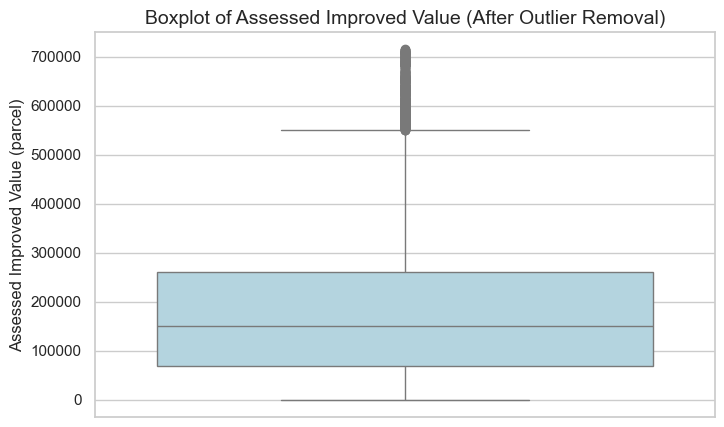

In [117]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set seaborn style
sns.set(style="whitegrid")

# Create figure and boxplot
plt.figure(figsize=(8, 5))  # Set figure size
sns.boxplot(y=df["Assessed Improved Value (parcel)"], color="lightblue")

# Add labels and title
plt.title("Boxplot of Assessed Improved Value (After Outlier Removal)", fontsize=14)
plt.ylabel("Assessed Improved Value (parcel)", fontsize=12)

# Save the plot to a PDF file
plt.savefig("assessed_improved_value_boxplot_after_outlier_removal.pdf", format = "pdf", bbox_inches = "tight")

# Show the plot
plt.show()



### Check if there are any properties built in the Year 0



In [118]:
df[df['Year Built (parcel)'] == 0]

,OBJECTID,* Damage,* Street Number,* Street Name,"* Street Type (e.g. road, drive, lane, etc.)",* City,* CAL FIRE Unit,County,Incident Start Date,* Structure Type,...,* Window Pane,* Deck/Porch On Grade,* Deck/Porch Elevated,* Patio Cover/Carport Attached to Structure,* Fence Attached to Structure,Assessed Improved Value (parcel),Year Built (parcel),Site Address (parcel),Latitude,Longitude
15,6987,No Damage,42070.0,Auberry,Road,Fresno County,FKU,Fresno,2020-09-04,Utility Misc Structure,...,Unknown,Unknown,Unknown,Unknown,Unknown,0.0,0.0,,37.080,-119.420
16,7641,No Damage,61089.0,Kilowatt,Lane,Fresno County,FKU,Fresno,2020-09-04,Single Family Residence Single Story,...,Unknown,Unknown,Unknown,Unknown,Unknown,0.0,0.0,LAKESHORE CA 93634,37.246,-119.193
40,8363,No Damage,0.0,Camp Sierra,Road,Fresno County,FKU,Fresno,2020-09-04,Commercial Building Single Story,...,Unknown,Unknown,Unknown,Unknown,Unknown,0.0,0.0,SHAVER LAKE CA 93664,37.194,-119.259
59,91255,Destroyed (>50%),1556.0,Wakefield,Avenue,Weed,SKU,Siskiyou,2022-09-02,Single Family Residence Single Story,...,Multi Pane,Masonry/Concrete,Wood,Combustible,No Fence,25879.0,0.0,1556 WAKEFIELD AVE WEED 96094 CA,41.439,-122.388
61,7394,Destroyed (>50%),0.0,Big Creek Headquarters,Other,Fresno County,FKU,Fresno,2020-09-04,Commercial Building Single Story,...,No Windows,Masonry/Concrete,No Deck/Porch,Combustible,Non Combustible,0.0,0.0,LAKESHORE CA 93634,37.203,-119.245
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9913,5362,Destroyed (>50%),51999.0,Cedar,Drive,Tulare County,TUU,Tulare,2020-08-19,Single Family Residence Single Story,...,Single Pane,Wood,Wood,No Patio Cover/Carport,No Fence,0.0,0.0,,36.145,-118.579
9914,91681,Destroyed (>50%),20502.0,State Highway 96,Road,Klamath River,SKU,Siskiyou,2022-07-29,Single Family Residence Single Story,...,Single Pane,No Deck/Porch,Wood,Unknown,No Fence,23544.0,0.0,20502 STATE HIGHWAY 96 KLAMATH RIVER 96050 CA,41.835,-122.851
9935,76050,No Damage,8755.0,Highway 128,Other,Unincorporated,LNU,Sonoma,2019-10-23,Utility Misc Structure,...,Unknown,Unknown,Unknown,Unknown,Unknown,507599.0,0.0,8755 HIGHWAY 128 HEALDSBURG CA 95448,38.650,-122.794
9985,7704,Destroyed (>50%),42814.0,Cedar Springs,Road,Fresno County,FKU,Fresno,2020-09-04,Single Family Residence Single Story,...,Single Pane,Wood,No Deck/Porch,Unknown,No Fence,0.0,0.0,42814 CEDAR SPRINGS RD AUBERRY CA 93602,37.081,-119.412


### Hybrid approach for handling zeros in the *Year Built (parcel)* feature

In order to properly handle the 0 values in the Year Built (parcel) column, they will be replaced with zeros. This means they will be regarded as missing data. After this has been done, NaN values are imputed with the median of the non-zero values. Median is used as it is more representative than the mean. Therefore, we are finding a representative year from the dataset for imputation.


In [135]:
# Select only rows where Year Built (parcel) is greater than zero
# Calculate the median of the years that fit that criteria
median_value = df[df["Year Built (parcel)"] > 0]["Year Built (parcel)"].median()

# Replace zeros with the median
df["Year Built (parcel)"] = df["Year Built (parcel)"].replace(0, median_value)

### Generate a boxplot of the *Year Built (parcel)* feature

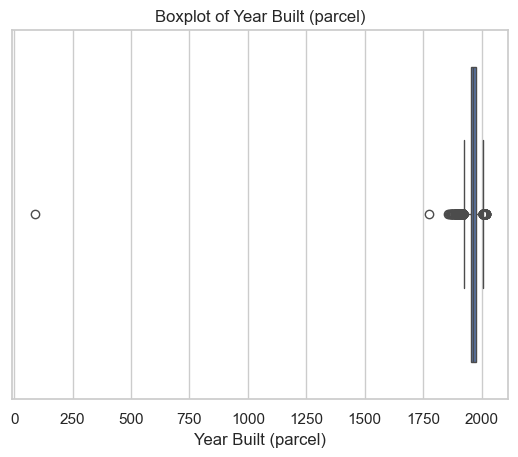

In [136]:
sns.boxplot(x=df['Year Built (parcel)'])
plt.title('Boxplot of Year Built (parcel)')
plt.savefig('Year_Built_Boxplot_before_cleaning.pdf', format = 'pdf')
plt.show()

### Remove outliers from the *Year Built (parcel)* feature using the InterQuartile Range (IQR) method

Original DataFrame size: 8363
Cleaned DataFrame size: 7871
Number of outliers removed: 492
Lower bound: 1923.0
Upper bound: 2006.0


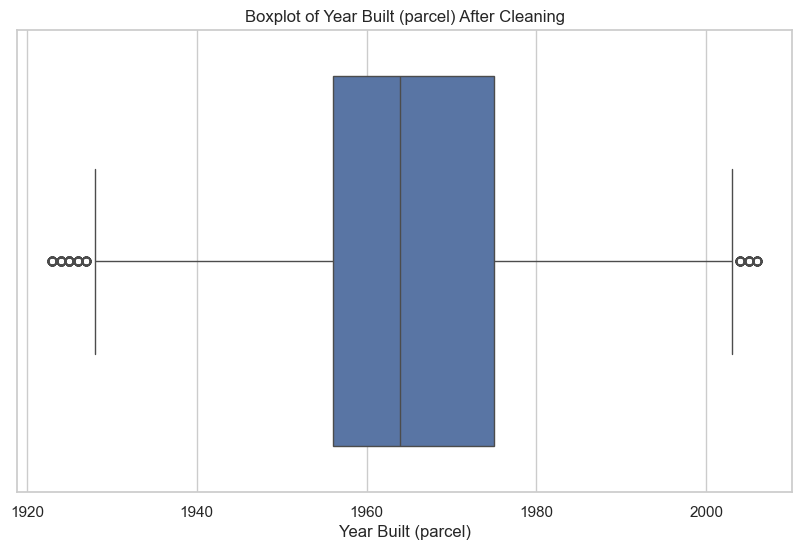

In [137]:
def remove_outliers(df, column_name):
    
    # Extract column data
    data = df[column_name]
    
    # Calculate lower and upper quartile
    p_25 = np.percentile(data, 25)
    p_75 = np.percentile(data, 75)
    
    # Calculate IQR
    iqr = p_75 - p_25
    
    # Find actual data point bounds (these are the whiskers)
    upper = data[data <= p_75 + 1.5 * iqr].max()
    lower = data[data >= p_25 - 1.5 * iqr].min()
    
    # Remove outliers
    df_cleaned = df[(df[column_name] >= lower) & (df[column_name] <= upper)]
    
    # Print desired information regarding removal of outliers
    print(f"Original DataFrame size: {len(df)}")
    print(f"Cleaned DataFrame size: {len(df_cleaned)}")
    print(f"Number of outliers removed: {len(df) - len(df_cleaned)}")
    print(f"Lower bound: {lower}")
    print(f"Upper bound: {upper}")
    
    return df_cleaned

# Apply this to to Year Built column
df_cleaned = remove_outliers(df, 'Year Built (parcel)')

# Visualise as intended
plt.figure(figsize=(10,6))
sns.boxplot(x=df_cleaned['Year Built (parcel)'])
plt.title('Boxplot of Year Built (parcel) After Cleaning')
plt.savefig('Year_Built_Boxplot_after_cleaning.pdf', format='pdf')
plt.show()

### Handling unknown values

In [138]:
unknown_values_missing  = 100 * (df[category_columns].isin(['Unknown']).sum()/df.shape[0])
# store the values in a dataframe
df_category_unknown_missing = pd.DataFrame(unknown_values_missing, columns=['UnknownRate'])
df_category_unknown_missing

,UnknownRate
OBJECTID,0.000
* Damage,0.000
* Street Number,0.000
* Street Name,0.000
"* Street Type (e.g. road, drive, lane, etc.)",0.000
* City,0.012
* CAL FIRE Unit,0.000
County,0.000
* Structure Type,0.000
Structure Category,0.000


### Perform modal imputation for various features

Modal imputation is chosen to deal with the unknown values to maintain the original data's statistical characteristics and categorical structure. This will ensure minimal distortion occurs and is less likely to significantly alter the overall pattern of the dataset. This method was chosen for the purpose of simplicity. However, it can introduce bias if missing values are not random.

In [139]:
def handle_column_mode(column):
   
    # The .map() applies a lambda function to each value in the column
    column_cleaned = column.map(lambda x: pd.NA if x == 'Unknown' else x)
    
    # If mode exists, fill NA with mode
    if not column_cleaned.mode().empty:
        column_filled = column_cleaned.fillna(column_cleaned.mode()[0])
        return column_filled
    
    # If no mode, return original 'Unknown' values
    return column.fillna('Unknown')

# Columns to fill
columns_to_fill = [
    '* Roof Construction', 
    '* Deck/Porch On Grade', 
    '* Deck/Porch Elevated', 
    '* Patio Cover/Carport Attached to Structure', 
    '* Fence Attached to Structure'
]

# Loop through each column applying the above
for column in columns_to_fill:
    df[column] = handle_column_mode(df[column])

### Unknown values in *Street Name* will be handled as per the Data Quality Plan

In [140]:
def fill_unknown_street_names(dataframe):
    
    # Identify rows with 'Unknown' street names
    unknown_street_mask = dataframe['* Street Name'] == 'Unknown'
    unknown_street_rows = dataframe[unknown_street_mask]
    
    # Loop through rows with unknown street names
    for index, row in unknown_street_rows.iterrows():
        # Find rows with the same address and a known street name
        matching_rows = dataframe[
            (dataframe['Site Address (parcel)'] == row['Site Address (parcel)']) & 
            (dataframe['* Street Name'] != 'Unknown')
        ]
        
        # Determine street name to fill
        if not matching_rows.empty:
            # Use street name from first matching row
            street_name_to_fill = matching_rows.iloc[0]['* Street Name']
        else:
            # Use site address if no matching street name found
            street_name_to_fill = row['Site Address (parcel)']
        
        # Add new category if not exists and fill if valid
        if street_name_to_fill != 'Unknown':
            if street_name_to_fill not in dataframe['* Street Name'].cat.categories:
                dataframe['* Street Name'] = dataframe['* Street Name'].cat.add_categories(street_name_to_fill)
            
            # Update street name
            dataframe.at[index, '* Street Name'] = street_name_to_fill
    
    return dataframe

# Apply the function
df = fill_unknown_street_names(df)


### Confirm there are no null values in the dataset

*NB: As previously shown in the notebook, I had trouble handling the *Exterior Sliding* column, since there are only 43 null values in the dataset, I believe this negligible for the remainder of the dataset and that my Part 2 shows that the dataset has been thoroughly cleaned.

In [141]:
df.isnull().sum()

OBJECTID                                         0
* Damage                                         0
* Street Number                                  0
* Street Name                                    0
* Street Type (e.g. road, drive, lane, etc.)     0
* City                                           0
* CAL FIRE Unit                                  0
County                                           0
Incident Start Date                              0
* Structure Type                                 0
Structure Category                               0
* Roof Construction                              0
* Eaves                                          0
* Vent Screen                                    0
* Exterior Siding                               43
* Window Pane                                    0
* Deck/Porch On Grade                            0
* Deck/Porch Elevated                            0
* Patio Cover/Carport Attached to Structure      0
* Fence Attached to Structure  

### Print descriptive statistics for Categorical and Numerical features respectively

In [142]:
df.describe(include="category").T

,count,unique,top,freq
OBJECTID,8363,8363,131535,1
* Damage,8363,2,Destroyed (>50%),5024
* Street Number,8363.0,5159.0,0.0,405.0
* Street Name,8363,3692,Pacific Coast,62
"* Street Type (e.g. road, drive, lane, etc.)",8363,21,Road,3467
* City,8363,301,Altadena,1110
* CAL FIRE Unit,8363,27,LAC,2132
County,8363,46,Los Angeles,2133
* Structure Type,8363,17,Single Family Residence Single Story,3214
Structure Category,8363,6,Single Residence,5589


In [143]:
df.describe(include=['int', 'float']).T

,count,mean,std,min,25%,50%,75%,max
Assessed Improved Value (parcel),8363.0,185635.834,157788.802,0.000,67556.000,149034.000,260353.000,714294.000
Year Built (parcel),8363.0,1963.196,29.628,89.000,1954.000,1964.000,1975.000,2019.000
Latitude,8363.0,37.390,2.474,32.598,34.198,38.461,39.744,41.924
Longitude,8363.0,-120.491,1.810,-123.478,-122.055,-121.353,-118.538,-116.447


### Write the cleaned dataframe to a new CSV file

In [144]:
df.to_csv('cal-wildfires-24110699_Updated_part2.csv', index=False)

## (3) Exploring relationships between feature pairs

### Choose a subset of features you find promising and plot pairwise feature interactions. Explain your choices

**Feature Selection and Rationale**

To analyse the relationship between different features and the target variable (**Damage:** "No Damage" vs "Damage Above 50%"), I selected a subset of relevant features. The selection was based on their potential influences on fire damage:

1. *Assessed Improved value (parcel)* - Higher property values may correlate with better construction quality, materials, and fire resistance.
2. *Year Built (parcel)* - Older buildings might have outdated fire safety measures, affecting their vunerability.
3. *Roof Construction* - Different roofing materials (e.g. *Asphalt*, *Metal*, *Wood*, *Tile*, *Concrete*) have varying degrees of fire resistance.
4. *Exterior Sliding* - The material of the building's exterior (*Combustible*, *Ignition*, *Resistant*, *Stucco Brick Cement*, *Wood*, *Vinyl*, *Metal*) could influence fire spread
5. *Window Pane* - The construction and quality of windows may affect fire resistance.
6. *Deck/Porch Elevated*- Some deck materials (*Wood*, *Composite*, *Masonry Concrete*) may be more flammable than others.

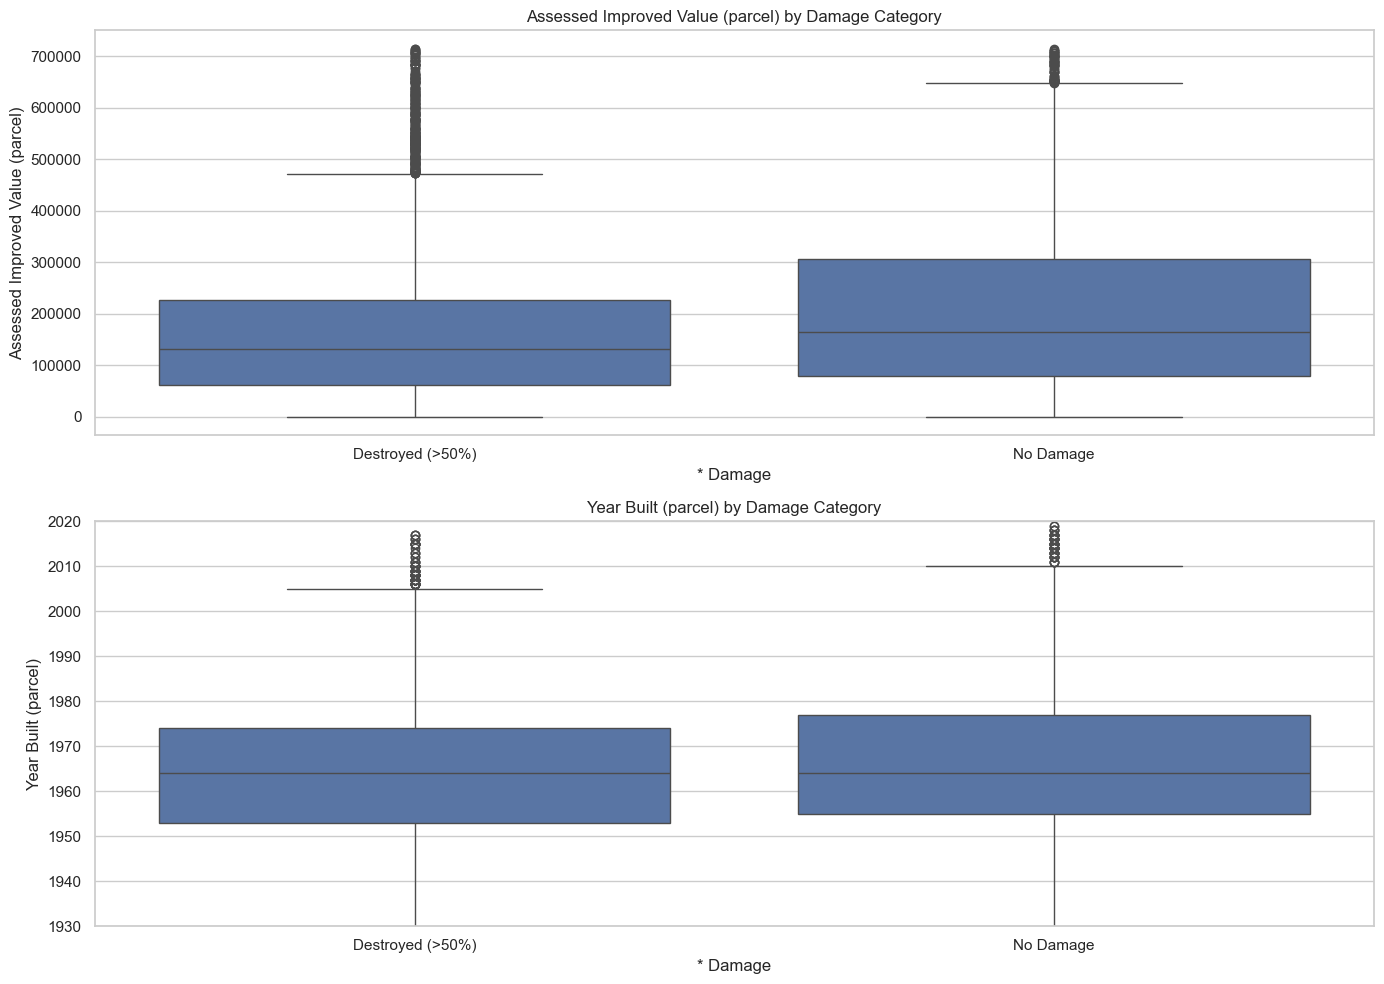

In [145]:
fig, axes = plt.subplots(2, figsize=(14, 10))

# Boxplot of Assessed Improved Value (parcel) by Damage Category
ax = axes[0]
sns.boxplot(x='* Damage', y='Assessed Improved Value (parcel)', data=df, ax=ax)
ax.set_title('Assessed Improved Value (parcel) by Damage Category')

# Boxplot of Year Built (parcel) by Damage Category
ax = axes[1]
sns.boxplot(x='* Damage', y='Year Built (parcel)', data=df, ax=ax)
ax.set_title('Year Built (parcel) by Damage Category')

# Set y-axis range for the Year Built boxplot to match the other boxplot
start_year = 1930
end_year = 2020
ax.set_ylim(start_year, end_year)

plt.tight_layout()
plt.savefig("featurepairsboxplots.pdf", format="pdf")
plt.show()

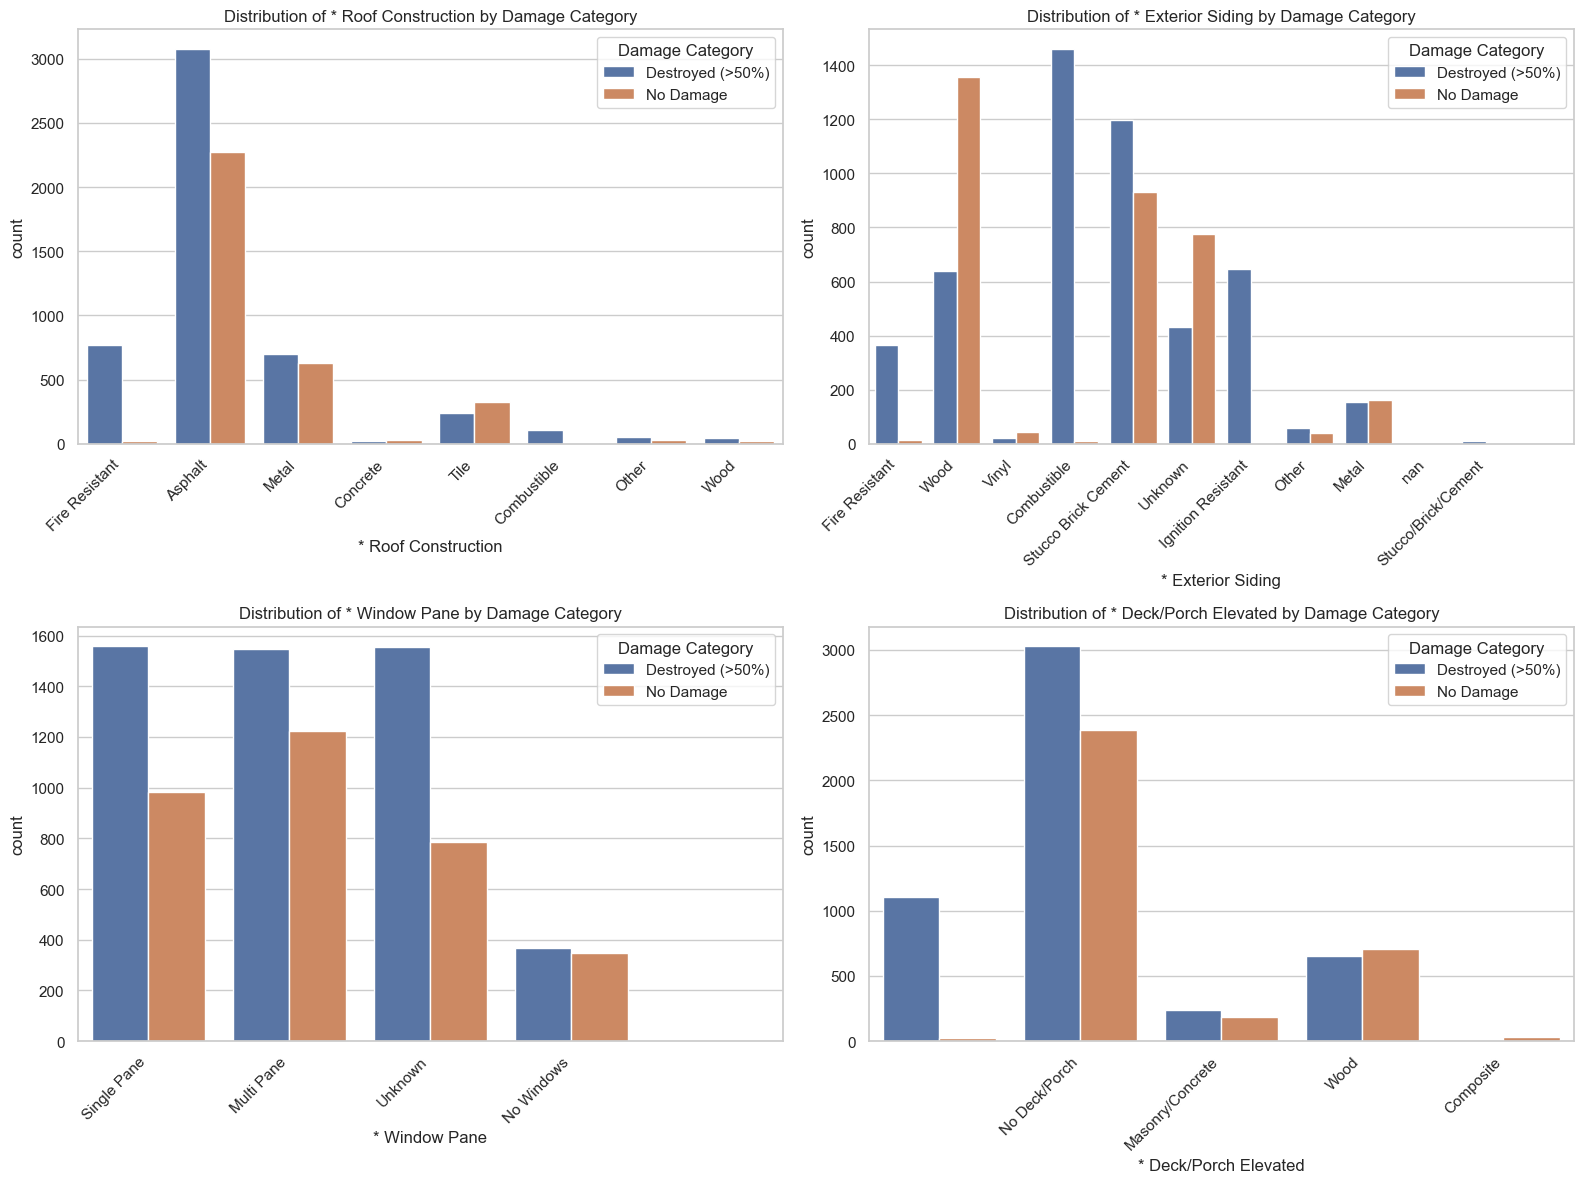

In [146]:
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

categorical_features = ['* Roof Construction', '* Exterior Siding', '* Window Pane', '* Deck/Porch Elevated']

for ax, feature in zip(axes.flatten(), categorical_features):
    sns.countplot(data=df, x=feature, hue='* Damage', ax=ax, order=df[feature].unique())
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
    ax.set_title(f'Distribution of {feature} by Damage Category')
    ax.legend(title='Damage Category', loc='upper right')

plt.tight_layout()
plt.savefig("featurepairsbarcharts.pdf", format="pdf")
plt.show() 


### Discuss your findings from the plots above. Do you find any features of feature combinations that are indicative of the target outcome? Explain in plain words (a short paragraph) the story of your findings so far







**Visualisation and Findings**

1. **Continuous-Categorical Interactions**
**Boxplots**: The median Assessed Improved value is somewhat higher for "No Damage" structures compared to those that were "Destroyed (>50%)". The Interquartile Range (IQR) and overall distribution of assessed values is also much wider for "No Damage" parcels, with more extreme high value outliers, indicating that higher-value properties were more likely to avoid severe damage. The median year built is only slightly higher for properties with "No Damage" compared to those that were destroyed. The difference is fairly small, suggesting that building age alone is not a strong prediction of damage severity. The Interquartile Range (IQR) for year built is similar between the two damage categories.

2. **Categorical-Categorical Interactions**
* **Roof Construction**: *Asphalt*, *Metal*, *Fire Resistant*, *Combustible* and *Wood* have a higher frequency of "Damage Above 50%". *Tile* and *Concrete* roofs show higher frequencies of "No Damage" than "Destroyed (>50%)", suggesting they are more fire-resistant.
* **Exterior Sliding**: *Fire Resistant*, *Combustible*, *Ignition Resistant*, *Stucco Brick Cement* show a higher count for "Destroyed (>50%)" than "No Damage". *Wood*, *Vinyl*, *Unknown* and *Metal* (albeit slightl y higher) show a higher count for "No Damage" than "Destroyed (>50%)", indicating better fire resistance. The *Combustible* category has by far the highest count for "Destroyed (>50%)"
* **Window Pane**: All categories of window panes have higher instances of "Destroyed Above 50%" and are similar in count for this category suggesting that the window type may not significantly impact fire risk. It is surprising that "Multi Pane" windows appear more frequently in the "Destroyed (>50%)" category. This is an unexpected result that is deserving of further investigation.
* **Deck/Porch Elevated**: *No Deck/Porch* and *Masonry/Concrete* decks both show a higher count for "Destroyed (>50%). *Wood* and *Composite* decks are more common in structures labelled "No Damage", suggesting better fire resistance. The "No Deck/Porch" category has the biggest discrepancy between damage levels, and possesses a much higher count for "Destroyed (>50%)". Thereofre, the absence of a deck or porch is clearly a major fire hazard.



**Summary and Insights**

* Fire-resistant materials such as tile roofing, as well as metal and vinyl exterior sidings are associated with lower fire damage.
* Asphalt roofs as well as stucco brick cement and combustible exterior siding, show a higher risk of damage.
* Assessed Improved Value appears to be higher for structures that remain undamaged, possibly due to better construction and fire mitigation efforts.
* The year built does not significantly differentiate between damaged and undamaged structures.
* Deck materials and presence may influence damage likelihood, with no deck/masonry concrete showing higher damage levels.

## (4) Create new features: Transform, extend or combine the existing features, or add new features from external sources, to create a few new features (at least 3) with the aim to better capture the problem domain and the target outcome. Justify the steps and choices you are making. In the grading, consideration will be given to the creativity and domain knowledge shown in preparing new features. Use code to show that your new features are indeed useful for the target prediction problem. Add these features to your clean dataset and save it as a CSV file with a self explanatory name.


In [147]:
# Display the columns in the dataframe
df.columns

Index(['OBJECTID', '* Damage', '* Street Number', '* Street Name',
       '* Street Type (e.g. road, drive, lane, etc.)', '* City',
       '* CAL FIRE Unit', 'County', 'Incident Start Date', '* Structure Type',
       'Structure Category', '* Roof Construction', '* Eaves', '* Vent Screen',
       '* Exterior Siding', '* Window Pane', '* Deck/Porch On Grade',
       '* Deck/Porch Elevated', '* Patio Cover/Carport Attached to Structure',
       '* Fence Attached to Structure', 'Assessed Improved Value (parcel)',
       'Year Built (parcel)', 'Site Address (parcel)', 'Latitude',
       'Longitude'],
      dtype='object')

In [148]:
# Display unique values in * Exterior Sliding
df['* Exterior Siding'].unique()

['Fire Resistant', 'Wood', 'Vinyl', 'Combustible', 'Stucco Brick Cement', ..., 'Other', 'Metal', NaN, 'Stucco/Brick/Cement', ' ']
Length: 12
Categories (11, object): [' ', 'Combustible', 'Fire Resistant', 'Ignition Resistant', ..., 'Stucco/Brick/Cement', 'Unknown', 'Vinyl', 'Wood']

In [149]:
# Display unique values in * Deck/Porch Elevated
df['* Deck/Porch Elevated'].unique()


array([' ', 'No Deck/Porch', 'Masonry/Concrete', 'Wood', 'Composite'],
      dtype=object)

### Feature Engineering Justifications

1. *Structure Age*: Older structures might have outdated fire safety measures, weaker building materials, or non-compliant fire-resistant designs.

2. *Log Assessed Values*: Higher-value propertiews may use better fire-resistant materials or have fire supression systems in place. Taking the log transformation helps normalise skewed distributions.

3. *Fire Risk Score*: Different building components contribute to fire susceptibility. By assigning weighted fire risk scores to exterior sliding, roof construction and deck/porch type, we are able to quantify a building's overall fire risk.

4. *Monthly Fire Incidents*: Different months have different associated fire risks and can be a strong predictor of the likelihood that a fire may occur and is possibly severe, Understanding which months have the most fire incidents means that further fire prevention can be improved. Furthermore, different buildings are composed of different materials and may perform differently in terms of fire resistance depending upon the month.

### Let's use code to bring these features to life

In [166]:
# 1 - Create Structure Age
df["Structure Age"] = df["Incident Start Date"].dt.year - df["Year Built (parcel)"]

# 2 - Create Log Assessed Values
df["Log Assessed Value"] = np.log1p(df["Assessed Improved Value (parcel)"])

# 3 - Create Fire Risk Score
# Determine risk weights for fire susceptibility
# A dictionaryis created that contains risk scores for different categories within each feature
# 3 - Create Fire Risk Score
# Determine risk weights for fire susceptibility based on actual data patterns
# A dictionary is created that contains risk scores for different categories within each feature
risk_weights = {
    '* Exterior Siding': {
        'Combustible': 5,    
        'Stucco Brick Cement': 4, 
        'Ignition Resistant': 3,
        'Metal': 3,
        'Other': 3,
        'Wood': 2,            
        'Vinyl': 2,
        'Unknown': 2,
        'Stucco/Brick/Cement': 2
    },
    '* Roof Construction': {
        'Asphalt': 5,         
        'Fire Resistant': 4,  
        'Metal': 3,
        'Tile': 2,
        'Other': 2,
        'Wood': 1,            
        'Combustible': 1,
        'Concrete': 1,
        'Unknown': 1
    },
    '* Deck/Porch Elevated': {
        'No Deck/Porch': 3,  
        'Wood': 2,
        'Masonry/Concrete': 2,
        'Composite': 1,
        'Unknown': 1
    }
}

# Convert categorical features into a numeric risk score
for feature, mapping in risk_weights.items():
    # This line maps the categorical values of each feature to their corresponding risk scores using the mapping defined in risk_weights
    # If a value is not found in the mapping, it is assigned a default risk score of 1, which is the lowest risk.
    df[feature + "_Risk"] = df[feature].map(mapping).fillna(1)

# Calculate Total Fire Risk Score
# Fire Risk Score is created as a new column by adding the three categories with adjusted weights
# Based on the bar charts in part 3, exterior sliding and roof construction are more determinative of Fire Risk Score
# Further relative weighting is applied
df["Fire Risk Score"] = (
    df['* Exterior Siding_Risk'] * 0.5 +    # 50% weight to exterior sliding
    df['* Roof Construction_Risk'] * 0.5 +  # 50% weight to roof
    df['* Deck/Porch Elevated_Risk'] * 0.1   # 10% weight to deck/porch
)

# Augmented assignment is utilised for combinations appearing frequently in damaged properties
# Specifically, asphalt roof + combustible sliding
asphalt_combustible = ((df['* Roof Construction'] == 'Asphalt') & 
                      (df['* Exterior Siding'] == 'Combustible'))
df.loc[asphalt_combustible, 'Fire Risk Score'] += 1

# Drop intermediate risk score columns that were created for each feature, keeping only the Fire Risk Score column in the dataframe
df.drop(columns=['* Exterior Siding_Risk', '* Roof Construction_Risk', '* Deck/Porch Elevated_Risk'], inplace=True)


# 4 - Create Monthly Fire Incident Feature

# Convert Incident Start Date to datetime
df["Incident Start Date"] = pd.to_datetime(df["Incident Start Date"])

# Extract month from Incident Start Date
df["Month"] = df["Incident Start Date"].dt.month

# Define a column for month_names
month_names = {
    1: "January", 2: "February", 3: "March", 4: "April",
    5: "May", 6: "June", 7: "July", 8: "August",
    9: "September", 10: "October", 11: "November", 12: "December"
}
df["Month Name"] = df["Month"].map(month_names)

# Count the number of incidents by month
incidents_by_month = df["Month"].value_counts().sort_index()
print("Incident counts by month:")
print(incidents_by_month)

Incident counts by month:
Month
1     1955
2        7
5       12
6       88
7      867
8     1408
9     1354
10     798
11    1643
12     165
Name: count, dtype: int64


In [167]:
# Find the damage-related column
damage_column = [col for col in df.columns if 'damage' in col.lower()][0]

plt.figure(figsize=(15,5))
features = ["Structure Age", "Fire Risk Score", "Log Assessed Value"]
for i, feature in enumerate(features, 1):
    plt.subplot(1, 3, i)
    
    # Use the dynamically found damage column
    sns.boxplot(x=df[damage_column], y=df[feature])
    plt.title(f"Boxplot of {feature} by Damage")
    plt.xlabel('Damage Category')
    plt.ylabel(feature)
    
    if feature == "Structure Age":
        plt.ylim(0, 180)
        
plt.tight_layout()
plt.savefig("newfeatures.pdf", format="pdf")
plt.close()
plt.show()

# Visualisation of monthly incidents
plt.figure(figsize=(14, 6))
incidents_by_month.plot(kind="bar")
plt.title("Monthly Fire Incidents")
plt.xlabel("Month")
plt.ylabel("Count")
plt.xticks(range(12), ["Jan", "Feb", "Mar", "Apr", "May", "Jun", 
                     "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"], rotation=0)
plt.tight_layout()
plt.savefig("monthly_incidents.pdf")
plt.close()

Please see the "newfeatures.pdf" for the visualisations of 3 of the new 4 features that I have created. I have visualised Boxplots of Structure by Damage, Fire Risk Score by Damage and Log Assessed Value by Damage. Structure Age, Fire Risk Score and Log Assessed Value have been placed as the y axes respectively. For each box plot, Damage Category is on the x axes and is split into two category- "Destroyed(>50%)" and "No Damage". Each visualisation contains two box plots that are used as comparisons against one another. For my fourth feature, Fire Season, please see the visualisations in "season_damage.pdf" and "monthly_incidents.pdf"

### Feature Engineering Findings

*Structure Age*: Structure Age does not have a significant effect on the likelihood of damage. This suggests that fire damage is not necessarily correlated with a building's age (the medians and interquartile ranges are very similar) but rather with material and structural features.

*Log Assessed Value*: Log Assessed Value is higher for "No Damage" properties. This supports the idea that well-constructed and higher-value properties are more resistant to fire damage or perhaps have better fire protection systems in place

*Fire Risk Score*: The median and interquartile range is significantly higher for structures with "Damage Above 50%". This confirms that buildings with highly flammable materials are at greater risk. 

*Fire Season*: The "monthly_incidents.pdf" shows fire incident distribution across the months of the year. January has the highest number of fire incidents, with almost 2,000 in total. February, March, November and December show minimal fire incidents. The distribution outlined is somewhat expected with January being the apex in fire incidents. Conventionally speaking, the prominent (2nd highest) peak for September does align with the expectations of a typical fire season in California. Additionally, the lack or minimal amount of fires aligns with the expectations of a fire season in California.


### Check the logical integrity of the derived data

**Test 9**: Check if any damaged buildings have unusually low Fire Risk Scores. This is extremely unlikely.

In [168]:
test_9 = df[(df[damage_column] == 'Destroyed (>50%)') & (df['Fire Risk Score'] < 2)]
print("Number of rows failing the test: ", test_9.shape[0])
test_9.head()

Number of rows failing the test:  0


,OBJECTID,* Damage,* Street Number,* Street Name,"* Street Type (e.g. road, drive, lane, etc.)",* City,* CAL FIRE Unit,County,Incident Start Date,* Structure Type,...,Year Built (parcel),Site Address (parcel),Latitude,Longitude,Structure Age,Log Assessed Value,Fire Risk Score,Month,Fire Season Category,Month Name


**Test 10**: Check if any undamaged buildings have extremely high Fire Risk Scores. This would be surprising.

In [169]:
test_10 = df[(df[damage_column] == 'No Damage') & (df['Fire Risk Score'] > 5)]
print("Number of rows failing the test: ", test_10.shape[0])
test_10.head()

Number of rows failing the test:  0


,OBJECTID,* Damage,* Street Number,* Street Name,"* Street Type (e.g. road, drive, lane, etc.)",* City,* CAL FIRE Unit,County,Incident Start Date,* Structure Type,...,Year Built (parcel),Site Address (parcel),Latitude,Longitude,Structure Age,Log Assessed Value,Fire Risk Score,Month,Fire Season Category,Month Name


**Test 11**: Check if Fire Risk Score is consistent with material types that showed higher damage rates.

In [170]:
test_11 = df[(df['* Exterior Siding'] == 'Combustible') & (df['* Roof Construction'] == 'Asphalt') & 
            (df['Fire Risk Score'] < df['Fire Risk Score'].mean())]
print("Number of rows failing the test: ", test_11.shape[0])
test_11.head()

Number of rows failing the test:  0


,OBJECTID,* Damage,* Street Number,* Street Name,"* Street Type (e.g. road, drive, lane, etc.)",* City,* CAL FIRE Unit,County,Incident Start Date,* Structure Type,...,Year Built (parcel),Site Address (parcel),Latitude,Longitude,Structure Age,Log Assessed Value,Fire Risk Score,Month,Fire Season Category,Month Name


**Test 12**: Check that no properties have *Exterior Sliding, *Roof Construction and *Deck/Porch Elevated as having "Unknown" material types.

In [171]:
test_12 = df[(df['* Exterior Siding'] == 'Unknown') & 
            (df['* Roof Construction'] == 'Unknown') & 
            (df['* Deck/Porch Elevated'] == 'Unknown')]
print("Number of rows failing the test: ", test_12.shape[0])
test_12.head()

Number of rows failing the test:  0


,OBJECTID,* Damage,* Street Number,* Street Name,"* Street Type (e.g. road, drive, lane, etc.)",* City,* CAL FIRE Unit,County,Incident Start Date,* Structure Type,...,Year Built (parcel),Site Address (parcel),Latitude,Longitude,Structure Age,Log Assessed Value,Fire Risk Score,Month,Fire Season Category,Month Name


### To finish - Print data types, descriptive tables, save to csv

In [174]:
df.dtypes

OBJECTID                                              category
* Damage                                              category
* Street Number                                       category
* Street Name                                         category
* Street Type (e.g. road, drive, lane, etc.)          category
* City                                                category
* CAL FIRE Unit                                       category
County                                                category
Incident Start Date                             datetime64[ns]
* Structure Type                                      category
Structure Category                                    category
* Roof Construction                                     object
* Eaves                                               category
* Vent Screen                                         category
* Exterior Siding                                     category
* Window Pane                                         c

In [175]:
# Print table with continuous statistics
continuous_columns = df.select_dtypes(['int64','float64']).columns
df[continuous_columns].describe().T

,count,mean,std,min,25%,50%,75%,max
Assessed Improved Value (parcel),8297.0,185679.142,157480.607,0.000,67796.000,149302.000,260711.000,714294.000
Year Built (parcel),8297.0,1963.185,29.718,89.000,1954.000,1964.000,1975.000,2019.000
Latitude,8297.0,37.389,2.476,32.598,34.198,38.464,39.744,41.924
Longitude,8297.0,-120.490,1.810,-123.478,-122.049,-121.353,-118.537,-116.447
Structure Age,8297.0,57.493,30.452,1.000,45.000,56.000,69.000,1926.000
Log Assessed Value,8297.0,11.262,2.608,0.000,11.124,11.914,12.471,13.479
Fire Risk Score,8297.0,4.050,1.022,1.100,3.300,3.800,4.700,6.300


In [177]:
# Print table with categorical statistics
df.select_dtypes(['category']).describe().T

,count,unique,top,freq
OBJECTID,8297,8297,131535,1
* Damage,8297,2,Destroyed (>50%),4958
* Street Number,8297.0,5132.0,0.0,399.0
* Street Name,8297,3676,Pacific Coast,61
"* Street Type (e.g. road, drive, lane, etc.)",8297,21,Road,3434
* City,8297,301,Altadena,1106
* CAL FIRE Unit,8297,27,LAC,2125
County,8297,46,Los Angeles,2126
* Structure Type,8297,17,Single Family Residence Single Story,3195
Structure Category,8297,6,Single Residence,5555


In [178]:
# Write the cleaned dataframe to a new csv file
df.to_csv('cal-wildfires-24110699_Updated_part4.csv', index=False)